In [1]:
!pip install scikit-optimize

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import statsmodels.stats.api as sms
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Functions

In [4]:
from sklearn import metrics

def mae(y_gt, Y_pr):
    return metrics.mean_absolute_error(y_gt, Y_pr)

def mse(y_gt, Y_pr):
    return metrics.mean_squared_error(y_gt, Y_pr)

def rmse(y_gt, Y_pr):
    my_mse = mse(y_gt, Y_pr)
    return np.sqrt(my_mse)

def medae(y_gt, Y_pr):
    return metrics.median_absolute_error(y_gt, Y_pr)

def R2(y_gt, Y_pr):
    return metrics.r2_score(y_gt, Y_pr)

def calc_metrics(true, pred):

    mse1 = mse(true, pred)

    rmse1 = rmse(true, pred)

    mae1 = mae(true, pred)

    medae1 = medae(true, pred)

    R21 = R2(true, pred)

    print('*** VAL **: ')
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse1, rmse1, R21, mae1, medae1))
    print('-'*30)

In [5]:
def target_distr_linear(train_label, test_label, predicted_dv): 
    sns.kdeplot(train_label, label='train')
    sns.kdeplot(test_label, label='test')
    sns.kdeplot(predicted_dv, label='pred')
    plt.legend()
    plt.show()

    sns.scatterplot(test_label, predicted_dv, color='blueviolet')
    plt.title('Linear model')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

In [6]:
from scipy.stats import norm

def draw_histogram(data):
    f,ax_hist = plt.subplots(1)
    sns.distplot(data, hist=True,  kde=True, rug=True, bins=10, fit=norm, ax=ax_hist);
    plt.xlabel("values")
    plt.title("Distribution") 

    mean=data.mean()

    ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean={mean:.3f}")
    ax_hist.legend()

    plt.show()

In [7]:
def draw_res_analys(errors, pred):
    sns.scatterplot(list(range(len(errors))),errors);
    plt.title("Distibution of errors")
    plt.ylabel('Error');
    plt.xlabel('Index');
    plt.show();

    sns.scatterplot(pred,errors);
    plt.title('Relationship of true value vs error (resudual analysis)')
    plt.ylabel('Error');
    plt.xlabel('True value');
    plt.show();

In [8]:
def get_feature_imp(model, X_train):
    imp = model.get_feature_importance(data=X_train)
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp, y=model.feature_names_)
    axes.set_title('Finetuned Catboost feature importance')
    plt.show()

# Unhashing

In [9]:
genre_mapping = {'0ef0aa70-f86c-4141-8054-8b39af97867d': 'Biography',
                '287a1485-7a88-4c2f-bc94-ca418b6c47a1': 'Cartoons',
                '66fad8c3-d84f-458d-a8bf-5b4f154969e0': 'Show',
                '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Theater',
                '9fa28b61-a257-4a3e-945b-a9ef76a146d6': 'Fantasy',
                'b0836a1d-635f-4d89-bcc5-25d10ba56642': 'Anime',
                'd7214feb-8c11-4aea-aabb-ac98a8d56fd5': 'History',
                'dc65dbc8-34ba-4df1-b32c-4f895e10bff8': 'Shorts',
                'eb001d27-5be3-4d42-9d88-90d593f2627d': 'War_movies',
                '364fdc2e-bdfe-40be-b2c5-d30f43ec432e': 'Crime'}

In [10]:
types_mapping = {'1f22ccf1-288a-4e6e-b39a-7502799e7125': 'Лекции',
    '6d640e04-be3a-4c8c-852e-4e9b12449d5d': 'Концерты',
    '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Театр',
    '2f7908cc-e2fd-43cf-b626-ec1aef436160': 'Курсы' }

In [11]:
import pickle

with open('./income_target.pkl', 'rb') as f:
    df = pickle.load(f, encoding='utf-8')

In [12]:
df.head().T

0  \
availability                                           [SUBSCRIPTION]   
actor               [cff3362f-ad91-498d-80b3-ea3ab8ec65cf, a51b376...   
age_access_type                                                     0   
country                                                 [usa, canada]   
average_rating                                                   6.21   
duration                                                      4860000   
type                                                            MOVIE   
name                                              Большое путешествие   
release_year                                                     2006   
genre                  [Family, 287a1485-7a88-4c2f-bc94-ca418b6c47a1]   
director                       [fe598c84-ef4f-47c7-91af-d5cbd89c4e8d]   
element_uid                      d8b55146-dee5-4498-957c-5614414b48fb   
subscription_only                                                True   
av_rate_x                                                   -0.043478   
av_rate_y                                                   -0.041667   
users_number_x                                                      1   
users_number_y                                                      1   
user_count_3months                                                  1   
av_ratings_3months                                          -0.043478   
min_ts                                            2020-09-23 17:37:14   
price                                                         56468.0   

                                                                    1  \
availability                                              [DTO, RENT]   
actor               [cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 39124be...   
age_access_type                                                    16   
country                                                         [usa]   
average_rating                                                    NaN   
duration                                                      5280000   
type                                                            MOVIE   
name                                                 Роман с кукушкой   
release_year                                                     2021   
genre                                      [Comedy, Melodrama, Drama]   
director                       [f5fba6fe-94b3-4e69-acfc-da6867320386]   
element_uid                      a367ca50-ef7d-4a4c-b89a-c8692defa697   
subscription_only                                               False   
av_rate_x                                                    0.010101   
av_rate_y                                                    0.006173   
users_number_x                                                      5   
users_number_y                                                      6   
user_count_3months                                                  5   
av_ratings_3months                                           0.010101   
min_ts                                            2022-07-14 11:49:33   
price                                                        114578.0   

                                                                    2  \
availability                                [DTO, RENT, SUBSCRIPTION]   
actor               [cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 21c7a45...   
age_access_type                                                    12   
country                                                         [usa]   
average_rating                                                   7.45   
duration                                                      6960000   
type                                                            MOVIE   
name                                       Звёздный путь 2: Гнев Хана   
release_year                                                     1982   
genre                    [Sci-Fi, Action, Thriller, Drama, Adventure]   
director                       [bab6b7f4-4506-458f-

In [13]:
all_genres = []

for item_genres in df['genre']:
    all_genres.extend(item_genres)

In [14]:
all_unique_genres = set(all_genres)

In [15]:
len(all_unique_genres)

27

In [16]:
all_unique_genres

{'0ef0aa70-f86c-4141-8054-8b39af97867d',
 '287a1485-7a88-4c2f-bc94-ca418b6c47a1',
 '364fdc2e-bdfe-40be-b2c5-d30f43ec432e',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 '5c403894-146a-47a4-ae75-9f1956a30dbb',
 '7b7c97f6-1adb-4b43-bfe8-9455812fac0b',
 '9fa28b61-a257-4a3e-945b-a9ef76a146d6',
 'Action',
 'Adventure',
 'ArtHouse',
 'Comedy',
 'Detective',
 'Documentary',
 'Drama',
 'Family',
 'ForKids',
 'Horror',
 'Humor',
 'Melodrama',
 'Music',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'b0836a1d-635f-4d89-bcc5-25d10ba56642',
 'd7214feb-8c11-4aea-aabb-ac98a8d56fd5',
 'dc65dbc8-34ba-4df1-b32c-4f895e10bff8',
 'eb001d27-5be3-4d42-9d88-90d593f2627d'}

In [17]:
decoded_genres = [genre_mapping.get(genre, genre) for genre in all_unique_genres]

In [18]:
decoded_genres

['Crime',
 'Music',
 'Humor',
 'Comedy',
 'Detective',
 'ArtHouse',
 'Horror',
 'ForKids',
 'Action',
 'Theater',
 'Sci-Fi',
 'Fantasy',
 'Cartoons',
 'Thriller',
 '5c403894-146a-47a4-ae75-9f1956a30dbb',
 'Adventure',
 'Family',
 'Documentary',
 'History',
 'Biography',
 'War_movies',
 'Sport',
 'Anime',
 'Melodrama',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 'Drama',
 'Shorts']

In [19]:
all_genres = []

for col in ['actor', 'country', 'genre', 'director']:
    print(f'======{col}======')
    all_values = []
    for i, item_values in enumerate(df[col]):
        try:
            all_values.extend(item_values)
        except:
            print(i, item_values)
    all_values = set(all_values)
    print('Len:', len(all_values))
    # print(all_values)

======actor======
Len: 19196
======country======
Len: 98
======genre======
Len: 27
======director======
Len: 4178


# Preprocessing

1. Multiple value categorical features: tops' tf-idf
    * actor: top 5
    * country: 1st
    * genre: top 3
    * director: 1st 
2. Just categorical 
    * type: ohe
    * release year: periods: 1918-1969, 1970-1979, 1980-1989, ... с 2000 по годам
3. Numeric and categorical ordered
    * age_access: scale
    * avg_rating: knn-imputer, scale
    * duration: scale
4. textual
    * name: catboost.text
5. target:
    * log
    
## Multiple value categorical features: tops' tf-idf

### filter by year

In [23]:
prep_df = df[df['release_year'] >= 2000]

In [24]:
prep_df.shape

(5023, 21)

In [25]:
prep_df.head(1).T

0
availability                                           [SUBSCRIPTION]
actor               [cff3362f-ad91-498d-80b3-ea3ab8ec65cf, a51b376...
age_access_type                                                     0
country                                                 [usa, canada]
average_rating                                                   6.21
duration                                                      4860000
type                                                            MOVIE
name                                              Большое путешествие
release_year                                                     2006
genre                  [Family, 287a1485-7a88-4c2f-bc94-ca418b6c47a1]
director                       [fe598c84-ef4f-47c7-91af-d5cbd89c4e8d]
element_uid                      d8b55146-dee5-4498-957c-5614414b48fb
subscription_only                                                True
av_rate_x                                                   -0.043478
av_rate_y                                                   -0.041667
users_number_x                                                      1
users_number_y                                                      1
user_count_3months                                                  1
av_ratings_3months                                          -0.043478
min_ts                                            2020-09-23 17:37:14
price                                                         56468.0

In [26]:
mltpl_cat_features = ['actor', 'country', 'genre', 'director']
num_features = ['duration', 'price']
cat_features = ['age_access_type']
skewed_num_features = ['duration']
mltpl_cat_n_top = {'actor': 5, 'country': 1, 'genre': 3, 'director': 1}

In [27]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
# from spacy.tokenizer import Tokenizer
# from spacy.lang.en import English
# nlp = English()


class Preprocesser:
    def __init__(self, 
                mulpiple_cat_features: list,
                skewed_num_features: list,
               # text_features: list,
               # release_year_feature: str,
                mltpl_cat_n_top: dict):
        self.mulpiple_cat_features = mulpiple_cat_features
        self.skewed_num_features = skewed_num_features
        #self.text_features = text_features
        self.mltpl_cat_n_top = mltpl_cat_n_top
       # self.release_year_feature = release_year_feature
        # self.tokenizer = Tokenizer(nlp.vocab)
        
    def __get_top_n_mltpl_cat_features(self, df_pr, col):
        all_cats = []
        for element_values in df_pr[col]:
            all_cats.extend(element_values)
        return Counter(all_cats).most_common(self.mltpl_cat_n_top[col])
            
    def __preprocess_mulpiple_cat_features(self, df_pr):
        for col in self.mulpiple_cat_features:
            feature_number = self.mltpl_cat_n_top[col]
            df_pr[[f'{col}_{i}' for i in range(feature_number)]] = pd.DataFrame(np.full((len(df), feature_number), np.nan))
            for i in df_pr.index:
                names = df_pr.loc[i, col]
                for k, name in enumerate(names[:int(feature_number)]):
                    df_pr.loc[i, f'{col}_{k}'] = name
            df_pr.drop(col, axis=1, inplace=True)

        return df_pr
    
    def __preprocess_skewed_num_features(self, df_pr):
        for col in self.skewed_num_features:
            df_pr[col] = df_pr[col].apply(lambda x: np.log1p(x))
        return df_pr
    
    def __preprocess_text_features(self, df_pr):
        for col in self.text_features:
            df_pr[col] = df_pr[col].apply(lambda x: self.tokenizer(x))
        return df_pr
            
    def preprocess(self,
                   df: pd.DataFrame):
        df_pr = df.copy()
        df_pr = self.__preprocess_mulpiple_cat_features(df_pr)
        df_pr = self.__preprocess_skewed_num_features(df_pr)
        # df_pr = self.__preprocess_text_features(df_pr)
        
        return df_pr
        

In [28]:
preprocesser = Preprocesser(mltpl_cat_features,
            skewed_num_features,
            #text_features,
            mltpl_cat_n_top)

In [29]:
df_pr = preprocesser.preprocess(prep_df)

In [30]:
df_pr.isnull().sum()

availability            25
age_access_type          0
average_rating         178
duration                 0
type                     0
name                     0
release_year             0
element_uid              0
subscription_only        0
av_rate_x                0
av_rate_y                0
users_number_x           0
users_number_y           0
user_count_3months       0
av_ratings_3months       0
min_ts                   0
price                    0
actor_0                  0
actor_1                 42
actor_2                 90
actor_3                174
actor_4               1648
country_0                0
genre_0                  0
genre_1               1290
genre_2               3049
director_0               0
dtype: int64

In [31]:
df_pr.columns

Index(['availability', 'age_access_type', 'average_rating', 'duration', 'type',
       'name', 'release_year', 'element_uid', 'subscription_only', 'av_rate_x',
       'av_rate_y', 'users_number_x', 'users_number_y', 'user_count_3months',
       'av_ratings_3months', 'min_ts', 'price', 'actor_0', 'actor_1',
       'actor_2', 'actor_3', 'actor_4', 'country_0', 'genre_0', 'genre_1',
       'genre_2', 'director_0'],
      dtype='object')

In [32]:
cat_features = ['age_access_type', 'type',
                 'actor_0', 'actor_1', 'actor_2',
                'actor_3', 'actor_4',
       'country_0', 'genre_0', 'genre_1',
                'genre_2', 'director_0']

In [33]:
df_pr[cat_features] = df_pr[cat_features].replace(np.nan, 'Na')

### Target destrib

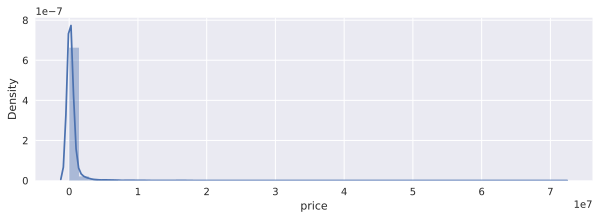

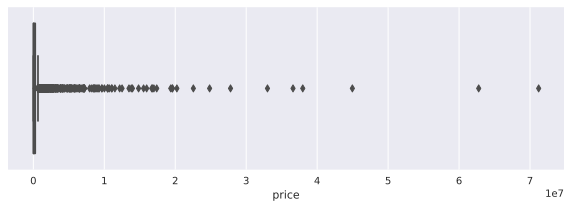

In [34]:
plt.figure(figsize=(10, 3))
sns.distplot(df_pr['price'])
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(df_pr['price'], orient='h')
plt.show()

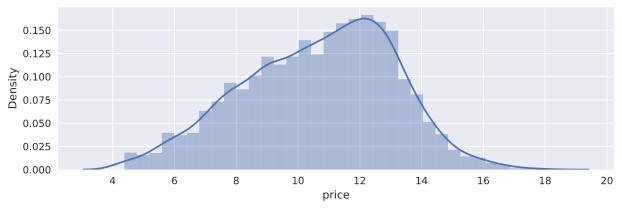

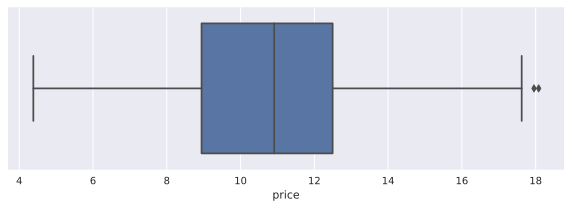

In [35]:
plt.figure(figsize=(10, 3))
sns.distplot(df_pr['price'].apply(lambda x: np.log1p(x)))
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(df_pr['price'].apply(lambda x: np.log1p(x)), orient='h')
plt.show()

In [36]:
NUMERICAL = [ 'duration', 'price']

num_data = df_pr.loc[:,NUMERICAL]
corr_matrix = num_data.corr(method='pearson').round(4)
corr_matrix

duration   price
duration    1.0000  0.1108
price       0.1108  1.0000

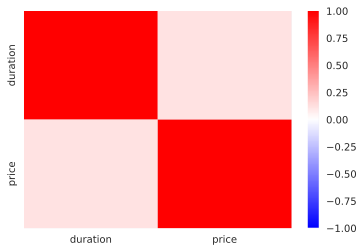

In [37]:
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='bwr')
plt.show()

In [38]:
df_pr.columns

Index(['availability', 'age_access_type', 'average_rating', 'duration', 'type',
       'name', 'release_year', 'element_uid', 'subscription_only', 'av_rate_x',
       'av_rate_y', 'users_number_x', 'users_number_y', 'user_count_3months',
       'av_ratings_3months', 'min_ts', 'price', 'actor_0', 'actor_1',
       'actor_2', 'actor_3', 'actor_4', 'country_0', 'genre_0', 'genre_1',
       'genre_2', 'director_0'],
      dtype='object')

In [64]:
df_pr = df_pr[['age_access_type', 'duration', 'type',
     'price', 'actor_0', 'actor_1',
       'actor_2', 'actor_3', 'actor_4', 'country_0', 'genre_0', 'genre_1',
       'genre_2', 'director_0']]

### Split

In [65]:
X, y = df_pr.drop('price', axis=1), df_pr['price']

y = y.apply(lambda x: np.log1p(x))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=False)

In [67]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=False)

In [68]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((4068, 13), (452, 13), (503, 13), (4068,), (452,), (503,))

## Modeling

In [69]:
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint

In [70]:
train_dataset = cat.Pool(data=X_train,
                        label=y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(data=X_test, 
                        label=y_test,
                         cat_features=cat_features)

val_dataset = cat.Pool(X_val, y_val,
                       cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

cat_model = cat.CatBoostRegressor(**cat_params)

cat_model.fit(
    train_dataset,
    eval_set=val_dataset,
    early_stopping_rounds=500,
    verbose=100,
    plot=False
)

Learning rate set to 0.06347
0:	learn: 1.9544801	test: 2.1611055	best: 2.1611055 (0)	total: 5.11ms	remaining: 5.11s
100:	learn: 1.6792812	test: 1.8691870	best: 1.8661856 (96)	total: 396ms	remaining: 3.52s
200:	learn: 1.6267838	test: 1.8676221	best: 1.8657910 (160)	total: 784ms	remaining: 3.12s
300:	learn: 1.5779942	test: 1.8653727	best: 1.8604188 (253)	total: 1.2s	remaining: 2.78s
400:	learn: 1.5299835	test: 1.8533887	best: 1.8533887 (400)	total: 1.63s	remaining: 2.43s
500:	learn: 1.4810078	test: 1.8483674	best: 1.8415338 (454)	total: 2.06s	remaining: 2.06s
600:	learn: 1.4381533	test: 1.8450627	best: 1.8415338 (454)	total: 2.5s	remaining: 1.66s
700:	learn: 1.3992934	test: 1.8476679	best: 1.8415338 (454)	total: 2.93s	remaining: 1.25s
800:	learn: 1.3652817	test: 1.8496594	best: 1.8415338 (454)	total: 3.36s	remaining: 836ms
900:	learn: 1.3297081	test: 1.8506788	best: 1.8415338 (454)	total: 3.8s	remaining: 417ms
Stopped by overfitting detector  (500 iterations wait)

bestTest = 1.84153377


In [71]:
y_pred = cat_model.predict(test_dataset)

In [72]:
from sklearn import metrics

def mae(y_gt, Y_pr):
    return metrics.mean_absolute_error(y_gt, Y_pr)

def mse(y_gt, Y_pr):
    return metrics.mean_squared_error(y_gt, Y_pr)

def rmse(y_gt, Y_pr):
    my_mse = mse(y_gt, Y_pr)
    return np.sqrt(my_mse)

def medae(y_gt, Y_pr):
    return metrics.median_absolute_error(y_gt, Y_pr)

def R2(y_gt, Y_pr):
    return metrics.r2_score(y_gt, Y_pr)

def calc_metrics(true, pred):

    mse1 = mse(true, pred)

    rmse1 = rmse(true, pred)

    mae1 = mae(true, pred)

    medae1 = medae(true, pred)

    R21 = R2(true, pred)

    print('*** VAL **: ')
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse1, rmse1, R21, mae1, medae1))
    print('-'*30)

In [73]:
cat_model.save_model('cat_reg_income')

In [74]:
def inverse_transform(feature):
    return np.expm1(feature)

In [75]:
calc_metrics(inverse_transform(y_test), inverse_transform(y_pred))

*** VAL **: 
MSE:   164213395999.48425
RMSE:  405232.5209055713
R2:    -0.07942761709472212
MAE:   129949.38470531347
MedAE: 22943.48007502964
------------------------------


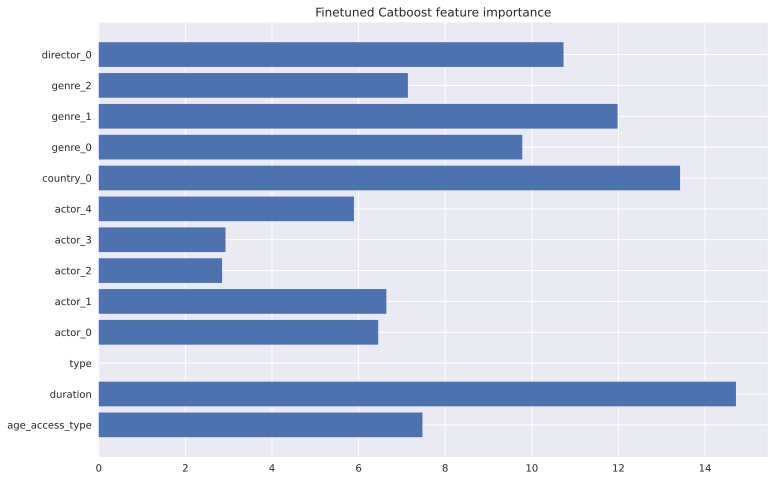

In [76]:
imp = cat_model.get_feature_importance(data=train_dataset)
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
axes.barh(width=imp, y=cat_model.feature_names_)
axes.set_title('Finetuned Catboost feature importance')
plt.savefig('cat_feature_importance_2.png')
plt.show()

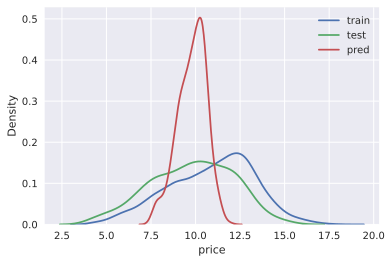

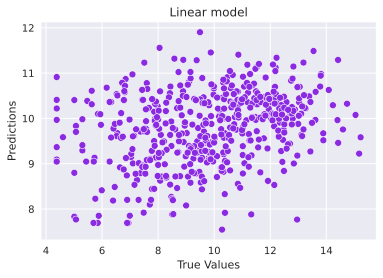

In [77]:
target_distr_linear(y_train, y_test, y_pred)   

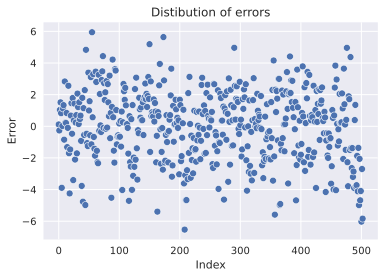

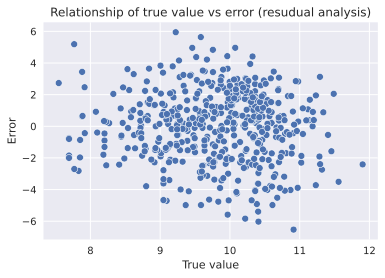

In [78]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)

# Tuning

In [79]:
train_dataset = cat.Pool(X_train,
                         y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(X_test, y_test,
                         cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

In [80]:
parameters_distr = {'depth': randint(3, 7),
              'learning_rate': uniform(0.01, 0.1),
              'iterations': [100, 1000, 5000]
             }

cat_model = cat.CatBoostRegressor(**cat_params)
grid = RandomizedSearchCV(estimator=cat_model, param_distributions=parameters_distr, 
                            cv=5,
#                           n_jobs=-1,
                          verbose=3)

grid.fit(X_train, y_train)

import pickle
with open('bestimator_income', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)
grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 1.9588749	total: 4.7ms	remaining: 4.7s
1:	learn: 1.9459150	total: 8.59ms	remaining: 4.29s
2:	learn: 1.9349286	total: 12.1ms	remaining: 4.03s
3:	learn: 1.9233433	total: 16.3ms	remaining: 4.07s
4:	learn: 1.9135740	total: 19ms	remaining: 3.79s
5:	learn: 1.9031195	total: 22.4ms	remaining: 3.71s
6:	learn: 1.8937032	total: 26.2ms	remaining: 3.71s
7:	learn: 1.8863866	total: 30ms	remaining: 3.71s
8:	learn: 1.8779714	total: 33.3ms	remaining: 3.66s
9:	learn: 1.8702734	total: 37.1ms	remaining: 3.67s
10:	learn: 1.8634657	total: 41.3ms	remaining: 3.72s
11:	learn: 1.8579379	total: 44.5ms	remaining: 3.67s
12:	learn: 1.8518495	total: 48.1ms	remaining: 3.65s
13:	learn: 1.8458313	total: 52.1ms	remaining: 3.67s
14:	learn: 1.8408134	total: 56ms	remaining: 3.68s
15:	learn: 1.8358688	total: 59.7ms	remaining: 3.67s
16:	learn: 1.8312521	total: 63.2ms	remaining: 3.66s
17:	learn: 1.8281068	total: 65.3ms	remaining: 3.56s
18:	learn: 1.8236713	

175:	learn: 1.6335809	total: 586ms	remaining: 2.74s
176:	learn: 1.6325055	total: 590ms	remaining: 2.75s
177:	learn: 1.6321219	total: 595ms	remaining: 2.75s
178:	learn: 1.6313945	total: 598ms	remaining: 2.74s
179:	learn: 1.6309658	total: 602ms	remaining: 2.74s
180:	learn: 1.6308480	total: 605ms	remaining: 2.74s
181:	learn: 1.6296477	total: 609ms	remaining: 2.74s
182:	learn: 1.6289918	total: 612ms	remaining: 2.73s
183:	learn: 1.6284578	total: 615ms	remaining: 2.73s
184:	learn: 1.6277366	total: 618ms	remaining: 2.72s
185:	learn: 1.6275193	total: 622ms	remaining: 2.72s
186:	learn: 1.6270919	total: 625ms	remaining: 2.72s
187:	learn: 1.6267190	total: 628ms	remaining: 2.71s
188:	learn: 1.6257242	total: 632ms	remaining: 2.71s
189:	learn: 1.6253401	total: 635ms	remaining: 2.71s
190:	learn: 1.6246690	total: 638ms	remaining: 2.7s
191:	learn: 1.6245956	total: 641ms	remaining: 2.7s
192:	learn: 1.6243289	total: 644ms	remaining: 2.69s
193:	learn: 1.6241842	total: 647ms	remaining: 2.69s
194:	learn: 1.

349:	learn: 1.5540532	total: 1.19s	remaining: 2.21s
350:	learn: 1.5531849	total: 1.19s	remaining: 2.2s
351:	learn: 1.5529054	total: 1.2s	remaining: 2.2s
352:	learn: 1.5527215	total: 1.2s	remaining: 2.2s
353:	learn: 1.5519567	total: 1.2s	remaining: 2.2s
354:	learn: 1.5519519	total: 1.21s	remaining: 2.19s
355:	learn: 1.5509799	total: 1.21s	remaining: 2.19s
356:	learn: 1.5508649	total: 1.21s	remaining: 2.19s
357:	learn: 1.5502649	total: 1.22s	remaining: 2.18s
358:	learn: 1.5496061	total: 1.22s	remaining: 2.18s
359:	learn: 1.5491812	total: 1.23s	remaining: 2.18s
360:	learn: 1.5488167	total: 1.23s	remaining: 2.17s
361:	learn: 1.5484255	total: 1.23s	remaining: 2.17s
362:	learn: 1.5479312	total: 1.23s	remaining: 2.17s
363:	learn: 1.5475840	total: 1.24s	remaining: 2.16s
364:	learn: 1.5467350	total: 1.24s	remaining: 2.16s
365:	learn: 1.5463417	total: 1.24s	remaining: 2.16s
366:	learn: 1.5457709	total: 1.25s	remaining: 2.15s
367:	learn: 1.5453552	total: 1.25s	remaining: 2.15s
368:	learn: 1.54512

519:	learn: 1.4899954	total: 1.78s	remaining: 1.65s
520:	learn: 1.4894129	total: 1.79s	remaining: 1.64s
521:	learn: 1.4888146	total: 1.79s	remaining: 1.64s
522:	learn: 1.4885793	total: 1.79s	remaining: 1.64s
523:	learn: 1.4880914	total: 1.8s	remaining: 1.63s
524:	learn: 1.4877708	total: 1.8s	remaining: 1.63s
525:	learn: 1.4872872	total: 1.8s	remaining: 1.63s
526:	learn: 1.4869647	total: 1.81s	remaining: 1.62s
527:	learn: 1.4867349	total: 1.81s	remaining: 1.62s
528:	learn: 1.4860688	total: 1.82s	remaining: 1.62s
529:	learn: 1.4858245	total: 1.82s	remaining: 1.61s
530:	learn: 1.4852703	total: 1.82s	remaining: 1.61s
531:	learn: 1.4849306	total: 1.83s	remaining: 1.61s
532:	learn: 1.4839538	total: 1.83s	remaining: 1.6s
533:	learn: 1.4836070	total: 1.83s	remaining: 1.6s
534:	learn: 1.4831963	total: 1.83s	remaining: 1.59s
535:	learn: 1.4830889	total: 1.84s	remaining: 1.59s
536:	learn: 1.4825964	total: 1.84s	remaining: 1.59s
537:	learn: 1.4818843	total: 1.85s	remaining: 1.58s
538:	learn: 1.481

688:	learn: 1.4174385	total: 2.39s	remaining: 1.08s
689:	learn: 1.4170404	total: 2.39s	remaining: 1.07s
690:	learn: 1.4165539	total: 2.39s	remaining: 1.07s
691:	learn: 1.4163228	total: 2.4s	remaining: 1.07s
692:	learn: 1.4160533	total: 2.4s	remaining: 1.06s
693:	learn: 1.4158133	total: 2.4s	remaining: 1.06s
694:	learn: 1.4155688	total: 2.41s	remaining: 1.06s
695:	learn: 1.4151404	total: 2.41s	remaining: 1.05s
696:	learn: 1.4149531	total: 2.42s	remaining: 1.05s
697:	learn: 1.4146772	total: 2.42s	remaining: 1.05s
698:	learn: 1.4141561	total: 2.42s	remaining: 1.04s
699:	learn: 1.4139362	total: 2.43s	remaining: 1.04s
700:	learn: 1.4135087	total: 2.43s	remaining: 1.04s
701:	learn: 1.4129569	total: 2.43s	remaining: 1.03s
702:	learn: 1.4123947	total: 2.44s	remaining: 1.03s
703:	learn: 1.4122671	total: 2.44s	remaining: 1.03s
704:	learn: 1.4119317	total: 2.44s	remaining: 1.02s
705:	learn: 1.4115800	total: 2.45s	remaining: 1.02s
706:	learn: 1.4108192	total: 2.45s	remaining: 1.02s
707:	learn: 1.4

852:	learn: 1.3642482	total: 2.99s	remaining: 515ms
853:	learn: 1.3637237	total: 2.99s	remaining: 511ms
854:	learn: 1.3634182	total: 3s	remaining: 508ms
855:	learn: 1.3627375	total: 3s	remaining: 505ms
856:	learn: 1.3622990	total: 3s	remaining: 501ms
857:	learn: 1.3616238	total: 3.01s	remaining: 498ms
858:	learn: 1.3613811	total: 3.01s	remaining: 494ms
859:	learn: 1.3608787	total: 3.01s	remaining: 491ms
860:	learn: 1.3606935	total: 3.02s	remaining: 487ms
861:	learn: 1.3603036	total: 3.02s	remaining: 484ms
862:	learn: 1.3599645	total: 3.02s	remaining: 480ms
863:	learn: 1.3598948	total: 3.03s	remaining: 477ms
864:	learn: 1.3591728	total: 3.03s	remaining: 473ms
865:	learn: 1.3588438	total: 3.04s	remaining: 470ms
866:	learn: 1.3585658	total: 3.04s	remaining: 466ms
867:	learn: 1.3580631	total: 3.04s	remaining: 463ms
868:	learn: 1.3580295	total: 3.05s	remaining: 459ms
869:	learn: 1.3575722	total: 3.05s	remaining: 456ms
870:	learn: 1.3571013	total: 3.05s	remaining: 452ms
871:	learn: 1.3567172

64:	learn: 1.7060365	total: 216ms	remaining: 3.1s
65:	learn: 1.7052240	total: 219ms	remaining: 3.09s
66:	learn: 1.7040183	total: 222ms	remaining: 3.09s
67:	learn: 1.7030627	total: 225ms	remaining: 3.08s
68:	learn: 1.7018952	total: 227ms	remaining: 3.07s
69:	learn: 1.7013236	total: 231ms	remaining: 3.07s
70:	learn: 1.7007989	total: 234ms	remaining: 3.07s
71:	learn: 1.6982049	total: 238ms	remaining: 3.06s
72:	learn: 1.6978286	total: 241ms	remaining: 3.06s
73:	learn: 1.6962660	total: 245ms	remaining: 3.06s
74:	learn: 1.6958047	total: 249ms	remaining: 3.06s
75:	learn: 1.6950961	total: 252ms	remaining: 3.07s
76:	learn: 1.6936531	total: 256ms	remaining: 3.07s
77:	learn: 1.6921182	total: 259ms	remaining: 3.07s
78:	learn: 1.6911391	total: 262ms	remaining: 3.05s
79:	learn: 1.6905133	total: 265ms	remaining: 3.05s
80:	learn: 1.6903797	total: 267ms	remaining: 3.02s
81:	learn: 1.6903530	total: 268ms	remaining: 3s
82:	learn: 1.6890310	total: 272ms	remaining: 3s
83:	learn: 1.6884609	total: 275ms	rema

249:	learn: 1.6108485	total: 817ms	remaining: 2.45s
250:	learn: 1.6108387	total: 820ms	remaining: 2.45s
251:	learn: 1.6102073	total: 824ms	remaining: 2.44s
252:	learn: 1.6101222	total: 827ms	remaining: 2.44s
253:	learn: 1.6090310	total: 831ms	remaining: 2.44s
254:	learn: 1.6085967	total: 835ms	remaining: 2.44s
255:	learn: 1.6085876	total: 838ms	remaining: 2.44s
256:	learn: 1.6084658	total: 841ms	remaining: 2.43s
257:	learn: 1.6081487	total: 845ms	remaining: 2.43s
258:	learn: 1.6081038	total: 848ms	remaining: 2.42s
259:	learn: 1.6077971	total: 852ms	remaining: 2.42s
260:	learn: 1.6073895	total: 855ms	remaining: 2.42s
261:	learn: 1.6071203	total: 859ms	remaining: 2.42s
262:	learn: 1.6063867	total: 863ms	remaining: 2.42s
263:	learn: 1.6061779	total: 866ms	remaining: 2.41s
264:	learn: 1.6060856	total: 869ms	remaining: 2.41s
265:	learn: 1.6057129	total: 872ms	remaining: 2.41s
266:	learn: 1.6053759	total: 875ms	remaining: 2.4s
267:	learn: 1.6046333	total: 879ms	remaining: 2.4s
268:	learn: 1.

421:	learn: 1.5370839	total: 1.42s	remaining: 1.95s
422:	learn: 1.5369028	total: 1.42s	remaining: 1.94s
423:	learn: 1.5359982	total: 1.43s	remaining: 1.94s
424:	learn: 1.5356496	total: 1.43s	remaining: 1.94s
425:	learn: 1.5352692	total: 1.44s	remaining: 1.94s
426:	learn: 1.5350678	total: 1.44s	remaining: 1.93s
427:	learn: 1.5347471	total: 1.45s	remaining: 1.93s
428:	learn: 1.5338915	total: 1.45s	remaining: 1.93s
429:	learn: 1.5337264	total: 1.45s	remaining: 1.93s
430:	learn: 1.5330657	total: 1.46s	remaining: 1.92s
431:	learn: 1.5327764	total: 1.46s	remaining: 1.92s
432:	learn: 1.5325167	total: 1.46s	remaining: 1.92s
433:	learn: 1.5320344	total: 1.47s	remaining: 1.91s
434:	learn: 1.5313726	total: 1.47s	remaining: 1.91s
435:	learn: 1.5306942	total: 1.47s	remaining: 1.91s
436:	learn: 1.5304355	total: 1.48s	remaining: 1.91s
437:	learn: 1.5301310	total: 1.48s	remaining: 1.9s
438:	learn: 1.5295048	total: 1.49s	remaining: 1.9s
439:	learn: 1.5291885	total: 1.49s	remaining: 1.9s
440:	learn: 1.5

585:	learn: 1.4741800	total: 2.03s	remaining: 1.43s
586:	learn: 1.4739272	total: 2.03s	remaining: 1.43s
587:	learn: 1.4734181	total: 2.03s	remaining: 1.43s
588:	learn: 1.4732462	total: 2.04s	remaining: 1.42s
589:	learn: 1.4729459	total: 2.04s	remaining: 1.42s
590:	learn: 1.4723152	total: 2.05s	remaining: 1.42s
591:	learn: 1.4718094	total: 2.05s	remaining: 1.41s
592:	learn: 1.4716114	total: 2.05s	remaining: 1.41s
593:	learn: 1.4709281	total: 2.06s	remaining: 1.41s
594:	learn: 1.4705698	total: 2.06s	remaining: 1.4s
595:	learn: 1.4702706	total: 2.06s	remaining: 1.4s
596:	learn: 1.4701836	total: 2.07s	remaining: 1.4s
597:	learn: 1.4701588	total: 2.07s	remaining: 1.39s
598:	learn: 1.4694517	total: 2.08s	remaining: 1.39s
599:	learn: 1.4692829	total: 2.08s	remaining: 1.39s
600:	learn: 1.4689389	total: 2.08s	remaining: 1.38s
601:	learn: 1.4687096	total: 2.09s	remaining: 1.38s
602:	learn: 1.4681293	total: 2.09s	remaining: 1.38s
603:	learn: 1.4676066	total: 2.09s	remaining: 1.37s
604:	learn: 1.4

749:	learn: 1.4150785	total: 2.63s	remaining: 876ms
750:	learn: 1.4139682	total: 2.63s	remaining: 872ms
751:	learn: 1.4130136	total: 2.63s	remaining: 869ms
752:	learn: 1.4127528	total: 2.64s	remaining: 865ms
753:	learn: 1.4122211	total: 2.64s	remaining: 862ms
754:	learn: 1.4120294	total: 2.65s	remaining: 859ms
755:	learn: 1.4116917	total: 2.65s	remaining: 855ms
756:	learn: 1.4109096	total: 2.65s	remaining: 852ms
757:	learn: 1.4103496	total: 2.66s	remaining: 849ms
758:	learn: 1.4102036	total: 2.66s	remaining: 845ms
759:	learn: 1.4097904	total: 2.67s	remaining: 842ms
760:	learn: 1.4094561	total: 2.67s	remaining: 838ms
761:	learn: 1.4091412	total: 2.67s	remaining: 835ms
762:	learn: 1.4090022	total: 2.68s	remaining: 831ms
763:	learn: 1.4087311	total: 2.68s	remaining: 828ms
764:	learn: 1.4080306	total: 2.68s	remaining: 824ms
765:	learn: 1.4079188	total: 2.69s	remaining: 821ms
766:	learn: 1.4072879	total: 2.69s	remaining: 817ms
767:	learn: 1.4066914	total: 2.69s	remaining: 814ms
768:	learn: 

913:	learn: 1.3535140	total: 3.23s	remaining: 304ms
914:	learn: 1.3531569	total: 3.23s	remaining: 301ms
915:	learn: 1.3527487	total: 3.24s	remaining: 297ms
916:	learn: 1.3519182	total: 3.24s	remaining: 293ms
917:	learn: 1.3514262	total: 3.25s	remaining: 290ms
918:	learn: 1.3513257	total: 3.25s	remaining: 286ms
919:	learn: 1.3511007	total: 3.25s	remaining: 283ms
920:	learn: 1.3504771	total: 3.25s	remaining: 279ms
921:	learn: 1.3499926	total: 3.26s	remaining: 276ms
922:	learn: 1.3499237	total: 3.26s	remaining: 272ms
923:	learn: 1.3494740	total: 3.27s	remaining: 269ms
924:	learn: 1.3492120	total: 3.27s	remaining: 265ms
925:	learn: 1.3491556	total: 3.27s	remaining: 262ms
926:	learn: 1.3488341	total: 3.28s	remaining: 258ms
927:	learn: 1.3486601	total: 3.28s	remaining: 255ms
928:	learn: 1.3482062	total: 3.29s	remaining: 251ms
929:	learn: 1.3478098	total: 3.29s	remaining: 248ms
930:	learn: 1.3475204	total: 3.29s	remaining: 244ms
931:	learn: 1.3469368	total: 3.3s	remaining: 241ms
932:	learn: 1

73:	learn: 1.7120811	total: 237ms	remaining: 2.96s
74:	learn: 1.7112140	total: 240ms	remaining: 2.96s
75:	learn: 1.7102798	total: 244ms	remaining: 2.96s
76:	learn: 1.7082482	total: 248ms	remaining: 2.97s
77:	learn: 1.7070370	total: 250ms	remaining: 2.96s
78:	learn: 1.7064594	total: 254ms	remaining: 2.96s
79:	learn: 1.7052628	total: 257ms	remaining: 2.96s
80:	learn: 1.7044732	total: 260ms	remaining: 2.95s
81:	learn: 1.7031956	total: 264ms	remaining: 2.96s
82:	learn: 1.7023237	total: 267ms	remaining: 2.95s
83:	learn: 1.7022368	total: 268ms	remaining: 2.93s
84:	learn: 1.7018513	total: 271ms	remaining: 2.92s
85:	learn: 1.7017518	total: 272ms	remaining: 2.89s
86:	learn: 1.7009259	total: 276ms	remaining: 2.9s
87:	learn: 1.7000608	total: 279ms	remaining: 2.89s
88:	learn: 1.6992576	total: 283ms	remaining: 2.9s
89:	learn: 1.6989707	total: 286ms	remaining: 2.89s
90:	learn: 1.6978921	total: 290ms	remaining: 2.89s
91:	learn: 1.6971859	total: 293ms	remaining: 2.9s
92:	learn: 1.6964726	total: 297ms	

255:	learn: 1.6026951	total: 838ms	remaining: 2.43s
256:	learn: 1.6026359	total: 841ms	remaining: 2.43s
257:	learn: 1.6021908	total: 845ms	remaining: 2.43s
258:	learn: 1.6015289	total: 848ms	remaining: 2.43s
259:	learn: 1.6010410	total: 852ms	remaining: 2.42s
260:	learn: 1.6007992	total: 855ms	remaining: 2.42s
261:	learn: 1.6004311	total: 858ms	remaining: 2.42s
262:	learn: 1.6002988	total: 862ms	remaining: 2.42s
263:	learn: 1.5997225	total: 866ms	remaining: 2.41s
264:	learn: 1.5988720	total: 869ms	remaining: 2.41s
265:	learn: 1.5980590	total: 872ms	remaining: 2.41s
266:	learn: 1.5972183	total: 876ms	remaining: 2.4s
267:	learn: 1.5968530	total: 880ms	remaining: 2.4s
268:	learn: 1.5965320	total: 884ms	remaining: 2.4s
269:	learn: 1.5961203	total: 887ms	remaining: 2.4s
270:	learn: 1.5959055	total: 891ms	remaining: 2.4s
271:	learn: 1.5954995	total: 895ms	remaining: 2.39s
272:	learn: 1.5949806	total: 898ms	remaining: 2.39s
273:	learn: 1.5945871	total: 902ms	remaining: 2.39s
274:	learn: 1.594

425:	learn: 1.5238523	total: 1.44s	remaining: 1.94s
426:	learn: 1.5232900	total: 1.44s	remaining: 1.93s
427:	learn: 1.5222953	total: 1.45s	remaining: 1.93s
428:	learn: 1.5218247	total: 1.45s	remaining: 1.93s
429:	learn: 1.5211812	total: 1.45s	remaining: 1.93s
430:	learn: 1.5203511	total: 1.46s	remaining: 1.92s
431:	learn: 1.5195056	total: 1.46s	remaining: 1.92s
432:	learn: 1.5190440	total: 1.46s	remaining: 1.92s
433:	learn: 1.5188315	total: 1.47s	remaining: 1.91s
434:	learn: 1.5185419	total: 1.47s	remaining: 1.91s
435:	learn: 1.5175596	total: 1.48s	remaining: 1.91s
436:	learn: 1.5169215	total: 1.48s	remaining: 1.91s
437:	learn: 1.5162917	total: 1.48s	remaining: 1.9s
438:	learn: 1.5158416	total: 1.49s	remaining: 1.9s
439:	learn: 1.5156926	total: 1.49s	remaining: 1.9s
440:	learn: 1.5154805	total: 1.49s	remaining: 1.89s
441:	learn: 1.5148607	total: 1.5s	remaining: 1.89s
442:	learn: 1.5143337	total: 1.5s	remaining: 1.89s
443:	learn: 1.5140361	total: 1.5s	remaining: 1.88s
444:	learn: 1.5139

594:	learn: 1.4527689	total: 2.04s	remaining: 1.39s
595:	learn: 1.4521678	total: 2.04s	remaining: 1.39s
596:	learn: 1.4521424	total: 2.05s	remaining: 1.38s
597:	learn: 1.4519501	total: 2.05s	remaining: 1.38s
598:	learn: 1.4518736	total: 2.05s	remaining: 1.38s
599:	learn: 1.4518013	total: 2.06s	remaining: 1.37s
600:	learn: 1.4513986	total: 2.06s	remaining: 1.37s
601:	learn: 1.4509197	total: 2.06s	remaining: 1.36s
602:	learn: 1.4505920	total: 2.07s	remaining: 1.36s
603:	learn: 1.4497265	total: 2.07s	remaining: 1.36s
604:	learn: 1.4489740	total: 2.07s	remaining: 1.35s
605:	learn: 1.4488468	total: 2.08s	remaining: 1.35s
606:	learn: 1.4483901	total: 2.08s	remaining: 1.35s
607:	learn: 1.4482609	total: 2.08s	remaining: 1.34s
608:	learn: 1.4475000	total: 2.09s	remaining: 1.34s
609:	learn: 1.4469327	total: 2.09s	remaining: 1.34s
610:	learn: 1.4460092	total: 2.1s	remaining: 1.33s
611:	learn: 1.4457815	total: 2.1s	remaining: 1.33s
612:	learn: 1.4452865	total: 2.1s	remaining: 1.33s
613:	learn: 1.4

759:	learn: 1.3892546	total: 2.64s	remaining: 834ms
760:	learn: 1.3888749	total: 2.65s	remaining: 831ms
761:	learn: 1.3885497	total: 2.65s	remaining: 828ms
762:	learn: 1.3880838	total: 2.65s	remaining: 824ms
763:	learn: 1.3870915	total: 2.66s	remaining: 821ms
764:	learn: 1.3864947	total: 2.66s	remaining: 818ms
765:	learn: 1.3863710	total: 2.67s	remaining: 814ms
766:	learn: 1.3861187	total: 2.67s	remaining: 811ms
767:	learn: 1.3859912	total: 2.67s	remaining: 807ms
768:	learn: 1.3856002	total: 2.68s	remaining: 804ms
769:	learn: 1.3850755	total: 2.68s	remaining: 800ms
770:	learn: 1.3849094	total: 2.68s	remaining: 797ms
771:	learn: 1.3846210	total: 2.69s	remaining: 794ms
772:	learn: 1.3843027	total: 2.69s	remaining: 790ms
773:	learn: 1.3839975	total: 2.69s	remaining: 787ms
774:	learn: 1.3836359	total: 2.7s	remaining: 784ms
775:	learn: 1.3835868	total: 2.7s	remaining: 780ms
776:	learn: 1.3835176	total: 2.71s	remaining: 776ms
777:	learn: 1.3829442	total: 2.71s	remaining: 773ms
778:	learn: 1.

925:	learn: 1.3281059	total: 3.24s	remaining: 259ms
926:	learn: 1.3280078	total: 3.24s	remaining: 255ms
927:	learn: 1.3277772	total: 3.25s	remaining: 252ms
928:	learn: 1.3272646	total: 3.25s	remaining: 248ms
929:	learn: 1.3268611	total: 3.25s	remaining: 245ms
930:	learn: 1.3268285	total: 3.26s	remaining: 241ms
931:	learn: 1.3266018	total: 3.26s	remaining: 238ms
932:	learn: 1.3262089	total: 3.27s	remaining: 234ms
933:	learn: 1.3255216	total: 3.27s	remaining: 231ms
934:	learn: 1.3251359	total: 3.27s	remaining: 228ms
935:	learn: 1.3244328	total: 3.28s	remaining: 224ms
936:	learn: 1.3240534	total: 3.28s	remaining: 221ms
937:	learn: 1.3235939	total: 3.28s	remaining: 217ms
938:	learn: 1.3232258	total: 3.29s	remaining: 214ms
939:	learn: 1.3226407	total: 3.29s	remaining: 210ms
940:	learn: 1.3222263	total: 3.29s	remaining: 207ms
941:	learn: 1.3218626	total: 3.3s	remaining: 203ms
942:	learn: 1.3213907	total: 3.3s	remaining: 200ms
943:	learn: 1.3211023	total: 3.31s	remaining: 196ms
944:	learn: 1.

83:	learn: 1.7312561	total: 284ms	remaining: 3.1s
84:	learn: 1.7305300	total: 289ms	remaining: 3.11s
85:	learn: 1.7296448	total: 292ms	remaining: 3.1s
86:	learn: 1.7284941	total: 295ms	remaining: 3.1s
87:	learn: 1.7280596	total: 298ms	remaining: 3.09s
88:	learn: 1.7276481	total: 302ms	remaining: 3.09s
89:	learn: 1.7266687	total: 306ms	remaining: 3.09s
90:	learn: 1.7252517	total: 309ms	remaining: 3.09s
91:	learn: 1.7248834	total: 313ms	remaining: 3.09s
92:	learn: 1.7243789	total: 316ms	remaining: 3.08s
93:	learn: 1.7236897	total: 319ms	remaining: 3.08s
94:	learn: 1.7229245	total: 322ms	remaining: 3.07s
95:	learn: 1.7222119	total: 326ms	remaining: 3.07s
96:	learn: 1.7208063	total: 330ms	remaining: 3.07s
97:	learn: 1.7207726	total: 331ms	remaining: 3.05s
98:	learn: 1.7203015	total: 335ms	remaining: 3.05s
99:	learn: 1.7195250	total: 338ms	remaining: 3.04s
100:	learn: 1.7189504	total: 341ms	remaining: 3.04s
101:	learn: 1.7185271	total: 344ms	remaining: 3.03s
102:	learn: 1.7183777	total: 347

255:	learn: 1.6196414	total: 889ms	remaining: 2.58s
256:	learn: 1.6191699	total: 894ms	remaining: 2.58s
257:	learn: 1.6190451	total: 897ms	remaining: 2.58s
258:	learn: 1.6189302	total: 901ms	remaining: 2.58s
259:	learn: 1.6186752	total: 904ms	remaining: 2.57s
260:	learn: 1.6180594	total: 908ms	remaining: 2.57s
261:	learn: 1.6174480	total: 911ms	remaining: 2.57s
262:	learn: 1.6173858	total: 915ms	remaining: 2.56s
263:	learn: 1.6169661	total: 918ms	remaining: 2.56s
264:	learn: 1.6161921	total: 922ms	remaining: 2.56s
265:	learn: 1.6152809	total: 925ms	remaining: 2.55s
266:	learn: 1.6145703	total: 930ms	remaining: 2.55s
267:	learn: 1.6142995	total: 933ms	remaining: 2.55s
268:	learn: 1.6142326	total: 936ms	remaining: 2.54s
269:	learn: 1.6140462	total: 940ms	remaining: 2.54s
270:	learn: 1.6137324	total: 944ms	remaining: 2.54s
271:	learn: 1.6132474	total: 947ms	remaining: 2.53s
272:	learn: 1.6131621	total: 951ms	remaining: 2.53s
273:	learn: 1.6130957	total: 954ms	remaining: 2.53s
274:	learn: 

424:	learn: 1.5478590	total: 1.49s	remaining: 2.02s
425:	learn: 1.5472962	total: 1.5s	remaining: 2.02s
426:	learn: 1.5472088	total: 1.5s	remaining: 2.01s
427:	learn: 1.5469163	total: 1.5s	remaining: 2.01s
428:	learn: 1.5467004	total: 1.51s	remaining: 2s
429:	learn: 1.5460486	total: 1.51s	remaining: 2s
430:	learn: 1.5458764	total: 1.51s	remaining: 2s
431:	learn: 1.5453120	total: 1.52s	remaining: 2s
432:	learn: 1.5451496	total: 1.52s	remaining: 1.99s
433:	learn: 1.5447719	total: 1.52s	remaining: 1.99s
434:	learn: 1.5445330	total: 1.53s	remaining: 1.98s
435:	learn: 1.5444725	total: 1.53s	remaining: 1.98s
436:	learn: 1.5443120	total: 1.53s	remaining: 1.98s
437:	learn: 1.5435901	total: 1.54s	remaining: 1.97s
438:	learn: 1.5429121	total: 1.54s	remaining: 1.97s
439:	learn: 1.5425673	total: 1.54s	remaining: 1.97s
440:	learn: 1.5420843	total: 1.55s	remaining: 1.96s
441:	learn: 1.5416619	total: 1.55s	remaining: 1.96s
442:	learn: 1.5412949	total: 1.55s	remaining: 1.95s
443:	learn: 1.5409480	total

592:	learn: 1.4874211	total: 2.1s	remaining: 1.44s
593:	learn: 1.4871964	total: 2.1s	remaining: 1.44s
594:	learn: 1.4869503	total: 2.1s	remaining: 1.43s
595:	learn: 1.4867966	total: 2.11s	remaining: 1.43s
596:	learn: 1.4864716	total: 2.11s	remaining: 1.43s
597:	learn: 1.4862112	total: 2.12s	remaining: 1.42s
598:	learn: 1.4860016	total: 2.12s	remaining: 1.42s
599:	learn: 1.4856701	total: 2.13s	remaining: 1.42s
600:	learn: 1.4854168	total: 2.13s	remaining: 1.41s
601:	learn: 1.4851364	total: 2.13s	remaining: 1.41s
602:	learn: 1.4849696	total: 2.14s	remaining: 1.41s
603:	learn: 1.4848192	total: 2.14s	remaining: 1.4s
604:	learn: 1.4846724	total: 2.14s	remaining: 1.4s
605:	learn: 1.4843089	total: 2.15s	remaining: 1.4s
606:	learn: 1.4838076	total: 2.15s	remaining: 1.39s
607:	learn: 1.4836199	total: 2.15s	remaining: 1.39s
608:	learn: 1.4833119	total: 2.16s	remaining: 1.39s
609:	learn: 1.4828141	total: 2.16s	remaining: 1.38s
610:	learn: 1.4824711	total: 2.16s	remaining: 1.38s
611:	learn: 1.4822

760:	learn: 1.4288758	total: 2.71s	remaining: 850ms
761:	learn: 1.4285523	total: 2.71s	remaining: 846ms
762:	learn: 1.4278128	total: 2.71s	remaining: 842ms
763:	learn: 1.4274241	total: 2.71s	remaining: 839ms
764:	learn: 1.4273629	total: 2.72s	remaining: 835ms
765:	learn: 1.4269414	total: 2.72s	remaining: 832ms
766:	learn: 1.4267644	total: 2.73s	remaining: 828ms
767:	learn: 1.4266135	total: 2.73s	remaining: 825ms
768:	learn: 1.4253031	total: 2.73s	remaining: 821ms
769:	learn: 1.4248761	total: 2.74s	remaining: 818ms
770:	learn: 1.4245779	total: 2.74s	remaining: 814ms
771:	learn: 1.4243463	total: 2.75s	remaining: 811ms
772:	learn: 1.4242071	total: 2.75s	remaining: 807ms
773:	learn: 1.4241633	total: 2.75s	remaining: 804ms
774:	learn: 1.4239032	total: 2.76s	remaining: 800ms
775:	learn: 1.4230971	total: 2.76s	remaining: 797ms
776:	learn: 1.4224282	total: 2.76s	remaining: 793ms
777:	learn: 1.4223888	total: 2.77s	remaining: 789ms
778:	learn: 1.4219360	total: 2.77s	remaining: 786ms
779:	learn: 

924:	learn: 1.3771876	total: 3.3s	remaining: 268ms
925:	learn: 1.3770742	total: 3.31s	remaining: 264ms
926:	learn: 1.3767531	total: 3.31s	remaining: 261ms
927:	learn: 1.3761194	total: 3.32s	remaining: 257ms
928:	learn: 1.3754726	total: 3.32s	remaining: 254ms
929:	learn: 1.3752226	total: 3.32s	remaining: 250ms
930:	learn: 1.3748318	total: 3.33s	remaining: 247ms
931:	learn: 1.3746407	total: 3.33s	remaining: 243ms
932:	learn: 1.3738122	total: 3.33s	remaining: 239ms
933:	learn: 1.3735109	total: 3.34s	remaining: 236ms
934:	learn: 1.3730200	total: 3.34s	remaining: 232ms
935:	learn: 1.3727927	total: 3.35s	remaining: 229ms
936:	learn: 1.3725851	total: 3.35s	remaining: 225ms
937:	learn: 1.3722503	total: 3.35s	remaining: 222ms
938:	learn: 1.3720807	total: 3.36s	remaining: 218ms
939:	learn: 1.3716420	total: 3.36s	remaining: 214ms
940:	learn: 1.3713021	total: 3.36s	remaining: 211ms
941:	learn: 1.3710083	total: 3.37s	remaining: 207ms
942:	learn: 1.3709063	total: 3.37s	remaining: 204ms
943:	learn: 1

82:	learn: 1.6645141	total: 286ms	remaining: 3.16s
83:	learn: 1.6643903	total: 290ms	remaining: 3.16s
84:	learn: 1.6638019	total: 293ms	remaining: 3.15s
85:	learn: 1.6627307	total: 296ms	remaining: 3.14s
86:	learn: 1.6624788	total: 299ms	remaining: 3.14s
87:	learn: 1.6615984	total: 302ms	remaining: 3.13s
88:	learn: 1.6606836	total: 306ms	remaining: 3.13s
89:	learn: 1.6603540	total: 309ms	remaining: 3.13s
90:	learn: 1.6596142	total: 313ms	remaining: 3.13s
91:	learn: 1.6588276	total: 316ms	remaining: 3.12s
92:	learn: 1.6579353	total: 319ms	remaining: 3.11s
93:	learn: 1.6574427	total: 322ms	remaining: 3.1s
94:	learn: 1.6569220	total: 325ms	remaining: 3.1s
95:	learn: 1.6565081	total: 329ms	remaining: 3.09s
96:	learn: 1.6556980	total: 332ms	remaining: 3.09s
97:	learn: 1.6546122	total: 336ms	remaining: 3.09s
98:	learn: 1.6534383	total: 339ms	remaining: 3.08s
99:	learn: 1.6528183	total: 341ms	remaining: 3.07s
100:	learn: 1.6523778	total: 344ms	remaining: 3.06s
101:	learn: 1.6519416	total: 347

262:	learn: 1.5594663	total: 884ms	remaining: 2.48s
263:	learn: 1.5592441	total: 887ms	remaining: 2.47s
264:	learn: 1.5588494	total: 890ms	remaining: 2.47s
265:	learn: 1.5588279	total: 893ms	remaining: 2.46s
266:	learn: 1.5585352	total: 897ms	remaining: 2.46s
267:	learn: 1.5579978	total: 899ms	remaining: 2.46s
268:	learn: 1.5575738	total: 903ms	remaining: 2.45s
269:	learn: 1.5573787	total: 905ms	remaining: 2.45s
270:	learn: 1.5570823	total: 910ms	remaining: 2.45s
271:	learn: 1.5568065	total: 913ms	remaining: 2.44s
272:	learn: 1.5563079	total: 917ms	remaining: 2.44s
273:	learn: 1.5559869	total: 920ms	remaining: 2.44s
274:	learn: 1.5553383	total: 924ms	remaining: 2.44s
275:	learn: 1.5553174	total: 927ms	remaining: 2.43s
276:	learn: 1.5551808	total: 931ms	remaining: 2.43s
277:	learn: 1.5546758	total: 934ms	remaining: 2.43s
278:	learn: 1.5543048	total: 937ms	remaining: 2.42s
279:	learn: 1.5536254	total: 941ms	remaining: 2.42s
280:	learn: 1.5527343	total: 944ms	remaining: 2.42s
281:	learn: 

437:	learn: 1.4802191	total: 1.49s	remaining: 1.91s
438:	learn: 1.4801463	total: 1.49s	remaining: 1.9s
439:	learn: 1.4796767	total: 1.49s	remaining: 1.9s
440:	learn: 1.4790412	total: 1.5s	remaining: 1.9s
441:	learn: 1.4789813	total: 1.5s	remaining: 1.89s
442:	learn: 1.4787192	total: 1.5s	remaining: 1.89s
443:	learn: 1.4782570	total: 1.5s	remaining: 1.89s
444:	learn: 1.4780742	total: 1.51s	remaining: 1.88s
445:	learn: 1.4776818	total: 1.51s	remaining: 1.88s
446:	learn: 1.4775631	total: 1.52s	remaining: 1.88s
447:	learn: 1.4775191	total: 1.52s	remaining: 1.87s
448:	learn: 1.4771554	total: 1.52s	remaining: 1.87s
449:	learn: 1.4764694	total: 1.53s	remaining: 1.87s
450:	learn: 1.4763384	total: 1.53s	remaining: 1.86s
451:	learn: 1.4762362	total: 1.53s	remaining: 1.86s
452:	learn: 1.4756909	total: 1.54s	remaining: 1.86s
453:	learn: 1.4753867	total: 1.54s	remaining: 1.85s
454:	learn: 1.4750523	total: 1.54s	remaining: 1.85s
455:	learn: 1.4745574	total: 1.55s	remaining: 1.85s
456:	learn: 1.47409

608:	learn: 1.4169082	total: 2.09s	remaining: 1.34s
609:	learn: 1.4168212	total: 2.09s	remaining: 1.34s
610:	learn: 1.4164425	total: 2.09s	remaining: 1.33s
611:	learn: 1.4154166	total: 2.1s	remaining: 1.33s
612:	learn: 1.4152634	total: 2.1s	remaining: 1.33s
613:	learn: 1.4142354	total: 2.11s	remaining: 1.32s
614:	learn: 1.4140737	total: 2.11s	remaining: 1.32s
615:	learn: 1.4133854	total: 2.11s	remaining: 1.32s
616:	learn: 1.4131447	total: 2.12s	remaining: 1.31s
617:	learn: 1.4127272	total: 2.12s	remaining: 1.31s
618:	learn: 1.4125403	total: 2.12s	remaining: 1.31s
619:	learn: 1.4123419	total: 2.13s	remaining: 1.3s
620:	learn: 1.4120300	total: 2.13s	remaining: 1.3s
621:	learn: 1.4115123	total: 2.14s	remaining: 1.3s
622:	learn: 1.4111760	total: 2.14s	remaining: 1.29s
623:	learn: 1.4107731	total: 2.14s	remaining: 1.29s
624:	learn: 1.4105877	total: 2.15s	remaining: 1.29s
625:	learn: 1.4104735	total: 2.15s	remaining: 1.28s
626:	learn: 1.4103111	total: 2.15s	remaining: 1.28s
627:	learn: 1.410

776:	learn: 1.3496801	total: 2.69s	remaining: 771ms
777:	learn: 1.3491767	total: 2.69s	remaining: 768ms
778:	learn: 1.3486700	total: 2.69s	remaining: 764ms
779:	learn: 1.3479669	total: 2.7s	remaining: 761ms
780:	learn: 1.3473444	total: 2.7s	remaining: 757ms
781:	learn: 1.3471473	total: 2.7s	remaining: 754ms
782:	learn: 1.3468390	total: 2.71s	remaining: 750ms
783:	learn: 1.3465671	total: 2.71s	remaining: 747ms
784:	learn: 1.3465719	total: 2.71s	remaining: 744ms
785:	learn: 1.3461733	total: 2.72s	remaining: 740ms
786:	learn: 1.3459609	total: 2.72s	remaining: 737ms
787:	learn: 1.3456347	total: 2.73s	remaining: 733ms
788:	learn: 1.3452778	total: 2.73s	remaining: 730ms
789:	learn: 1.3451189	total: 2.73s	remaining: 726ms
790:	learn: 1.3444857	total: 2.74s	remaining: 723ms
791:	learn: 1.3438632	total: 2.74s	remaining: 720ms
792:	learn: 1.3434065	total: 2.74s	remaining: 716ms
793:	learn: 1.3431757	total: 2.75s	remaining: 713ms
794:	learn: 1.3430316	total: 2.75s	remaining: 710ms
795:	learn: 1.3

943:	learn: 1.2915297	total: 3.29s	remaining: 195ms
944:	learn: 1.2914167	total: 3.29s	remaining: 192ms
945:	learn: 1.2911339	total: 3.29s	remaining: 188ms
946:	learn: 1.2908363	total: 3.3s	remaining: 185ms
947:	learn: 1.2904150	total: 3.3s	remaining: 181ms
948:	learn: 1.2901813	total: 3.31s	remaining: 178ms
949:	learn: 1.2898139	total: 3.31s	remaining: 174ms
950:	learn: 1.2897165	total: 3.31s	remaining: 171ms
951:	learn: 1.2893853	total: 3.31s	remaining: 167ms
952:	learn: 1.2890636	total: 3.32s	remaining: 164ms
953:	learn: 1.2885747	total: 3.32s	remaining: 160ms
954:	learn: 1.2881475	total: 3.33s	remaining: 157ms
955:	learn: 1.2880033	total: 3.33s	remaining: 153ms
956:	learn: 1.2874885	total: 3.34s	remaining: 150ms
957:	learn: 1.2869568	total: 3.34s	remaining: 146ms
958:	learn: 1.2867126	total: 3.34s	remaining: 143ms
959:	learn: 1.2864983	total: 3.35s	remaining: 140ms
960:	learn: 1.2863826	total: 3.35s	remaining: 136ms
961:	learn: 1.2860342	total: 3.35s	remaining: 133ms
962:	learn: 1.

236:	learn: 1.6968843	total: 340ms	remaining: 6.83s
237:	learn: 1.6967582	total: 342ms	remaining: 6.84s
238:	learn: 1.6965779	total: 343ms	remaining: 6.84s
239:	learn: 1.6965614	total: 345ms	remaining: 6.84s
240:	learn: 1.6965566	total: 346ms	remaining: 6.84s
241:	learn: 1.6964522	total: 348ms	remaining: 6.84s
242:	learn: 1.6963847	total: 349ms	remaining: 6.83s
243:	learn: 1.6962934	total: 351ms	remaining: 6.83s
244:	learn: 1.6960053	total: 352ms	remaining: 6.83s
245:	learn: 1.6956738	total: 354ms	remaining: 6.83s
246:	learn: 1.6955026	total: 355ms	remaining: 6.83s
247:	learn: 1.6954403	total: 356ms	remaining: 6.83s
248:	learn: 1.6954600	total: 358ms	remaining: 6.83s
249:	learn: 1.6953890	total: 359ms	remaining: 6.83s
250:	learn: 1.6952858	total: 361ms	remaining: 6.83s
251:	learn: 1.6953123	total: 362ms	remaining: 6.82s
252:	learn: 1.6950197	total: 364ms	remaining: 6.83s
253:	learn: 1.6949295	total: 365ms	remaining: 6.83s
254:	learn: 1.6948139	total: 367ms	remaining: 6.82s
255:	learn: 

502:	learn: 1.6535584	total: 737ms	remaining: 6.59s
503:	learn: 1.6532394	total: 739ms	remaining: 6.59s
504:	learn: 1.6531510	total: 741ms	remaining: 6.6s
505:	learn: 1.6522097	total: 743ms	remaining: 6.6s
506:	learn: 1.6517993	total: 744ms	remaining: 6.6s
507:	learn: 1.6517965	total: 746ms	remaining: 6.6s
508:	learn: 1.6516973	total: 748ms	remaining: 6.6s
509:	learn: 1.6516622	total: 749ms	remaining: 6.59s
510:	learn: 1.6516309	total: 750ms	remaining: 6.59s
511:	learn: 1.6511812	total: 752ms	remaining: 6.59s
512:	learn: 1.6508221	total: 753ms	remaining: 6.59s
513:	learn: 1.6503742	total: 754ms	remaining: 6.58s
514:	learn: 1.6503289	total: 756ms	remaining: 6.58s
515:	learn: 1.6502621	total: 757ms	remaining: 6.58s
516:	learn: 1.6501058	total: 759ms	remaining: 6.58s
517:	learn: 1.6499508	total: 760ms	remaining: 6.58s
518:	learn: 1.6499113	total: 762ms	remaining: 6.58s
519:	learn: 1.6496929	total: 764ms	remaining: 6.58s
520:	learn: 1.6495153	total: 765ms	remaining: 6.58s
521:	learn: 1.649

754:	learn: 1.6130050	total: 1.13s	remaining: 6.38s
755:	learn: 1.6129096	total: 1.14s	remaining: 6.38s
756:	learn: 1.6127930	total: 1.14s	remaining: 6.38s
757:	learn: 1.6126845	total: 1.14s	remaining: 6.38s
758:	learn: 1.6126399	total: 1.14s	remaining: 6.38s
759:	learn: 1.6125746	total: 1.14s	remaining: 6.37s
760:	learn: 1.6124033	total: 1.14s	remaining: 6.37s
761:	learn: 1.6123758	total: 1.15s	remaining: 6.37s
762:	learn: 1.6121852	total: 1.15s	remaining: 6.37s
763:	learn: 1.6120607	total: 1.15s	remaining: 6.37s
764:	learn: 1.6120154	total: 1.15s	remaining: 6.37s
765:	learn: 1.6118502	total: 1.15s	remaining: 6.36s
766:	learn: 1.6116066	total: 1.15s	remaining: 6.36s
767:	learn: 1.6114853	total: 1.15s	remaining: 6.36s
768:	learn: 1.6112441	total: 1.16s	remaining: 6.36s
769:	learn: 1.6108523	total: 1.16s	remaining: 6.36s
770:	learn: 1.6107057	total: 1.16s	remaining: 6.36s
771:	learn: 1.6106363	total: 1.16s	remaining: 6.36s
772:	learn: 1.6105634	total: 1.16s	remaining: 6.35s
773:	learn: 

1004:	learn: 1.5791176	total: 1.53s	remaining: 6.09s
1005:	learn: 1.5790715	total: 1.53s	remaining: 6.09s
1006:	learn: 1.5791847	total: 1.53s	remaining: 6.09s
1007:	learn: 1.5789812	total: 1.54s	remaining: 6.08s
1008:	learn: 1.5788563	total: 1.54s	remaining: 6.08s
1009:	learn: 1.5788230	total: 1.54s	remaining: 6.08s
1010:	learn: 1.5785822	total: 1.54s	remaining: 6.08s
1011:	learn: 1.5784145	total: 1.54s	remaining: 6.08s
1012:	learn: 1.5783773	total: 1.54s	remaining: 6.08s
1013:	learn: 1.5782991	total: 1.55s	remaining: 6.08s
1014:	learn: 1.5780845	total: 1.55s	remaining: 6.08s
1015:	learn: 1.5778171	total: 1.55s	remaining: 6.08s
1016:	learn: 1.5778116	total: 1.55s	remaining: 6.07s
1017:	learn: 1.5773752	total: 1.55s	remaining: 6.07s
1018:	learn: 1.5773254	total: 1.55s	remaining: 6.07s
1019:	learn: 1.5772454	total: 1.55s	remaining: 6.07s
1020:	learn: 1.5769232	total: 1.56s	remaining: 6.07s
1021:	learn: 1.5766717	total: 1.56s	remaining: 6.07s
1022:	learn: 1.5764617	total: 1.56s	remaining:

1254:	learn: 1.5507555	total: 1.93s	remaining: 5.76s
1255:	learn: 1.5507486	total: 1.93s	remaining: 5.76s
1256:	learn: 1.5505865	total: 1.93s	remaining: 5.75s
1257:	learn: 1.5505831	total: 1.93s	remaining: 5.75s
1258:	learn: 1.5505307	total: 1.94s	remaining: 5.75s
1259:	learn: 1.5505288	total: 1.94s	remaining: 5.75s
1260:	learn: 1.5504740	total: 1.94s	remaining: 5.75s
1261:	learn: 1.5503414	total: 1.94s	remaining: 5.75s
1262:	learn: 1.5502161	total: 1.94s	remaining: 5.74s
1263:	learn: 1.5498513	total: 1.94s	remaining: 5.74s
1264:	learn: 1.5498499	total: 1.94s	remaining: 5.74s
1265:	learn: 1.5496906	total: 1.95s	remaining: 5.74s
1266:	learn: 1.5491557	total: 1.95s	remaining: 5.74s
1267:	learn: 1.5491271	total: 1.95s	remaining: 5.74s
1268:	learn: 1.5490894	total: 1.95s	remaining: 5.74s
1269:	learn: 1.5489826	total: 1.95s	remaining: 5.74s
1270:	learn: 1.5489499	total: 1.95s	remaining: 5.73s
1271:	learn: 1.5488788	total: 1.96s	remaining: 5.73s
1272:	learn: 1.5487312	total: 1.96s	remaining:

1499:	learn: 1.5245869	total: 2.33s	remaining: 5.42s
1500:	learn: 1.5245773	total: 2.33s	remaining: 5.42s
1501:	learn: 1.5243948	total: 2.33s	remaining: 5.42s
1502:	learn: 1.5242479	total: 2.33s	remaining: 5.42s
1503:	learn: 1.5241501	total: 2.33s	remaining: 5.42s
1504:	learn: 1.5240751	total: 2.33s	remaining: 5.42s
1505:	learn: 1.5238930	total: 2.33s	remaining: 5.42s
1506:	learn: 1.5238901	total: 2.34s	remaining: 5.42s
1507:	learn: 1.5236494	total: 2.34s	remaining: 5.41s
1508:	learn: 1.5235540	total: 2.34s	remaining: 5.41s
1509:	learn: 1.5235303	total: 2.34s	remaining: 5.41s
1510:	learn: 1.5234711	total: 2.34s	remaining: 5.41s
1511:	learn: 1.5234162	total: 2.34s	remaining: 5.41s
1512:	learn: 1.5232310	total: 2.35s	remaining: 5.41s
1513:	learn: 1.5227464	total: 2.35s	remaining: 5.41s
1514:	learn: 1.5226580	total: 2.35s	remaining: 5.4s
1515:	learn: 1.5226474	total: 2.35s	remaining: 5.4s
1516:	learn: 1.5226257	total: 2.35s	remaining: 5.4s
1517:	learn: 1.5224451	total: 2.35s	remaining: 5.

1742:	learn: 1.4987198	total: 2.72s	remaining: 5.09s
1743:	learn: 1.4986682	total: 2.73s	remaining: 5.09s
1744:	learn: 1.4985492	total: 2.73s	remaining: 5.09s
1745:	learn: 1.4983596	total: 2.73s	remaining: 5.09s
1746:	learn: 1.4982628	total: 2.73s	remaining: 5.08s
1747:	learn: 1.4980126	total: 2.73s	remaining: 5.08s
1748:	learn: 1.4979588	total: 2.73s	remaining: 5.08s
1749:	learn: 1.4979082	total: 2.73s	remaining: 5.08s
1750:	learn: 1.4978526	total: 2.74s	remaining: 5.08s
1751:	learn: 1.4978048	total: 2.74s	remaining: 5.08s
1752:	learn: 1.4976746	total: 2.74s	remaining: 5.08s
1753:	learn: 1.4975537	total: 2.74s	remaining: 5.08s
1754:	learn: 1.4975512	total: 2.74s	remaining: 5.07s
1755:	learn: 1.4974904	total: 2.75s	remaining: 5.07s
1756:	learn: 1.4974992	total: 2.75s	remaining: 5.07s
1757:	learn: 1.4975027	total: 2.75s	remaining: 5.07s
1758:	learn: 1.4975003	total: 2.75s	remaining: 5.07s
1759:	learn: 1.4972953	total: 2.75s	remaining: 5.07s
1760:	learn: 1.4973089	total: 2.75s	remaining:

1985:	learn: 1.4761830	total: 3.12s	remaining: 4.74s
1986:	learn: 1.4759769	total: 3.12s	remaining: 4.74s
1987:	learn: 1.4756570	total: 3.13s	remaining: 4.74s
1988:	learn: 1.4756145	total: 3.13s	remaining: 4.74s
1989:	learn: 1.4755192	total: 3.13s	remaining: 4.73s
1990:	learn: 1.4754553	total: 3.13s	remaining: 4.73s
1991:	learn: 1.4754421	total: 3.13s	remaining: 4.73s
1992:	learn: 1.4751850	total: 3.13s	remaining: 4.73s
1993:	learn: 1.4750886	total: 3.13s	remaining: 4.73s
1994:	learn: 1.4750282	total: 3.14s	remaining: 4.73s
1995:	learn: 1.4746449	total: 3.14s	remaining: 4.72s
1996:	learn: 1.4745905	total: 3.14s	remaining: 4.72s
1997:	learn: 1.4745567	total: 3.14s	remaining: 4.72s
1998:	learn: 1.4745320	total: 3.14s	remaining: 4.72s
1999:	learn: 1.4744428	total: 3.15s	remaining: 4.72s
2000:	learn: 1.4744040	total: 3.15s	remaining: 4.72s
2001:	learn: 1.4742803	total: 3.15s	remaining: 4.71s
2002:	learn: 1.4742558	total: 3.15s	remaining: 4.71s
2003:	learn: 1.4741364	total: 3.15s	remaining:

2223:	learn: 1.4558131	total: 3.52s	remaining: 4.39s
2224:	learn: 1.4556852	total: 3.52s	remaining: 4.39s
2225:	learn: 1.4555801	total: 3.52s	remaining: 4.39s
2226:	learn: 1.4555220	total: 3.52s	remaining: 4.39s
2227:	learn: 1.4555093	total: 3.52s	remaining: 4.38s
2228:	learn: 1.4553988	total: 3.53s	remaining: 4.38s
2229:	learn: 1.4552229	total: 3.53s	remaining: 4.38s
2230:	learn: 1.4550262	total: 3.53s	remaining: 4.38s
2231:	learn: 1.4548163	total: 3.53s	remaining: 4.38s
2232:	learn: 1.4547837	total: 3.53s	remaining: 4.38s
2233:	learn: 1.4547600	total: 3.53s	remaining: 4.38s
2234:	learn: 1.4546861	total: 3.54s	remaining: 4.38s
2235:	learn: 1.4545229	total: 3.54s	remaining: 4.37s
2236:	learn: 1.4543717	total: 3.54s	remaining: 4.37s
2237:	learn: 1.4543645	total: 3.54s	remaining: 4.37s
2238:	learn: 1.4543349	total: 3.54s	remaining: 4.37s
2239:	learn: 1.4542173	total: 3.54s	remaining: 4.37s
2240:	learn: 1.4540647	total: 3.54s	remaining: 4.37s
2241:	learn: 1.4539928	total: 3.55s	remaining:

2461:	learn: 1.4365928	total: 3.91s	remaining: 4.04s
2462:	learn: 1.4365898	total: 3.92s	remaining: 4.03s
2463:	learn: 1.4365162	total: 3.92s	remaining: 4.03s
2464:	learn: 1.4364331	total: 3.92s	remaining: 4.03s
2465:	learn: 1.4364546	total: 3.92s	remaining: 4.03s
2466:	learn: 1.4364364	total: 3.92s	remaining: 4.03s
2467:	learn: 1.4363529	total: 3.92s	remaining: 4.03s
2468:	learn: 1.4363146	total: 3.93s	remaining: 4.02s
2469:	learn: 1.4362063	total: 3.93s	remaining: 4.02s
2470:	learn: 1.4362020	total: 3.93s	remaining: 4.02s
2471:	learn: 1.4361018	total: 3.93s	remaining: 4.02s
2472:	learn: 1.4360259	total: 3.93s	remaining: 4.02s
2473:	learn: 1.4359838	total: 3.93s	remaining: 4.02s
2474:	learn: 1.4359576	total: 3.94s	remaining: 4.01s
2475:	learn: 1.4359625	total: 3.94s	remaining: 4.01s
2476:	learn: 1.4359209	total: 3.94s	remaining: 4.01s
2477:	learn: 1.4358870	total: 3.94s	remaining: 4.01s
2478:	learn: 1.4358781	total: 3.94s	remaining: 4.01s
2479:	learn: 1.4357772	total: 3.94s	remaining:

2701:	learn: 1.4204801	total: 4.31s	remaining: 3.67s
2702:	learn: 1.4202443	total: 4.31s	remaining: 3.66s
2703:	learn: 1.4202097	total: 4.31s	remaining: 3.66s
2704:	learn: 1.4201072	total: 4.32s	remaining: 3.66s
2705:	learn: 1.4200174	total: 4.32s	remaining: 3.66s
2706:	learn: 1.4199352	total: 4.32s	remaining: 3.66s
2707:	learn: 1.4197610	total: 4.32s	remaining: 3.66s
2708:	learn: 1.4196046	total: 4.32s	remaining: 3.65s
2709:	learn: 1.4195629	total: 4.32s	remaining: 3.65s
2710:	learn: 1.4194192	total: 4.32s	remaining: 3.65s
2711:	learn: 1.4194036	total: 4.33s	remaining: 3.65s
2712:	learn: 1.4194010	total: 4.33s	remaining: 3.65s
2713:	learn: 1.4194000	total: 4.33s	remaining: 3.65s
2714:	learn: 1.4191487	total: 4.33s	remaining: 3.64s
2715:	learn: 1.4190169	total: 4.33s	remaining: 3.64s
2716:	learn: 1.4189374	total: 4.33s	remaining: 3.64s
2717:	learn: 1.4188979	total: 4.33s	remaining: 3.64s
2718:	learn: 1.4188747	total: 4.34s	remaining: 3.64s
2719:	learn: 1.4188865	total: 4.34s	remaining:

2942:	learn: 1.4018364	total: 4.71s	remaining: 3.29s
2943:	learn: 1.4018287	total: 4.71s	remaining: 3.29s
2944:	learn: 1.4016128	total: 4.71s	remaining: 3.29s
2945:	learn: 1.4015476	total: 4.71s	remaining: 3.29s
2946:	learn: 1.4014816	total: 4.71s	remaining: 3.28s
2947:	learn: 1.4013483	total: 4.71s	remaining: 3.28s
2948:	learn: 1.4011728	total: 4.72s	remaining: 3.28s
2949:	learn: 1.4011249	total: 4.72s	remaining: 3.28s
2950:	learn: 1.4009964	total: 4.72s	remaining: 3.28s
2951:	learn: 1.4009619	total: 4.72s	remaining: 3.28s
2952:	learn: 1.4009030	total: 4.72s	remaining: 3.27s
2953:	learn: 1.4008012	total: 4.73s	remaining: 3.27s
2954:	learn: 1.4007328	total: 4.73s	remaining: 3.27s
2955:	learn: 1.4003715	total: 4.73s	remaining: 3.27s
2956:	learn: 1.4003830	total: 4.73s	remaining: 3.27s
2957:	learn: 1.4003426	total: 4.73s	remaining: 3.27s
2958:	learn: 1.4003239	total: 4.73s	remaining: 3.27s
2959:	learn: 1.4001824	total: 4.74s	remaining: 3.26s
2960:	learn: 1.4001548	total: 4.74s	remaining:

3185:	learn: 1.3841449	total: 5.11s	remaining: 2.91s
3186:	learn: 1.3840924	total: 5.11s	remaining: 2.91s
3187:	learn: 1.3839953	total: 5.11s	remaining: 2.9s
3188:	learn: 1.3836661	total: 5.11s	remaining: 2.9s
3189:	learn: 1.3836487	total: 5.11s	remaining: 2.9s
3190:	learn: 1.3836018	total: 5.12s	remaining: 2.9s
3191:	learn: 1.3835912	total: 5.12s	remaining: 2.9s
3192:	learn: 1.3835680	total: 5.12s	remaining: 2.9s
3193:	learn: 1.3834950	total: 5.12s	remaining: 2.89s
3194:	learn: 1.3833366	total: 5.12s	remaining: 2.89s
3195:	learn: 1.3833402	total: 5.12s	remaining: 2.89s
3196:	learn: 1.3832858	total: 5.12s	remaining: 2.89s
3197:	learn: 1.3832849	total: 5.13s	remaining: 2.89s
3198:	learn: 1.3832551	total: 5.13s	remaining: 2.89s
3199:	learn: 1.3832342	total: 5.13s	remaining: 2.88s
3200:	learn: 1.3832007	total: 5.13s	remaining: 2.88s
3201:	learn: 1.3832121	total: 5.13s	remaining: 2.88s
3202:	learn: 1.3831830	total: 5.13s	remaining: 2.88s
3203:	learn: 1.3831834	total: 5.13s	remaining: 2.88s

3428:	learn: 1.3699348	total: 5.5s	remaining: 2.52s
3429:	learn: 1.3698626	total: 5.51s	remaining: 2.52s
3430:	learn: 1.3697914	total: 5.51s	remaining: 2.52s
3431:	learn: 1.3697117	total: 5.51s	remaining: 2.52s
3432:	learn: 1.3696737	total: 5.51s	remaining: 2.52s
3433:	learn: 1.3692844	total: 5.51s	remaining: 2.51s
3434:	learn: 1.3692502	total: 5.51s	remaining: 2.51s
3435:	learn: 1.3691308	total: 5.52s	remaining: 2.51s
3436:	learn: 1.3690883	total: 5.52s	remaining: 2.51s
3437:	learn: 1.3690409	total: 5.52s	remaining: 2.51s
3438:	learn: 1.3690193	total: 5.52s	remaining: 2.51s
3439:	learn: 1.3689855	total: 5.52s	remaining: 2.5s
3440:	learn: 1.3689360	total: 5.53s	remaining: 2.5s
3441:	learn: 1.3688313	total: 5.53s	remaining: 2.5s
3442:	learn: 1.3687847	total: 5.53s	remaining: 2.5s
3443:	learn: 1.3687441	total: 5.53s	remaining: 2.5s
3444:	learn: 1.3687428	total: 5.53s	remaining: 2.5s
3445:	learn: 1.3686867	total: 5.53s	remaining: 2.5s
3446:	learn: 1.3686286	total: 5.53s	remaining: 2.49s
3

3672:	learn: 1.3558746	total: 5.9s	remaining: 2.13s
3673:	learn: 1.3558854	total: 5.9s	remaining: 2.13s
3674:	learn: 1.3558686	total: 5.91s	remaining: 2.13s
3675:	learn: 1.3558704	total: 5.91s	remaining: 2.13s
3676:	learn: 1.3557210	total: 5.91s	remaining: 2.13s
3677:	learn: 1.3557061	total: 5.91s	remaining: 2.12s
3678:	learn: 1.3557230	total: 5.91s	remaining: 2.12s
3679:	learn: 1.3556317	total: 5.91s	remaining: 2.12s
3680:	learn: 1.3556347	total: 5.91s	remaining: 2.12s
3681:	learn: 1.3556261	total: 5.92s	remaining: 2.12s
3682:	learn: 1.3556183	total: 5.92s	remaining: 2.12s
3683:	learn: 1.3555997	total: 5.92s	remaining: 2.11s
3684:	learn: 1.3556113	total: 5.92s	remaining: 2.11s
3685:	learn: 1.3554728	total: 5.92s	remaining: 2.11s
3686:	learn: 1.3554340	total: 5.92s	remaining: 2.11s
3687:	learn: 1.3553162	total: 5.93s	remaining: 2.11s
3688:	learn: 1.3552902	total: 5.93s	remaining: 2.11s
3689:	learn: 1.3552662	total: 5.93s	remaining: 2.1s
3690:	learn: 1.3551343	total: 5.93s	remaining: 2.

3911:	learn: 1.3425675	total: 6.3s	remaining: 1.75s
3912:	learn: 1.3425259	total: 6.3s	remaining: 1.75s
3913:	learn: 1.3424788	total: 6.3s	remaining: 1.75s
3914:	learn: 1.3424274	total: 6.3s	remaining: 1.75s
3915:	learn: 1.3424329	total: 6.3s	remaining: 1.74s
3916:	learn: 1.3424204	total: 6.3s	remaining: 1.74s
3917:	learn: 1.3423919	total: 6.31s	remaining: 1.74s
3918:	learn: 1.3424061	total: 6.31s	remaining: 1.74s
3919:	learn: 1.3423183	total: 6.31s	remaining: 1.74s
3920:	learn: 1.3422993	total: 6.31s	remaining: 1.74s
3921:	learn: 1.3422856	total: 6.31s	remaining: 1.74s
3922:	learn: 1.3421406	total: 6.31s	remaining: 1.73s
3923:	learn: 1.3420651	total: 6.32s	remaining: 1.73s
3924:	learn: 1.3419464	total: 6.32s	remaining: 1.73s
3925:	learn: 1.3419434	total: 6.32s	remaining: 1.73s
3926:	learn: 1.3419141	total: 6.32s	remaining: 1.73s
3927:	learn: 1.3419058	total: 6.32s	remaining: 1.73s
3928:	learn: 1.3418426	total: 6.32s	remaining: 1.72s
3929:	learn: 1.3418399	total: 6.33s	remaining: 1.72s

4150:	learn: 1.3294900	total: 6.69s	remaining: 1.37s
4151:	learn: 1.3294549	total: 6.7s	remaining: 1.37s
4152:	learn: 1.3294121	total: 6.7s	remaining: 1.36s
4153:	learn: 1.3292869	total: 6.7s	remaining: 1.36s
4154:	learn: 1.3292439	total: 6.7s	remaining: 1.36s
4155:	learn: 1.3291122	total: 6.7s	remaining: 1.36s
4156:	learn: 1.3291086	total: 6.7s	remaining: 1.36s
4157:	learn: 1.3285793	total: 6.7s	remaining: 1.36s
4158:	learn: 1.3285563	total: 6.71s	remaining: 1.35s
4159:	learn: 1.3284541	total: 6.71s	remaining: 1.35s
4160:	learn: 1.3283463	total: 6.71s	remaining: 1.35s
4161:	learn: 1.3281102	total: 6.71s	remaining: 1.35s
4162:	learn: 1.3278883	total: 6.71s	remaining: 1.35s
4163:	learn: 1.3278846	total: 6.71s	remaining: 1.35s
4164:	learn: 1.3278129	total: 6.71s	remaining: 1.35s
4165:	learn: 1.3278106	total: 6.72s	remaining: 1.34s
4166:	learn: 1.3277994	total: 6.72s	remaining: 1.34s
4167:	learn: 1.3277673	total: 6.72s	remaining: 1.34s
4168:	learn: 1.3275798	total: 6.72s	remaining: 1.34s


4388:	learn: 1.3143911	total: 7.09s	remaining: 987ms
4389:	learn: 1.3142271	total: 7.09s	remaining: 986ms
4390:	learn: 1.3141136	total: 7.09s	remaining: 984ms
4391:	learn: 1.3140853	total: 7.1s	remaining: 982ms
4392:	learn: 1.3140460	total: 7.1s	remaining: 981ms
4393:	learn: 1.3139429	total: 7.1s	remaining: 979ms
4394:	learn: 1.3138466	total: 7.1s	remaining: 978ms
4395:	learn: 1.3137305	total: 7.1s	remaining: 976ms
4396:	learn: 1.3136007	total: 7.1s	remaining: 974ms
4397:	learn: 1.3135981	total: 7.11s	remaining: 973ms
4398:	learn: 1.3135749	total: 7.11s	remaining: 971ms
4399:	learn: 1.3135589	total: 7.11s	remaining: 969ms
4400:	learn: 1.3135524	total: 7.11s	remaining: 968ms
4401:	learn: 1.3135526	total: 7.11s	remaining: 966ms
4402:	learn: 1.3134620	total: 7.11s	remaining: 965ms
4403:	learn: 1.3134435	total: 7.12s	remaining: 963ms
4404:	learn: 1.3134204	total: 7.12s	remaining: 961ms
4405:	learn: 1.3133624	total: 7.12s	remaining: 960ms
4406:	learn: 1.3133227	total: 7.12s	remaining: 958ms

4630:	learn: 1.3017617	total: 7.49s	remaining: 597ms
4631:	learn: 1.3017269	total: 7.49s	remaining: 595ms
4632:	learn: 1.3016755	total: 7.49s	remaining: 594ms
4633:	learn: 1.3015677	total: 7.5s	remaining: 592ms
4634:	learn: 1.3012922	total: 7.5s	remaining: 590ms
4635:	learn: 1.3012466	total: 7.5s	remaining: 589ms
4636:	learn: 1.3011737	total: 7.5s	remaining: 587ms
4637:	learn: 1.3010774	total: 7.5s	remaining: 586ms
4638:	learn: 1.3009826	total: 7.5s	remaining: 584ms
4639:	learn: 1.3009758	total: 7.51s	remaining: 582ms
4640:	learn: 1.3007478	total: 7.51s	remaining: 581ms
4641:	learn: 1.3006587	total: 7.51s	remaining: 579ms
4642:	learn: 1.3006178	total: 7.51s	remaining: 578ms
4643:	learn: 1.3005851	total: 7.51s	remaining: 576ms
4644:	learn: 1.3005796	total: 7.51s	remaining: 574ms
4645:	learn: 1.3005410	total: 7.52s	remaining: 573ms
4646:	learn: 1.3005255	total: 7.52s	remaining: 571ms
4647:	learn: 1.3005083	total: 7.52s	remaining: 570ms
4648:	learn: 1.3004798	total: 7.52s	remaining: 568ms

4866:	learn: 1.2895975	total: 7.89s	remaining: 216ms
4867:	learn: 1.2895599	total: 7.89s	remaining: 214ms
4868:	learn: 1.2895511	total: 7.89s	remaining: 212ms
4869:	learn: 1.2895441	total: 7.89s	remaining: 211ms
4870:	learn: 1.2895275	total: 7.89s	remaining: 209ms
4871:	learn: 1.2895157	total: 7.9s	remaining: 207ms
4872:	learn: 1.2894722	total: 7.9s	remaining: 206ms
4873:	learn: 1.2894698	total: 7.9s	remaining: 204ms
4874:	learn: 1.2891348	total: 7.9s	remaining: 203ms
4875:	learn: 1.2891368	total: 7.9s	remaining: 201ms
4876:	learn: 1.2891424	total: 7.91s	remaining: 199ms
4877:	learn: 1.2891342	total: 7.91s	remaining: 198ms
4878:	learn: 1.2891310	total: 7.91s	remaining: 196ms
4879:	learn: 1.2890570	total: 7.91s	remaining: 195ms
4880:	learn: 1.2890194	total: 7.91s	remaining: 193ms
4881:	learn: 1.2889909	total: 7.91s	remaining: 191ms
4882:	learn: 1.2889502	total: 7.92s	remaining: 190ms
4883:	learn: 1.2889374	total: 7.92s	remaining: 188ms
4884:	learn: 1.2889228	total: 7.92s	remaining: 186m

75:	learn: 1.7382859	total: 107ms	remaining: 6.94s
76:	learn: 1.7380599	total: 108ms	remaining: 6.94s
77:	learn: 1.7372154	total: 110ms	remaining: 6.93s
78:	learn: 1.7365812	total: 112ms	remaining: 6.95s
79:	learn: 1.7364133	total: 113ms	remaining: 6.95s
80:	learn: 1.7352642	total: 114ms	remaining: 6.93s
81:	learn: 1.7349790	total: 115ms	remaining: 6.92s
82:	learn: 1.7348971	total: 117ms	remaining: 6.94s
83:	learn: 1.7345986	total: 118ms	remaining: 6.93s
84:	learn: 1.7345761	total: 120ms	remaining: 6.93s
85:	learn: 1.7340077	total: 121ms	remaining: 6.94s
86:	learn: 1.7338702	total: 122ms	remaining: 6.91s
87:	learn: 1.7334964	total: 124ms	remaining: 6.89s
88:	learn: 1.7334716	total: 125ms	remaining: 6.88s
89:	learn: 1.7334069	total: 126ms	remaining: 6.88s
90:	learn: 1.7329157	total: 128ms	remaining: 6.9s
91:	learn: 1.7328471	total: 129ms	remaining: 6.89s
92:	learn: 1.7326021	total: 131ms	remaining: 6.89s
93:	learn: 1.7324820	total: 132ms	remaining: 6.9s
94:	learn: 1.7320006	total: 133ms

352:	learn: 1.6778289	total: 503ms	remaining: 6.63s
353:	learn: 1.6771337	total: 505ms	remaining: 6.63s
354:	learn: 1.6770038	total: 507ms	remaining: 6.63s
355:	learn: 1.6768884	total: 508ms	remaining: 6.63s
356:	learn: 1.6763542	total: 510ms	remaining: 6.63s
357:	learn: 1.6761736	total: 511ms	remaining: 6.63s
358:	learn: 1.6761063	total: 513ms	remaining: 6.63s
359:	learn: 1.6758067	total: 514ms	remaining: 6.63s
360:	learn: 1.6754577	total: 516ms	remaining: 6.63s
361:	learn: 1.6754735	total: 517ms	remaining: 6.63s
362:	learn: 1.6753912	total: 518ms	remaining: 6.62s
363:	learn: 1.6752654	total: 520ms	remaining: 6.62s
364:	learn: 1.6751646	total: 521ms	remaining: 6.62s
365:	learn: 1.6749311	total: 523ms	remaining: 6.62s
366:	learn: 1.6749072	total: 524ms	remaining: 6.62s
367:	learn: 1.6748040	total: 526ms	remaining: 6.62s
368:	learn: 1.6746172	total: 527ms	remaining: 6.62s
369:	learn: 1.6740874	total: 529ms	remaining: 6.62s
370:	learn: 1.6740143	total: 530ms	remaining: 6.62s
371:	learn: 

615:	learn: 1.6291399	total: 902ms	remaining: 6.42s
616:	learn: 1.6288866	total: 904ms	remaining: 6.42s
617:	learn: 1.6287675	total: 906ms	remaining: 6.42s
618:	learn: 1.6284073	total: 907ms	remaining: 6.42s
619:	learn: 1.6282746	total: 908ms	remaining: 6.42s
620:	learn: 1.6279534	total: 910ms	remaining: 6.42s
621:	learn: 1.6278780	total: 912ms	remaining: 6.42s
622:	learn: 1.6277029	total: 913ms	remaining: 6.42s
623:	learn: 1.6277418	total: 915ms	remaining: 6.42s
624:	learn: 1.6277184	total: 917ms	remaining: 6.42s
625:	learn: 1.6276123	total: 918ms	remaining: 6.42s
626:	learn: 1.6273664	total: 920ms	remaining: 6.41s
627:	learn: 1.6272035	total: 921ms	remaining: 6.41s
628:	learn: 1.6267642	total: 923ms	remaining: 6.41s
629:	learn: 1.6263435	total: 924ms	remaining: 6.41s
630:	learn: 1.6263196	total: 926ms	remaining: 6.41s
631:	learn: 1.6261815	total: 928ms	remaining: 6.41s
632:	learn: 1.6260821	total: 929ms	remaining: 6.41s
633:	learn: 1.6259394	total: 931ms	remaining: 6.41s
634:	learn: 

867:	learn: 1.5903821	total: 1.3s	remaining: 6.17s
868:	learn: 1.5901084	total: 1.3s	remaining: 6.17s
869:	learn: 1.5900685	total: 1.3s	remaining: 6.17s
870:	learn: 1.5899353	total: 1.3s	remaining: 6.17s
871:	learn: 1.5899316	total: 1.3s	remaining: 6.17s
872:	learn: 1.5896131	total: 1.3s	remaining: 6.17s
873:	learn: 1.5895366	total: 1.31s	remaining: 6.17s
874:	learn: 1.5895276	total: 1.31s	remaining: 6.17s
875:	learn: 1.5893871	total: 1.31s	remaining: 6.17s
876:	learn: 1.5893373	total: 1.31s	remaining: 6.16s
877:	learn: 1.5892820	total: 1.31s	remaining: 6.16s
878:	learn: 1.5889239	total: 1.31s	remaining: 6.16s
879:	learn: 1.5888287	total: 1.31s	remaining: 6.16s
880:	learn: 1.5886908	total: 1.32s	remaining: 6.16s
881:	learn: 1.5886719	total: 1.32s	remaining: 6.16s
882:	learn: 1.5880384	total: 1.32s	remaining: 6.16s
883:	learn: 1.5876670	total: 1.32s	remaining: 6.16s
884:	learn: 1.5874711	total: 1.32s	remaining: 6.16s
885:	learn: 1.5872800	total: 1.32s	remaining: 6.16s
886:	learn: 1.5872

1117:	learn: 1.5564319	total: 1.69s	remaining: 5.88s
1118:	learn: 1.5564136	total: 1.7s	remaining: 5.88s
1119:	learn: 1.5563173	total: 1.7s	remaining: 5.88s
1120:	learn: 1.5562260	total: 1.7s	remaining: 5.88s
1121:	learn: 1.5561323	total: 1.7s	remaining: 5.88s
1122:	learn: 1.5560691	total: 1.7s	remaining: 5.88s
1123:	learn: 1.5557953	total: 1.7s	remaining: 5.87s
1124:	learn: 1.5556592	total: 1.7s	remaining: 5.87s
1125:	learn: 1.5555988	total: 1.71s	remaining: 5.87s
1126:	learn: 1.5555473	total: 1.71s	remaining: 5.87s
1127:	learn: 1.5555483	total: 1.71s	remaining: 5.87s
1128:	learn: 1.5553840	total: 1.71s	remaining: 5.87s
1129:	learn: 1.5553539	total: 1.71s	remaining: 5.87s
1130:	learn: 1.5553121	total: 1.72s	remaining: 5.87s
1131:	learn: 1.5552554	total: 1.72s	remaining: 5.87s
1132:	learn: 1.5551864	total: 1.72s	remaining: 5.86s
1133:	learn: 1.5549396	total: 1.72s	remaining: 5.86s
1134:	learn: 1.5546697	total: 1.72s	remaining: 5.86s
1135:	learn: 1.5545703	total: 1.72s	remaining: 5.86s


1366:	learn: 1.5275112	total: 2.09s	remaining: 5.56s
1367:	learn: 1.5274762	total: 2.09s	remaining: 5.56s
1368:	learn: 1.5274529	total: 2.1s	remaining: 5.56s
1369:	learn: 1.5271837	total: 2.1s	remaining: 5.55s
1370:	learn: 1.5270846	total: 2.1s	remaining: 5.55s
1371:	learn: 1.5270268	total: 2.1s	remaining: 5.55s
1372:	learn: 1.5270298	total: 2.1s	remaining: 5.55s
1373:	learn: 1.5269682	total: 2.1s	remaining: 5.55s
1374:	learn: 1.5266814	total: 2.1s	remaining: 5.55s
1375:	learn: 1.5265111	total: 2.1s	remaining: 5.55s
1376:	learn: 1.5264389	total: 2.11s	remaining: 5.54s
1377:	learn: 1.5263848	total: 2.11s	remaining: 5.54s
1378:	learn: 1.5262600	total: 2.11s	remaining: 5.54s
1379:	learn: 1.5262372	total: 2.11s	remaining: 5.54s
1380:	learn: 1.5261378	total: 2.11s	remaining: 5.54s
1381:	learn: 1.5259808	total: 2.12s	remaining: 5.54s
1382:	learn: 1.5258923	total: 2.12s	remaining: 5.54s
1383:	learn: 1.5258963	total: 2.12s	remaining: 5.53s
1384:	learn: 1.5257081	total: 2.12s	remaining: 5.53s
1

1614:	learn: 1.4994564	total: 2.49s	remaining: 5.21s
1615:	learn: 1.4994233	total: 2.49s	remaining: 5.21s
1616:	learn: 1.4990267	total: 2.49s	remaining: 5.21s
1617:	learn: 1.4990366	total: 2.49s	remaining: 5.21s
1618:	learn: 1.4988466	total: 2.49s	remaining: 5.21s
1619:	learn: 1.4987174	total: 2.49s	remaining: 5.21s
1620:	learn: 1.4987105	total: 2.5s	remaining: 5.2s
1621:	learn: 1.4985719	total: 2.5s	remaining: 5.2s
1622:	learn: 1.4985434	total: 2.5s	remaining: 5.2s
1623:	learn: 1.4983679	total: 2.5s	remaining: 5.2s
1624:	learn: 1.4983774	total: 2.5s	remaining: 5.2s
1625:	learn: 1.4983370	total: 2.5s	remaining: 5.2s
1626:	learn: 1.4980337	total: 2.51s	remaining: 5.2s
1627:	learn: 1.4979836	total: 2.51s	remaining: 5.2s
1628:	learn: 1.4978676	total: 2.51s	remaining: 5.19s
1629:	learn: 1.4977491	total: 2.51s	remaining: 5.19s
1630:	learn: 1.4975380	total: 2.51s	remaining: 5.19s
1631:	learn: 1.4975249	total: 2.52s	remaining: 5.19s
1632:	learn: 1.4974988	total: 2.52s	remaining: 5.19s
1633:	l

1857:	learn: 1.4738865	total: 2.88s	remaining: 4.88s
1858:	learn: 1.4738083	total: 2.89s	remaining: 4.88s
1859:	learn: 1.4735416	total: 2.89s	remaining: 4.88s
1860:	learn: 1.4734552	total: 2.89s	remaining: 4.87s
1861:	learn: 1.4732507	total: 2.89s	remaining: 4.87s
1862:	learn: 1.4732274	total: 2.89s	remaining: 4.87s
1863:	learn: 1.4731949	total: 2.9s	remaining: 4.87s
1864:	learn: 1.4731878	total: 2.9s	remaining: 4.87s
1865:	learn: 1.4728799	total: 2.9s	remaining: 4.87s
1866:	learn: 1.4728585	total: 2.9s	remaining: 4.86s
1867:	learn: 1.4728455	total: 2.9s	remaining: 4.86s
1868:	learn: 1.4728201	total: 2.9s	remaining: 4.86s
1869:	learn: 1.4728088	total: 2.9s	remaining: 4.86s
1870:	learn: 1.4726979	total: 2.91s	remaining: 4.86s
1871:	learn: 1.4727170	total: 2.91s	remaining: 4.86s
1872:	learn: 1.4726859	total: 2.91s	remaining: 4.86s
1873:	learn: 1.4725837	total: 2.91s	remaining: 4.86s
1874:	learn: 1.4724420	total: 2.91s	remaining: 4.85s
1875:	learn: 1.4723919	total: 2.91s	remaining: 4.85s


2100:	learn: 1.4510112	total: 3.28s	remaining: 4.53s
2101:	learn: 1.4508561	total: 3.28s	remaining: 4.53s
2102:	learn: 1.4507390	total: 3.29s	remaining: 4.53s
2103:	learn: 1.4507566	total: 3.29s	remaining: 4.52s
2104:	learn: 1.4507446	total: 3.29s	remaining: 4.52s
2105:	learn: 1.4507321	total: 3.29s	remaining: 4.52s
2106:	learn: 1.4507128	total: 3.29s	remaining: 4.52s
2107:	learn: 1.4505823	total: 3.29s	remaining: 4.52s
2108:	learn: 1.4504098	total: 3.29s	remaining: 4.51s
2109:	learn: 1.4503593	total: 3.29s	remaining: 4.51s
2110:	learn: 1.4501649	total: 3.3s	remaining: 4.51s
2111:	learn: 1.4500262	total: 3.3s	remaining: 4.51s
2112:	learn: 1.4500296	total: 3.3s	remaining: 4.51s
2113:	learn: 1.4498913	total: 3.3s	remaining: 4.51s
2114:	learn: 1.4498767	total: 3.3s	remaining: 4.5s
2115:	learn: 1.4498669	total: 3.3s	remaining: 4.5s
2116:	learn: 1.4496776	total: 3.31s	remaining: 4.5s
2117:	learn: 1.4493971	total: 3.31s	remaining: 4.5s
2118:	learn: 1.4493128	total: 3.31s	remaining: 4.5s
2119

2349:	learn: 1.4325654	total: 3.68s	remaining: 4.15s
2350:	learn: 1.4325888	total: 3.68s	remaining: 4.15s
2351:	learn: 1.4325459	total: 3.68s	remaining: 4.14s
2352:	learn: 1.4325518	total: 3.68s	remaining: 4.14s
2353:	learn: 1.4324836	total: 3.69s	remaining: 4.14s
2354:	learn: 1.4324567	total: 3.69s	remaining: 4.14s
2355:	learn: 1.4324494	total: 3.69s	remaining: 4.14s
2356:	learn: 1.4322558	total: 3.69s	remaining: 4.14s
2357:	learn: 1.4322376	total: 3.69s	remaining: 4.14s
2358:	learn: 1.4322072	total: 3.69s	remaining: 4.13s
2359:	learn: 1.4322056	total: 3.69s	remaining: 4.13s
2360:	learn: 1.4321809	total: 3.7s	remaining: 4.13s
2361:	learn: 1.4321632	total: 3.7s	remaining: 4.13s
2362:	learn: 1.4320025	total: 3.7s	remaining: 4.13s
2363:	learn: 1.4317981	total: 3.7s	remaining: 4.13s
2364:	learn: 1.4317936	total: 3.7s	remaining: 4.13s
2365:	learn: 1.4317562	total: 3.7s	remaining: 4.12s
2366:	learn: 1.4316928	total: 3.71s	remaining: 4.12s
2367:	learn: 1.4316186	total: 3.71s	remaining: 4.12s

2592:	learn: 1.4141117	total: 4.08s	remaining: 3.78s
2593:	learn: 1.4140792	total: 4.08s	remaining: 3.78s
2594:	learn: 1.4140685	total: 4.08s	remaining: 3.78s
2595:	learn: 1.4139701	total: 4.08s	remaining: 3.78s
2596:	learn: 1.4138462	total: 4.08s	remaining: 3.78s
2597:	learn: 1.4137598	total: 4.08s	remaining: 3.77s
2598:	learn: 1.4137150	total: 4.08s	remaining: 3.77s
2599:	learn: 1.4136399	total: 4.09s	remaining: 3.77s
2600:	learn: 1.4135875	total: 4.09s	remaining: 3.77s
2601:	learn: 1.4134800	total: 4.09s	remaining: 3.77s
2602:	learn: 1.4134004	total: 4.09s	remaining: 3.77s
2603:	learn: 1.4132993	total: 4.09s	remaining: 3.77s
2604:	learn: 1.4132713	total: 4.09s	remaining: 3.77s
2605:	learn: 1.4132218	total: 4.1s	remaining: 3.76s
2606:	learn: 1.4129892	total: 4.1s	remaining: 3.76s
2607:	learn: 1.4127880	total: 4.1s	remaining: 3.76s
2608:	learn: 1.4127433	total: 4.1s	remaining: 3.76s
2609:	learn: 1.4127046	total: 4.1s	remaining: 3.76s
2610:	learn: 1.4126658	total: 4.1s	remaining: 3.75s

2832:	learn: 1.3971303	total: 4.47s	remaining: 3.42s
2833:	learn: 1.3969944	total: 4.47s	remaining: 3.42s
2834:	learn: 1.3968289	total: 4.48s	remaining: 3.42s
2835:	learn: 1.3968018	total: 4.48s	remaining: 3.42s
2836:	learn: 1.3967625	total: 4.48s	remaining: 3.42s
2837:	learn: 1.3965379	total: 4.48s	remaining: 3.41s
2838:	learn: 1.3965363	total: 4.48s	remaining: 3.41s
2839:	learn: 1.3965346	total: 4.48s	remaining: 3.41s
2840:	learn: 1.3965327	total: 4.49s	remaining: 3.41s
2841:	learn: 1.3964988	total: 4.49s	remaining: 3.41s
2842:	learn: 1.3965050	total: 4.49s	remaining: 3.41s
2843:	learn: 1.3964104	total: 4.49s	remaining: 3.4s
2844:	learn: 1.3963785	total: 4.49s	remaining: 3.4s
2845:	learn: 1.3963577	total: 4.5s	remaining: 3.4s
2846:	learn: 1.3961951	total: 4.5s	remaining: 3.4s
2847:	learn: 1.3961263	total: 4.5s	remaining: 3.4s
2848:	learn: 1.3960743	total: 4.5s	remaining: 3.4s
2849:	learn: 1.3960566	total: 4.5s	remaining: 3.4s
2850:	learn: 1.3960124	total: 4.5s	remaining: 3.39s
2851:	

3078:	learn: 1.3784926	total: 4.87s	remaining: 3.04s
3079:	learn: 1.3784603	total: 4.87s	remaining: 3.04s
3080:	learn: 1.3784596	total: 4.87s	remaining: 3.04s
3081:	learn: 1.3783886	total: 4.88s	remaining: 3.03s
3082:	learn: 1.3783808	total: 4.88s	remaining: 3.03s
3083:	learn: 1.3783106	total: 4.88s	remaining: 3.03s
3084:	learn: 1.3783258	total: 4.88s	remaining: 3.03s
3085:	learn: 1.3781122	total: 4.88s	remaining: 3.03s
3086:	learn: 1.3780788	total: 4.88s	remaining: 3.03s
3087:	learn: 1.3780439	total: 4.88s	remaining: 3.02s
3088:	learn: 1.3779821	total: 4.89s	remaining: 3.02s
3089:	learn: 1.3779459	total: 4.89s	remaining: 3.02s
3090:	learn: 1.3779266	total: 4.89s	remaining: 3.02s
3091:	learn: 1.3779141	total: 4.89s	remaining: 3.02s
3092:	learn: 1.3778957	total: 4.89s	remaining: 3.02s
3093:	learn: 1.3779088	total: 4.9s	remaining: 3.02s
3094:	learn: 1.3778152	total: 4.9s	remaining: 3.01s
3095:	learn: 1.3778119	total: 4.9s	remaining: 3.01s
3096:	learn: 1.3778006	total: 4.9s	remaining: 3.0

3321:	learn: 1.3606755	total: 5.27s	remaining: 2.66s
3322:	learn: 1.3606202	total: 5.27s	remaining: 2.66s
3323:	learn: 1.3606047	total: 5.27s	remaining: 2.66s
3324:	learn: 1.3605398	total: 5.27s	remaining: 2.65s
3325:	learn: 1.3604613	total: 5.27s	remaining: 2.65s
3326:	learn: 1.3603033	total: 5.27s	remaining: 2.65s
3327:	learn: 1.3602932	total: 5.28s	remaining: 2.65s
3328:	learn: 1.3602570	total: 5.28s	remaining: 2.65s
3329:	learn: 1.3602351	total: 5.28s	remaining: 2.65s
3330:	learn: 1.3601317	total: 5.28s	remaining: 2.65s
3331:	learn: 1.3600779	total: 5.28s	remaining: 2.64s
3332:	learn: 1.3599813	total: 5.28s	remaining: 2.64s
3333:	learn: 1.3599817	total: 5.28s	remaining: 2.64s
3334:	learn: 1.3599362	total: 5.29s	remaining: 2.64s
3335:	learn: 1.3599306	total: 5.29s	remaining: 2.64s
3336:	learn: 1.3598969	total: 5.29s	remaining: 2.64s
3337:	learn: 1.3598613	total: 5.29s	remaining: 2.63s
3338:	learn: 1.3598985	total: 5.29s	remaining: 2.63s
3339:	learn: 1.3598769	total: 5.29s	remaining:

3561:	learn: 1.3450715	total: 5.66s	remaining: 2.29s
3562:	learn: 1.3450643	total: 5.67s	remaining: 2.29s
3563:	learn: 1.3450250	total: 5.67s	remaining: 2.28s
3564:	learn: 1.3449849	total: 5.67s	remaining: 2.28s
3565:	learn: 1.3448452	total: 5.67s	remaining: 2.28s
3566:	learn: 1.3448117	total: 5.67s	remaining: 2.28s
3567:	learn: 1.3448396	total: 5.67s	remaining: 2.28s
3568:	learn: 1.3447380	total: 5.67s	remaining: 2.27s
3569:	learn: 1.3447098	total: 5.68s	remaining: 2.27s
3570:	learn: 1.3446643	total: 5.68s	remaining: 2.27s
3571:	learn: 1.3446070	total: 5.68s	remaining: 2.27s
3572:	learn: 1.3445459	total: 5.68s	remaining: 2.27s
3573:	learn: 1.3444892	total: 5.68s	remaining: 2.27s
3574:	learn: 1.3443976	total: 5.68s	remaining: 2.27s
3575:	learn: 1.3443100	total: 5.69s	remaining: 2.26s
3576:	learn: 1.3442461	total: 5.69s	remaining: 2.26s
3577:	learn: 1.3442626	total: 5.69s	remaining: 2.26s
3578:	learn: 1.3441160	total: 5.69s	remaining: 2.26s
3579:	learn: 1.3440899	total: 5.69s	remaining:

3808:	learn: 1.3282601	total: 6.06s	remaining: 1.9s
3809:	learn: 1.3281887	total: 6.06s	remaining: 1.89s
3810:	learn: 1.3281032	total: 6.07s	remaining: 1.89s
3811:	learn: 1.3280717	total: 6.07s	remaining: 1.89s
3812:	learn: 1.3280702	total: 6.07s	remaining: 1.89s
3813:	learn: 1.3279993	total: 6.07s	remaining: 1.89s
3814:	learn: 1.3279522	total: 6.07s	remaining: 1.89s
3815:	learn: 1.3279464	total: 6.07s	remaining: 1.88s
3816:	learn: 1.3278957	total: 6.07s	remaining: 1.88s
3817:	learn: 1.3278356	total: 6.08s	remaining: 1.88s
3818:	learn: 1.3277114	total: 6.08s	remaining: 1.88s
3819:	learn: 1.3275991	total: 6.08s	remaining: 1.88s
3820:	learn: 1.3275896	total: 6.08s	remaining: 1.88s
3821:	learn: 1.3275326	total: 6.08s	remaining: 1.87s
3822:	learn: 1.3274926	total: 6.08s	remaining: 1.87s
3823:	learn: 1.3274417	total: 6.08s	remaining: 1.87s
3824:	learn: 1.3274383	total: 6.09s	remaining: 1.87s
3825:	learn: 1.3274340	total: 6.09s	remaining: 1.87s
3826:	learn: 1.3274129	total: 6.09s	remaining: 

4049:	learn: 1.3134357	total: 6.46s	remaining: 1.51s
4050:	learn: 1.3132494	total: 6.46s	remaining: 1.51s
4051:	learn: 1.3131769	total: 6.46s	remaining: 1.51s
4052:	learn: 1.3131197	total: 6.46s	remaining: 1.51s
4053:	learn: 1.3131144	total: 6.46s	remaining: 1.51s
4054:	learn: 1.3130422	total: 6.47s	remaining: 1.51s
4055:	learn: 1.3128985	total: 6.47s	remaining: 1.5s
4056:	learn: 1.3128521	total: 6.47s	remaining: 1.5s
4057:	learn: 1.3128017	total: 6.47s	remaining: 1.5s
4058:	learn: 1.3127078	total: 6.47s	remaining: 1.5s
4059:	learn: 1.3127110	total: 6.47s	remaining: 1.5s
4060:	learn: 1.3126311	total: 6.48s	remaining: 1.5s
4061:	learn: 1.3125374	total: 6.48s	remaining: 1.5s
4062:	learn: 1.3124143	total: 6.48s	remaining: 1.49s
4063:	learn: 1.3123962	total: 6.48s	remaining: 1.49s
4064:	learn: 1.3123615	total: 6.48s	remaining: 1.49s
4065:	learn: 1.3123405	total: 6.49s	remaining: 1.49s
4066:	learn: 1.3121847	total: 6.49s	remaining: 1.49s
4067:	learn: 1.3121554	total: 6.49s	remaining: 1.49s


4292:	learn: 1.3006575	total: 6.86s	remaining: 1.13s
4293:	learn: 1.3006418	total: 6.86s	remaining: 1.13s
4294:	learn: 1.3006335	total: 6.86s	remaining: 1.13s
4295:	learn: 1.3005095	total: 6.86s	remaining: 1.12s
4296:	learn: 1.3003915	total: 6.86s	remaining: 1.12s
4297:	learn: 1.3002637	total: 6.86s	remaining: 1.12s
4298:	learn: 1.3002163	total: 6.86s	remaining: 1.12s
4299:	learn: 1.3001569	total: 6.87s	remaining: 1.12s
4300:	learn: 1.3000919	total: 6.87s	remaining: 1.12s
4301:	learn: 1.3000014	total: 6.87s	remaining: 1.11s
4302:	learn: 1.2999928	total: 6.87s	remaining: 1.11s
4303:	learn: 1.2996434	total: 6.87s	remaining: 1.11s
4304:	learn: 1.2995431	total: 6.87s	remaining: 1.11s
4305:	learn: 1.2994447	total: 6.88s	remaining: 1.11s
4306:	learn: 1.2994153	total: 6.88s	remaining: 1.11s
4307:	learn: 1.2993466	total: 6.88s	remaining: 1.1s
4308:	learn: 1.2993331	total: 6.88s	remaining: 1.1s
4309:	learn: 1.2992439	total: 6.88s	remaining: 1.1s
4310:	learn: 1.2992098	total: 6.88s	remaining: 1.

4533:	learn: 1.2874656	total: 7.25s	remaining: 745ms
4534:	learn: 1.2872868	total: 7.25s	remaining: 744ms
4535:	learn: 1.2872787	total: 7.25s	remaining: 742ms
4536:	learn: 1.2872820	total: 7.26s	remaining: 741ms
4537:	learn: 1.2872616	total: 7.26s	remaining: 739ms
4538:	learn: 1.2872135	total: 7.26s	remaining: 737ms
4539:	learn: 1.2871891	total: 7.26s	remaining: 736ms
4540:	learn: 1.2871663	total: 7.26s	remaining: 734ms
4541:	learn: 1.2871229	total: 7.26s	remaining: 733ms
4542:	learn: 1.2871139	total: 7.27s	remaining: 731ms
4543:	learn: 1.2870720	total: 7.27s	remaining: 729ms
4544:	learn: 1.2869215	total: 7.27s	remaining: 728ms
4545:	learn: 1.2868985	total: 7.27s	remaining: 726ms
4546:	learn: 1.2867164	total: 7.27s	remaining: 725ms
4547:	learn: 1.2867691	total: 7.28s	remaining: 723ms
4548:	learn: 1.2867434	total: 7.28s	remaining: 722ms
4549:	learn: 1.2867237	total: 7.28s	remaining: 720ms
4550:	learn: 1.2866208	total: 7.28s	remaining: 718ms
4551:	learn: 1.2866049	total: 7.28s	remaining:

4778:	learn: 1.2752276	total: 7.65s	remaining: 354ms
4779:	learn: 1.2752222	total: 7.65s	remaining: 352ms
4780:	learn: 1.2752168	total: 7.66s	remaining: 351ms
4781:	learn: 1.2751881	total: 7.66s	remaining: 349ms
4782:	learn: 1.2751613	total: 7.66s	remaining: 347ms
4783:	learn: 1.2750630	total: 7.66s	remaining: 346ms
4784:	learn: 1.2750293	total: 7.66s	remaining: 344ms
4785:	learn: 1.2747691	total: 7.66s	remaining: 343ms
4786:	learn: 1.2747603	total: 7.67s	remaining: 341ms
4787:	learn: 1.2747302	total: 7.67s	remaining: 339ms
4788:	learn: 1.2747059	total: 7.67s	remaining: 338ms
4789:	learn: 1.2743401	total: 7.67s	remaining: 336ms
4790:	learn: 1.2743400	total: 7.67s	remaining: 335ms
4791:	learn: 1.2742553	total: 7.67s	remaining: 333ms
4792:	learn: 1.2742508	total: 7.67s	remaining: 331ms
4793:	learn: 1.2742058	total: 7.68s	remaining: 330ms
4794:	learn: 1.2742082	total: 7.68s	remaining: 328ms
4795:	learn: 1.2741731	total: 7.68s	remaining: 327ms
4796:	learn: 1.2741722	total: 7.68s	remaining:

[CV 2/5] END depth=3, iterations=5000, learning_rate=0.08043825784464351;, score=0.096 total time=   8.2s
0:	learn: 1.9692900	total: 2.04ms	remaining: 10.2s
1:	learn: 1.9551027	total: 3.89ms	remaining: 9.71s
2:	learn: 1.9419499	total: 5.46ms	remaining: 9.09s
3:	learn: 1.9322143	total: 6.45ms	remaining: 8.06s
4:	learn: 1.9226276	total: 7.83ms	remaining: 7.82s
5:	learn: 1.9139630	total: 9.07ms	remaining: 7.55s
6:	learn: 1.9055235	total: 10.3ms	remaining: 7.34s
7:	learn: 1.8987292	total: 11.6ms	remaining: 7.25s
8:	learn: 1.8923760	total: 13.6ms	remaining: 7.56s
9:	learn: 1.8838200	total: 15.4ms	remaining: 7.66s
10:	learn: 1.8790090	total: 17ms	remaining: 7.7s
11:	learn: 1.8724813	total: 18.3ms	remaining: 7.61s
12:	learn: 1.8659038	total: 19.2ms	remaining: 7.38s
13:	learn: 1.8614219	total: 20.6ms	remaining: 7.33s
14:	learn: 1.8579534	total: 22.2ms	remaining: 7.38s
15:	learn: 1.8536178	total: 23.7ms	remaining: 7.39s
16:	learn: 1.8487067	total: 25.5ms	remaining: 7.46s
17:	learn: 1.8444700	to

261:	learn: 1.7048604	total: 380ms	remaining: 6.87s
262:	learn: 1.7046280	total: 382ms	remaining: 6.88s
263:	learn: 1.7046468	total: 383ms	remaining: 6.87s
264:	learn: 1.7046359	total: 385ms	remaining: 6.87s
265:	learn: 1.7045277	total: 386ms	remaining: 6.87s
266:	learn: 1.7039610	total: 387ms	remaining: 6.86s
267:	learn: 1.7038566	total: 389ms	remaining: 6.86s
268:	learn: 1.7035738	total: 390ms	remaining: 6.87s
269:	learn: 1.7034165	total: 392ms	remaining: 6.87s
270:	learn: 1.7032205	total: 394ms	remaining: 6.87s
271:	learn: 1.7029269	total: 395ms	remaining: 6.87s
272:	learn: 1.7024438	total: 397ms	remaining: 6.87s
273:	learn: 1.7023293	total: 398ms	remaining: 6.87s
274:	learn: 1.7022821	total: 400ms	remaining: 6.87s
275:	learn: 1.7021809	total: 401ms	remaining: 6.87s
276:	learn: 1.7021587	total: 403ms	remaining: 6.87s
277:	learn: 1.7020567	total: 405ms	remaining: 6.87s
278:	learn: 1.7012770	total: 406ms	remaining: 6.87s
279:	learn: 1.7012355	total: 408ms	remaining: 6.87s
280:	learn: 

522:	learn: 1.6521130	total: 777ms	remaining: 6.65s
523:	learn: 1.6516266	total: 778ms	remaining: 6.65s
524:	learn: 1.6512633	total: 780ms	remaining: 6.65s
525:	learn: 1.6511523	total: 781ms	remaining: 6.65s
526:	learn: 1.6509036	total: 783ms	remaining: 6.64s
527:	learn: 1.6508837	total: 784ms	remaining: 6.64s
528:	learn: 1.6505257	total: 785ms	remaining: 6.63s
529:	learn: 1.6504698	total: 786ms	remaining: 6.63s
530:	learn: 1.6502733	total: 788ms	remaining: 6.63s
531:	learn: 1.6502289	total: 790ms	remaining: 6.63s
532:	learn: 1.6501414	total: 791ms	remaining: 6.63s
533:	learn: 1.6499870	total: 793ms	remaining: 6.63s
534:	learn: 1.6497157	total: 795ms	remaining: 6.63s
535:	learn: 1.6494939	total: 796ms	remaining: 6.63s
536:	learn: 1.6492574	total: 798ms	remaining: 6.63s
537:	learn: 1.6489824	total: 799ms	remaining: 6.63s
538:	learn: 1.6489087	total: 801ms	remaining: 6.63s
539:	learn: 1.6488184	total: 802ms	remaining: 6.63s
540:	learn: 1.6485132	total: 804ms	remaining: 6.63s
541:	learn: 

781:	learn: 1.6101782	total: 1.17s	remaining: 6.34s
782:	learn: 1.6100974	total: 1.18s	remaining: 6.34s
783:	learn: 1.6098914	total: 1.18s	remaining: 6.34s
784:	learn: 1.6097261	total: 1.18s	remaining: 6.33s
785:	learn: 1.6095985	total: 1.18s	remaining: 6.33s
786:	learn: 1.6095808	total: 1.18s	remaining: 6.33s
787:	learn: 1.6094381	total: 1.18s	remaining: 6.33s
788:	learn: 1.6092937	total: 1.19s	remaining: 6.33s
789:	learn: 1.6092046	total: 1.19s	remaining: 6.33s
790:	learn: 1.6090935	total: 1.19s	remaining: 6.33s
791:	learn: 1.6089807	total: 1.19s	remaining: 6.33s
792:	learn: 1.6088562	total: 1.19s	remaining: 6.33s
793:	learn: 1.6087579	total: 1.19s	remaining: 6.32s
794:	learn: 1.6086016	total: 1.2s	remaining: 6.32s
795:	learn: 1.6085543	total: 1.2s	remaining: 6.32s
796:	learn: 1.6084948	total: 1.2s	remaining: 6.32s
797:	learn: 1.6083944	total: 1.2s	remaining: 6.32s
798:	learn: 1.6081306	total: 1.2s	remaining: 6.32s
799:	learn: 1.6078560	total: 1.2s	remaining: 6.32s
800:	learn: 1.6077

1032:	learn: 1.5777378	total: 1.57s	remaining: 6.04s
1033:	learn: 1.5776935	total: 1.57s	remaining: 6.03s
1034:	learn: 1.5774317	total: 1.57s	remaining: 6.03s
1035:	learn: 1.5773208	total: 1.58s	remaining: 6.03s
1036:	learn: 1.5772882	total: 1.58s	remaining: 6.03s
1037:	learn: 1.5769985	total: 1.58s	remaining: 6.03s
1038:	learn: 1.5767884	total: 1.58s	remaining: 6.03s
1039:	learn: 1.5766449	total: 1.58s	remaining: 6.03s
1040:	learn: 1.5765128	total: 1.58s	remaining: 6.03s
1041:	learn: 1.5762716	total: 1.59s	remaining: 6.02s
1042:	learn: 1.5762389	total: 1.59s	remaining: 6.02s
1043:	learn: 1.5761512	total: 1.59s	remaining: 6.02s
1044:	learn: 1.5761207	total: 1.59s	remaining: 6.02s
1045:	learn: 1.5759935	total: 1.59s	remaining: 6.02s
1046:	learn: 1.5759142	total: 1.59s	remaining: 6.02s
1047:	learn: 1.5757855	total: 1.59s	remaining: 6.01s
1048:	learn: 1.5756208	total: 1.6s	remaining: 6.01s
1049:	learn: 1.5755706	total: 1.6s	remaining: 6.01s
1050:	learn: 1.5755079	total: 1.6s	remaining: 6.

1286:	learn: 1.5430183	total: 1.97s	remaining: 5.68s
1287:	learn: 1.5429695	total: 1.97s	remaining: 5.68s
1288:	learn: 1.5429655	total: 1.97s	remaining: 5.67s
1289:	learn: 1.5428589	total: 1.97s	remaining: 5.67s
1290:	learn: 1.5428245	total: 1.97s	remaining: 5.67s
1291:	learn: 1.5427422	total: 1.98s	remaining: 5.67s
1292:	learn: 1.5427336	total: 1.98s	remaining: 5.67s
1293:	learn: 1.5426463	total: 1.98s	remaining: 5.67s
1294:	learn: 1.5425874	total: 1.98s	remaining: 5.67s
1295:	learn: 1.5425798	total: 1.98s	remaining: 5.67s
1296:	learn: 1.5425226	total: 1.98s	remaining: 5.66s
1297:	learn: 1.5423057	total: 1.99s	remaining: 5.66s
1298:	learn: 1.5421997	total: 1.99s	remaining: 5.66s
1299:	learn: 1.5421307	total: 1.99s	remaining: 5.66s
1300:	learn: 1.5414704	total: 1.99s	remaining: 5.66s
1301:	learn: 1.5413974	total: 1.99s	remaining: 5.66s
1302:	learn: 1.5413347	total: 1.99s	remaining: 5.65s
1303:	learn: 1.5412734	total: 1.99s	remaining: 5.65s
1304:	learn: 1.5412569	total: 2s	remaining: 5.

1541:	learn: 1.5152312	total: 2.36s	remaining: 5.3s
1542:	learn: 1.5150410	total: 2.37s	remaining: 5.3s
1543:	learn: 1.5147189	total: 2.37s	remaining: 5.3s
1544:	learn: 1.5144780	total: 2.37s	remaining: 5.3s
1545:	learn: 1.5140616	total: 2.37s	remaining: 5.3s
1546:	learn: 1.5138995	total: 2.37s	remaining: 5.3s
1547:	learn: 1.5137592	total: 2.37s	remaining: 5.29s
1548:	learn: 1.5136886	total: 2.38s	remaining: 5.29s
1549:	learn: 1.5136215	total: 2.38s	remaining: 5.29s
1550:	learn: 1.5134687	total: 2.38s	remaining: 5.29s
1551:	learn: 1.5134085	total: 2.38s	remaining: 5.29s
1552:	learn: 1.5131914	total: 2.38s	remaining: 5.29s
1553:	learn: 1.5131750	total: 2.38s	remaining: 5.29s
1554:	learn: 1.5130780	total: 2.38s	remaining: 5.28s
1555:	learn: 1.5131005	total: 2.39s	remaining: 5.28s
1556:	learn: 1.5130242	total: 2.39s	remaining: 5.28s
1557:	learn: 1.5129636	total: 2.39s	remaining: 5.28s
1558:	learn: 1.5128987	total: 2.39s	remaining: 5.28s
1559:	learn: 1.5127091	total: 2.39s	remaining: 5.28s

1790:	learn: 1.4890924	total: 2.77s	remaining: 4.96s
1791:	learn: 1.4891030	total: 2.77s	remaining: 4.96s
1792:	learn: 1.4890348	total: 2.77s	remaining: 4.96s
1793:	learn: 1.4889638	total: 2.77s	remaining: 4.96s
1794:	learn: 1.4889646	total: 2.78s	remaining: 4.96s
1795:	learn: 1.4888893	total: 2.78s	remaining: 4.96s
1796:	learn: 1.4888475	total: 2.78s	remaining: 4.96s
1797:	learn: 1.4888253	total: 2.78s	remaining: 4.95s
1798:	learn: 1.4888130	total: 2.78s	remaining: 4.95s
1799:	learn: 1.4886694	total: 2.79s	remaining: 4.95s
1800:	learn: 1.4886647	total: 2.79s	remaining: 4.95s
1801:	learn: 1.4885989	total: 2.79s	remaining: 4.95s
1802:	learn: 1.4884915	total: 2.79s	remaining: 4.95s
1803:	learn: 1.4883917	total: 2.79s	remaining: 4.95s
1804:	learn: 1.4882470	total: 2.79s	remaining: 4.94s
1805:	learn: 1.4881479	total: 2.79s	remaining: 4.94s
1806:	learn: 1.4879806	total: 2.8s	remaining: 4.94s
1807:	learn: 1.4878880	total: 2.8s	remaining: 4.94s
1808:	learn: 1.4878475	total: 2.8s	remaining: 4.

2042:	learn: 1.4616199	total: 3.17s	remaining: 4.58s
2043:	learn: 1.4615389	total: 3.17s	remaining: 4.58s
2044:	learn: 1.4614006	total: 3.17s	remaining: 4.58s
2045:	learn: 1.4612423	total: 3.17s	remaining: 4.58s
2046:	learn: 1.4612455	total: 3.18s	remaining: 4.58s
2047:	learn: 1.4612047	total: 3.18s	remaining: 4.58s
2048:	learn: 1.4611590	total: 3.18s	remaining: 4.58s
2049:	learn: 1.4610018	total: 3.18s	remaining: 4.58s
2050:	learn: 1.4609210	total: 3.18s	remaining: 4.58s
2051:	learn: 1.4609430	total: 3.19s	remaining: 4.58s
2052:	learn: 1.4608299	total: 3.19s	remaining: 4.58s
2053:	learn: 1.4606141	total: 3.19s	remaining: 4.57s
2054:	learn: 1.4604654	total: 3.19s	remaining: 4.57s
2055:	learn: 1.4603338	total: 3.19s	remaining: 4.57s
2056:	learn: 1.4602551	total: 3.19s	remaining: 4.57s
2057:	learn: 1.4600691	total: 3.19s	remaining: 4.57s
2058:	learn: 1.4600472	total: 3.2s	remaining: 4.57s
2059:	learn: 1.4599369	total: 3.2s	remaining: 4.57s
2060:	learn: 1.4597675	total: 3.2s	remaining: 4.

2288:	learn: 1.4379782	total: 3.56s	remaining: 4.22s
2289:	learn: 1.4377728	total: 3.56s	remaining: 4.22s
2290:	learn: 1.4375665	total: 3.57s	remaining: 4.22s
2291:	learn: 1.4375211	total: 3.57s	remaining: 4.22s
2292:	learn: 1.4375337	total: 3.57s	remaining: 4.21s
2293:	learn: 1.4374759	total: 3.57s	remaining: 4.21s
2294:	learn: 1.4374526	total: 3.57s	remaining: 4.21s
2295:	learn: 1.4372175	total: 3.58s	remaining: 4.21s
2296:	learn: 1.4370047	total: 3.58s	remaining: 4.21s
2297:	learn: 1.4369345	total: 3.58s	remaining: 4.21s
2298:	learn: 1.4368195	total: 3.58s	remaining: 4.21s
2299:	learn: 1.4367330	total: 3.58s	remaining: 4.21s
2300:	learn: 1.4367139	total: 3.58s	remaining: 4.2s
2301:	learn: 1.4365783	total: 3.58s	remaining: 4.2s
2302:	learn: 1.4365069	total: 3.59s	remaining: 4.2s
2303:	learn: 1.4364335	total: 3.59s	remaining: 4.2s
2304:	learn: 1.4364027	total: 3.59s	remaining: 4.2s
2305:	learn: 1.4363612	total: 3.59s	remaining: 4.2s
2306:	learn: 1.4361966	total: 3.59s	remaining: 4.19s

2537:	learn: 1.4166812	total: 3.96s	remaining: 3.84s
2538:	learn: 1.4166704	total: 3.96s	remaining: 3.84s
2539:	learn: 1.4166193	total: 3.96s	remaining: 3.84s
2540:	learn: 1.4165005	total: 3.97s	remaining: 3.84s
2541:	learn: 1.4164354	total: 3.97s	remaining: 3.84s
2542:	learn: 1.4163573	total: 3.97s	remaining: 3.83s
2543:	learn: 1.4161753	total: 3.97s	remaining: 3.83s
2544:	learn: 1.4160531	total: 3.97s	remaining: 3.83s
2545:	learn: 1.4160498	total: 3.97s	remaining: 3.83s
2546:	learn: 1.4159045	total: 3.98s	remaining: 3.83s
2547:	learn: 1.4159303	total: 3.98s	remaining: 3.83s
2548:	learn: 1.4158324	total: 3.98s	remaining: 3.83s
2549:	learn: 1.4157780	total: 3.98s	remaining: 3.83s
2550:	learn: 1.4156720	total: 3.98s	remaining: 3.82s
2551:	learn: 1.4155221	total: 3.98s	remaining: 3.82s
2552:	learn: 1.4154857	total: 3.99s	remaining: 3.82s
2553:	learn: 1.4154391	total: 3.99s	remaining: 3.82s
2554:	learn: 1.4153374	total: 3.99s	remaining: 3.82s
2555:	learn: 1.4153048	total: 3.99s	remaining:

2783:	learn: 1.3968968	total: 4.36s	remaining: 3.47s
2784:	learn: 1.3968839	total: 4.36s	remaining: 3.47s
2785:	learn: 1.3967689	total: 4.36s	remaining: 3.46s
2786:	learn: 1.3967401	total: 4.36s	remaining: 3.46s
2787:	learn: 1.3966952	total: 4.36s	remaining: 3.46s
2788:	learn: 1.3966706	total: 4.37s	remaining: 3.46s
2789:	learn: 1.3966090	total: 4.37s	remaining: 3.46s
2790:	learn: 1.3965355	total: 4.37s	remaining: 3.46s
2791:	learn: 1.3963848	total: 4.37s	remaining: 3.46s
2792:	learn: 1.3963551	total: 4.37s	remaining: 3.46s
2793:	learn: 1.3963371	total: 4.37s	remaining: 3.45s
2794:	learn: 1.3963040	total: 4.38s	remaining: 3.45s
2795:	learn: 1.3962953	total: 4.38s	remaining: 3.45s
2796:	learn: 1.3961578	total: 4.38s	remaining: 3.45s
2797:	learn: 1.3959728	total: 4.38s	remaining: 3.45s
2798:	learn: 1.3958126	total: 4.38s	remaining: 3.44s
2799:	learn: 1.3957332	total: 4.38s	remaining: 3.44s
2800:	learn: 1.3955797	total: 4.38s	remaining: 3.44s
2801:	learn: 1.3955458	total: 4.39s	remaining:

3028:	learn: 1.3778337	total: 4.75s	remaining: 3.09s
3029:	learn: 1.3778278	total: 4.76s	remaining: 3.09s
3030:	learn: 1.3777726	total: 4.76s	remaining: 3.09s
3031:	learn: 1.3776923	total: 4.76s	remaining: 3.09s
3032:	learn: 1.3775232	total: 4.76s	remaining: 3.09s
3033:	learn: 1.3774066	total: 4.76s	remaining: 3.09s
3034:	learn: 1.3774118	total: 4.77s	remaining: 3.08s
3035:	learn: 1.3773486	total: 4.77s	remaining: 3.08s
3036:	learn: 1.3772444	total: 4.77s	remaining: 3.08s
3037:	learn: 1.3771713	total: 4.77s	remaining: 3.08s
3038:	learn: 1.3770559	total: 4.77s	remaining: 3.08s
3039:	learn: 1.3770530	total: 4.77s	remaining: 3.08s
3040:	learn: 1.3769850	total: 4.78s	remaining: 3.08s
3041:	learn: 1.3768759	total: 4.78s	remaining: 3.08s
3042:	learn: 1.3768516	total: 4.78s	remaining: 3.07s
3043:	learn: 1.3768386	total: 4.78s	remaining: 3.07s
3044:	learn: 1.3766694	total: 4.78s	remaining: 3.07s
3045:	learn: 1.3766483	total: 4.78s	remaining: 3.07s
3046:	learn: 1.3765022	total: 4.79s	remaining:

3271:	learn: 1.3602346	total: 5.15s	remaining: 2.72s
3272:	learn: 1.3601847	total: 5.15s	remaining: 2.72s
3273:	learn: 1.3601696	total: 5.16s	remaining: 2.72s
3274:	learn: 1.3601473	total: 5.16s	remaining: 2.72s
3275:	learn: 1.3600809	total: 5.16s	remaining: 2.71s
3276:	learn: 1.3599833	total: 5.16s	remaining: 2.71s
3277:	learn: 1.3599270	total: 5.16s	remaining: 2.71s
3278:	learn: 1.3599117	total: 5.16s	remaining: 2.71s
3279:	learn: 1.3595109	total: 5.17s	remaining: 2.71s
3280:	learn: 1.3594553	total: 5.17s	remaining: 2.71s
3281:	learn: 1.3591674	total: 5.17s	remaining: 2.71s
3282:	learn: 1.3591431	total: 5.17s	remaining: 2.7s
3283:	learn: 1.3590997	total: 5.17s	remaining: 2.7s
3284:	learn: 1.3590733	total: 5.17s	remaining: 2.7s
3285:	learn: 1.3590672	total: 5.17s	remaining: 2.7s
3286:	learn: 1.3590421	total: 5.18s	remaining: 2.7s
3287:	learn: 1.3589819	total: 5.18s	remaining: 2.7s
3288:	learn: 1.3589797	total: 5.18s	remaining: 2.69s
3289:	learn: 1.3589403	total: 5.18s	remaining: 2.69s

3509:	learn: 1.3437343	total: 5.55s	remaining: 2.35s
3510:	learn: 1.3436461	total: 5.55s	remaining: 2.35s
3511:	learn: 1.3436445	total: 5.55s	remaining: 2.35s
3512:	learn: 1.3435799	total: 5.55s	remaining: 2.35s
3513:	learn: 1.3435032	total: 5.55s	remaining: 2.35s
3514:	learn: 1.3429375	total: 5.55s	remaining: 2.35s
3515:	learn: 1.3427236	total: 5.56s	remaining: 2.35s
3516:	learn: 1.3426869	total: 5.56s	remaining: 2.34s
3517:	learn: 1.3426369	total: 5.56s	remaining: 2.34s
3518:	learn: 1.3425306	total: 5.56s	remaining: 2.34s
3519:	learn: 1.3424390	total: 5.56s	remaining: 2.34s
3520:	learn: 1.3424158	total: 5.57s	remaining: 2.34s
3521:	learn: 1.3422281	total: 5.57s	remaining: 2.34s
3522:	learn: 1.3420251	total: 5.57s	remaining: 2.33s
3523:	learn: 1.3418532	total: 5.57s	remaining: 2.33s
3524:	learn: 1.3418061	total: 5.57s	remaining: 2.33s
3525:	learn: 1.3417252	total: 5.57s	remaining: 2.33s
3526:	learn: 1.3416407	total: 5.58s	remaining: 2.33s
3527:	learn: 1.3415419	total: 5.58s	remaining:

3747:	learn: 1.3262439	total: 5.94s	remaining: 1.99s
3748:	learn: 1.3261490	total: 5.95s	remaining: 1.98s
3749:	learn: 1.3261341	total: 5.95s	remaining: 1.98s
3750:	learn: 1.3260628	total: 5.95s	remaining: 1.98s
3751:	learn: 1.3260259	total: 5.95s	remaining: 1.98s
3752:	learn: 1.3257951	total: 5.95s	remaining: 1.98s
3753:	learn: 1.3257759	total: 5.95s	remaining: 1.98s
3754:	learn: 1.3256356	total: 5.96s	remaining: 1.97s
3755:	learn: 1.3255998	total: 5.96s	remaining: 1.97s
3756:	learn: 1.3254915	total: 5.96s	remaining: 1.97s
3757:	learn: 1.3254906	total: 5.96s	remaining: 1.97s
3758:	learn: 1.3253891	total: 5.96s	remaining: 1.97s
3759:	learn: 1.3253564	total: 5.96s	remaining: 1.97s
3760:	learn: 1.3253123	total: 5.97s	remaining: 1.97s
3761:	learn: 1.3252870	total: 5.97s	remaining: 1.96s
3762:	learn: 1.3252768	total: 5.97s	remaining: 1.96s
3763:	learn: 1.3252388	total: 5.97s	remaining: 1.96s
3764:	learn: 1.3252101	total: 5.97s	remaining: 1.96s
3765:	learn: 1.3251813	total: 5.97s	remaining:

3990:	learn: 1.3107909	total: 6.34s	remaining: 1.6s
3991:	learn: 1.3107599	total: 6.34s	remaining: 1.6s
3992:	learn: 1.3106816	total: 6.34s	remaining: 1.6s
3993:	learn: 1.3106422	total: 6.34s	remaining: 1.6s
3994:	learn: 1.3106020	total: 6.35s	remaining: 1.6s
3995:	learn: 1.3105184	total: 6.35s	remaining: 1.59s
3996:	learn: 1.3103952	total: 6.35s	remaining: 1.59s
3997:	learn: 1.3104063	total: 6.35s	remaining: 1.59s
3998:	learn: 1.3103530	total: 6.35s	remaining: 1.59s
3999:	learn: 1.3102409	total: 6.36s	remaining: 1.59s
4000:	learn: 1.3102229	total: 6.36s	remaining: 1.59s
4001:	learn: 1.3099944	total: 6.36s	remaining: 1.58s
4002:	learn: 1.3099897	total: 6.36s	remaining: 1.58s
4003:	learn: 1.3099854	total: 6.36s	remaining: 1.58s
4004:	learn: 1.3099539	total: 6.36s	remaining: 1.58s
4005:	learn: 1.3099449	total: 6.37s	remaining: 1.58s
4006:	learn: 1.3098526	total: 6.37s	remaining: 1.58s
4007:	learn: 1.3097657	total: 6.37s	remaining: 1.58s
4008:	learn: 1.3097340	total: 6.37s	remaining: 1.57

4231:	learn: 1.2944894	total: 6.74s	remaining: 1.22s
4232:	learn: 1.2944785	total: 6.74s	remaining: 1.22s
4233:	learn: 1.2944205	total: 6.74s	remaining: 1.22s
4234:	learn: 1.2942492	total: 6.74s	remaining: 1.22s
4235:	learn: 1.2942286	total: 6.74s	remaining: 1.22s
4236:	learn: 1.2941892	total: 6.75s	remaining: 1.21s
4237:	learn: 1.2940433	total: 6.75s	remaining: 1.21s
4238:	learn: 1.2936491	total: 6.75s	remaining: 1.21s
4239:	learn: 1.2936017	total: 6.75s	remaining: 1.21s
4240:	learn: 1.2934959	total: 6.75s	remaining: 1.21s
4241:	learn: 1.2933938	total: 6.75s	remaining: 1.21s
4242:	learn: 1.2933730	total: 6.75s	remaining: 1.21s
4243:	learn: 1.2933759	total: 6.76s	remaining: 1.2s
4244:	learn: 1.2932429	total: 6.76s	remaining: 1.2s
4245:	learn: 1.2931626	total: 6.76s	remaining: 1.2s
4246:	learn: 1.2931353	total: 6.76s	remaining: 1.2s
4247:	learn: 1.2929551	total: 6.76s	remaining: 1.2s
4248:	learn: 1.2928350	total: 6.76s	remaining: 1.2s
4249:	learn: 1.2928204	total: 6.77s	remaining: 1.19s

4478:	learn: 1.2783740	total: 7.13s	remaining: 830ms
4479:	learn: 1.2780161	total: 7.14s	remaining: 828ms
4480:	learn: 1.2780020	total: 7.14s	remaining: 827ms
4481:	learn: 1.2779417	total: 7.14s	remaining: 825ms
4482:	learn: 1.2778192	total: 7.14s	remaining: 824ms
4483:	learn: 1.2777527	total: 7.14s	remaining: 822ms
4484:	learn: 1.2776999	total: 7.14s	remaining: 820ms
4485:	learn: 1.2776783	total: 7.14s	remaining: 819ms
4486:	learn: 1.2776735	total: 7.15s	remaining: 817ms
4487:	learn: 1.2776881	total: 7.15s	remaining: 816ms
4488:	learn: 1.2776478	total: 7.15s	remaining: 814ms
4489:	learn: 1.2776156	total: 7.15s	remaining: 812ms
4490:	learn: 1.2775856	total: 7.16s	remaining: 811ms
4491:	learn: 1.2774679	total: 7.16s	remaining: 809ms
4492:	learn: 1.2773884	total: 7.16s	remaining: 808ms
4493:	learn: 1.2774048	total: 7.16s	remaining: 806ms
4494:	learn: 1.2773751	total: 7.16s	remaining: 805ms
4495:	learn: 1.2772561	total: 7.16s	remaining: 803ms
4496:	learn: 1.2771778	total: 7.16s	remaining:

4720:	learn: 1.2630241	total: 7.53s	remaining: 445ms
4721:	learn: 1.2627803	total: 7.53s	remaining: 444ms
4722:	learn: 1.2627636	total: 7.53s	remaining: 442ms
4723:	learn: 1.2626924	total: 7.54s	remaining: 440ms
4724:	learn: 1.2626631	total: 7.54s	remaining: 439ms
4725:	learn: 1.2625329	total: 7.54s	remaining: 437ms
4726:	learn: 1.2625134	total: 7.54s	remaining: 436ms
4727:	learn: 1.2624681	total: 7.54s	remaining: 434ms
4728:	learn: 1.2624379	total: 7.54s	remaining: 432ms
4729:	learn: 1.2623770	total: 7.55s	remaining: 431ms
4730:	learn: 1.2622972	total: 7.55s	remaining: 429ms
4731:	learn: 1.2622390	total: 7.55s	remaining: 428ms
4732:	learn: 1.2622194	total: 7.55s	remaining: 426ms
4733:	learn: 1.2621882	total: 7.55s	remaining: 424ms
4734:	learn: 1.2620435	total: 7.55s	remaining: 423ms
4735:	learn: 1.2620184	total: 7.56s	remaining: 421ms
4736:	learn: 1.2619471	total: 7.56s	remaining: 420ms
4737:	learn: 1.2618551	total: 7.56s	remaining: 418ms
4738:	learn: 1.2618545	total: 7.56s	remaining:

4958:	learn: 1.2495596	total: 7.93s	remaining: 65.6ms
4959:	learn: 1.2494355	total: 7.93s	remaining: 64ms
4960:	learn: 1.2493913	total: 7.93s	remaining: 62.4ms
4961:	learn: 1.2493730	total: 7.93s	remaining: 60.8ms
4962:	learn: 1.2493225	total: 7.94s	remaining: 59.2ms
4963:	learn: 1.2493119	total: 7.94s	remaining: 57.6ms
4964:	learn: 1.2492487	total: 7.94s	remaining: 56ms
4965:	learn: 1.2492203	total: 7.94s	remaining: 54.4ms
4966:	learn: 1.2490134	total: 7.94s	remaining: 52.8ms
4967:	learn: 1.2489020	total: 7.94s	remaining: 51.2ms
4968:	learn: 1.2488327	total: 7.95s	remaining: 49.6ms
4969:	learn: 1.2488227	total: 7.95s	remaining: 48ms
4970:	learn: 1.2488091	total: 7.95s	remaining: 46.4ms
4971:	learn: 1.2487721	total: 7.95s	remaining: 44.8ms
4972:	learn: 1.2486907	total: 7.95s	remaining: 43.2ms
4973:	learn: 1.2486690	total: 7.95s	remaining: 41.6ms
4974:	learn: 1.2486384	total: 7.96s	remaining: 40ms
4975:	learn: 1.2486102	total: 7.96s	remaining: 38.4ms
4976:	learn: 1.2485310	total: 7.96s	

176:	learn: 1.7498208	total: 261ms	remaining: 7.12s
177:	learn: 1.7497911	total: 263ms	remaining: 7.13s
178:	learn: 1.7495620	total: 265ms	remaining: 7.13s
179:	learn: 1.7493114	total: 266ms	remaining: 7.13s
180:	learn: 1.7489157	total: 268ms	remaining: 7.13s
181:	learn: 1.7489427	total: 269ms	remaining: 7.12s
182:	learn: 1.7485306	total: 270ms	remaining: 7.12s
183:	learn: 1.7482218	total: 272ms	remaining: 7.11s
184:	learn: 1.7480913	total: 273ms	remaining: 7.09s
185:	learn: 1.7478753	total: 274ms	remaining: 7.09s
186:	learn: 1.7478309	total: 276ms	remaining: 7.1s
187:	learn: 1.7476378	total: 277ms	remaining: 7.09s
188:	learn: 1.7473267	total: 278ms	remaining: 7.08s
189:	learn: 1.7472775	total: 280ms	remaining: 7.09s
190:	learn: 1.7472608	total: 281ms	remaining: 7.09s
191:	learn: 1.7471255	total: 283ms	remaining: 7.08s
192:	learn: 1.7471209	total: 284ms	remaining: 7.07s
193:	learn: 1.7463435	total: 286ms	remaining: 7.08s
194:	learn: 1.7461459	total: 287ms	remaining: 7.08s
195:	learn: 1

437:	learn: 1.6947359	total: 660ms	remaining: 6.88s
438:	learn: 1.6946258	total: 661ms	remaining: 6.87s
439:	learn: 1.6946679	total: 663ms	remaining: 6.87s
440:	learn: 1.6946004	total: 664ms	remaining: 6.87s
441:	learn: 1.6944946	total: 666ms	remaining: 6.87s
442:	learn: 1.6942358	total: 667ms	remaining: 6.86s
443:	learn: 1.6941303	total: 669ms	remaining: 6.87s
444:	learn: 1.6940950	total: 671ms	remaining: 6.86s
445:	learn: 1.6935534	total: 672ms	remaining: 6.86s
446:	learn: 1.6934887	total: 674ms	remaining: 6.86s
447:	learn: 1.6932959	total: 675ms	remaining: 6.86s
448:	learn: 1.6933052	total: 677ms	remaining: 6.86s
449:	learn: 1.6929831	total: 678ms	remaining: 6.86s
450:	learn: 1.6926772	total: 680ms	remaining: 6.86s
451:	learn: 1.6926591	total: 681ms	remaining: 6.85s
452:	learn: 1.6924466	total: 683ms	remaining: 6.85s
453:	learn: 1.6923912	total: 685ms	remaining: 6.86s
454:	learn: 1.6918919	total: 687ms	remaining: 6.86s
455:	learn: 1.6916882	total: 689ms	remaining: 6.86s
456:	learn: 

693:	learn: 1.6536482	total: 1.05s	remaining: 6.55s
694:	learn: 1.6536169	total: 1.06s	remaining: 6.54s
695:	learn: 1.6530138	total: 1.06s	remaining: 6.54s
696:	learn: 1.6527827	total: 1.06s	remaining: 6.54s
697:	learn: 1.6527398	total: 1.06s	remaining: 6.54s
698:	learn: 1.6525347	total: 1.06s	remaining: 6.54s
699:	learn: 1.6524822	total: 1.06s	remaining: 6.53s
700:	learn: 1.6523033	total: 1.06s	remaining: 6.53s
701:	learn: 1.6520909	total: 1.07s	remaining: 6.53s
702:	learn: 1.6520794	total: 1.07s	remaining: 6.53s
703:	learn: 1.6520344	total: 1.07s	remaining: 6.53s
704:	learn: 1.6519406	total: 1.07s	remaining: 6.53s
705:	learn: 1.6517441	total: 1.07s	remaining: 6.53s
706:	learn: 1.6515803	total: 1.07s	remaining: 6.53s
707:	learn: 1.6512799	total: 1.08s	remaining: 6.52s
708:	learn: 1.6512193	total: 1.08s	remaining: 6.52s
709:	learn: 1.6508613	total: 1.08s	remaining: 6.52s
710:	learn: 1.6505785	total: 1.08s	remaining: 6.52s
711:	learn: 1.6505291	total: 1.08s	remaining: 6.52s
712:	learn: 

947:	learn: 1.6190907	total: 1.45s	remaining: 6.2s
948:	learn: 1.6190943	total: 1.45s	remaining: 6.2s
949:	learn: 1.6189404	total: 1.46s	remaining: 6.2s
950:	learn: 1.6188339	total: 1.46s	remaining: 6.2s
951:	learn: 1.6187074	total: 1.46s	remaining: 6.2s
952:	learn: 1.6185144	total: 1.46s	remaining: 6.2s
953:	learn: 1.6184780	total: 1.46s	remaining: 6.2s
954:	learn: 1.6183342	total: 1.46s	remaining: 6.2s
955:	learn: 1.6183268	total: 1.46s	remaining: 6.2s
956:	learn: 1.6182527	total: 1.47s	remaining: 6.19s
957:	learn: 1.6181744	total: 1.47s	remaining: 6.19s
958:	learn: 1.6180385	total: 1.47s	remaining: 6.19s
959:	learn: 1.6179404	total: 1.47s	remaining: 6.19s
960:	learn: 1.6178669	total: 1.47s	remaining: 6.18s
961:	learn: 1.6178574	total: 1.47s	remaining: 6.18s
962:	learn: 1.6178506	total: 1.48s	remaining: 6.18s
963:	learn: 1.6177364	total: 1.48s	remaining: 6.18s
964:	learn: 1.6177639	total: 1.48s	remaining: 6.18s
965:	learn: 1.6177276	total: 1.48s	remaining: 6.18s
966:	learn: 1.6177843

1198:	learn: 1.5917395	total: 1.85s	remaining: 5.87s
1199:	learn: 1.5916358	total: 1.85s	remaining: 5.87s
1200:	learn: 1.5916251	total: 1.85s	remaining: 5.87s
1201:	learn: 1.5916139	total: 1.86s	remaining: 5.87s
1202:	learn: 1.5915199	total: 1.86s	remaining: 5.86s
1203:	learn: 1.5915028	total: 1.86s	remaining: 5.86s
1204:	learn: 1.5913342	total: 1.86s	remaining: 5.86s
1205:	learn: 1.5911340	total: 1.86s	remaining: 5.86s
1206:	learn: 1.5908366	total: 1.86s	remaining: 5.86s
1207:	learn: 1.5908128	total: 1.87s	remaining: 5.86s
1208:	learn: 1.5907637	total: 1.87s	remaining: 5.86s
1209:	learn: 1.5906124	total: 1.87s	remaining: 5.86s
1210:	learn: 1.5906114	total: 1.87s	remaining: 5.86s
1211:	learn: 1.5905455	total: 1.87s	remaining: 5.85s
1212:	learn: 1.5904871	total: 1.87s	remaining: 5.85s
1213:	learn: 1.5902560	total: 1.88s	remaining: 5.85s
1214:	learn: 1.5902214	total: 1.88s	remaining: 5.85s
1215:	learn: 1.5902117	total: 1.88s	remaining: 5.85s
1216:	learn: 1.5899828	total: 1.88s	remaining:

1450:	learn: 1.5635518	total: 2.25s	remaining: 5.5s
1451:	learn: 1.5634922	total: 2.25s	remaining: 5.5s
1452:	learn: 1.5634474	total: 2.25s	remaining: 5.5s
1453:	learn: 1.5632711	total: 2.25s	remaining: 5.5s
1454:	learn: 1.5632223	total: 2.25s	remaining: 5.49s
1455:	learn: 1.5631468	total: 2.26s	remaining: 5.49s
1456:	learn: 1.5631193	total: 2.26s	remaining: 5.49s
1457:	learn: 1.5630823	total: 2.26s	remaining: 5.49s
1458:	learn: 1.5630026	total: 2.26s	remaining: 5.49s
1459:	learn: 1.5628688	total: 2.26s	remaining: 5.49s
1460:	learn: 1.5628274	total: 2.26s	remaining: 5.48s
1461:	learn: 1.5627741	total: 2.27s	remaining: 5.48s
1462:	learn: 1.5626884	total: 2.27s	remaining: 5.48s
1463:	learn: 1.5626353	total: 2.27s	remaining: 5.48s
1464:	learn: 1.5624151	total: 2.27s	remaining: 5.48s
1465:	learn: 1.5623153	total: 2.27s	remaining: 5.47s
1466:	learn: 1.5620942	total: 2.27s	remaining: 5.47s
1467:	learn: 1.5620789	total: 2.27s	remaining: 5.47s
1468:	learn: 1.5620329	total: 2.27s	remaining: 5.4

1703:	learn: 1.5350684	total: 2.65s	remaining: 5.12s
1704:	learn: 1.5349288	total: 2.65s	remaining: 5.12s
1705:	learn: 1.5348033	total: 2.65s	remaining: 5.12s
1706:	learn: 1.5347915	total: 2.65s	remaining: 5.11s
1707:	learn: 1.5345675	total: 2.65s	remaining: 5.11s
1708:	learn: 1.5344320	total: 2.65s	remaining: 5.11s
1709:	learn: 1.5342554	total: 2.66s	remaining: 5.11s
1710:	learn: 1.5342786	total: 2.66s	remaining: 5.11s
1711:	learn: 1.5340767	total: 2.66s	remaining: 5.11s
1712:	learn: 1.5338973	total: 2.66s	remaining: 5.11s
1713:	learn: 1.5338138	total: 2.66s	remaining: 5.11s
1714:	learn: 1.5337225	total: 2.66s	remaining: 5.1s
1715:	learn: 1.5336995	total: 2.67s	remaining: 5.1s
1716:	learn: 1.5336808	total: 2.67s	remaining: 5.1s
1717:	learn: 1.5336614	total: 2.67s	remaining: 5.1s
1718:	learn: 1.5335781	total: 2.67s	remaining: 5.1s
1719:	learn: 1.5335289	total: 2.67s	remaining: 5.1s
1720:	learn: 1.5334187	total: 2.67s	remaining: 5.1s
1721:	learn: 1.5333480	total: 2.68s	remaining: 5.09s


1950:	learn: 1.5120314	total: 3.04s	remaining: 4.76s
1951:	learn: 1.5119967	total: 3.04s	remaining: 4.76s
1952:	learn: 1.5115677	total: 3.05s	remaining: 4.75s
1953:	learn: 1.5113864	total: 3.05s	remaining: 4.75s
1954:	learn: 1.5112730	total: 3.05s	remaining: 4.75s
1955:	learn: 1.5112120	total: 3.05s	remaining: 4.75s
1956:	learn: 1.5110718	total: 3.05s	remaining: 4.75s
1957:	learn: 1.5110752	total: 3.06s	remaining: 4.75s
1958:	learn: 1.5110466	total: 3.06s	remaining: 4.75s
1959:	learn: 1.5109630	total: 3.06s	remaining: 4.74s
1960:	learn: 1.5108599	total: 3.06s	remaining: 4.74s
1961:	learn: 1.5106391	total: 3.06s	remaining: 4.74s
1962:	learn: 1.5105524	total: 3.06s	remaining: 4.74s
1963:	learn: 1.5105472	total: 3.06s	remaining: 4.74s
1964:	learn: 1.5104593	total: 3.07s	remaining: 4.74s
1965:	learn: 1.5102314	total: 3.07s	remaining: 4.74s
1966:	learn: 1.5101196	total: 3.07s	remaining: 4.74s
1967:	learn: 1.5101243	total: 3.07s	remaining: 4.73s
1968:	learn: 1.5101284	total: 3.07s	remaining:

2190:	learn: 1.4882517	total: 3.44s	remaining: 4.41s
2191:	learn: 1.4882164	total: 3.44s	remaining: 4.41s
2192:	learn: 1.4881995	total: 3.44s	remaining: 4.41s
2193:	learn: 1.4880657	total: 3.45s	remaining: 4.41s
2194:	learn: 1.4880637	total: 3.45s	remaining: 4.41s
2195:	learn: 1.4880370	total: 3.45s	remaining: 4.4s
2196:	learn: 1.4879196	total: 3.45s	remaining: 4.4s
2197:	learn: 1.4877751	total: 3.45s	remaining: 4.4s
2198:	learn: 1.4877668	total: 3.46s	remaining: 4.4s
2199:	learn: 1.4877962	total: 3.46s	remaining: 4.4s
2200:	learn: 1.4876943	total: 3.46s	remaining: 4.4s
2201:	learn: 1.4876665	total: 3.46s	remaining: 4.4s
2202:	learn: 1.4874826	total: 3.46s	remaining: 4.4s
2203:	learn: 1.4874587	total: 3.46s	remaining: 4.39s
2204:	learn: 1.4874117	total: 3.47s	remaining: 4.39s
2205:	learn: 1.4874147	total: 3.47s	remaining: 4.39s
2206:	learn: 1.4874274	total: 3.47s	remaining: 4.39s
2207:	learn: 1.4874140	total: 3.47s	remaining: 4.39s
2208:	learn: 1.4873731	total: 3.47s	remaining: 4.39s
2

2427:	learn: 1.4701591	total: 3.83s	remaining: 4.06s
2428:	learn: 1.4700145	total: 3.84s	remaining: 4.06s
2429:	learn: 1.4700108	total: 3.84s	remaining: 4.06s
2430:	learn: 1.4698194	total: 3.84s	remaining: 4.06s
2431:	learn: 1.4697606	total: 3.84s	remaining: 4.06s
2432:	learn: 1.4695262	total: 3.84s	remaining: 4.06s
2433:	learn: 1.4694641	total: 3.85s	remaining: 4.05s
2434:	learn: 1.4693021	total: 3.85s	remaining: 4.05s
2435:	learn: 1.4692457	total: 3.85s	remaining: 4.05s
2436:	learn: 1.4692348	total: 3.85s	remaining: 4.05s
2437:	learn: 1.4691429	total: 3.85s	remaining: 4.05s
2438:	learn: 1.4691455	total: 3.85s	remaining: 4.05s
2439:	learn: 1.4690989	total: 3.86s	remaining: 4.05s
2440:	learn: 1.4688429	total: 3.86s	remaining: 4.04s
2441:	learn: 1.4685660	total: 3.86s	remaining: 4.04s
2442:	learn: 1.4684847	total: 3.86s	remaining: 4.04s
2443:	learn: 1.4684757	total: 3.86s	remaining: 4.04s
2444:	learn: 1.4684460	total: 3.87s	remaining: 4.04s
2445:	learn: 1.4684179	total: 3.87s	remaining:

2673:	learn: 1.4512017	total: 4.23s	remaining: 3.68s
2674:	learn: 1.4510942	total: 4.23s	remaining: 3.68s
2675:	learn: 1.4510378	total: 4.24s	remaining: 3.68s
2676:	learn: 1.4510232	total: 4.24s	remaining: 3.68s
2677:	learn: 1.4510527	total: 4.24s	remaining: 3.68s
2678:	learn: 1.4510246	total: 4.24s	remaining: 3.67s
2679:	learn: 1.4510006	total: 4.24s	remaining: 3.67s
2680:	learn: 1.4509949	total: 4.24s	remaining: 3.67s
2681:	learn: 1.4508801	total: 4.25s	remaining: 3.67s
2682:	learn: 1.4508244	total: 4.25s	remaining: 3.67s
2683:	learn: 1.4507803	total: 4.25s	remaining: 3.67s
2684:	learn: 1.4507635	total: 4.25s	remaining: 3.67s
2685:	learn: 1.4507087	total: 4.25s	remaining: 3.66s
2686:	learn: 1.4506975	total: 4.25s	remaining: 3.66s
2687:	learn: 1.4506264	total: 4.26s	remaining: 3.66s
2688:	learn: 1.4505620	total: 4.26s	remaining: 3.66s
2689:	learn: 1.4505299	total: 4.26s	remaining: 3.66s
2690:	learn: 1.4504652	total: 4.26s	remaining: 3.66s
2691:	learn: 1.4504265	total: 4.26s	remaining:

2917:	learn: 1.4314348	total: 4.63s	remaining: 3.3s
2918:	learn: 1.4314247	total: 4.63s	remaining: 3.3s
2919:	learn: 1.4313389	total: 4.63s	remaining: 3.3s
2920:	learn: 1.4312772	total: 4.63s	remaining: 3.3s
2921:	learn: 1.4312227	total: 4.63s	remaining: 3.3s
2922:	learn: 1.4311743	total: 4.64s	remaining: 3.29s
2923:	learn: 1.4311533	total: 4.64s	remaining: 3.29s
2924:	learn: 1.4310480	total: 4.64s	remaining: 3.29s
2925:	learn: 1.4310069	total: 4.64s	remaining: 3.29s
2926:	learn: 1.4309520	total: 4.64s	remaining: 3.29s
2927:	learn: 1.4309202	total: 4.64s	remaining: 3.29s
2928:	learn: 1.4308920	total: 4.64s	remaining: 3.28s
2929:	learn: 1.4308018	total: 4.65s	remaining: 3.28s
2930:	learn: 1.4306326	total: 4.65s	remaining: 3.28s
2931:	learn: 1.4305893	total: 4.65s	remaining: 3.28s
2932:	learn: 1.4305628	total: 4.65s	remaining: 3.28s
2933:	learn: 1.4304410	total: 4.65s	remaining: 3.28s
2934:	learn: 1.4304229	total: 4.66s	remaining: 3.27s
2935:	learn: 1.4303552	total: 4.66s	remaining: 3.27

3163:	learn: 1.4153851	total: 5.03s	remaining: 2.92s
3164:	learn: 1.4153561	total: 5.03s	remaining: 2.92s
3165:	learn: 1.4152784	total: 5.03s	remaining: 2.91s
3166:	learn: 1.4152469	total: 5.03s	remaining: 2.91s
3167:	learn: 1.4152003	total: 5.03s	remaining: 2.91s
3168:	learn: 1.4151696	total: 5.04s	remaining: 2.91s
3169:	learn: 1.4150086	total: 5.04s	remaining: 2.91s
3170:	learn: 1.4149353	total: 5.04s	remaining: 2.91s
3171:	learn: 1.4148691	total: 5.04s	remaining: 2.9s
3172:	learn: 1.4148263	total: 5.04s	remaining: 2.9s
3173:	learn: 1.4146957	total: 5.04s	remaining: 2.9s
3174:	learn: 1.4146724	total: 5.04s	remaining: 2.9s
3175:	learn: 1.4146535	total: 5.05s	remaining: 2.9s
3176:	learn: 1.4146419	total: 5.05s	remaining: 2.9s
3177:	learn: 1.4145641	total: 5.05s	remaining: 2.9s
3178:	learn: 1.4144494	total: 5.05s	remaining: 2.89s
3179:	learn: 1.4144186	total: 5.05s	remaining: 2.89s
3180:	learn: 1.4143822	total: 5.05s	remaining: 2.89s
3181:	learn: 1.4143863	total: 5.06s	remaining: 2.89s


3401:	learn: 1.3978848	total: 5.42s	remaining: 2.55s
3402:	learn: 1.3977458	total: 5.42s	remaining: 2.54s
3403:	learn: 1.3976170	total: 5.42s	remaining: 2.54s
3404:	learn: 1.3976039	total: 5.43s	remaining: 2.54s
3405:	learn: 1.3974455	total: 5.43s	remaining: 2.54s
3406:	learn: 1.3973794	total: 5.43s	remaining: 2.54s
3407:	learn: 1.3973703	total: 5.43s	remaining: 2.54s
3408:	learn: 1.3973005	total: 5.43s	remaining: 2.54s
3409:	learn: 1.3971502	total: 5.43s	remaining: 2.53s
3410:	learn: 1.3969713	total: 5.44s	remaining: 2.53s
3411:	learn: 1.3969494	total: 5.44s	remaining: 2.53s
3412:	learn: 1.3967644	total: 5.44s	remaining: 2.53s
3413:	learn: 1.3966549	total: 5.44s	remaining: 2.53s
3414:	learn: 1.3966282	total: 5.44s	remaining: 2.53s
3415:	learn: 1.3964430	total: 5.45s	remaining: 2.52s
3416:	learn: 1.3963342	total: 5.45s	remaining: 2.52s
3417:	learn: 1.3962987	total: 5.45s	remaining: 2.52s
3418:	learn: 1.3960748	total: 5.45s	remaining: 2.52s
3419:	learn: 1.3957186	total: 5.45s	remaining:

3643:	learn: 1.3823049	total: 5.82s	remaining: 2.17s
3644:	learn: 1.3822625	total: 5.82s	remaining: 2.16s
3645:	learn: 1.3822286	total: 5.82s	remaining: 2.16s
3646:	learn: 1.3821662	total: 5.82s	remaining: 2.16s
3647:	learn: 1.3820491	total: 5.82s	remaining: 2.16s
3648:	learn: 1.3820142	total: 5.83s	remaining: 2.16s
3649:	learn: 1.3819738	total: 5.83s	remaining: 2.15s
3650:	learn: 1.3819481	total: 5.83s	remaining: 2.15s
3651:	learn: 1.3819637	total: 5.83s	remaining: 2.15s
3652:	learn: 1.3819634	total: 5.83s	remaining: 2.15s
3653:	learn: 1.3819596	total: 5.83s	remaining: 2.15s
3654:	learn: 1.3819281	total: 5.84s	remaining: 2.15s
3655:	learn: 1.3819374	total: 5.84s	remaining: 2.15s
3656:	learn: 1.3818872	total: 5.84s	remaining: 2.14s
3657:	learn: 1.3818543	total: 5.84s	remaining: 2.14s
3658:	learn: 1.3818339	total: 5.84s	remaining: 2.14s
3659:	learn: 1.3817749	total: 5.84s	remaining: 2.14s
3660:	learn: 1.3817703	total: 5.85s	remaining: 2.14s
3661:	learn: 1.3817626	total: 5.85s	remaining:

3882:	learn: 1.3672639	total: 6.22s	remaining: 1.79s
3883:	learn: 1.3671999	total: 6.22s	remaining: 1.79s
3884:	learn: 1.3671460	total: 6.22s	remaining: 1.78s
3885:	learn: 1.3671076	total: 6.22s	remaining: 1.78s
3886:	learn: 1.3670954	total: 6.22s	remaining: 1.78s
3887:	learn: 1.3670824	total: 6.22s	remaining: 1.78s
3888:	learn: 1.3670668	total: 6.23s	remaining: 1.78s
3889:	learn: 1.3670468	total: 6.23s	remaining: 1.78s
3890:	learn: 1.3669799	total: 6.23s	remaining: 1.77s
3891:	learn: 1.3669767	total: 6.23s	remaining: 1.77s
3892:	learn: 1.3669739	total: 6.23s	remaining: 1.77s
3893:	learn: 1.3669702	total: 6.23s	remaining: 1.77s
3894:	learn: 1.3668510	total: 6.24s	remaining: 1.77s
3895:	learn: 1.3667826	total: 6.24s	remaining: 1.77s
3896:	learn: 1.3667685	total: 6.24s	remaining: 1.76s
3897:	learn: 1.3667091	total: 6.24s	remaining: 1.76s
3898:	learn: 1.3666189	total: 6.24s	remaining: 1.76s
3899:	learn: 1.3665590	total: 6.24s	remaining: 1.76s
3900:	learn: 1.3665121	total: 6.25s	remaining:

4123:	learn: 1.3534419	total: 6.61s	remaining: 1.4s
4124:	learn: 1.3534001	total: 6.62s	remaining: 1.4s
4125:	learn: 1.3533764	total: 6.62s	remaining: 1.4s
4126:	learn: 1.3533698	total: 6.62s	remaining: 1.4s
4127:	learn: 1.3533553	total: 6.62s	remaining: 1.4s
4128:	learn: 1.3533520	total: 6.62s	remaining: 1.4s
4129:	learn: 1.3533343	total: 6.62s	remaining: 1.4s
4130:	learn: 1.3533152	total: 6.63s	remaining: 1.39s
4131:	learn: 1.3532390	total: 6.63s	remaining: 1.39s
4132:	learn: 1.3531532	total: 6.63s	remaining: 1.39s
4133:	learn: 1.3531399	total: 6.63s	remaining: 1.39s
4134:	learn: 1.3530808	total: 6.63s	remaining: 1.39s
4135:	learn: 1.3530325	total: 6.63s	remaining: 1.39s
4136:	learn: 1.3530318	total: 6.64s	remaining: 1.38s
4137:	learn: 1.3530141	total: 6.64s	remaining: 1.38s
4138:	learn: 1.3529348	total: 6.64s	remaining: 1.38s
4139:	learn: 1.3529441	total: 6.64s	remaining: 1.38s
4140:	learn: 1.3529571	total: 6.64s	remaining: 1.38s
4141:	learn: 1.3529372	total: 6.65s	remaining: 1.38s


4366:	learn: 1.3396169	total: 7.01s	remaining: 1.02s
4367:	learn: 1.3395933	total: 7.01s	remaining: 1.01s
4368:	learn: 1.3395571	total: 7.01s	remaining: 1.01s
4369:	learn: 1.3392305	total: 7.02s	remaining: 1.01s
4370:	learn: 1.3392029	total: 7.02s	remaining: 1.01s
4371:	learn: 1.3391236	total: 7.02s	remaining: 1.01s
4372:	learn: 1.3390639	total: 7.02s	remaining: 1.01s
4373:	learn: 1.3389644	total: 7.02s	remaining: 1s
4374:	learn: 1.3389102	total: 7.02s	remaining: 1s
4375:	learn: 1.3388470	total: 7.03s	remaining: 1s
4376:	learn: 1.3385891	total: 7.03s	remaining: 1s
4377:	learn: 1.3384683	total: 7.03s	remaining: 999ms
4378:	learn: 1.3384696	total: 7.03s	remaining: 997ms
4379:	learn: 1.3383394	total: 7.03s	remaining: 995ms
4380:	learn: 1.3383078	total: 7.03s	remaining: 994ms
4381:	learn: 1.3381571	total: 7.04s	remaining: 992ms
4382:	learn: 1.3381272	total: 7.04s	remaining: 991ms
4383:	learn: 1.3381284	total: 7.04s	remaining: 989ms
4384:	learn: 1.3381630	total: 7.04s	remaining: 988ms
4385:

4610:	learn: 1.3253120	total: 7.41s	remaining: 625ms
4611:	learn: 1.3253090	total: 7.41s	remaining: 623ms
4612:	learn: 1.3253084	total: 7.41s	remaining: 622ms
4613:	learn: 1.3252287	total: 7.41s	remaining: 620ms
4614:	learn: 1.3252501	total: 7.42s	remaining: 619ms
4615:	learn: 1.3251882	total: 7.42s	remaining: 617ms
4616:	learn: 1.3251551	total: 7.42s	remaining: 615ms
4617:	learn: 1.3251155	total: 7.42s	remaining: 614ms
4618:	learn: 1.3251129	total: 7.42s	remaining: 612ms
4619:	learn: 1.3251040	total: 7.42s	remaining: 610ms
4620:	learn: 1.3250112	total: 7.42s	remaining: 609ms
4621:	learn: 1.3249200	total: 7.42s	remaining: 607ms
4622:	learn: 1.3248720	total: 7.43s	remaining: 606ms
4623:	learn: 1.3248341	total: 7.43s	remaining: 604ms
4624:	learn: 1.3248026	total: 7.43s	remaining: 602ms
4625:	learn: 1.3247358	total: 7.43s	remaining: 601ms
4626:	learn: 1.3246223	total: 7.43s	remaining: 599ms
4627:	learn: 1.3246130	total: 7.43s	remaining: 598ms
4628:	learn: 1.3245849	total: 7.44s	remaining:

4850:	learn: 1.3134383	total: 7.8s	remaining: 240ms
4851:	learn: 1.3134057	total: 7.81s	remaining: 238ms
4852:	learn: 1.3134045	total: 7.81s	remaining: 237ms
4853:	learn: 1.3133634	total: 7.81s	remaining: 235ms
4854:	learn: 1.3133089	total: 7.81s	remaining: 233ms
4855:	learn: 1.3131232	total: 7.81s	remaining: 232ms
4856:	learn: 1.3130454	total: 7.82s	remaining: 230ms
4857:	learn: 1.3129485	total: 7.82s	remaining: 229ms
4858:	learn: 1.3128944	total: 7.82s	remaining: 227ms
4859:	learn: 1.3128484	total: 7.82s	remaining: 225ms
4860:	learn: 1.3127979	total: 7.82s	remaining: 224ms
4861:	learn: 1.3127446	total: 7.82s	remaining: 222ms
4862:	learn: 1.3126643	total: 7.83s	remaining: 220ms
4863:	learn: 1.3126556	total: 7.83s	remaining: 219ms
4864:	learn: 1.3126244	total: 7.83s	remaining: 217ms
4865:	learn: 1.3126184	total: 7.83s	remaining: 216ms
4866:	learn: 1.3125994	total: 7.83s	remaining: 214ms
4867:	learn: 1.3125760	total: 7.83s	remaining: 212ms
4868:	learn: 1.3123234	total: 7.83s	remaining: 

59:	learn: 1.7269348	total: 88.1ms	remaining: 7.26s
60:	learn: 1.7259221	total: 90.2ms	remaining: 7.3s
61:	learn: 1.7254066	total: 91.2ms	remaining: 7.26s
62:	learn: 1.7235126	total: 92.6ms	remaining: 7.26s
63:	learn: 1.7226938	total: 93.8ms	remaining: 7.24s
64:	learn: 1.7220470	total: 95.5ms	remaining: 7.25s
65:	learn: 1.7215698	total: 96.7ms	remaining: 7.23s
66:	learn: 1.7212209	total: 98.3ms	remaining: 7.24s
67:	learn: 1.7207142	total: 99.6ms	remaining: 7.22s
68:	learn: 1.7195968	total: 101ms	remaining: 7.25s
69:	learn: 1.7188568	total: 103ms	remaining: 7.24s
70:	learn: 1.7186943	total: 104ms	remaining: 7.24s
71:	learn: 1.7183868	total: 106ms	remaining: 7.24s
72:	learn: 1.7180266	total: 107ms	remaining: 7.25s
73:	learn: 1.7177185	total: 109ms	remaining: 7.25s
74:	learn: 1.7171152	total: 110ms	remaining: 7.23s
75:	learn: 1.7164658	total: 112ms	remaining: 7.23s
76:	learn: 1.7160983	total: 113ms	remaining: 7.23s
77:	learn: 1.7157083	total: 115ms	remaining: 7.24s
78:	learn: 1.7155604	to

340:	learn: 1.6486282	total: 484ms	remaining: 6.62s
341:	learn: 1.6484423	total: 486ms	remaining: 6.62s
342:	learn: 1.6483975	total: 487ms	remaining: 6.61s
343:	learn: 1.6483343	total: 489ms	remaining: 6.62s
344:	learn: 1.6483384	total: 490ms	remaining: 6.61s
345:	learn: 1.6482042	total: 491ms	remaining: 6.61s
346:	learn: 1.6480448	total: 493ms	remaining: 6.61s
347:	learn: 1.6480195	total: 494ms	remaining: 6.6s
348:	learn: 1.6478039	total: 495ms	remaining: 6.6s
349:	learn: 1.6475845	total: 497ms	remaining: 6.6s
350:	learn: 1.6474897	total: 498ms	remaining: 6.59s
351:	learn: 1.6470642	total: 499ms	remaining: 6.59s
352:	learn: 1.6469541	total: 500ms	remaining: 6.58s
353:	learn: 1.6468128	total: 502ms	remaining: 6.58s
354:	learn: 1.6468033	total: 503ms	remaining: 6.58s
355:	learn: 1.6467751	total: 504ms	remaining: 6.58s
356:	learn: 1.6465650	total: 506ms	remaining: 6.58s
357:	learn: 1.6465251	total: 507ms	remaining: 6.57s
358:	learn: 1.6465159	total: 508ms	remaining: 6.56s
359:	learn: 1.6

610:	learn: 1.6091268	total: 880ms	remaining: 6.32s
611:	learn: 1.6088870	total: 881ms	remaining: 6.32s
612:	learn: 1.6087485	total: 883ms	remaining: 6.32s
613:	learn: 1.6082830	total: 885ms	remaining: 6.32s
614:	learn: 1.6082227	total: 886ms	remaining: 6.32s
615:	learn: 1.6081591	total: 888ms	remaining: 6.32s
616:	learn: 1.6078215	total: 890ms	remaining: 6.32s
617:	learn: 1.6075983	total: 892ms	remaining: 6.32s
618:	learn: 1.6074658	total: 893ms	remaining: 6.32s
619:	learn: 1.6072669	total: 895ms	remaining: 6.32s
620:	learn: 1.6070464	total: 896ms	remaining: 6.32s
621:	learn: 1.6069535	total: 898ms	remaining: 6.32s
622:	learn: 1.6069663	total: 899ms	remaining: 6.32s
623:	learn: 1.6068752	total: 901ms	remaining: 6.32s
624:	learn: 1.6064926	total: 903ms	remaining: 6.32s
625:	learn: 1.6063588	total: 904ms	remaining: 6.31s
626:	learn: 1.6060916	total: 905ms	remaining: 6.31s
627:	learn: 1.6060939	total: 906ms	remaining: 6.31s
628:	learn: 1.6060092	total: 908ms	remaining: 6.31s
629:	learn: 

874:	learn: 1.5684055	total: 1.27s	remaining: 6.01s
875:	learn: 1.5682923	total: 1.28s	remaining: 6.01s
876:	learn: 1.5682722	total: 1.28s	remaining: 6.01s
877:	learn: 1.5679555	total: 1.28s	remaining: 6s
878:	learn: 1.5679353	total: 1.28s	remaining: 6s
879:	learn: 1.5678359	total: 1.28s	remaining: 6s
880:	learn: 1.5677870	total: 1.28s	remaining: 6s
881:	learn: 1.5677720	total: 1.28s	remaining: 6s
882:	learn: 1.5675527	total: 1.29s	remaining: 6s
883:	learn: 1.5673044	total: 1.29s	remaining: 6s
884:	learn: 1.5670730	total: 1.29s	remaining: 5.99s
885:	learn: 1.5669751	total: 1.29s	remaining: 5.99s
886:	learn: 1.5667206	total: 1.29s	remaining: 5.99s
887:	learn: 1.5666661	total: 1.29s	remaining: 5.99s
888:	learn: 1.5665969	total: 1.29s	remaining: 5.99s
889:	learn: 1.5665216	total: 1.3s	remaining: 5.99s
890:	learn: 1.5663080	total: 1.3s	remaining: 5.99s
891:	learn: 1.5657678	total: 1.3s	remaining: 5.99s
892:	learn: 1.5655814	total: 1.3s	remaining: 5.99s
893:	learn: 1.5654602	total: 1.3s	rem

1132:	learn: 1.5347590	total: 1.67s	remaining: 5.7s
1133:	learn: 1.5346998	total: 1.67s	remaining: 5.7s
1134:	learn: 1.5344908	total: 1.67s	remaining: 5.7s
1135:	learn: 1.5344812	total: 1.67s	remaining: 5.7s
1136:	learn: 1.5342333	total: 1.68s	remaining: 5.7s
1137:	learn: 1.5341588	total: 1.68s	remaining: 5.69s
1138:	learn: 1.5339841	total: 1.68s	remaining: 5.69s
1139:	learn: 1.5338597	total: 1.68s	remaining: 5.69s
1140:	learn: 1.5338870	total: 1.68s	remaining: 5.69s
1141:	learn: 1.5337172	total: 1.68s	remaining: 5.69s
1142:	learn: 1.5336372	total: 1.69s	remaining: 5.69s
1143:	learn: 1.5335686	total: 1.69s	remaining: 5.69s
1144:	learn: 1.5335378	total: 1.69s	remaining: 5.68s
1145:	learn: 1.5333152	total: 1.69s	remaining: 5.68s
1146:	learn: 1.5333080	total: 1.69s	remaining: 5.68s
1147:	learn: 1.5327183	total: 1.69s	remaining: 5.68s
1148:	learn: 1.5327129	total: 1.69s	remaining: 5.68s
1149:	learn: 1.5327190	total: 1.7s	remaining: 5.68s
1150:	learn: 1.5323431	total: 1.7s	remaining: 5.68s


1388:	learn: 1.5035973	total: 2.07s	remaining: 5.37s
1389:	learn: 1.5032352	total: 2.07s	remaining: 5.37s
1390:	learn: 1.5031219	total: 2.07s	remaining: 5.37s
1391:	learn: 1.5030084	total: 2.07s	remaining: 5.37s
1392:	learn: 1.5028255	total: 2.07s	remaining: 5.37s
1393:	learn: 1.5026939	total: 2.07s	remaining: 5.37s
1394:	learn: 1.5026195	total: 2.08s	remaining: 5.37s
1395:	learn: 1.5025426	total: 2.08s	remaining: 5.36s
1396:	learn: 1.5022456	total: 2.08s	remaining: 5.36s
1397:	learn: 1.5022082	total: 2.08s	remaining: 5.36s
1398:	learn: 1.5019692	total: 2.08s	remaining: 5.36s
1399:	learn: 1.5019665	total: 2.08s	remaining: 5.36s
1400:	learn: 1.5019737	total: 2.08s	remaining: 5.36s
1401:	learn: 1.5017656	total: 2.09s	remaining: 5.36s
1402:	learn: 1.5017378	total: 2.09s	remaining: 5.35s
1403:	learn: 1.5016681	total: 2.09s	remaining: 5.35s
1404:	learn: 1.5014354	total: 2.09s	remaining: 5.35s
1405:	learn: 1.5013565	total: 2.09s	remaining: 5.35s
1406:	learn: 1.5012596	total: 2.09s	remaining:

1639:	learn: 1.4744268	total: 2.46s	remaining: 5.04s
1640:	learn: 1.4742787	total: 2.46s	remaining: 5.04s
1641:	learn: 1.4741556	total: 2.46s	remaining: 5.04s
1642:	learn: 1.4735717	total: 2.46s	remaining: 5.04s
1643:	learn: 1.4735575	total: 2.47s	remaining: 5.03s
1644:	learn: 1.4733386	total: 2.47s	remaining: 5.03s
1645:	learn: 1.4732080	total: 2.47s	remaining: 5.03s
1646:	learn: 1.4731825	total: 2.47s	remaining: 5.03s
1647:	learn: 1.4727049	total: 2.47s	remaining: 5.03s
1648:	learn: 1.4726502	total: 2.47s	remaining: 5.03s
1649:	learn: 1.4726507	total: 2.48s	remaining: 5.03s
1650:	learn: 1.4723505	total: 2.48s	remaining: 5.03s
1651:	learn: 1.4723016	total: 2.48s	remaining: 5.03s
1652:	learn: 1.4721180	total: 2.48s	remaining: 5.02s
1653:	learn: 1.4720787	total: 2.48s	remaining: 5.02s
1654:	learn: 1.4720565	total: 2.48s	remaining: 5.02s
1655:	learn: 1.4717777	total: 2.49s	remaining: 5.02s
1656:	learn: 1.4716794	total: 2.49s	remaining: 5.02s
1657:	learn: 1.4715412	total: 2.49s	remaining:

1890:	learn: 1.4473733	total: 2.86s	remaining: 4.7s
1891:	learn: 1.4473170	total: 2.86s	remaining: 4.7s
1892:	learn: 1.4472989	total: 2.86s	remaining: 4.7s
1893:	learn: 1.4472721	total: 2.86s	remaining: 4.7s
1894:	learn: 1.4471900	total: 2.86s	remaining: 4.69s
1895:	learn: 1.4471190	total: 2.87s	remaining: 4.69s
1896:	learn: 1.4468472	total: 2.87s	remaining: 4.69s
1897:	learn: 1.4467774	total: 2.87s	remaining: 4.69s
1898:	learn: 1.4466709	total: 2.87s	remaining: 4.69s
1899:	learn: 1.4465210	total: 2.87s	remaining: 4.68s
1900:	learn: 1.4464254	total: 2.87s	remaining: 4.68s
1901:	learn: 1.4463081	total: 2.87s	remaining: 4.68s
1902:	learn: 1.4463116	total: 2.88s	remaining: 4.68s
1903:	learn: 1.4462321	total: 2.88s	remaining: 4.68s
1904:	learn: 1.4461776	total: 2.88s	remaining: 4.68s
1905:	learn: 1.4461569	total: 2.88s	remaining: 4.68s
1906:	learn: 1.4460235	total: 2.88s	remaining: 4.68s
1907:	learn: 1.4459657	total: 2.88s	remaining: 4.67s
1908:	learn: 1.4457111	total: 2.89s	remaining: 4.6

2138:	learn: 1.4256761	total: 3.25s	remaining: 4.35s
2139:	learn: 1.4254889	total: 3.25s	remaining: 4.35s
2140:	learn: 1.4254620	total: 3.26s	remaining: 4.35s
2141:	learn: 1.4254104	total: 3.26s	remaining: 4.35s
2142:	learn: 1.4253918	total: 3.26s	remaining: 4.35s
2143:	learn: 1.4251733	total: 3.26s	remaining: 4.34s
2144:	learn: 1.4251774	total: 3.26s	remaining: 4.34s
2145:	learn: 1.4249994	total: 3.26s	remaining: 4.34s
2146:	learn: 1.4249391	total: 3.27s	remaining: 4.34s
2147:	learn: 1.4248955	total: 3.27s	remaining: 4.34s
2148:	learn: 1.4248815	total: 3.27s	remaining: 4.34s
2149:	learn: 1.4247612	total: 3.27s	remaining: 4.34s
2150:	learn: 1.4246718	total: 3.27s	remaining: 4.33s
2151:	learn: 1.4246621	total: 3.27s	remaining: 4.33s
2152:	learn: 1.4245172	total: 3.27s	remaining: 4.33s
2153:	learn: 1.4245304	total: 3.28s	remaining: 4.33s
2154:	learn: 1.4244522	total: 3.28s	remaining: 4.33s
2155:	learn: 1.4243584	total: 3.28s	remaining: 4.33s
2156:	learn: 1.4243891	total: 3.28s	remaining:

2389:	learn: 1.4048691	total: 3.65s	remaining: 3.99s
2390:	learn: 1.4047019	total: 3.65s	remaining: 3.99s
2391:	learn: 1.4046487	total: 3.65s	remaining: 3.98s
2392:	learn: 1.4045715	total: 3.66s	remaining: 3.98s
2393:	learn: 1.4045531	total: 3.66s	remaining: 3.98s
2394:	learn: 1.4044223	total: 3.66s	remaining: 3.98s
2395:	learn: 1.4042203	total: 3.66s	remaining: 3.98s
2396:	learn: 1.4041528	total: 3.66s	remaining: 3.98s
2397:	learn: 1.4040371	total: 3.67s	remaining: 3.98s
2398:	learn: 1.4040053	total: 3.67s	remaining: 3.98s
2399:	learn: 1.4039777	total: 3.67s	remaining: 3.97s
2400:	learn: 1.4037953	total: 3.67s	remaining: 3.97s
2401:	learn: 1.4037730	total: 3.67s	remaining: 3.97s
2402:	learn: 1.4037517	total: 3.67s	remaining: 3.97s
2403:	learn: 1.4036760	total: 3.67s	remaining: 3.97s
2404:	learn: 1.4035210	total: 3.68s	remaining: 3.97s
2405:	learn: 1.4034036	total: 3.68s	remaining: 3.97s
2406:	learn: 1.4033923	total: 3.68s	remaining: 3.96s
2407:	learn: 1.4033760	total: 3.68s	remaining:

2637:	learn: 1.3834003	total: 4.05s	remaining: 3.63s
2638:	learn: 1.3831721	total: 4.05s	remaining: 3.62s
2639:	learn: 1.3829753	total: 4.05s	remaining: 3.62s
2640:	learn: 1.3829865	total: 4.05s	remaining: 3.62s
2641:	learn: 1.3829536	total: 4.06s	remaining: 3.62s
2642:	learn: 1.3829263	total: 4.06s	remaining: 3.62s
2643:	learn: 1.3829090	total: 4.06s	remaining: 3.62s
2644:	learn: 1.3829114	total: 4.06s	remaining: 3.62s
2645:	learn: 1.3828738	total: 4.06s	remaining: 3.61s
2646:	learn: 1.3828836	total: 4.06s	remaining: 3.61s
2647:	learn: 1.3826286	total: 4.07s	remaining: 3.61s
2648:	learn: 1.3825975	total: 4.07s	remaining: 3.61s
2649:	learn: 1.3825060	total: 4.07s	remaining: 3.61s
2650:	learn: 1.3823184	total: 4.07s	remaining: 3.61s
2651:	learn: 1.3823117	total: 4.07s	remaining: 3.6s
2652:	learn: 1.3821996	total: 4.07s	remaining: 3.6s
2653:	learn: 1.3822017	total: 4.08s	remaining: 3.6s
2654:	learn: 1.3820581	total: 4.08s	remaining: 3.6s
2655:	learn: 1.3820316	total: 4.08s	remaining: 3.6

2882:	learn: 1.3650463	total: 4.45s	remaining: 3.27s
2883:	learn: 1.3647897	total: 4.45s	remaining: 3.26s
2884:	learn: 1.3647785	total: 4.45s	remaining: 3.26s
2885:	learn: 1.3647554	total: 4.45s	remaining: 3.26s
2886:	learn: 1.3647022	total: 4.45s	remaining: 3.26s
2887:	learn: 1.3646530	total: 4.46s	remaining: 3.26s
2888:	learn: 1.3646167	total: 4.46s	remaining: 3.26s
2889:	learn: 1.3646418	total: 4.46s	remaining: 3.25s
2890:	learn: 1.3646292	total: 4.46s	remaining: 3.25s
2891:	learn: 1.3643680	total: 4.46s	remaining: 3.25s
2892:	learn: 1.3643383	total: 4.46s	remaining: 3.25s
2893:	learn: 1.3643174	total: 4.46s	remaining: 3.25s
2894:	learn: 1.3643139	total: 4.47s	remaining: 3.25s
2895:	learn: 1.3640975	total: 4.47s	remaining: 3.25s
2896:	learn: 1.3640794	total: 4.47s	remaining: 3.24s
2897:	learn: 1.3639596	total: 4.47s	remaining: 3.24s
2898:	learn: 1.3637920	total: 4.47s	remaining: 3.24s
2899:	learn: 1.3637671	total: 4.47s	remaining: 3.24s
2900:	learn: 1.3637223	total: 4.48s	remaining:

3129:	learn: 1.3476304	total: 4.84s	remaining: 2.89s
3130:	learn: 1.3476293	total: 4.85s	remaining: 2.89s
3131:	learn: 1.3476002	total: 4.85s	remaining: 2.89s
3132:	learn: 1.3475979	total: 4.85s	remaining: 2.89s
3133:	learn: 1.3475924	total: 4.85s	remaining: 2.89s
3134:	learn: 1.3475565	total: 4.85s	remaining: 2.89s
3135:	learn: 1.3472606	total: 4.86s	remaining: 2.88s
3136:	learn: 1.3472185	total: 4.86s	remaining: 2.88s
3137:	learn: 1.3471620	total: 4.86s	remaining: 2.88s
3138:	learn: 1.3471458	total: 4.86s	remaining: 2.88s
3139:	learn: 1.3471393	total: 4.86s	remaining: 2.88s
3140:	learn: 1.3469899	total: 4.86s	remaining: 2.88s
3141:	learn: 1.3469505	total: 4.86s	remaining: 2.88s
3142:	learn: 1.3469094	total: 4.87s	remaining: 2.88s
3143:	learn: 1.3469081	total: 4.87s	remaining: 2.87s
3144:	learn: 1.3468975	total: 4.87s	remaining: 2.87s
3145:	learn: 1.3468191	total: 4.87s	remaining: 2.87s
3146:	learn: 1.3467884	total: 4.87s	remaining: 2.87s
3147:	learn: 1.3466805	total: 4.88s	remaining:

3376:	learn: 1.3321780	total: 5.24s	remaining: 2.52s
3377:	learn: 1.3321082	total: 5.25s	remaining: 2.52s
3378:	learn: 1.3321019	total: 5.25s	remaining: 2.52s
3379:	learn: 1.3320103	total: 5.25s	remaining: 2.52s
3380:	learn: 1.3318133	total: 5.25s	remaining: 2.51s
3381:	learn: 1.3314889	total: 5.25s	remaining: 2.51s
3382:	learn: 1.3313436	total: 5.25s	remaining: 2.51s
3383:	learn: 1.3313024	total: 5.25s	remaining: 2.51s
3384:	learn: 1.3312302	total: 5.26s	remaining: 2.51s
3385:	learn: 1.3309127	total: 5.26s	remaining: 2.51s
3386:	learn: 1.3307611	total: 5.26s	remaining: 2.5s
3387:	learn: 1.3306747	total: 5.26s	remaining: 2.5s
3388:	learn: 1.3306225	total: 5.26s	remaining: 2.5s
3389:	learn: 1.3306024	total: 5.26s	remaining: 2.5s
3390:	learn: 1.3305011	total: 5.27s	remaining: 2.5s
3391:	learn: 1.3302914	total: 5.27s	remaining: 2.5s
3392:	learn: 1.3301966	total: 5.27s	remaining: 2.5s
3393:	learn: 1.3300102	total: 5.27s	remaining: 2.49s
3394:	learn: 1.3300114	total: 5.27s	remaining: 2.49s


3623:	learn: 1.3163828	total: 5.64s	remaining: 2.14s
3624:	learn: 1.3163638	total: 5.64s	remaining: 2.14s
3625:	learn: 1.3162735	total: 5.64s	remaining: 2.14s
3626:	learn: 1.3162808	total: 5.64s	remaining: 2.14s
3627:	learn: 1.3161270	total: 5.65s	remaining: 2.13s
3628:	learn: 1.3160573	total: 5.65s	remaining: 2.13s
3629:	learn: 1.3160047	total: 5.65s	remaining: 2.13s
3630:	learn: 1.3159788	total: 5.65s	remaining: 2.13s
3631:	learn: 1.3159549	total: 5.65s	remaining: 2.13s
3632:	learn: 1.3158746	total: 5.66s	remaining: 2.13s
3633:	learn: 1.3158495	total: 5.66s	remaining: 2.13s
3634:	learn: 1.3158507	total: 5.66s	remaining: 2.12s
3635:	learn: 1.3157945	total: 5.66s	remaining: 2.12s
3636:	learn: 1.3157509	total: 5.66s	remaining: 2.12s
3637:	learn: 1.3156538	total: 5.66s	remaining: 2.12s
3638:	learn: 1.3156256	total: 5.66s	remaining: 2.12s
3639:	learn: 1.3155487	total: 5.67s	remaining: 2.12s
3640:	learn: 1.3154357	total: 5.67s	remaining: 2.12s
3641:	learn: 1.3153378	total: 5.67s	remaining:

3861:	learn: 1.2994410	total: 6.04s	remaining: 1.78s
3862:	learn: 1.2994253	total: 6.04s	remaining: 1.78s
3863:	learn: 1.2993777	total: 6.04s	remaining: 1.77s
3864:	learn: 1.2993368	total: 6.04s	remaining: 1.77s
3865:	learn: 1.2993355	total: 6.04s	remaining: 1.77s
3866:	learn: 1.2993213	total: 6.04s	remaining: 1.77s
3867:	learn: 1.2992625	total: 6.04s	remaining: 1.77s
3868:	learn: 1.2991647	total: 6.05s	remaining: 1.77s
3869:	learn: 1.2990438	total: 6.05s	remaining: 1.77s
3870:	learn: 1.2990382	total: 6.05s	remaining: 1.76s
3871:	learn: 1.2988725	total: 6.05s	remaining: 1.76s
3872:	learn: 1.2988698	total: 6.05s	remaining: 1.76s
3873:	learn: 1.2988189	total: 6.05s	remaining: 1.76s
3874:	learn: 1.2986558	total: 6.06s	remaining: 1.76s
3875:	learn: 1.2983895	total: 6.06s	remaining: 1.76s
3876:	learn: 1.2983307	total: 6.06s	remaining: 1.75s
3877:	learn: 1.2982294	total: 6.06s	remaining: 1.75s
3878:	learn: 1.2981566	total: 6.06s	remaining: 1.75s
3879:	learn: 1.2981455	total: 6.07s	remaining:

4107:	learn: 1.2841643	total: 6.43s	remaining: 1.4s
4108:	learn: 1.2841461	total: 6.43s	remaining: 1.4s
4109:	learn: 1.2841212	total: 6.44s	remaining: 1.39s
4110:	learn: 1.2840549	total: 6.44s	remaining: 1.39s
4111:	learn: 1.2839121	total: 6.44s	remaining: 1.39s
4112:	learn: 1.2838844	total: 6.44s	remaining: 1.39s
4113:	learn: 1.2838600	total: 6.44s	remaining: 1.39s
4114:	learn: 1.2838425	total: 6.45s	remaining: 1.39s
4115:	learn: 1.2838266	total: 6.45s	remaining: 1.38s
4116:	learn: 1.2838108	total: 6.45s	remaining: 1.38s
4117:	learn: 1.2837452	total: 6.45s	remaining: 1.38s
4118:	learn: 1.2836429	total: 6.45s	remaining: 1.38s
4119:	learn: 1.2834674	total: 6.45s	remaining: 1.38s
4120:	learn: 1.2834413	total: 6.46s	remaining: 1.38s
4121:	learn: 1.2833778	total: 6.46s	remaining: 1.38s
4122:	learn: 1.2832829	total: 6.46s	remaining: 1.37s
4123:	learn: 1.2832501	total: 6.46s	remaining: 1.37s
4124:	learn: 1.2832418	total: 6.46s	remaining: 1.37s
4125:	learn: 1.2832168	total: 6.46s	remaining: 1

4347:	learn: 1.2718012	total: 6.83s	remaining: 1.02s
4348:	learn: 1.2717848	total: 6.83s	remaining: 1.02s
4349:	learn: 1.2717082	total: 6.83s	remaining: 1.02s
4350:	learn: 1.2716623	total: 6.83s	remaining: 1.02s
4351:	learn: 1.2715532	total: 6.84s	remaining: 1.02s
4352:	learn: 1.2715509	total: 6.84s	remaining: 1.02s
4353:	learn: 1.2714992	total: 6.84s	remaining: 1.01s
4354:	learn: 1.2713713	total: 6.84s	remaining: 1.01s
4355:	learn: 1.2712760	total: 6.84s	remaining: 1.01s
4356:	learn: 1.2712544	total: 6.84s	remaining: 1.01s
4357:	learn: 1.2712123	total: 6.85s	remaining: 1.01s
4358:	learn: 1.2711309	total: 6.85s	remaining: 1.01s
4359:	learn: 1.2710747	total: 6.85s	remaining: 1s
4360:	learn: 1.2710043	total: 6.85s	remaining: 1s
4361:	learn: 1.2709331	total: 6.85s	remaining: 1s
4362:	learn: 1.2709020	total: 6.85s	remaining: 1s
4363:	learn: 1.2707810	total: 6.86s	remaining: 999ms
4364:	learn: 1.2708095	total: 6.86s	remaining: 998ms
4365:	learn: 1.2708261	total: 6.86s	remaining: 996ms
4366:

4585:	learn: 1.2586490	total: 7.22s	remaining: 652ms
4586:	learn: 1.2585451	total: 7.23s	remaining: 651ms
4587:	learn: 1.2584137	total: 7.23s	remaining: 649ms
4588:	learn: 1.2583736	total: 7.23s	remaining: 648ms
4589:	learn: 1.2583700	total: 7.23s	remaining: 646ms
4590:	learn: 1.2583735	total: 7.23s	remaining: 644ms
4591:	learn: 1.2583397	total: 7.23s	remaining: 643ms
4592:	learn: 1.2583219	total: 7.24s	remaining: 641ms
4593:	learn: 1.2580910	total: 7.24s	remaining: 640ms
4594:	learn: 1.2580502	total: 7.24s	remaining: 638ms
4595:	learn: 1.2580086	total: 7.24s	remaining: 637ms
4596:	learn: 1.2579562	total: 7.24s	remaining: 635ms
4597:	learn: 1.2579531	total: 7.25s	remaining: 634ms
4598:	learn: 1.2579484	total: 7.25s	remaining: 632ms
4599:	learn: 1.2578848	total: 7.25s	remaining: 630ms
4600:	learn: 1.2578319	total: 7.25s	remaining: 629ms
4601:	learn: 1.2577554	total: 7.25s	remaining: 627ms
4602:	learn: 1.2574375	total: 7.25s	remaining: 626ms
4603:	learn: 1.2574565	total: 7.26s	remaining:

4826:	learn: 1.2451712	total: 7.62s	remaining: 273ms
4827:	learn: 1.2451751	total: 7.63s	remaining: 272ms
4828:	learn: 1.2451608	total: 7.63s	remaining: 270ms
4829:	learn: 1.2451331	total: 7.63s	remaining: 269ms
4830:	learn: 1.2450821	total: 7.63s	remaining: 267ms
4831:	learn: 1.2449263	total: 7.63s	remaining: 265ms
4832:	learn: 1.2449179	total: 7.63s	remaining: 264ms
4833:	learn: 1.2449065	total: 7.64s	remaining: 262ms
4834:	learn: 1.2448320	total: 7.64s	remaining: 261ms
4835:	learn: 1.2448195	total: 7.64s	remaining: 259ms
4836:	learn: 1.2447731	total: 7.64s	remaining: 257ms
4837:	learn: 1.2447729	total: 7.64s	remaining: 256ms
4838:	learn: 1.2447695	total: 7.64s	remaining: 254ms
4839:	learn: 1.2447308	total: 7.64s	remaining: 253ms
4840:	learn: 1.2444729	total: 7.65s	remaining: 251ms
4841:	learn: 1.2444695	total: 7.65s	remaining: 250ms
4842:	learn: 1.2443731	total: 7.65s	remaining: 248ms
4843:	learn: 1.2443929	total: 7.65s	remaining: 246ms
4844:	learn: 1.2443712	total: 7.65s	remaining:

51:	learn: 1.8112600	total: 48.2ms	remaining: 44.5ms
52:	learn: 1.8092306	total: 49.1ms	remaining: 43.5ms
53:	learn: 1.8073869	total: 49.8ms	remaining: 42.5ms
54:	learn: 1.8055967	total: 50.7ms	remaining: 41.5ms
55:	learn: 1.8044966	total: 51.5ms	remaining: 40.4ms
56:	learn: 1.8035347	total: 52.2ms	remaining: 39.4ms
57:	learn: 1.8020505	total: 53ms	remaining: 38.4ms
58:	learn: 1.8003514	total: 53.8ms	remaining: 37.4ms
59:	learn: 1.7985753	total: 54.5ms	remaining: 36.3ms
60:	learn: 1.7969294	total: 55.3ms	remaining: 35.3ms
61:	learn: 1.7953326	total: 56ms	remaining: 34.3ms
62:	learn: 1.7939641	total: 56.9ms	remaining: 33.4ms
63:	learn: 1.7929980	total: 57.7ms	remaining: 32.5ms
64:	learn: 1.7920651	total: 58.5ms	remaining: 31.5ms
65:	learn: 1.7909110	total: 59.3ms	remaining: 30.6ms
66:	learn: 1.7896295	total: 60.1ms	remaining: 29.6ms
67:	learn: 1.7884199	total: 60.9ms	remaining: 28.6ms
68:	learn: 1.7868999	total: 61.6ms	remaining: 27.7ms
69:	learn: 1.7856965	total: 62.4ms	remaining: 26.7

29:	learn: 1.8716755	total: 24.7ms	remaining: 57.7ms
30:	learn: 1.8691965	total: 25.7ms	remaining: 57.1ms
31:	learn: 1.8670480	total: 26.5ms	remaining: 56.3ms
32:	learn: 1.8644744	total: 27.3ms	remaining: 55.3ms
33:	learn: 1.8627435	total: 28ms	remaining: 54.4ms
34:	learn: 1.8608651	total: 28.8ms	remaining: 53.5ms
35:	learn: 1.8588828	total: 29.6ms	remaining: 52.6ms
36:	learn: 1.8571762	total: 30.3ms	remaining: 51.6ms
37:	learn: 1.8549645	total: 31.1ms	remaining: 50.7ms
38:	learn: 1.8532644	total: 31.9ms	remaining: 49.8ms
39:	learn: 1.8517618	total: 32.6ms	remaining: 48.9ms
40:	learn: 1.8507806	total: 33.4ms	remaining: 48ms
41:	learn: 1.8495702	total: 34.2ms	remaining: 47.2ms
42:	learn: 1.8488313	total: 35ms	remaining: 46.4ms
43:	learn: 1.8471868	total: 35.8ms	remaining: 45.5ms
44:	learn: 1.8455619	total: 36.5ms	remaining: 44.6ms
45:	learn: 1.8447762	total: 37.4ms	remaining: 43.9ms
46:	learn: 1.8437664	total: 38.1ms	remaining: 43ms
47:	learn: 1.8428987	total: 38.9ms	remaining: 42.1ms
4

17:	learn: 1.8329238	total: 17.3ms	remaining: 78.7ms
18:	learn: 1.8304959	total: 18.1ms	remaining: 77.3ms
19:	learn: 1.8278793	total: 18.9ms	remaining: 75.6ms
20:	learn: 1.8253875	total: 19.6ms	remaining: 73.9ms
21:	learn: 1.8229874	total: 20.4ms	remaining: 72.3ms
22:	learn: 1.8206322	total: 21.2ms	remaining: 71ms
23:	learn: 1.8188102	total: 22ms	remaining: 69.5ms
24:	learn: 1.8167122	total: 22.7ms	remaining: 68.1ms
25:	learn: 1.8145893	total: 23.5ms	remaining: 66.8ms
26:	learn: 1.8130913	total: 24.2ms	remaining: 65.4ms
27:	learn: 1.8117049	total: 24.9ms	remaining: 64.1ms
28:	learn: 1.8107087	total: 25.7ms	remaining: 62.9ms
29:	learn: 1.8090068	total: 26.5ms	remaining: 61.7ms
30:	learn: 1.8073218	total: 27.9ms	remaining: 62ms
31:	learn: 1.8062461	total: 28.6ms	remaining: 60.8ms
32:	learn: 1.8046847	total: 29.4ms	remaining: 59.7ms
33:	learn: 1.8028413	total: 30.1ms	remaining: 58.5ms
34:	learn: 1.8011020	total: 30.9ms	remaining: 57.4ms
35:	learn: 1.7999014	total: 31.7ms	remaining: 56.3ms

82:	learn: 1.7677376	total: 110ms	remaining: 1.21s
83:	learn: 1.7674934	total: 112ms	remaining: 1.22s
84:	learn: 1.7669877	total: 114ms	remaining: 1.22s
85:	learn: 1.7665784	total: 115ms	remaining: 1.22s
86:	learn: 1.7657353	total: 117ms	remaining: 1.22s
87:	learn: 1.7649981	total: 118ms	remaining: 1.22s
88:	learn: 1.7646498	total: 119ms	remaining: 1.22s
89:	learn: 1.7636708	total: 120ms	remaining: 1.22s
90:	learn: 1.7623413	total: 121ms	remaining: 1.21s
91:	learn: 1.7611416	total: 123ms	remaining: 1.21s
92:	learn: 1.7604699	total: 124ms	remaining: 1.21s
93:	learn: 1.7600515	total: 126ms	remaining: 1.21s
94:	learn: 1.7593690	total: 127ms	remaining: 1.21s
95:	learn: 1.7590979	total: 128ms	remaining: 1.21s
96:	learn: 1.7584524	total: 130ms	remaining: 1.21s
97:	learn: 1.7570778	total: 131ms	remaining: 1.21s
98:	learn: 1.7565978	total: 133ms	remaining: 1.21s
99:	learn: 1.7558670	total: 135ms	remaining: 1.21s
100:	learn: 1.7554429	total: 135ms	remaining: 1.21s
101:	learn: 1.7547229	total: 1

359:	learn: 1.7065477	total: 506ms	remaining: 900ms
360:	learn: 1.7064819	total: 508ms	remaining: 899ms
361:	learn: 1.7063959	total: 510ms	remaining: 898ms
362:	learn: 1.7063526	total: 511ms	remaining: 896ms
363:	learn: 1.7062318	total: 512ms	remaining: 894ms
364:	learn: 1.7060012	total: 513ms	remaining: 892ms
365:	learn: 1.7059724	total: 514ms	remaining: 890ms
366:	learn: 1.7059081	total: 515ms	remaining: 888ms
367:	learn: 1.7059079	total: 516ms	remaining: 886ms
368:	learn: 1.7058477	total: 517ms	remaining: 884ms
369:	learn: 1.7057037	total: 518ms	remaining: 882ms
370:	learn: 1.7056812	total: 520ms	remaining: 881ms
371:	learn: 1.7056521	total: 521ms	remaining: 880ms
372:	learn: 1.7054141	total: 523ms	remaining: 879ms
373:	learn: 1.7053926	total: 524ms	remaining: 878ms
374:	learn: 1.7053883	total: 526ms	remaining: 876ms
375:	learn: 1.7053332	total: 527ms	remaining: 874ms
376:	learn: 1.7051893	total: 528ms	remaining: 872ms
377:	learn: 1.7051346	total: 529ms	remaining: 871ms
378:	learn: 

641:	learn: 1.6828300	total: 901ms	remaining: 503ms
642:	learn: 1.6828102	total: 903ms	remaining: 502ms
643:	learn: 1.6827828	total: 905ms	remaining: 500ms
644:	learn: 1.6826581	total: 906ms	remaining: 499ms
645:	learn: 1.6826473	total: 908ms	remaining: 497ms
646:	learn: 1.6825111	total: 909ms	remaining: 496ms
647:	learn: 1.6824556	total: 911ms	remaining: 495ms
648:	learn: 1.6823581	total: 912ms	remaining: 493ms
649:	learn: 1.6822327	total: 914ms	remaining: 492ms
650:	learn: 1.6821565	total: 915ms	remaining: 491ms
651:	learn: 1.6821236	total: 917ms	remaining: 489ms
652:	learn: 1.6820805	total: 919ms	remaining: 488ms
653:	learn: 1.6820736	total: 920ms	remaining: 487ms
654:	learn: 1.6820817	total: 922ms	remaining: 486ms
655:	learn: 1.6820388	total: 923ms	remaining: 484ms
656:	learn: 1.6819055	total: 925ms	remaining: 483ms
657:	learn: 1.6818035	total: 927ms	remaining: 482ms
658:	learn: 1.6816489	total: 928ms	remaining: 480ms
659:	learn: 1.6813359	total: 930ms	remaining: 479ms
660:	learn: 

905:	learn: 1.6597257	total: 1.3s	remaining: 135ms
906:	learn: 1.6597263	total: 1.3s	remaining: 133ms
907:	learn: 1.6596630	total: 1.3s	remaining: 132ms
908:	learn: 1.6596557	total: 1.3s	remaining: 130ms
909:	learn: 1.6594298	total: 1.3s	remaining: 129ms
910:	learn: 1.6593884	total: 1.31s	remaining: 128ms
911:	learn: 1.6593085	total: 1.31s	remaining: 126ms
912:	learn: 1.6592219	total: 1.31s	remaining: 125ms
913:	learn: 1.6592299	total: 1.31s	remaining: 123ms
914:	learn: 1.6591023	total: 1.31s	remaining: 122ms
915:	learn: 1.6589720	total: 1.31s	remaining: 121ms
916:	learn: 1.6589120	total: 1.31s	remaining: 119ms
917:	learn: 1.6589258	total: 1.32s	remaining: 118ms
918:	learn: 1.6588410	total: 1.32s	remaining: 116ms
919:	learn: 1.6587056	total: 1.32s	remaining: 115ms
920:	learn: 1.6586897	total: 1.32s	remaining: 113ms
921:	learn: 1.6585965	total: 1.32s	remaining: 112ms
922:	learn: 1.6584858	total: 1.32s	remaining: 110ms
923:	learn: 1.6583598	total: 1.32s	remaining: 109ms
924:	learn: 1.658

154:	learn: 1.7369000	total: 221ms	remaining: 1.2s
155:	learn: 1.7365897	total: 222ms	remaining: 1.2s
156:	learn: 1.7365529	total: 224ms	remaining: 1.2s
157:	learn: 1.7362721	total: 225ms	remaining: 1.2s
158:	learn: 1.7359709	total: 227ms	remaining: 1.2s
159:	learn: 1.7357849	total: 229ms	remaining: 1.2s
160:	learn: 1.7354234	total: 230ms	remaining: 1.2s
161:	learn: 1.7352738	total: 231ms	remaining: 1.2s
162:	learn: 1.7352609	total: 233ms	remaining: 1.2s
163:	learn: 1.7350732	total: 234ms	remaining: 1.19s
164:	learn: 1.7349047	total: 236ms	remaining: 1.19s
165:	learn: 1.7348058	total: 237ms	remaining: 1.19s
166:	learn: 1.7342776	total: 238ms	remaining: 1.19s
167:	learn: 1.7340279	total: 239ms	remaining: 1.19s
168:	learn: 1.7336327	total: 241ms	remaining: 1.18s
169:	learn: 1.7329389	total: 242ms	remaining: 1.18s
170:	learn: 1.7327679	total: 244ms	remaining: 1.18s
171:	learn: 1.7325489	total: 245ms	remaining: 1.18s
172:	learn: 1.7320823	total: 247ms	remaining: 1.18s
173:	learn: 1.7320400

435:	learn: 1.7060288	total: 616ms	remaining: 797ms
436:	learn: 1.7059140	total: 617ms	remaining: 795ms
437:	learn: 1.7058786	total: 619ms	remaining: 794ms
438:	learn: 1.7058488	total: 620ms	remaining: 792ms
439:	learn: 1.7056304	total: 620ms	remaining: 790ms
440:	learn: 1.7055578	total: 622ms	remaining: 788ms
441:	learn: 1.7055143	total: 623ms	remaining: 787ms
442:	learn: 1.7054838	total: 625ms	remaining: 786ms
443:	learn: 1.7054747	total: 626ms	remaining: 784ms
444:	learn: 1.7053639	total: 628ms	remaining: 783ms
445:	learn: 1.7053073	total: 629ms	remaining: 782ms
446:	learn: 1.7053044	total: 630ms	remaining: 780ms
447:	learn: 1.7052282	total: 632ms	remaining: 778ms
448:	learn: 1.7050551	total: 633ms	remaining: 777ms
449:	learn: 1.7050362	total: 634ms	remaining: 775ms
450:	learn: 1.7050348	total: 636ms	remaining: 774ms
451:	learn: 1.7049724	total: 637ms	remaining: 772ms
452:	learn: 1.7048692	total: 639ms	remaining: 771ms
453:	learn: 1.7047366	total: 640ms	remaining: 770ms
454:	learn: 

712:	learn: 1.6829218	total: 1.01s	remaining: 407ms
713:	learn: 1.6828103	total: 1.01s	remaining: 405ms
714:	learn: 1.6827414	total: 1.01s	remaining: 404ms
715:	learn: 1.6827357	total: 1.01s	remaining: 403ms
716:	learn: 1.6826975	total: 1.02s	remaining: 401ms
717:	learn: 1.6826551	total: 1.02s	remaining: 400ms
718:	learn: 1.6825852	total: 1.02s	remaining: 399ms
719:	learn: 1.6824677	total: 1.02s	remaining: 397ms
720:	learn: 1.6824705	total: 1.02s	remaining: 396ms
721:	learn: 1.6823557	total: 1.02s	remaining: 395ms
722:	learn: 1.6823420	total: 1.03s	remaining: 393ms
723:	learn: 1.6823323	total: 1.03s	remaining: 392ms
724:	learn: 1.6822435	total: 1.03s	remaining: 390ms
725:	learn: 1.6822113	total: 1.03s	remaining: 389ms
726:	learn: 1.6821704	total: 1.03s	remaining: 387ms
727:	learn: 1.6821296	total: 1.03s	remaining: 386ms
728:	learn: 1.6820748	total: 1.03s	remaining: 384ms
729:	learn: 1.6818510	total: 1.03s	remaining: 383ms
730:	learn: 1.6818209	total: 1.04s	remaining: 382ms
731:	learn: 

974:	learn: 1.6605649	total: 1.41s	remaining: 36.1ms
975:	learn: 1.6601838	total: 1.41s	remaining: 34.6ms
976:	learn: 1.6599774	total: 1.41s	remaining: 33.2ms
977:	learn: 1.6598921	total: 1.41s	remaining: 31.8ms
978:	learn: 1.6597323	total: 1.41s	remaining: 30.3ms
979:	learn: 1.6596637	total: 1.41s	remaining: 28.9ms
980:	learn: 1.6595365	total: 1.42s	remaining: 27.4ms
981:	learn: 1.6594781	total: 1.42s	remaining: 26ms
982:	learn: 1.6593781	total: 1.42s	remaining: 24.5ms
983:	learn: 1.6592722	total: 1.42s	remaining: 23.1ms
984:	learn: 1.6591743	total: 1.42s	remaining: 21.7ms
985:	learn: 1.6591089	total: 1.42s	remaining: 20.2ms
986:	learn: 1.6590174	total: 1.43s	remaining: 18.8ms
987:	learn: 1.6590028	total: 1.43s	remaining: 17.3ms
988:	learn: 1.6589985	total: 1.43s	remaining: 15.9ms
989:	learn: 1.6587452	total: 1.43s	remaining: 14.5ms
990:	learn: 1.6587370	total: 1.43s	remaining: 13ms
991:	learn: 1.6587152	total: 1.43s	remaining: 11.6ms
992:	learn: 1.6585787	total: 1.44s	remaining: 10.1

224:	learn: 1.7368318	total: 323ms	remaining: 1.11s
225:	learn: 1.7366024	total: 325ms	remaining: 1.11s
226:	learn: 1.7363700	total: 326ms	remaining: 1.11s
227:	learn: 1.7362966	total: 327ms	remaining: 1.11s
228:	learn: 1.7361171	total: 329ms	remaining: 1.11s
229:	learn: 1.7359498	total: 330ms	remaining: 1.1s
230:	learn: 1.7357158	total: 332ms	remaining: 1.1s
231:	learn: 1.7355491	total: 333ms	remaining: 1.1s
232:	learn: 1.7355084	total: 335ms	remaining: 1.1s
233:	learn: 1.7354021	total: 336ms	remaining: 1.1s
234:	learn: 1.7351259	total: 337ms	remaining: 1.1s
235:	learn: 1.7350335	total: 339ms	remaining: 1.1s
236:	learn: 1.7350267	total: 340ms	remaining: 1.09s
237:	learn: 1.7348178	total: 342ms	remaining: 1.09s
238:	learn: 1.7347420	total: 344ms	remaining: 1.09s
239:	learn: 1.7344556	total: 345ms	remaining: 1.09s
240:	learn: 1.7343029	total: 347ms	remaining: 1.09s
241:	learn: 1.7342796	total: 349ms	remaining: 1.09s
242:	learn: 1.7341017	total: 350ms	remaining: 1.09s
243:	learn: 1.73403

496:	learn: 1.7068775	total: 720ms	remaining: 729ms
497:	learn: 1.7068509	total: 722ms	remaining: 728ms
498:	learn: 1.7064512	total: 724ms	remaining: 727ms
499:	learn: 1.7064091	total: 725ms	remaining: 725ms
500:	learn: 1.7063524	total: 726ms	remaining: 723ms
501:	learn: 1.7062877	total: 728ms	remaining: 722ms
502:	learn: 1.7062398	total: 729ms	remaining: 721ms
503:	learn: 1.7061474	total: 730ms	remaining: 719ms
504:	learn: 1.7060102	total: 732ms	remaining: 718ms
505:	learn: 1.7058860	total: 734ms	remaining: 717ms
506:	learn: 1.7058859	total: 736ms	remaining: 715ms
507:	learn: 1.7058500	total: 737ms	remaining: 714ms
508:	learn: 1.7056670	total: 739ms	remaining: 713ms
509:	learn: 1.7053277	total: 741ms	remaining: 711ms
510:	learn: 1.7053276	total: 741ms	remaining: 710ms
511:	learn: 1.7052055	total: 743ms	remaining: 708ms
512:	learn: 1.7052038	total: 744ms	remaining: 707ms
513:	learn: 1.7050723	total: 746ms	remaining: 705ms
514:	learn: 1.7048505	total: 748ms	remaining: 704ms
515:	learn: 

767:	learn: 1.6818049	total: 1.12s	remaining: 338ms
768:	learn: 1.6817816	total: 1.12s	remaining: 337ms
769:	learn: 1.6817226	total: 1.12s	remaining: 335ms
770:	learn: 1.6816809	total: 1.12s	remaining: 334ms
771:	learn: 1.6816243	total: 1.13s	remaining: 332ms
772:	learn: 1.6815948	total: 1.13s	remaining: 331ms
773:	learn: 1.6815200	total: 1.13s	remaining: 329ms
774:	learn: 1.6814245	total: 1.13s	remaining: 328ms
775:	learn: 1.6814183	total: 1.13s	remaining: 327ms
776:	learn: 1.6812337	total: 1.13s	remaining: 325ms
777:	learn: 1.6811722	total: 1.14s	remaining: 324ms
778:	learn: 1.6811009	total: 1.14s	remaining: 322ms
779:	learn: 1.6810313	total: 1.14s	remaining: 321ms
780:	learn: 1.6808297	total: 1.14s	remaining: 320ms
781:	learn: 1.6807609	total: 1.14s	remaining: 318ms
782:	learn: 1.6807368	total: 1.14s	remaining: 317ms
783:	learn: 1.6807150	total: 1.14s	remaining: 315ms
784:	learn: 1.6807127	total: 1.15s	remaining: 314ms
785:	learn: 1.6806426	total: 1.15s	remaining: 313ms
786:	learn: 

2:	learn: 1.9877312	total: 6.06ms	remaining: 2.01s
3:	learn: 1.9808498	total: 7.41ms	remaining: 1.84s
4:	learn: 1.9738103	total: 8.71ms	remaining: 1.73s
5:	learn: 1.9681000	total: 10.5ms	remaining: 1.73s
6:	learn: 1.9630753	total: 11.7ms	remaining: 1.66s
7:	learn: 1.9586809	total: 13.1ms	remaining: 1.62s
8:	learn: 1.9533564	total: 14.4ms	remaining: 1.58s
9:	learn: 1.9481363	total: 15.9ms	remaining: 1.57s
10:	learn: 1.9425873	total: 17.6ms	remaining: 1.58s
11:	learn: 1.9382207	total: 18.8ms	remaining: 1.55s
12:	learn: 1.9336376	total: 20.6ms	remaining: 1.56s
13:	learn: 1.9295955	total: 21.9ms	remaining: 1.54s
14:	learn: 1.9251578	total: 23ms	remaining: 1.51s
15:	learn: 1.9213438	total: 24.5ms	remaining: 1.5s
16:	learn: 1.9191641	total: 26ms	remaining: 1.5s
17:	learn: 1.9158170	total: 27.3ms	remaining: 1.49s
18:	learn: 1.9122663	total: 28.9ms	remaining: 1.49s
19:	learn: 1.9091957	total: 30.2ms	remaining: 1.48s
20:	learn: 1.9063614	total: 32ms	remaining: 1.49s
21:	learn: 1.9030354	total: 

275:	learn: 1.7577666	total: 402ms	remaining: 1.05s
276:	learn: 1.7577917	total: 403ms	remaining: 1.05s
277:	learn: 1.7577674	total: 404ms	remaining: 1.05s
278:	learn: 1.7575299	total: 406ms	remaining: 1.05s
279:	learn: 1.7574101	total: 407ms	remaining: 1.05s
280:	learn: 1.7574092	total: 408ms	remaining: 1.04s
281:	learn: 1.7573854	total: 410ms	remaining: 1.04s
282:	learn: 1.7572224	total: 411ms	remaining: 1.04s
283:	learn: 1.7571036	total: 413ms	remaining: 1.04s
284:	learn: 1.7569969	total: 414ms	remaining: 1.04s
285:	learn: 1.7568918	total: 416ms	remaining: 1.04s
286:	learn: 1.7565503	total: 417ms	remaining: 1.04s
287:	learn: 1.7564406	total: 419ms	remaining: 1.03s
288:	learn: 1.7562092	total: 420ms	remaining: 1.03s
289:	learn: 1.7562288	total: 422ms	remaining: 1.03s
290:	learn: 1.7562126	total: 423ms	remaining: 1.03s
291:	learn: 1.7561306	total: 424ms	remaining: 1.03s
292:	learn: 1.7560240	total: 426ms	remaining: 1.03s
293:	learn: 1.7560171	total: 427ms	remaining: 1.02s
294:	learn: 

551:	learn: 1.7280170	total: 799ms	remaining: 648ms
552:	learn: 1.7279863	total: 800ms	remaining: 647ms
553:	learn: 1.7279816	total: 802ms	remaining: 645ms
554:	learn: 1.7279547	total: 803ms	remaining: 644ms
555:	learn: 1.7278091	total: 805ms	remaining: 643ms
556:	learn: 1.7276414	total: 806ms	remaining: 641ms
557:	learn: 1.7273613	total: 808ms	remaining: 640ms
558:	learn: 1.7273111	total: 809ms	remaining: 638ms
559:	learn: 1.7271682	total: 811ms	remaining: 637ms
560:	learn: 1.7270759	total: 812ms	remaining: 636ms
561:	learn: 1.7270557	total: 814ms	remaining: 634ms
562:	learn: 1.7269786	total: 815ms	remaining: 633ms
563:	learn: 1.7268668	total: 816ms	remaining: 631ms
564:	learn: 1.7266524	total: 818ms	remaining: 630ms
565:	learn: 1.7264606	total: 819ms	remaining: 628ms
566:	learn: 1.7263842	total: 821ms	remaining: 627ms
567:	learn: 1.7263686	total: 822ms	remaining: 625ms
568:	learn: 1.7263307	total: 823ms	remaining: 623ms
569:	learn: 1.7262521	total: 824ms	remaining: 622ms
570:	learn: 

819:	learn: 1.7052420	total: 1.2s	remaining: 262ms
820:	learn: 1.7051293	total: 1.2s	remaining: 261ms
821:	learn: 1.7050201	total: 1.2s	remaining: 260ms
822:	learn: 1.7048601	total: 1.2s	remaining: 258ms
823:	learn: 1.7045764	total: 1.2s	remaining: 257ms
824:	learn: 1.7045234	total: 1.2s	remaining: 255ms
825:	learn: 1.7044665	total: 1.2s	remaining: 254ms
826:	learn: 1.7044528	total: 1.21s	remaining: 252ms
827:	learn: 1.7043922	total: 1.21s	remaining: 251ms
828:	learn: 1.7043639	total: 1.21s	remaining: 249ms
829:	learn: 1.7043355	total: 1.21s	remaining: 248ms
830:	learn: 1.7043416	total: 1.21s	remaining: 246ms
831:	learn: 1.7041432	total: 1.21s	remaining: 245ms
832:	learn: 1.7041260	total: 1.21s	remaining: 243ms
833:	learn: 1.7040830	total: 1.21s	remaining: 242ms
834:	learn: 1.7040572	total: 1.22s	remaining: 240ms
835:	learn: 1.7040286	total: 1.22s	remaining: 239ms
836:	learn: 1.7040244	total: 1.22s	remaining: 238ms
837:	learn: 1.7039221	total: 1.22s	remaining: 236ms
838:	learn: 1.70390

57:	learn: 1.7637932	total: 85.6ms	remaining: 1.39s
58:	learn: 1.7627479	total: 87.2ms	remaining: 1.39s
59:	learn: 1.7613315	total: 88.8ms	remaining: 1.39s
60:	learn: 1.7598054	total: 90.4ms	remaining: 1.39s
61:	learn: 1.7583179	total: 91.7ms	remaining: 1.39s
62:	learn: 1.7573936	total: 93.1ms	remaining: 1.38s
63:	learn: 1.7562783	total: 94ms	remaining: 1.37s
64:	learn: 1.7556843	total: 95ms	remaining: 1.37s
65:	learn: 1.7541678	total: 96.3ms	remaining: 1.36s
66:	learn: 1.7533201	total: 97.5ms	remaining: 1.36s
67:	learn: 1.7522201	total: 99.3ms	remaining: 1.36s
68:	learn: 1.7519182	total: 101ms	remaining: 1.36s
69:	learn: 1.7508921	total: 103ms	remaining: 1.36s
70:	learn: 1.7504391	total: 104ms	remaining: 1.36s
71:	learn: 1.7492101	total: 105ms	remaining: 1.36s
72:	learn: 1.7487406	total: 107ms	remaining: 1.35s
73:	learn: 1.7474216	total: 108ms	remaining: 1.35s
74:	learn: 1.7469217	total: 109ms	remaining: 1.35s
75:	learn: 1.7466196	total: 111ms	remaining: 1.35s
76:	learn: 1.7463468	tot

339:	learn: 1.6868511	total: 481ms	remaining: 934ms
340:	learn: 1.6865489	total: 482ms	remaining: 932ms
341:	learn: 1.6864798	total: 485ms	remaining: 932ms
342:	learn: 1.6863058	total: 486ms	remaining: 931ms
343:	learn: 1.6859990	total: 487ms	remaining: 930ms
344:	learn: 1.6857718	total: 489ms	remaining: 928ms
345:	learn: 1.6855467	total: 490ms	remaining: 927ms
346:	learn: 1.6855236	total: 491ms	remaining: 925ms
347:	learn: 1.6853595	total: 493ms	remaining: 924ms
348:	learn: 1.6852975	total: 495ms	remaining: 923ms
349:	learn: 1.6851366	total: 496ms	remaining: 921ms
350:	learn: 1.6851249	total: 498ms	remaining: 920ms
351:	learn: 1.6849074	total: 499ms	remaining: 919ms
352:	learn: 1.6848690	total: 500ms	remaining: 917ms
353:	learn: 1.6848660	total: 502ms	remaining: 916ms
354:	learn: 1.6848078	total: 504ms	remaining: 915ms
355:	learn: 1.6847550	total: 505ms	remaining: 914ms
356:	learn: 1.6844650	total: 506ms	remaining: 912ms
357:	learn: 1.6844651	total: 508ms	remaining: 911ms
358:	learn: 

613:	learn: 1.6546763	total: 880ms	remaining: 553ms
614:	learn: 1.6546724	total: 882ms	remaining: 552ms
615:	learn: 1.6546092	total: 883ms	remaining: 551ms
616:	learn: 1.6545233	total: 884ms	remaining: 549ms
617:	learn: 1.6544821	total: 886ms	remaining: 548ms
618:	learn: 1.6544520	total: 888ms	remaining: 546ms
619:	learn: 1.6543450	total: 889ms	remaining: 545ms
620:	learn: 1.6543048	total: 890ms	remaining: 543ms
621:	learn: 1.6543017	total: 891ms	remaining: 542ms
622:	learn: 1.6542477	total: 893ms	remaining: 540ms
623:	learn: 1.6541686	total: 894ms	remaining: 539ms
624:	learn: 1.6540643	total: 895ms	remaining: 537ms
625:	learn: 1.6538625	total: 897ms	remaining: 536ms
626:	learn: 1.6538635	total: 899ms	remaining: 535ms
627:	learn: 1.6537350	total: 900ms	remaining: 533ms
628:	learn: 1.6536870	total: 902ms	remaining: 532ms
629:	learn: 1.6535447	total: 903ms	remaining: 530ms
630:	learn: 1.6534674	total: 904ms	remaining: 529ms
631:	learn: 1.6534423	total: 906ms	remaining: 527ms
632:	learn: 

881:	learn: 1.6333421	total: 1.28s	remaining: 171ms
882:	learn: 1.6332783	total: 1.28s	remaining: 169ms
883:	learn: 1.6330666	total: 1.28s	remaining: 168ms
884:	learn: 1.6327984	total: 1.28s	remaining: 166ms
885:	learn: 1.6325061	total: 1.28s	remaining: 165ms
886:	learn: 1.6322497	total: 1.28s	remaining: 164ms
887:	learn: 1.6319786	total: 1.28s	remaining: 162ms
888:	learn: 1.6318586	total: 1.29s	remaining: 161ms
889:	learn: 1.6318027	total: 1.29s	remaining: 159ms
890:	learn: 1.6317590	total: 1.29s	remaining: 158ms
891:	learn: 1.6316885	total: 1.29s	remaining: 156ms
892:	learn: 1.6316457	total: 1.29s	remaining: 155ms
893:	learn: 1.6315316	total: 1.29s	remaining: 153ms
894:	learn: 1.6314651	total: 1.29s	remaining: 152ms
895:	learn: 1.6313575	total: 1.3s	remaining: 151ms
896:	learn: 1.6312598	total: 1.3s	remaining: 149ms
897:	learn: 1.6312107	total: 1.3s	remaining: 148ms
898:	learn: 1.6311644	total: 1.3s	remaining: 146ms
899:	learn: 1.6311323	total: 1.3s	remaining: 145ms
900:	learn: 1.631

15:	learn: 1.7841324	total: 21.8ms	remaining: 115ms
16:	learn: 1.7775888	total: 23.3ms	remaining: 114ms
17:	learn: 1.7709105	total: 24.6ms	remaining: 112ms
18:	learn: 1.7668517	total: 25.8ms	remaining: 110ms
19:	learn: 1.7611486	total: 27.1ms	remaining: 108ms
20:	learn: 1.7556210	total: 28.4ms	remaining: 107ms
21:	learn: 1.7519584	total: 29.6ms	remaining: 105ms
22:	learn: 1.7465811	total: 30.9ms	remaining: 103ms
23:	learn: 1.7441677	total: 32.1ms	remaining: 102ms
24:	learn: 1.7409510	total: 33.4ms	remaining: 100ms
25:	learn: 1.7387090	total: 34.6ms	remaining: 98.6ms
26:	learn: 1.7364200	total: 36ms	remaining: 97.3ms
27:	learn: 1.7339796	total: 36.9ms	remaining: 94.9ms
28:	learn: 1.7312619	total: 38.1ms	remaining: 93.4ms
29:	learn: 1.7296032	total: 39.4ms	remaining: 91.9ms
30:	learn: 1.7279132	total: 40.6ms	remaining: 90.4ms
31:	learn: 1.7241173	total: 41.9ms	remaining: 89ms
32:	learn: 1.7229264	total: 43.1ms	remaining: 87.6ms
33:	learn: 1.7200058	total: 44.4ms	remaining: 86.1ms
34:	lea

77:	learn: 1.6959557	total: 98.3ms	remaining: 27.7ms
78:	learn: 1.6953818	total: 101ms	remaining: 26.8ms
79:	learn: 1.6951075	total: 102ms	remaining: 25.5ms
80:	learn: 1.6930586	total: 103ms	remaining: 24.2ms
81:	learn: 1.6911397	total: 105ms	remaining: 23.1ms
82:	learn: 1.6900482	total: 107ms	remaining: 21.9ms
83:	learn: 1.6885094	total: 110ms	remaining: 20.9ms
84:	learn: 1.6880951	total: 112ms	remaining: 19.7ms
85:	learn: 1.6875166	total: 113ms	remaining: 18.5ms
86:	learn: 1.6855704	total: 115ms	remaining: 17.2ms
87:	learn: 1.6848514	total: 117ms	remaining: 16ms
88:	learn: 1.6835262	total: 118ms	remaining: 14.6ms
89:	learn: 1.6825154	total: 119ms	remaining: 13.3ms
90:	learn: 1.6815378	total: 121ms	remaining: 12ms
91:	learn: 1.6801037	total: 123ms	remaining: 10.7ms
92:	learn: 1.6790797	total: 124ms	remaining: 9.32ms
93:	learn: 1.6788847	total: 126ms	remaining: 8.03ms
94:	learn: 1.6779035	total: 127ms	remaining: 6.68ms
95:	learn: 1.6775049	total: 128ms	remaining: 5.34ms
96:	learn: 1.67

126:	learn: 1.7060705	total: 183ms	remaining: 1.26s
127:	learn: 1.7059181	total: 185ms	remaining: 1.26s
128:	learn: 1.7057265	total: 186ms	remaining: 1.25s
129:	learn: 1.7055120	total: 188ms	remaining: 1.25s
130:	learn: 1.7046070	total: 189ms	remaining: 1.25s
131:	learn: 1.7045974	total: 191ms	remaining: 1.25s
132:	learn: 1.7043279	total: 192ms	remaining: 1.25s
133:	learn: 1.7042105	total: 193ms	remaining: 1.25s
134:	learn: 1.7040958	total: 194ms	remaining: 1.24s
135:	learn: 1.7040326	total: 196ms	remaining: 1.24s
136:	learn: 1.7037447	total: 197ms	remaining: 1.24s
137:	learn: 1.7032756	total: 198ms	remaining: 1.24s
138:	learn: 1.7026271	total: 199ms	remaining: 1.24s
139:	learn: 1.7025527	total: 201ms	remaining: 1.24s
140:	learn: 1.7023373	total: 203ms	remaining: 1.23s
141:	learn: 1.7019747	total: 204ms	remaining: 1.23s
142:	learn: 1.7012954	total: 205ms	remaining: 1.23s
143:	learn: 1.7011165	total: 206ms	remaining: 1.22s
144:	learn: 1.7010675	total: 207ms	remaining: 1.22s
145:	learn: 

409:	learn: 1.6484652	total: 580ms	remaining: 835ms
410:	learn: 1.6483284	total: 582ms	remaining: 834ms
411:	learn: 1.6478198	total: 584ms	remaining: 833ms
412:	learn: 1.6475092	total: 585ms	remaining: 832ms
413:	learn: 1.6472562	total: 586ms	remaining: 830ms
414:	learn: 1.6472485	total: 588ms	remaining: 829ms
415:	learn: 1.6471663	total: 590ms	remaining: 828ms
416:	learn: 1.6469949	total: 591ms	remaining: 827ms
417:	learn: 1.6462860	total: 593ms	remaining: 825ms
418:	learn: 1.6461547	total: 594ms	remaining: 824ms
419:	learn: 1.6460353	total: 596ms	remaining: 823ms
420:	learn: 1.6458425	total: 598ms	remaining: 822ms
421:	learn: 1.6455497	total: 600ms	remaining: 821ms
422:	learn: 1.6453123	total: 601ms	remaining: 820ms
423:	learn: 1.6452381	total: 603ms	remaining: 819ms
424:	learn: 1.6450442	total: 604ms	remaining: 817ms
425:	learn: 1.6449527	total: 606ms	remaining: 816ms
426:	learn: 1.6444240	total: 607ms	remaining: 815ms
427:	learn: 1.6444072	total: 609ms	remaining: 814ms
428:	learn: 

668:	learn: 1.5984856	total: 976ms	remaining: 483ms
669:	learn: 1.5984257	total: 978ms	remaining: 482ms
670:	learn: 1.5983884	total: 979ms	remaining: 480ms
671:	learn: 1.5979238	total: 981ms	remaining: 479ms
672:	learn: 1.5978762	total: 983ms	remaining: 477ms
673:	learn: 1.5977562	total: 984ms	remaining: 476ms
674:	learn: 1.5975923	total: 985ms	remaining: 474ms
675:	learn: 1.5973789	total: 987ms	remaining: 473ms
676:	learn: 1.5973816	total: 988ms	remaining: 471ms
677:	learn: 1.5973353	total: 990ms	remaining: 470ms
678:	learn: 1.5973033	total: 992ms	remaining: 469ms
679:	learn: 1.5973078	total: 993ms	remaining: 467ms
680:	learn: 1.5971177	total: 994ms	remaining: 466ms
681:	learn: 1.5970995	total: 996ms	remaining: 464ms
682:	learn: 1.5970122	total: 998ms	remaining: 463ms
683:	learn: 1.5966532	total: 1000ms	remaining: 462ms
684:	learn: 1.5964580	total: 1s	remaining: 460ms
685:	learn: 1.5964308	total: 1s	remaining: 459ms
686:	learn: 1.5963302	total: 1s	remaining: 458ms
687:	learn: 1.596316

922:	learn: 1.5565345	total: 1.37s	remaining: 115ms
923:	learn: 1.5564344	total: 1.38s	remaining: 113ms
924:	learn: 1.5563279	total: 1.38s	remaining: 112ms
925:	learn: 1.5562604	total: 1.38s	remaining: 110ms
926:	learn: 1.5561393	total: 1.38s	remaining: 109ms
927:	learn: 1.5560610	total: 1.38s	remaining: 107ms
928:	learn: 1.5560493	total: 1.38s	remaining: 106ms
929:	learn: 1.5554287	total: 1.38s	remaining: 104ms
930:	learn: 1.5552278	total: 1.39s	remaining: 103ms
931:	learn: 1.5550835	total: 1.39s	remaining: 101ms
932:	learn: 1.5550833	total: 1.39s	remaining: 99.7ms
933:	learn: 1.5549988	total: 1.39s	remaining: 98.2ms
934:	learn: 1.5549471	total: 1.39s	remaining: 96.7ms
935:	learn: 1.5547153	total: 1.39s	remaining: 95.3ms
936:	learn: 1.5546146	total: 1.39s	remaining: 93.8ms
937:	learn: 1.5544591	total: 1.4s	remaining: 92.3ms
938:	learn: 1.5544066	total: 1.4s	remaining: 90.8ms
939:	learn: 1.5542330	total: 1.4s	remaining: 89.3ms
940:	learn: 1.5541766	total: 1.4s	remaining: 87.8ms
941:	le

170:	learn: 1.7060499	total: 241ms	remaining: 1.17s
171:	learn: 1.7060414	total: 243ms	remaining: 1.17s
172:	learn: 1.7059526	total: 245ms	remaining: 1.17s
173:	learn: 1.7059489	total: 246ms	remaining: 1.17s
174:	learn: 1.7058821	total: 247ms	remaining: 1.16s
175:	learn: 1.7058786	total: 248ms	remaining: 1.16s
176:	learn: 1.7058230	total: 249ms	remaining: 1.16s
177:	learn: 1.7054496	total: 251ms	remaining: 1.16s
178:	learn: 1.7053676	total: 252ms	remaining: 1.16s
179:	learn: 1.7050977	total: 253ms	remaining: 1.15s
180:	learn: 1.7048730	total: 255ms	remaining: 1.15s
181:	learn: 1.7044556	total: 256ms	remaining: 1.15s
182:	learn: 1.7043481	total: 257ms	remaining: 1.15s
183:	learn: 1.7041553	total: 258ms	remaining: 1.15s
184:	learn: 1.7037341	total: 259ms	remaining: 1.14s
185:	learn: 1.7037225	total: 260ms	remaining: 1.14s
186:	learn: 1.7036538	total: 262ms	remaining: 1.14s
187:	learn: 1.7034188	total: 263ms	remaining: 1.14s
188:	learn: 1.7034144	total: 265ms	remaining: 1.14s
189:	learn: 

444:	learn: 1.6447093	total: 639ms	remaining: 797ms
445:	learn: 1.6438852	total: 641ms	remaining: 796ms
446:	learn: 1.6435244	total: 643ms	remaining: 795ms
447:	learn: 1.6435279	total: 644ms	remaining: 794ms
448:	learn: 1.6434442	total: 646ms	remaining: 793ms
449:	learn: 1.6431730	total: 647ms	remaining: 791ms
450:	learn: 1.6430597	total: 649ms	remaining: 790ms
451:	learn: 1.6429546	total: 650ms	remaining: 789ms
452:	learn: 1.6427374	total: 652ms	remaining: 787ms
453:	learn: 1.6421651	total: 653ms	remaining: 786ms
454:	learn: 1.6419646	total: 655ms	remaining: 785ms
455:	learn: 1.6415581	total: 656ms	remaining: 783ms
456:	learn: 1.6411754	total: 658ms	remaining: 782ms
457:	learn: 1.6411318	total: 659ms	remaining: 780ms
458:	learn: 1.6411079	total: 661ms	remaining: 779ms
459:	learn: 1.6410324	total: 662ms	remaining: 777ms
460:	learn: 1.6408895	total: 663ms	remaining: 775ms
461:	learn: 1.6406501	total: 665ms	remaining: 774ms
462:	learn: 1.6401606	total: 666ms	remaining: 773ms
463:	learn: 

702:	learn: 1.5950628	total: 1.03s	remaining: 437ms
703:	learn: 1.5947150	total: 1.03s	remaining: 435ms
704:	learn: 1.5945991	total: 1.04s	remaining: 434ms
705:	learn: 1.5945052	total: 1.04s	remaining: 433ms
706:	learn: 1.5944546	total: 1.04s	remaining: 431ms
707:	learn: 1.5943169	total: 1.04s	remaining: 430ms
708:	learn: 1.5942671	total: 1.04s	remaining: 428ms
709:	learn: 1.5940888	total: 1.04s	remaining: 427ms
710:	learn: 1.5940290	total: 1.05s	remaining: 425ms
711:	learn: 1.5940097	total: 1.05s	remaining: 424ms
712:	learn: 1.5939570	total: 1.05s	remaining: 422ms
713:	learn: 1.5938395	total: 1.05s	remaining: 421ms
714:	learn: 1.5937237	total: 1.05s	remaining: 420ms
715:	learn: 1.5935428	total: 1.05s	remaining: 418ms
716:	learn: 1.5932882	total: 1.06s	remaining: 417ms
717:	learn: 1.5930350	total: 1.06s	remaining: 415ms
718:	learn: 1.5929964	total: 1.06s	remaining: 414ms
719:	learn: 1.5928840	total: 1.06s	remaining: 412ms
720:	learn: 1.5927284	total: 1.06s	remaining: 411ms
721:	learn: 

955:	learn: 1.5548711	total: 1.43s	remaining: 65.8ms
956:	learn: 1.5547752	total: 1.43s	remaining: 64.3ms
957:	learn: 1.5546431	total: 1.43s	remaining: 62.9ms
958:	learn: 1.5545423	total: 1.44s	remaining: 61.4ms
959:	learn: 1.5543792	total: 1.44s	remaining: 59.9ms
960:	learn: 1.5542457	total: 1.44s	remaining: 58.4ms
961:	learn: 1.5541906	total: 1.44s	remaining: 56.9ms
962:	learn: 1.5541637	total: 1.44s	remaining: 55.4ms
963:	learn: 1.5539260	total: 1.44s	remaining: 53.9ms
964:	learn: 1.5537552	total: 1.44s	remaining: 52.4ms
965:	learn: 1.5536464	total: 1.45s	remaining: 50.9ms
966:	learn: 1.5535561	total: 1.45s	remaining: 49.4ms
967:	learn: 1.5533879	total: 1.45s	remaining: 47.9ms
968:	learn: 1.5532959	total: 1.45s	remaining: 46.4ms
969:	learn: 1.5530253	total: 1.45s	remaining: 44.9ms
970:	learn: 1.5528311	total: 1.45s	remaining: 43.4ms
971:	learn: 1.5527132	total: 1.46s	remaining: 41.9ms
972:	learn: 1.5526346	total: 1.46s	remaining: 40.4ms
973:	learn: 1.5525964	total: 1.46s	remaining: 

199:	learn: 1.7059089	total: 292ms	remaining: 1.17s
200:	learn: 1.7053795	total: 294ms	remaining: 1.17s
201:	learn: 1.7053087	total: 296ms	remaining: 1.17s
202:	learn: 1.7050252	total: 297ms	remaining: 1.17s
203:	learn: 1.7044086	total: 299ms	remaining: 1.17s
204:	learn: 1.7042922	total: 300ms	remaining: 1.16s
205:	learn: 1.7038641	total: 302ms	remaining: 1.16s
206:	learn: 1.7036100	total: 304ms	remaining: 1.16s
207:	learn: 1.7034945	total: 305ms	remaining: 1.16s
208:	learn: 1.7032529	total: 307ms	remaining: 1.16s
209:	learn: 1.7028955	total: 308ms	remaining: 1.16s
210:	learn: 1.7027642	total: 309ms	remaining: 1.16s
211:	learn: 1.7024806	total: 310ms	remaining: 1.15s
212:	learn: 1.7022515	total: 312ms	remaining: 1.15s
213:	learn: 1.7018939	total: 314ms	remaining: 1.15s
214:	learn: 1.7010170	total: 315ms	remaining: 1.15s
215:	learn: 1.7006384	total: 316ms	remaining: 1.15s
216:	learn: 1.7002423	total: 318ms	remaining: 1.15s
217:	learn: 1.6998842	total: 319ms	remaining: 1.15s
218:	learn: 

459:	learn: 1.6406569	total: 688ms	remaining: 808ms
460:	learn: 1.6402042	total: 690ms	remaining: 807ms
461:	learn: 1.6401480	total: 692ms	remaining: 805ms
462:	learn: 1.6398993	total: 693ms	remaining: 804ms
463:	learn: 1.6396876	total: 695ms	remaining: 803ms
464:	learn: 1.6396378	total: 697ms	remaining: 802ms
465:	learn: 1.6394851	total: 698ms	remaining: 800ms
466:	learn: 1.6393681	total: 699ms	remaining: 798ms
467:	learn: 1.6392010	total: 701ms	remaining: 797ms
468:	learn: 1.6389583	total: 703ms	remaining: 795ms
469:	learn: 1.6389110	total: 704ms	remaining: 794ms
470:	learn: 1.6389312	total: 706ms	remaining: 793ms
471:	learn: 1.6388894	total: 707ms	remaining: 791ms
472:	learn: 1.6387257	total: 709ms	remaining: 790ms
473:	learn: 1.6385795	total: 710ms	remaining: 788ms
474:	learn: 1.6383551	total: 712ms	remaining: 787ms
475:	learn: 1.6383740	total: 713ms	remaining: 785ms
476:	learn: 1.6381823	total: 715ms	remaining: 784ms
477:	learn: 1.6378670	total: 716ms	remaining: 782ms
478:	learn: 

710:	learn: 1.5948383	total: 1.08s	remaining: 441ms
711:	learn: 1.5948184	total: 1.08s	remaining: 439ms
712:	learn: 1.5947714	total: 1.09s	remaining: 438ms
713:	learn: 1.5947587	total: 1.09s	remaining: 436ms
714:	learn: 1.5944408	total: 1.09s	remaining: 435ms
715:	learn: 1.5945060	total: 1.09s	remaining: 433ms
716:	learn: 1.5944696	total: 1.09s	remaining: 431ms
717:	learn: 1.5941438	total: 1.09s	remaining: 430ms
718:	learn: 1.5938582	total: 1.1s	remaining: 428ms
719:	learn: 1.5936582	total: 1.1s	remaining: 427ms
720:	learn: 1.5934499	total: 1.1s	remaining: 425ms
721:	learn: 1.5934088	total: 1.1s	remaining: 424ms
722:	learn: 1.5929621	total: 1.1s	remaining: 422ms
723:	learn: 1.5927634	total: 1.1s	remaining: 421ms
724:	learn: 1.5927232	total: 1.11s	remaining: 420ms
725:	learn: 1.5925971	total: 1.11s	remaining: 418ms
726:	learn: 1.5925859	total: 1.11s	remaining: 417ms
727:	learn: 1.5924298	total: 1.11s	remaining: 415ms
728:	learn: 1.5921561	total: 1.11s	remaining: 414ms
729:	learn: 1.5918

956:	learn: 1.5508441	total: 1.48s	remaining: 66.5ms
957:	learn: 1.5506889	total: 1.48s	remaining: 65ms
958:	learn: 1.5506200	total: 1.48s	remaining: 63.4ms
959:	learn: 1.5504921	total: 1.49s	remaining: 61.9ms
960:	learn: 1.5504815	total: 1.49s	remaining: 60.3ms
961:	learn: 1.5502844	total: 1.49s	remaining: 58.8ms
962:	learn: 1.5502123	total: 1.49s	remaining: 57.2ms
963:	learn: 1.5500741	total: 1.49s	remaining: 55.7ms
964:	learn: 1.5499474	total: 1.49s	remaining: 54.2ms
965:	learn: 1.5497994	total: 1.49s	remaining: 52.6ms
966:	learn: 1.5497244	total: 1.5s	remaining: 51.1ms
967:	learn: 1.5496018	total: 1.5s	remaining: 49.5ms
968:	learn: 1.5495580	total: 1.5s	remaining: 48ms
969:	learn: 1.5494178	total: 1.5s	remaining: 46.4ms
970:	learn: 1.5491897	total: 1.5s	remaining: 44.9ms
971:	learn: 1.5491159	total: 1.5s	remaining: 43.3ms
972:	learn: 1.5484982	total: 1.51s	remaining: 41.8ms
973:	learn: 1.5481893	total: 1.51s	remaining: 40.3ms
974:	learn: 1.5480582	total: 1.51s	remaining: 38.7ms
975

199:	learn: 1.7303314	total: 291ms	remaining: 1.17s
200:	learn: 1.7303338	total: 293ms	remaining: 1.17s
201:	learn: 1.7296556	total: 295ms	remaining: 1.16s
202:	learn: 1.7294885	total: 296ms	remaining: 1.16s
203:	learn: 1.7292288	total: 298ms	remaining: 1.16s
204:	learn: 1.7292017	total: 299ms	remaining: 1.16s
205:	learn: 1.7287018	total: 300ms	remaining: 1.16s
206:	learn: 1.7284478	total: 302ms	remaining: 1.16s
207:	learn: 1.7282268	total: 303ms	remaining: 1.15s
208:	learn: 1.7280972	total: 305ms	remaining: 1.15s
209:	learn: 1.7280897	total: 306ms	remaining: 1.15s
210:	learn: 1.7278746	total: 308ms	remaining: 1.15s
211:	learn: 1.7277775	total: 309ms	remaining: 1.15s
212:	learn: 1.7274786	total: 310ms	remaining: 1.15s
213:	learn: 1.7273190	total: 311ms	remaining: 1.14s
214:	learn: 1.7270662	total: 312ms	remaining: 1.14s
215:	learn: 1.7267865	total: 314ms	remaining: 1.14s
216:	learn: 1.7264113	total: 315ms	remaining: 1.14s
217:	learn: 1.7258560	total: 317ms	remaining: 1.14s
218:	learn: 

461:	learn: 1.6699383	total: 686ms	remaining: 799ms
462:	learn: 1.6698028	total: 688ms	remaining: 798ms
463:	learn: 1.6697537	total: 689ms	remaining: 796ms
464:	learn: 1.6696422	total: 691ms	remaining: 795ms
465:	learn: 1.6695637	total: 693ms	remaining: 794ms
466:	learn: 1.6695109	total: 695ms	remaining: 793ms
467:	learn: 1.6691334	total: 696ms	remaining: 792ms
468:	learn: 1.6690634	total: 698ms	remaining: 791ms
469:	learn: 1.6688654	total: 700ms	remaining: 789ms
470:	learn: 1.6685923	total: 702ms	remaining: 788ms
471:	learn: 1.6684741	total: 704ms	remaining: 787ms
472:	learn: 1.6683376	total: 705ms	remaining: 786ms
473:	learn: 1.6682777	total: 707ms	remaining: 784ms
474:	learn: 1.6681725	total: 708ms	remaining: 783ms
475:	learn: 1.6680108	total: 709ms	remaining: 781ms
476:	learn: 1.6680595	total: 711ms	remaining: 779ms
477:	learn: 1.6677628	total: 712ms	remaining: 778ms
478:	learn: 1.6677632	total: 714ms	remaining: 776ms
479:	learn: 1.6676687	total: 715ms	remaining: 775ms
480:	learn: 

721:	learn: 1.6244398	total: 1.08s	remaining: 416ms
722:	learn: 1.6239139	total: 1.08s	remaining: 415ms
723:	learn: 1.6237573	total: 1.08s	remaining: 413ms
724:	learn: 1.6235457	total: 1.09s	remaining: 412ms
725:	learn: 1.6235286	total: 1.09s	remaining: 411ms
726:	learn: 1.6234356	total: 1.09s	remaining: 409ms
727:	learn: 1.6234137	total: 1.09s	remaining: 407ms
728:	learn: 1.6229476	total: 1.09s	remaining: 406ms
729:	learn: 1.6226251	total: 1.09s	remaining: 405ms
730:	learn: 1.6221480	total: 1.09s	remaining: 403ms
731:	learn: 1.6220930	total: 1.1s	remaining: 402ms
732:	learn: 1.6221223	total: 1.1s	remaining: 400ms
733:	learn: 1.6219872	total: 1.1s	remaining: 398ms
734:	learn: 1.6217256	total: 1.1s	remaining: 397ms
735:	learn: 1.6215772	total: 1.1s	remaining: 396ms
736:	learn: 1.6213463	total: 1.1s	remaining: 394ms
737:	learn: 1.6212823	total: 1.1s	remaining: 392ms
738:	learn: 1.6211458	total: 1.11s	remaining: 391ms
739:	learn: 1.6210584	total: 1.11s	remaining: 389ms
740:	learn: 1.62102

976:	learn: 1.5889809	total: 1.48s	remaining: 34.8ms
977:	learn: 1.5889167	total: 1.48s	remaining: 33.3ms
978:	learn: 1.5888465	total: 1.48s	remaining: 31.8ms
979:	learn: 1.5887256	total: 1.48s	remaining: 30.3ms
980:	learn: 1.5885249	total: 1.48s	remaining: 28.8ms
981:	learn: 1.5884105	total: 1.49s	remaining: 27.2ms
982:	learn: 1.5883762	total: 1.49s	remaining: 25.7ms
983:	learn: 1.5881784	total: 1.49s	remaining: 24.2ms
984:	learn: 1.5880942	total: 1.49s	remaining: 22.7ms
985:	learn: 1.5880974	total: 1.49s	remaining: 21.2ms
986:	learn: 1.5878105	total: 1.49s	remaining: 19.7ms
987:	learn: 1.5877437	total: 1.5s	remaining: 18.2ms
988:	learn: 1.5876342	total: 1.5s	remaining: 16.7ms
989:	learn: 1.5874018	total: 1.5s	remaining: 15.1ms
990:	learn: 1.5870064	total: 1.5s	remaining: 13.6ms
991:	learn: 1.5865827	total: 1.5s	remaining: 12.1ms
992:	learn: 1.5865162	total: 1.5s	remaining: 10.6ms
993:	learn: 1.5864113	total: 1.5s	remaining: 9.09ms
994:	learn: 1.5862724	total: 1.51s	remaining: 7.58ms


229:	learn: 1.6563148	total: 326ms	remaining: 1.09s
230:	learn: 1.6561622	total: 328ms	remaining: 1.09s
231:	learn: 1.6560270	total: 329ms	remaining: 1.09s
232:	learn: 1.6554702	total: 330ms	remaining: 1.09s
233:	learn: 1.6548543	total: 332ms	remaining: 1.09s
234:	learn: 1.6546684	total: 333ms	remaining: 1.08s
235:	learn: 1.6544107	total: 335ms	remaining: 1.08s
236:	learn: 1.6542544	total: 336ms	remaining: 1.08s
237:	learn: 1.6542603	total: 338ms	remaining: 1.08s
238:	learn: 1.6540129	total: 339ms	remaining: 1.08s
239:	learn: 1.6538835	total: 340ms	remaining: 1.08s
240:	learn: 1.6538883	total: 342ms	remaining: 1.08s
241:	learn: 1.6538810	total: 343ms	remaining: 1.07s
242:	learn: 1.6534928	total: 344ms	remaining: 1.07s
243:	learn: 1.6533938	total: 346ms	remaining: 1.07s
244:	learn: 1.6522650	total: 347ms	remaining: 1.07s
245:	learn: 1.6518694	total: 348ms	remaining: 1.06s
246:	learn: 1.6516127	total: 349ms	remaining: 1.06s
247:	learn: 1.6516146	total: 351ms	remaining: 1.06s
248:	learn: 

497:	learn: 1.6007685	total: 722ms	remaining: 728ms
498:	learn: 1.6004841	total: 724ms	remaining: 727ms
499:	learn: 1.6001571	total: 725ms	remaining: 725ms
500:	learn: 1.6000683	total: 727ms	remaining: 724ms
501:	learn: 1.5997723	total: 729ms	remaining: 723ms
502:	learn: 1.5997480	total: 730ms	remaining: 722ms
503:	learn: 1.5994314	total: 732ms	remaining: 720ms
504:	learn: 1.5993010	total: 733ms	remaining: 719ms
505:	learn: 1.5989543	total: 735ms	remaining: 717ms
506:	learn: 1.5988524	total: 736ms	remaining: 716ms
507:	learn: 1.5986602	total: 738ms	remaining: 714ms
508:	learn: 1.5981422	total: 739ms	remaining: 713ms
509:	learn: 1.5979472	total: 740ms	remaining: 711ms
510:	learn: 1.5978344	total: 742ms	remaining: 710ms
511:	learn: 1.5975882	total: 743ms	remaining: 708ms
512:	learn: 1.5974937	total: 745ms	remaining: 707ms
513:	learn: 1.5971473	total: 747ms	remaining: 706ms
514:	learn: 1.5971575	total: 748ms	remaining: 705ms
515:	learn: 1.5971600	total: 750ms	remaining: 703ms
516:	learn: 

757:	learn: 1.5536591	total: 1.12s	remaining: 357ms
758:	learn: 1.5535952	total: 1.12s	remaining: 355ms
759:	learn: 1.5535081	total: 1.12s	remaining: 354ms
760:	learn: 1.5535021	total: 1.12s	remaining: 352ms
761:	learn: 1.5534852	total: 1.12s	remaining: 351ms
762:	learn: 1.5534715	total: 1.13s	remaining: 349ms
763:	learn: 1.5533947	total: 1.13s	remaining: 348ms
764:	learn: 1.5533888	total: 1.13s	remaining: 347ms
765:	learn: 1.5533399	total: 1.13s	remaining: 345ms
766:	learn: 1.5530911	total: 1.13s	remaining: 344ms
767:	learn: 1.5528547	total: 1.13s	remaining: 342ms
768:	learn: 1.5527882	total: 1.13s	remaining: 341ms
769:	learn: 1.5524863	total: 1.14s	remaining: 339ms
770:	learn: 1.5524243	total: 1.14s	remaining: 338ms
771:	learn: 1.5524466	total: 1.14s	remaining: 337ms
772:	learn: 1.5522388	total: 1.14s	remaining: 335ms
773:	learn: 1.5515213	total: 1.14s	remaining: 334ms
774:	learn: 1.5511631	total: 1.14s	remaining: 332ms
775:	learn: 1.5509205	total: 1.15s	remaining: 331ms
776:	learn: 

0:	learn: 1.9507937	total: 1.3ms	remaining: 128ms
1:	learn: 1.9320919	total: 2.35ms	remaining: 115ms
2:	learn: 1.9206682	total: 3.2ms	remaining: 103ms
3:	learn: 1.9065408	total: 3.98ms	remaining: 95.6ms
4:	learn: 1.8938779	total: 4.76ms	remaining: 90.4ms
5:	learn: 1.8826476	total: 5.56ms	remaining: 87.1ms
6:	learn: 1.8714878	total: 6.53ms	remaining: 86.8ms
7:	learn: 1.8642512	total: 7.29ms	remaining: 83.9ms
8:	learn: 1.8567645	total: 8.08ms	remaining: 81.7ms
9:	learn: 1.8514436	total: 8.88ms	remaining: 79.9ms
10:	learn: 1.8452702	total: 9.64ms	remaining: 78ms
11:	learn: 1.8412719	total: 10.4ms	remaining: 76.3ms
12:	learn: 1.8347259	total: 11.2ms	remaining: 74.7ms
13:	learn: 1.8313237	total: 11.9ms	remaining: 73.2ms
14:	learn: 1.8267005	total: 12.7ms	remaining: 71.9ms
15:	learn: 1.8231510	total: 13.4ms	remaining: 70.6ms
16:	learn: 1.8188469	total: 14.4ms	remaining: 70.1ms
17:	learn: 1.8148256	total: 15.2ms	remaining: 69.1ms
18:	learn: 1.8107835	total: 15.9ms	remaining: 67.9ms
19:	learn:

[CV 2/5] END depth=3, iterations=100, learning_rate=0.09148110665727131;, score=0.121 total time=   0.1s
0:	learn: 1.9672445	total: 1.26ms	remaining: 125ms
1:	learn: 1.9508602	total: 2.34ms	remaining: 115ms
2:	learn: 1.9368484	total: 3.16ms	remaining: 102ms
3:	learn: 1.9248655	total: 3.89ms	remaining: 93.3ms
4:	learn: 1.9142350	total: 4.62ms	remaining: 87.9ms
5:	learn: 1.9052762	total: 5.4ms	remaining: 84.6ms
6:	learn: 1.8954540	total: 6.5ms	remaining: 86.4ms
7:	learn: 1.8883458	total: 7.31ms	remaining: 84.1ms
8:	learn: 1.8814066	total: 8.08ms	remaining: 81.7ms
9:	learn: 1.8757578	total: 8.85ms	remaining: 79.7ms
10:	learn: 1.8708044	total: 9.65ms	remaining: 78.1ms
11:	learn: 1.8641979	total: 10.6ms	remaining: 77.7ms
12:	learn: 1.8572584	total: 11.4ms	remaining: 76ms
13:	learn: 1.8527313	total: 12.1ms	remaining: 74.5ms
14:	learn: 1.8482427	total: 12.9ms	remaining: 73ms
15:	learn: 1.8445186	total: 13.6ms	remaining: 71.6ms
16:	learn: 1.8405714	total: 14.4ms	remaining: 70.2ms
17:	learn: 1.

99:	learn: 1.7690460	total: 77.4ms	remaining: 0us
[CV 4/5] END depth=3, iterations=100, learning_rate=0.09148110665727131;, score=0.149 total time=   0.1s
0:	learn: 1.8791161	total: 1.32ms	remaining: 131ms
1:	learn: 1.8694104	total: 2.41ms	remaining: 118ms
2:	learn: 1.8593130	total: 3.2ms	remaining: 103ms
3:	learn: 1.8523161	total: 4.01ms	remaining: 96.3ms
4:	learn: 1.8460691	total: 4.83ms	remaining: 91.8ms
5:	learn: 1.8378679	total: 5.76ms	remaining: 90.3ms
6:	learn: 1.8307650	total: 6.7ms	remaining: 89ms
7:	learn: 1.8257629	total: 7.47ms	remaining: 86ms
8:	learn: 1.8205745	total: 8.25ms	remaining: 83.4ms
9:	learn: 1.8142886	total: 8.99ms	remaining: 80.9ms
10:	learn: 1.8091654	total: 9.88ms	remaining: 80ms
11:	learn: 1.8050444	total: 10.6ms	remaining: 77.9ms
12:	learn: 1.8005722	total: 11.4ms	remaining: 76.3ms
13:	learn: 1.7968857	total: 12.8ms	remaining: 78.9ms
14:	learn: 1.7937736	total: 13.6ms	remaining: 77ms
15:	learn: 1.7905837	total: 14.4ms	remaining: 75.5ms
16:	learn: 1.7880752

137:	learn: 1.6940154	total: 272ms	remaining: 9.58s
138:	learn: 1.6936959	total: 274ms	remaining: 9.58s
139:	learn: 1.6934487	total: 276ms	remaining: 9.57s
140:	learn: 1.6929794	total: 278ms	remaining: 9.57s
141:	learn: 1.6928687	total: 279ms	remaining: 9.55s
142:	learn: 1.6922696	total: 281ms	remaining: 9.56s
143:	learn: 1.6919830	total: 283ms	remaining: 9.55s
144:	learn: 1.6914131	total: 285ms	remaining: 9.55s
145:	learn: 1.6913130	total: 287ms	remaining: 9.56s
146:	learn: 1.6910823	total: 290ms	remaining: 9.57s
147:	learn: 1.6907584	total: 292ms	remaining: 9.57s
148:	learn: 1.6903128	total: 294ms	remaining: 9.58s
149:	learn: 1.6900942	total: 296ms	remaining: 9.58s
150:	learn: 1.6895441	total: 299ms	remaining: 9.59s
151:	learn: 1.6893074	total: 300ms	remaining: 9.58s
152:	learn: 1.6889370	total: 302ms	remaining: 9.58s
153:	learn: 1.6886507	total: 305ms	remaining: 9.58s
154:	learn: 1.6881386	total: 307ms	remaining: 9.59s
155:	learn: 1.6878673	total: 309ms	remaining: 9.6s
156:	learn: 1

334:	learn: 1.6386802	total: 672ms	remaining: 9.36s
335:	learn: 1.6386582	total: 675ms	remaining: 9.37s
336:	learn: 1.6377875	total: 677ms	remaining: 9.37s
337:	learn: 1.6377093	total: 679ms	remaining: 9.37s
338:	learn: 1.6372687	total: 681ms	remaining: 9.36s
339:	learn: 1.6369757	total: 683ms	remaining: 9.36s
340:	learn: 1.6367402	total: 685ms	remaining: 9.36s
341:	learn: 1.6367925	total: 687ms	remaining: 9.35s
342:	learn: 1.6355181	total: 688ms	remaining: 9.35s
343:	learn: 1.6353006	total: 690ms	remaining: 9.35s
344:	learn: 1.6352639	total: 693ms	remaining: 9.35s
345:	learn: 1.6347769	total: 695ms	remaining: 9.35s
346:	learn: 1.6346162	total: 697ms	remaining: 9.35s
347:	learn: 1.6341588	total: 699ms	remaining: 9.35s
348:	learn: 1.6340666	total: 702ms	remaining: 9.35s
349:	learn: 1.6333586	total: 703ms	remaining: 9.34s
350:	learn: 1.6330630	total: 705ms	remaining: 9.34s
351:	learn: 1.6329738	total: 707ms	remaining: 9.33s
352:	learn: 1.6326322	total: 709ms	remaining: 9.33s
353:	learn: 

524:	learn: 1.5937502	total: 1.07s	remaining: 9.13s
525:	learn: 1.5936919	total: 1.07s	remaining: 9.13s
526:	learn: 1.5935237	total: 1.07s	remaining: 9.12s
527:	learn: 1.5931976	total: 1.08s	remaining: 9.13s
528:	learn: 1.5929057	total: 1.08s	remaining: 9.12s
529:	learn: 1.5927829	total: 1.08s	remaining: 9.12s
530:	learn: 1.5927476	total: 1.08s	remaining: 9.12s
531:	learn: 1.5924488	total: 1.08s	remaining: 9.12s
532:	learn: 1.5921879	total: 1.09s	remaining: 9.12s
533:	learn: 1.5918745	total: 1.09s	remaining: 9.12s
534:	learn: 1.5917193	total: 1.09s	remaining: 9.11s
535:	learn: 1.5915746	total: 1.09s	remaining: 9.11s
536:	learn: 1.5913146	total: 1.09s	remaining: 9.11s
537:	learn: 1.5907455	total: 1.1s	remaining: 9.11s
538:	learn: 1.5896541	total: 1.1s	remaining: 9.11s
539:	learn: 1.5895761	total: 1.1s	remaining: 9.11s
540:	learn: 1.5891201	total: 1.1s	remaining: 9.1s
541:	learn: 1.5887497	total: 1.11s	remaining: 9.11s
542:	learn: 1.5884521	total: 1.11s	remaining: 9.1s
543:	learn: 1.5882

706:	learn: 1.5505975	total: 1.47s	remaining: 8.92s
707:	learn: 1.5505954	total: 1.47s	remaining: 8.92s
708:	learn: 1.5501304	total: 1.47s	remaining: 8.92s
709:	learn: 1.5499054	total: 1.48s	remaining: 8.91s
710:	learn: 1.5497279	total: 1.48s	remaining: 8.91s
711:	learn: 1.5496347	total: 1.48s	remaining: 8.91s
712:	learn: 1.5495680	total: 1.48s	remaining: 8.91s
713:	learn: 1.5493605	total: 1.48s	remaining: 8.91s
714:	learn: 1.5492742	total: 1.49s	remaining: 8.91s
715:	learn: 1.5489671	total: 1.49s	remaining: 8.91s
716:	learn: 1.5487915	total: 1.49s	remaining: 8.91s
717:	learn: 1.5486236	total: 1.49s	remaining: 8.91s
718:	learn: 1.5486441	total: 1.5s	remaining: 8.91s
719:	learn: 1.5484845	total: 1.5s	remaining: 8.91s
720:	learn: 1.5481784	total: 1.5s	remaining: 8.9s
721:	learn: 1.5478751	total: 1.5s	remaining: 8.9s
722:	learn: 1.5478133	total: 1.5s	remaining: 8.9s
723:	learn: 1.5477374	total: 1.51s	remaining: 8.9s
724:	learn: 1.5474430	total: 1.51s	remaining: 8.9s
725:	learn: 1.5473342	

889:	learn: 1.5113696	total: 1.87s	remaining: 8.62s
890:	learn: 1.5113664	total: 1.87s	remaining: 8.62s
891:	learn: 1.5113001	total: 1.87s	remaining: 8.61s
892:	learn: 1.5108557	total: 1.87s	remaining: 8.61s
893:	learn: 1.5107404	total: 1.87s	remaining: 8.61s
894:	learn: 1.5102768	total: 1.88s	remaining: 8.61s
895:	learn: 1.5099405	total: 1.88s	remaining: 8.61s
896:	learn: 1.5096496	total: 1.88s	remaining: 8.61s
897:	learn: 1.5094863	total: 1.88s	remaining: 8.6s
898:	learn: 1.5093002	total: 1.89s	remaining: 8.6s
899:	learn: 1.5091140	total: 1.89s	remaining: 8.6s
900:	learn: 1.5090692	total: 1.89s	remaining: 8.6s
901:	learn: 1.5089148	total: 1.89s	remaining: 8.59s
902:	learn: 1.5085806	total: 1.89s	remaining: 8.59s
903:	learn: 1.5083093	total: 1.9s	remaining: 8.59s
904:	learn: 1.5079983	total: 1.9s	remaining: 8.59s
905:	learn: 1.5077939	total: 1.9s	remaining: 8.59s
906:	learn: 1.5077627	total: 1.9s	remaining: 8.58s
907:	learn: 1.5074329	total: 1.9s	remaining: 8.58s
908:	learn: 1.5071223

1073:	learn: 1.4756189	total: 2.27s	remaining: 8.28s
1074:	learn: 1.4755696	total: 2.27s	remaining: 8.28s
1075:	learn: 1.4753825	total: 2.27s	remaining: 8.28s
1076:	learn: 1.4753588	total: 2.27s	remaining: 8.28s
1077:	learn: 1.4753275	total: 2.27s	remaining: 8.28s
1078:	learn: 1.4751284	total: 2.28s	remaining: 8.27s
1079:	learn: 1.4749529	total: 2.28s	remaining: 8.27s
1080:	learn: 1.4748783	total: 2.28s	remaining: 8.27s
1081:	learn: 1.4746347	total: 2.28s	remaining: 8.27s
1082:	learn: 1.4745879	total: 2.29s	remaining: 8.27s
1083:	learn: 1.4744926	total: 2.29s	remaining: 8.26s
1084:	learn: 1.4742610	total: 2.29s	remaining: 8.26s
1085:	learn: 1.4741483	total: 2.29s	remaining: 8.26s
1086:	learn: 1.4740509	total: 2.29s	remaining: 8.26s
1087:	learn: 1.4740402	total: 2.3s	remaining: 8.26s
1088:	learn: 1.4737313	total: 2.3s	remaining: 8.25s
1089:	learn: 1.4732950	total: 2.3s	remaining: 8.25s
1090:	learn: 1.4729623	total: 2.3s	remaining: 8.25s
1091:	learn: 1.4726568	total: 2.31s	remaining: 8.2

1250:	learn: 1.4464772	total: 2.66s	remaining: 7.98s
1251:	learn: 1.4464845	total: 2.67s	remaining: 7.98s
1252:	learn: 1.4464604	total: 2.67s	remaining: 7.98s
1253:	learn: 1.4464530	total: 2.67s	remaining: 7.98s
1254:	learn: 1.4462614	total: 2.67s	remaining: 7.97s
1255:	learn: 1.4460830	total: 2.67s	remaining: 7.97s
1256:	learn: 1.4459416	total: 2.68s	remaining: 7.97s
1257:	learn: 1.4455973	total: 2.68s	remaining: 7.97s
1258:	learn: 1.4454460	total: 2.68s	remaining: 7.96s
1259:	learn: 1.4454308	total: 2.68s	remaining: 7.96s
1260:	learn: 1.4452740	total: 2.68s	remaining: 7.96s
1261:	learn: 1.4451187	total: 2.69s	remaining: 7.96s
1262:	learn: 1.4450334	total: 2.69s	remaining: 7.96s
1263:	learn: 1.4449929	total: 2.69s	remaining: 7.96s
1264:	learn: 1.4448459	total: 2.69s	remaining: 7.95s
1265:	learn: 1.4447620	total: 2.7s	remaining: 7.95s
1266:	learn: 1.4446103	total: 2.7s	remaining: 7.95s
1267:	learn: 1.4444712	total: 2.7s	remaining: 7.95s
1268:	learn: 1.4444350	total: 2.7s	remaining: 7.9

1427:	learn: 1.4195828	total: 3.06s	remaining: 7.66s
1428:	learn: 1.4195388	total: 3.06s	remaining: 7.66s
1429:	learn: 1.4194867	total: 3.07s	remaining: 7.66s
1430:	learn: 1.4191559	total: 3.07s	remaining: 7.65s
1431:	learn: 1.4187933	total: 3.07s	remaining: 7.65s
1432:	learn: 1.4185394	total: 3.07s	remaining: 7.65s
1433:	learn: 1.4184196	total: 3.08s	remaining: 7.65s
1434:	learn: 1.4179727	total: 3.08s	remaining: 7.64s
1435:	learn: 1.4179733	total: 3.08s	remaining: 7.64s
1436:	learn: 1.4177695	total: 3.08s	remaining: 7.64s
1437:	learn: 1.4176650	total: 3.08s	remaining: 7.64s
1438:	learn: 1.4174809	total: 3.08s	remaining: 7.63s
1439:	learn: 1.4173391	total: 3.09s	remaining: 7.63s
1440:	learn: 1.4172260	total: 3.09s	remaining: 7.63s
1441:	learn: 1.4169654	total: 3.09s	remaining: 7.63s
1442:	learn: 1.4168323	total: 3.09s	remaining: 7.63s
1443:	learn: 1.4163590	total: 3.1s	remaining: 7.63s
1444:	learn: 1.4163615	total: 3.1s	remaining: 7.63s
1445:	learn: 1.4162714	total: 3.1s	remaining: 7.

1605:	learn: 1.3906531	total: 3.46s	remaining: 7.31s
1606:	learn: 1.3906682	total: 3.46s	remaining: 7.31s
1607:	learn: 1.3905074	total: 3.46s	remaining: 7.31s
1608:	learn: 1.3904042	total: 3.47s	remaining: 7.3s
1609:	learn: 1.3902947	total: 3.47s	remaining: 7.3s
1610:	learn: 1.3901525	total: 3.47s	remaining: 7.3s
1611:	learn: 1.3901080	total: 3.47s	remaining: 7.3s
1612:	learn: 1.3900085	total: 3.48s	remaining: 7.3s
1613:	learn: 1.3898911	total: 3.48s	remaining: 7.29s
1614:	learn: 1.3896574	total: 3.48s	remaining: 7.29s
1615:	learn: 1.3895644	total: 3.48s	remaining: 7.29s
1616:	learn: 1.3894867	total: 3.48s	remaining: 7.29s
1617:	learn: 1.3892104	total: 3.49s	remaining: 7.29s
1618:	learn: 1.3890544	total: 3.49s	remaining: 7.29s
1619:	learn: 1.3889569	total: 3.49s	remaining: 7.28s
1620:	learn: 1.3886493	total: 3.49s	remaining: 7.28s
1621:	learn: 1.3884821	total: 3.5s	remaining: 7.28s
1622:	learn: 1.3882953	total: 3.5s	remaining: 7.28s
1623:	learn: 1.3882995	total: 3.5s	remaining: 7.28s
1

1779:	learn: 1.3676723	total: 3.86s	remaining: 6.98s
1780:	learn: 1.3676011	total: 3.86s	remaining: 6.98s
1781:	learn: 1.3675811	total: 3.86s	remaining: 6.97s
1782:	learn: 1.3673556	total: 3.87s	remaining: 6.97s
1783:	learn: 1.3671559	total: 3.87s	remaining: 6.97s
1784:	learn: 1.3670852	total: 3.87s	remaining: 6.97s
1785:	learn: 1.3670173	total: 3.87s	remaining: 6.97s
1786:	learn: 1.3670385	total: 3.87s	remaining: 6.97s
1787:	learn: 1.3668757	total: 3.88s	remaining: 6.96s
1788:	learn: 1.3668128	total: 3.88s	remaining: 6.96s
1789:	learn: 1.3665601	total: 3.88s	remaining: 6.96s
1790:	learn: 1.3665278	total: 3.88s	remaining: 6.96s
1791:	learn: 1.3665521	total: 3.89s	remaining: 6.96s
1792:	learn: 1.3662842	total: 3.89s	remaining: 6.96s
1793:	learn: 1.3660333	total: 3.89s	remaining: 6.95s
1794:	learn: 1.3657601	total: 3.89s	remaining: 6.95s
1795:	learn: 1.3652980	total: 3.9s	remaining: 6.95s
1796:	learn: 1.3652426	total: 3.9s	remaining: 6.95s
1797:	learn: 1.3651833	total: 3.9s	remaining: 6.

1953:	learn: 1.3441143	total: 4.25s	remaining: 6.63s
1954:	learn: 1.3439165	total: 4.26s	remaining: 6.63s
1955:	learn: 1.3438316	total: 4.26s	remaining: 6.63s
1956:	learn: 1.3436849	total: 4.26s	remaining: 6.63s
1957:	learn: 1.3435411	total: 4.26s	remaining: 6.63s
1958:	learn: 1.3434960	total: 4.27s	remaining: 6.62s
1959:	learn: 1.3433731	total: 4.27s	remaining: 6.62s
1960:	learn: 1.3432757	total: 4.27s	remaining: 6.62s
1961:	learn: 1.3432449	total: 4.27s	remaining: 6.62s
1962:	learn: 1.3431788	total: 4.28s	remaining: 6.62s
1963:	learn: 1.3431872	total: 4.28s	remaining: 6.62s
1964:	learn: 1.3429504	total: 4.28s	remaining: 6.61s
1965:	learn: 1.3426842	total: 4.28s	remaining: 6.61s
1966:	learn: 1.3425299	total: 4.29s	remaining: 6.61s
1967:	learn: 1.3424099	total: 4.29s	remaining: 6.61s
1968:	learn: 1.3422154	total: 4.29s	remaining: 6.6s
1969:	learn: 1.3420289	total: 4.29s	remaining: 6.6s
1970:	learn: 1.3419349	total: 4.29s	remaining: 6.6s
1971:	learn: 1.3419108	total: 4.3s	remaining: 6.6

2131:	learn: 1.3222029	total: 4.66s	remaining: 6.26s
2132:	learn: 1.3220321	total: 4.66s	remaining: 6.26s
2133:	learn: 1.3218889	total: 4.66s	remaining: 6.26s
2134:	learn: 1.3218666	total: 4.66s	remaining: 6.26s
2135:	learn: 1.3218228	total: 4.67s	remaining: 6.26s
2136:	learn: 1.3217952	total: 4.67s	remaining: 6.25s
2137:	learn: 1.3214866	total: 4.67s	remaining: 6.25s
2138:	learn: 1.3214757	total: 4.67s	remaining: 6.25s
2139:	learn: 1.3213393	total: 4.67s	remaining: 6.25s
2140:	learn: 1.3212936	total: 4.68s	remaining: 6.25s
2141:	learn: 1.3211383	total: 4.68s	remaining: 6.24s
2142:	learn: 1.3210386	total: 4.68s	remaining: 6.24s
2143:	learn: 1.3210137	total: 4.68s	remaining: 6.24s
2144:	learn: 1.3207685	total: 4.69s	remaining: 6.24s
2145:	learn: 1.3207065	total: 4.69s	remaining: 6.24s
2146:	learn: 1.3205735	total: 4.69s	remaining: 6.23s
2147:	learn: 1.3204345	total: 4.69s	remaining: 6.23s
2148:	learn: 1.3203718	total: 4.7s	remaining: 6.23s
2149:	learn: 1.3202406	total: 4.7s	remaining: 6

2307:	learn: 1.3022021	total: 5.06s	remaining: 5.9s
2308:	learn: 1.3021705	total: 5.06s	remaining: 5.9s
2309:	learn: 1.3019255	total: 5.06s	remaining: 5.89s
2310:	learn: 1.3017434	total: 5.06s	remaining: 5.89s
2311:	learn: 1.3016836	total: 5.07s	remaining: 5.89s
2312:	learn: 1.3014756	total: 5.07s	remaining: 5.89s
2313:	learn: 1.3013668	total: 5.07s	remaining: 5.88s
2314:	learn: 1.3013513	total: 5.07s	remaining: 5.88s
2315:	learn: 1.3012591	total: 5.07s	remaining: 5.88s
2316:	learn: 1.3012461	total: 5.08s	remaining: 5.88s
2317:	learn: 1.3011709	total: 5.08s	remaining: 5.88s
2318:	learn: 1.3008964	total: 5.08s	remaining: 5.87s
2319:	learn: 1.3008812	total: 5.08s	remaining: 5.87s
2320:	learn: 1.3006405	total: 5.08s	remaining: 5.87s
2321:	learn: 1.3004080	total: 5.09s	remaining: 5.87s
2322:	learn: 1.3000931	total: 5.09s	remaining: 5.87s
2323:	learn: 1.2999051	total: 5.09s	remaining: 5.87s
2324:	learn: 1.2997078	total: 5.09s	remaining: 5.86s
2325:	learn: 1.2995356	total: 5.1s	remaining: 5.

2483:	learn: 1.2806944	total: 5.45s	remaining: 5.52s
2484:	learn: 1.2806397	total: 5.46s	remaining: 5.52s
2485:	learn: 1.2804640	total: 5.46s	remaining: 5.52s
2486:	learn: 1.2803614	total: 5.46s	remaining: 5.52s
2487:	learn: 1.2803378	total: 5.46s	remaining: 5.52s
2488:	learn: 1.2802574	total: 5.46s	remaining: 5.51s
2489:	learn: 1.2802109	total: 5.47s	remaining: 5.51s
2490:	learn: 1.2802063	total: 5.47s	remaining: 5.51s
2491:	learn: 1.2800537	total: 5.47s	remaining: 5.51s
2492:	learn: 1.2800226	total: 5.47s	remaining: 5.5s
2493:	learn: 1.2799994	total: 5.48s	remaining: 5.5s
2494:	learn: 1.2799846	total: 5.48s	remaining: 5.5s
2495:	learn: 1.2799421	total: 5.48s	remaining: 5.5s
2496:	learn: 1.2798882	total: 5.48s	remaining: 5.5s
2497:	learn: 1.2794258	total: 5.49s	remaining: 5.5s
2498:	learn: 1.2793166	total: 5.49s	remaining: 5.49s
2499:	learn: 1.2792674	total: 5.49s	remaining: 5.49s
2500:	learn: 1.2791788	total: 5.49s	remaining: 5.49s
2501:	learn: 1.2790473	total: 5.5s	remaining: 5.49s


2658:	learn: 1.2626162	total: 5.86s	remaining: 5.16s
2659:	learn: 1.2622613	total: 5.86s	remaining: 5.15s
2660:	learn: 1.2620939	total: 5.86s	remaining: 5.15s
2661:	learn: 1.2620088	total: 5.86s	remaining: 5.15s
2662:	learn: 1.2618591	total: 5.86s	remaining: 5.15s
2663:	learn: 1.2618262	total: 5.87s	remaining: 5.14s
2664:	learn: 1.2616287	total: 5.87s	remaining: 5.14s
2665:	learn: 1.2614389	total: 5.87s	remaining: 5.14s
2666:	learn: 1.2612829	total: 5.87s	remaining: 5.14s
2667:	learn: 1.2610825	total: 5.88s	remaining: 5.14s
2668:	learn: 1.2610458	total: 5.88s	remaining: 5.13s
2669:	learn: 1.2609111	total: 5.88s	remaining: 5.13s
2670:	learn: 1.2608658	total: 5.88s	remaining: 5.13s
2671:	learn: 1.2608179	total: 5.88s	remaining: 5.13s
2672:	learn: 1.2607263	total: 5.89s	remaining: 5.12s
2673:	learn: 1.2604513	total: 5.89s	remaining: 5.12s
2674:	learn: 1.2602615	total: 5.89s	remaining: 5.12s
2675:	learn: 1.2600280	total: 5.89s	remaining: 5.12s
2676:	learn: 1.2598411	total: 5.9s	remaining: 

2830:	learn: 1.2442928	total: 6.25s	remaining: 4.79s
2831:	learn: 1.2442272	total: 6.25s	remaining: 4.79s
2832:	learn: 1.2441071	total: 6.26s	remaining: 4.79s
2833:	learn: 1.2440605	total: 6.26s	remaining: 4.78s
2834:	learn: 1.2440164	total: 6.26s	remaining: 4.78s
2835:	learn: 1.2437529	total: 6.26s	remaining: 4.78s
2836:	learn: 1.2436578	total: 6.27s	remaining: 4.78s
2837:	learn: 1.2436241	total: 6.27s	remaining: 4.78s
2838:	learn: 1.2434644	total: 6.27s	remaining: 4.77s
2839:	learn: 1.2433582	total: 6.27s	remaining: 4.77s
2840:	learn: 1.2432279	total: 6.28s	remaining: 4.77s
2841:	learn: 1.2432363	total: 6.28s	remaining: 4.77s
2842:	learn: 1.2431299	total: 6.28s	remaining: 4.76s
2843:	learn: 1.2430640	total: 6.28s	remaining: 4.76s
2844:	learn: 1.2430350	total: 6.29s	remaining: 4.76s
2845:	learn: 1.2429862	total: 6.29s	remaining: 4.76s
2846:	learn: 1.2427350	total: 6.29s	remaining: 4.76s
2847:	learn: 1.2427287	total: 6.29s	remaining: 4.76s
2848:	learn: 1.2426726	total: 6.3s	remaining: 

3001:	learn: 1.2276333	total: 6.65s	remaining: 4.43s
3002:	learn: 1.2274993	total: 6.65s	remaining: 4.42s
3003:	learn: 1.2271636	total: 6.66s	remaining: 4.42s
3004:	learn: 1.2269885	total: 6.66s	remaining: 4.42s
3005:	learn: 1.2268195	total: 6.66s	remaining: 4.42s
3006:	learn: 1.2268207	total: 6.66s	remaining: 4.42s
3007:	learn: 1.2267821	total: 6.66s	remaining: 4.41s
3008:	learn: 1.2267687	total: 6.67s	remaining: 4.41s
3009:	learn: 1.2267660	total: 6.67s	remaining: 4.41s
3010:	learn: 1.2266896	total: 6.67s	remaining: 4.41s
3011:	learn: 1.2266419	total: 6.67s	remaining: 4.41s
3012:	learn: 1.2266175	total: 6.68s	remaining: 4.4s
3013:	learn: 1.2262683	total: 6.68s	remaining: 4.4s
3014:	learn: 1.2259893	total: 6.68s	remaining: 4.4s
3015:	learn: 1.2257216	total: 6.68s	remaining: 4.4s
3016:	learn: 1.2256829	total: 6.69s	remaining: 4.39s
3017:	learn: 1.2256107	total: 6.69s	remaining: 4.39s
3018:	learn: 1.2255865	total: 6.69s	remaining: 4.39s
3019:	learn: 1.2255205	total: 6.69s	remaining: 4.3

3170:	learn: 1.2090093	total: 7.05s	remaining: 4.07s
3171:	learn: 1.2089967	total: 7.05s	remaining: 4.06s
3172:	learn: 1.2086032	total: 7.05s	remaining: 4.06s
3173:	learn: 1.2085592	total: 7.05s	remaining: 4.06s
3174:	learn: 1.2084222	total: 7.06s	remaining: 4.06s
3175:	learn: 1.2080087	total: 7.06s	remaining: 4.05s
3176:	learn: 1.2079475	total: 7.06s	remaining: 4.05s
3177:	learn: 1.2078047	total: 7.07s	remaining: 4.05s
3178:	learn: 1.2077353	total: 7.07s	remaining: 4.05s
3179:	learn: 1.2076969	total: 7.07s	remaining: 4.05s
3180:	learn: 1.2075016	total: 7.07s	remaining: 4.04s
3181:	learn: 1.2074493	total: 7.07s	remaining: 4.04s
3182:	learn: 1.2074159	total: 7.08s	remaining: 4.04s
3183:	learn: 1.2073235	total: 7.08s	remaining: 4.04s
3184:	learn: 1.2073027	total: 7.08s	remaining: 4.04s
3185:	learn: 1.2071967	total: 7.08s	remaining: 4.03s
3186:	learn: 1.2071285	total: 7.09s	remaining: 4.03s
3187:	learn: 1.2071231	total: 7.09s	remaining: 4.03s
3188:	learn: 1.2070793	total: 7.09s	remaining:

3341:	learn: 1.1915529	total: 7.45s	remaining: 3.69s
3342:	learn: 1.1915105	total: 7.45s	remaining: 3.69s
3343:	learn: 1.1914561	total: 7.45s	remaining: 3.69s
3344:	learn: 1.1913923	total: 7.45s	remaining: 3.69s
3345:	learn: 1.1912756	total: 7.46s	remaining: 3.69s
3346:	learn: 1.1911962	total: 7.46s	remaining: 3.68s
3347:	learn: 1.1911569	total: 7.46s	remaining: 3.68s
3348:	learn: 1.1910860	total: 7.46s	remaining: 3.68s
3349:	learn: 1.1909488	total: 7.46s	remaining: 3.68s
3350:	learn: 1.1908972	total: 7.47s	remaining: 3.67s
3351:	learn: 1.1908236	total: 7.47s	remaining: 3.67s
3352:	learn: 1.1905923	total: 7.47s	remaining: 3.67s
3353:	learn: 1.1903130	total: 7.47s	remaining: 3.67s
3354:	learn: 1.1901319	total: 7.47s	remaining: 3.67s
3355:	learn: 1.1898949	total: 7.48s	remaining: 3.66s
3356:	learn: 1.1898722	total: 7.48s	remaining: 3.66s
3357:	learn: 1.1895086	total: 7.48s	remaining: 3.66s
3358:	learn: 1.1894765	total: 7.48s	remaining: 3.66s
3359:	learn: 1.1894692	total: 7.49s	remaining:

3517:	learn: 1.1726860	total: 7.85s	remaining: 3.31s
3518:	learn: 1.1725510	total: 7.85s	remaining: 3.3s
3519:	learn: 1.1723327	total: 7.85s	remaining: 3.3s
3520:	learn: 1.1722831	total: 7.86s	remaining: 3.3s
3521:	learn: 1.1722069	total: 7.86s	remaining: 3.3s
3522:	learn: 1.1721571	total: 7.86s	remaining: 3.29s
3523:	learn: 1.1721315	total: 7.86s	remaining: 3.29s
3524:	learn: 1.1719489	total: 7.87s	remaining: 3.29s
3525:	learn: 1.1719035	total: 7.87s	remaining: 3.29s
3526:	learn: 1.1718208	total: 7.87s	remaining: 3.29s
3527:	learn: 1.1717132	total: 7.87s	remaining: 3.28s
3528:	learn: 1.1715505	total: 7.88s	remaining: 3.28s
3529:	learn: 1.1714869	total: 7.88s	remaining: 3.28s
3530:	learn: 1.1714860	total: 7.88s	remaining: 3.28s
3531:	learn: 1.1714452	total: 7.88s	remaining: 3.28s
3532:	learn: 1.1713112	total: 7.88s	remaining: 3.27s
3533:	learn: 1.1711547	total: 7.89s	remaining: 3.27s
3534:	learn: 1.1709956	total: 7.89s	remaining: 3.27s
3535:	learn: 1.1708780	total: 7.89s	remaining: 3.2

3691:	learn: 1.1577346	total: 8.25s	remaining: 2.92s
3692:	learn: 1.1576677	total: 8.25s	remaining: 2.92s
3693:	learn: 1.1576081	total: 8.25s	remaining: 2.92s
3694:	learn: 1.1574515	total: 8.25s	remaining: 2.92s
3695:	learn: 1.1574254	total: 8.26s	remaining: 2.91s
3696:	learn: 1.1571997	total: 8.26s	remaining: 2.91s
3697:	learn: 1.1571082	total: 8.26s	remaining: 2.91s
3698:	learn: 1.1570697	total: 8.26s	remaining: 2.91s
3699:	learn: 1.1568968	total: 8.27s	remaining: 2.9s
3700:	learn: 1.1567745	total: 8.27s	remaining: 2.9s
3701:	learn: 1.1566884	total: 8.27s	remaining: 2.9s
3702:	learn: 1.1566252	total: 8.27s	remaining: 2.9s
3703:	learn: 1.1566052	total: 8.28s	remaining: 2.9s
3704:	learn: 1.1565608	total: 8.28s	remaining: 2.89s
3705:	learn: 1.1565038	total: 8.28s	remaining: 2.89s
3706:	learn: 1.1563696	total: 8.28s	remaining: 2.89s
3707:	learn: 1.1562070	total: 8.28s	remaining: 2.89s
3708:	learn: 1.1561925	total: 8.29s	remaining: 2.88s
3709:	learn: 1.1561219	total: 8.29s	remaining: 2.88

3862:	learn: 1.1433031	total: 8.65s	remaining: 2.54s
3863:	learn: 1.1431907	total: 8.65s	remaining: 2.54s
3864:	learn: 1.1430970	total: 8.65s	remaining: 2.54s
3865:	learn: 1.1430365	total: 8.65s	remaining: 2.54s
3866:	learn: 1.1429107	total: 8.66s	remaining: 2.54s
3867:	learn: 1.1427259	total: 8.66s	remaining: 2.53s
3868:	learn: 1.1427137	total: 8.66s	remaining: 2.53s
3869:	learn: 1.1425130	total: 8.66s	remaining: 2.53s
3870:	learn: 1.1424811	total: 8.66s	remaining: 2.53s
3871:	learn: 1.1423622	total: 8.67s	remaining: 2.52s
3872:	learn: 1.1422932	total: 8.67s	remaining: 2.52s
3873:	learn: 1.1422796	total: 8.67s	remaining: 2.52s
3874:	learn: 1.1421859	total: 8.68s	remaining: 2.52s
3875:	learn: 1.1421010	total: 8.68s	remaining: 2.52s
3876:	learn: 1.1420726	total: 8.68s	remaining: 2.51s
3877:	learn: 1.1420020	total: 8.68s	remaining: 2.51s
3878:	learn: 1.1418957	total: 8.68s	remaining: 2.51s
3879:	learn: 1.1417750	total: 8.69s	remaining: 2.51s
3880:	learn: 1.1417985	total: 8.69s	remaining:

4032:	learn: 1.1303261	total: 9.04s	remaining: 2.17s
4033:	learn: 1.1301519	total: 9.05s	remaining: 2.17s
4034:	learn: 1.1301099	total: 9.05s	remaining: 2.16s
4035:	learn: 1.1301061	total: 9.05s	remaining: 2.16s
4036:	learn: 1.1300223	total: 9.05s	remaining: 2.16s
4037:	learn: 1.1300020	total: 9.06s	remaining: 2.16s
4038:	learn: 1.1299728	total: 9.06s	remaining: 2.15s
4039:	learn: 1.1299331	total: 9.06s	remaining: 2.15s
4040:	learn: 1.1298104	total: 9.06s	remaining: 2.15s
4041:	learn: 1.1297525	total: 9.06s	remaining: 2.15s
4042:	learn: 1.1294747	total: 9.07s	remaining: 2.15s
4043:	learn: 1.1293662	total: 9.07s	remaining: 2.14s
4044:	learn: 1.1293589	total: 9.07s	remaining: 2.14s
4045:	learn: 1.1293094	total: 9.07s	remaining: 2.14s
4046:	learn: 1.1292208	total: 9.08s	remaining: 2.14s
4047:	learn: 1.1292008	total: 9.08s	remaining: 2.13s
4048:	learn: 1.1291097	total: 9.08s	remaining: 2.13s
4049:	learn: 1.1288279	total: 9.08s	remaining: 2.13s
4050:	learn: 1.1286659	total: 9.09s	remaining:

4202:	learn: 1.1159297	total: 9.44s	remaining: 1.79s
4203:	learn: 1.1158836	total: 9.45s	remaining: 1.79s
4204:	learn: 1.1158491	total: 9.45s	remaining: 1.79s
4205:	learn: 1.1158318	total: 9.45s	remaining: 1.78s
4206:	learn: 1.1157821	total: 9.45s	remaining: 1.78s
4207:	learn: 1.1157483	total: 9.46s	remaining: 1.78s
4208:	learn: 1.1156458	total: 9.46s	remaining: 1.78s
4209:	learn: 1.1156057	total: 9.46s	remaining: 1.77s
4210:	learn: 1.1155148	total: 9.46s	remaining: 1.77s
4211:	learn: 1.1154525	total: 9.47s	remaining: 1.77s
4212:	learn: 1.1153537	total: 9.47s	remaining: 1.77s
4213:	learn: 1.1152723	total: 9.47s	remaining: 1.77s
4214:	learn: 1.1152386	total: 9.47s	remaining: 1.76s
4215:	learn: 1.1150576	total: 9.48s	remaining: 1.76s
4216:	learn: 1.1147135	total: 9.48s	remaining: 1.76s
4217:	learn: 1.1146783	total: 9.48s	remaining: 1.76s
4218:	learn: 1.1145941	total: 9.48s	remaining: 1.75s
4219:	learn: 1.1144592	total: 9.48s	remaining: 1.75s
4220:	learn: 1.1144022	total: 9.49s	remaining:

4369:	learn: 1.1026386	total: 9.85s	remaining: 1.42s
4370:	learn: 1.1023470	total: 9.85s	remaining: 1.42s
4371:	learn: 1.1022951	total: 9.85s	remaining: 1.41s
4372:	learn: 1.1022957	total: 9.85s	remaining: 1.41s
4373:	learn: 1.1021701	total: 9.85s	remaining: 1.41s
4374:	learn: 1.1021098	total: 9.86s	remaining: 1.41s
4375:	learn: 1.1019407	total: 9.86s	remaining: 1.41s
4376:	learn: 1.1018738	total: 9.86s	remaining: 1.4s
4377:	learn: 1.1017689	total: 9.86s	remaining: 1.4s
4378:	learn: 1.1017407	total: 9.87s	remaining: 1.4s
4379:	learn: 1.1017081	total: 9.87s	remaining: 1.4s
4380:	learn: 1.1016188	total: 9.87s	remaining: 1.39s
4381:	learn: 1.1012984	total: 9.87s	remaining: 1.39s
4382:	learn: 1.1011913	total: 9.87s	remaining: 1.39s
4383:	learn: 1.1011481	total: 9.88s	remaining: 1.39s
4384:	learn: 1.1009852	total: 9.88s	remaining: 1.39s
4385:	learn: 1.1008992	total: 9.88s	remaining: 1.38s
4386:	learn: 1.1008681	total: 9.88s	remaining: 1.38s
4387:	learn: 1.1008702	total: 9.88s	remaining: 1.3

4540:	learn: 1.0888104	total: 10.2s	remaining: 1.03s
4541:	learn: 1.0887937	total: 10.2s	remaining: 1.03s
4542:	learn: 1.0887608	total: 10.2s	remaining: 1.03s
4543:	learn: 1.0886973	total: 10.3s	remaining: 1.03s
4544:	learn: 1.0886242	total: 10.3s	remaining: 1.03s
4545:	learn: 1.0885824	total: 10.3s	remaining: 1.02s
4546:	learn: 1.0885434	total: 10.3s	remaining: 1.02s
4547:	learn: 1.0885310	total: 10.3s	remaining: 1.02s
4548:	learn: 1.0884271	total: 10.3s	remaining: 1.02s
4549:	learn: 1.0883704	total: 10.3s	remaining: 1.01s
4550:	learn: 1.0883459	total: 10.3s	remaining: 1.01s
4551:	learn: 1.0882610	total: 10.3s	remaining: 1.01s
4552:	learn: 1.0879815	total: 10.3s	remaining: 1.01s
4553:	learn: 1.0878984	total: 10.3s	remaining: 1.01s
4554:	learn: 1.0877728	total: 10.3s	remaining: 1s
4555:	learn: 1.0875769	total: 10.3s	remaining: 1s
4556:	learn: 1.0875781	total: 10.3s	remaining: 999ms
4557:	learn: 1.0874001	total: 10.3s	remaining: 997ms
4558:	learn: 1.0874343	total: 10.3s	remaining: 995ms

4709:	learn: 1.0748713	total: 10.6s	remaining: 655ms
4710:	learn: 1.0748400	total: 10.6s	remaining: 653ms
4711:	learn: 1.0747450	total: 10.6s	remaining: 651ms
4712:	learn: 1.0745615	total: 10.7s	remaining: 649ms
4713:	learn: 1.0744895	total: 10.7s	remaining: 646ms
4714:	learn: 1.0744205	total: 10.7s	remaining: 644ms
4715:	learn: 1.0742323	total: 10.7s	remaining: 642ms
4716:	learn: 1.0741287	total: 10.7s	remaining: 640ms
4717:	learn: 1.0741140	total: 10.7s	remaining: 637ms
4718:	learn: 1.0740432	total: 10.7s	remaining: 635ms
4719:	learn: 1.0740386	total: 10.7s	remaining: 633ms
4720:	learn: 1.0738375	total: 10.7s	remaining: 630ms
4721:	learn: 1.0733862	total: 10.7s	remaining: 628ms
4722:	learn: 1.0733845	total: 10.7s	remaining: 626ms
4723:	learn: 1.0732826	total: 10.7s	remaining: 624ms
4724:	learn: 1.0732409	total: 10.7s	remaining: 621ms
4725:	learn: 1.0732421	total: 10.7s	remaining: 619ms
4726:	learn: 1.0732029	total: 10.7s	remaining: 617ms
4727:	learn: 1.0730120	total: 10.7s	remaining:

4881:	learn: 1.0619606	total: 11s	remaining: 267ms
4882:	learn: 1.0619033	total: 11s	remaining: 265ms
4883:	learn: 1.0618327	total: 11s	remaining: 262ms
4884:	learn: 1.0616322	total: 11.1s	remaining: 260ms
4885:	learn: 1.0613584	total: 11.1s	remaining: 258ms
4886:	learn: 1.0613501	total: 11.1s	remaining: 256ms
4887:	learn: 1.0613217	total: 11.1s	remaining: 253ms
4888:	learn: 1.0612021	total: 11.1s	remaining: 251ms
4889:	learn: 1.0611653	total: 11.1s	remaining: 249ms
4890:	learn: 1.0611606	total: 11.1s	remaining: 247ms
4891:	learn: 1.0611322	total: 11.1s	remaining: 244ms
4892:	learn: 1.0611461	total: 11.1s	remaining: 242ms
4893:	learn: 1.0611370	total: 11.1s	remaining: 240ms
4894:	learn: 1.0609827	total: 11.1s	remaining: 238ms
4895:	learn: 1.0609764	total: 11.1s	remaining: 235ms
4896:	learn: 1.0609199	total: 11.1s	remaining: 233ms
4897:	learn: 1.0609147	total: 11.1s	remaining: 231ms
4898:	learn: 1.0608114	total: 11.1s	remaining: 228ms
4899:	learn: 1.0607259	total: 11.1s	remaining: 226ms

114:	learn: 1.7021022	total: 240ms	remaining: 10.2s
115:	learn: 1.7019040	total: 242ms	remaining: 10.2s
116:	learn: 1.7017548	total: 244ms	remaining: 10.2s
117:	learn: 1.7015960	total: 247ms	remaining: 10.2s
118:	learn: 1.7015589	total: 250ms	remaining: 10.2s
119:	learn: 1.7011166	total: 252ms	remaining: 10.2s
120:	learn: 1.7008045	total: 254ms	remaining: 10.2s
121:	learn: 1.7005492	total: 256ms	remaining: 10.2s
122:	learn: 1.7003549	total: 258ms	remaining: 10.2s
123:	learn: 1.7000665	total: 259ms	remaining: 10.2s
124:	learn: 1.6995566	total: 261ms	remaining: 10.2s
125:	learn: 1.6993296	total: 263ms	remaining: 10.2s
126:	learn: 1.6985406	total: 265ms	remaining: 10.2s
127:	learn: 1.6984109	total: 267ms	remaining: 10.2s
128:	learn: 1.6980834	total: 269ms	remaining: 10.1s
129:	learn: 1.6978048	total: 270ms	remaining: 10.1s
130:	learn: 1.6971791	total: 272ms	remaining: 10.1s
131:	learn: 1.6969592	total: 274ms	remaining: 10.1s
132:	learn: 1.6966313	total: 276ms	remaining: 10.1s
133:	learn: 

311:	learn: 1.6486566	total: 639ms	remaining: 9.59s
312:	learn: 1.6486131	total: 641ms	remaining: 9.6s
313:	learn: 1.6485430	total: 642ms	remaining: 9.59s
314:	learn: 1.6485347	total: 644ms	remaining: 9.57s
315:	learn: 1.6484232	total: 646ms	remaining: 9.58s
316:	learn: 1.6475482	total: 648ms	remaining: 9.57s
317:	learn: 1.6471599	total: 650ms	remaining: 9.57s
318:	learn: 1.6468624	total: 652ms	remaining: 9.57s
319:	learn: 1.6468485	total: 654ms	remaining: 9.56s
320:	learn: 1.6468022	total: 656ms	remaining: 9.56s
321:	learn: 1.6467223	total: 658ms	remaining: 9.56s
322:	learn: 1.6465276	total: 660ms	remaining: 9.56s
323:	learn: 1.6463622	total: 662ms	remaining: 9.56s
324:	learn: 1.6460005	total: 664ms	remaining: 9.56s
325:	learn: 1.6453791	total: 666ms	remaining: 9.55s
326:	learn: 1.6448598	total: 668ms	remaining: 9.55s
327:	learn: 1.6443310	total: 671ms	remaining: 9.55s
328:	learn: 1.6441648	total: 673ms	remaining: 9.55s
329:	learn: 1.6439644	total: 675ms	remaining: 9.55s
330:	learn: 1

496:	learn: 1.6025598	total: 1.04s	remaining: 9.4s
497:	learn: 1.6019396	total: 1.04s	remaining: 9.41s
498:	learn: 1.6016340	total: 1.04s	remaining: 9.4s
499:	learn: 1.6016349	total: 1.04s	remaining: 9.39s
500:	learn: 1.6004641	total: 1.04s	remaining: 9.39s
501:	learn: 1.5998041	total: 1.05s	remaining: 9.39s
502:	learn: 1.5996244	total: 1.05s	remaining: 9.39s
503:	learn: 1.5994175	total: 1.05s	remaining: 9.39s
504:	learn: 1.5993415	total: 1.05s	remaining: 9.38s
505:	learn: 1.5985829	total: 1.06s	remaining: 9.38s
506:	learn: 1.5984109	total: 1.06s	remaining: 9.38s
507:	learn: 1.5983482	total: 1.06s	remaining: 9.38s
508:	learn: 1.5982864	total: 1.06s	remaining: 9.38s
509:	learn: 1.5981340	total: 1.06s	remaining: 9.38s
510:	learn: 1.5978856	total: 1.07s	remaining: 9.38s
511:	learn: 1.5977574	total: 1.07s	remaining: 9.37s
512:	learn: 1.5975016	total: 1.07s	remaining: 9.37s
513:	learn: 1.5973023	total: 1.07s	remaining: 9.37s
514:	learn: 1.5970723	total: 1.07s	remaining: 9.37s
515:	learn: 1.

680:	learn: 1.5627220	total: 1.44s	remaining: 9.11s
681:	learn: 1.5624259	total: 1.44s	remaining: 9.11s
682:	learn: 1.5622994	total: 1.44s	remaining: 9.11s
683:	learn: 1.5620463	total: 1.44s	remaining: 9.11s
684:	learn: 1.5618471	total: 1.45s	remaining: 9.11s
685:	learn: 1.5618106	total: 1.45s	remaining: 9.11s
686:	learn: 1.5617456	total: 1.45s	remaining: 9.11s
687:	learn: 1.5616124	total: 1.45s	remaining: 9.11s
688:	learn: 1.5615849	total: 1.46s	remaining: 9.11s
689:	learn: 1.5613746	total: 1.46s	remaining: 9.1s
690:	learn: 1.5612088	total: 1.46s	remaining: 9.1s
691:	learn: 1.5608156	total: 1.46s	remaining: 9.1s
692:	learn: 1.5607216	total: 1.46s	remaining: 9.1s
693:	learn: 1.5606272	total: 1.47s	remaining: 9.1s
694:	learn: 1.5603668	total: 1.47s	remaining: 9.1s
695:	learn: 1.5602005	total: 1.47s	remaining: 9.1s
696:	learn: 1.5601369	total: 1.47s	remaining: 9.09s
697:	learn: 1.5599691	total: 1.47s	remaining: 9.09s
698:	learn: 1.5596499	total: 1.48s	remaining: 9.09s
699:	learn: 1.55955

863:	learn: 1.5262304	total: 1.83s	remaining: 8.79s
864:	learn: 1.5255693	total: 1.84s	remaining: 8.78s
865:	learn: 1.5254412	total: 1.84s	remaining: 8.78s
866:	learn: 1.5253304	total: 1.84s	remaining: 8.78s
867:	learn: 1.5250699	total: 1.84s	remaining: 8.78s
868:	learn: 1.5249376	total: 1.85s	remaining: 8.78s
869:	learn: 1.5247276	total: 1.85s	remaining: 8.78s
870:	learn: 1.5245111	total: 1.85s	remaining: 8.77s
871:	learn: 1.5245061	total: 1.85s	remaining: 8.77s
872:	learn: 1.5241137	total: 1.85s	remaining: 8.77s
873:	learn: 1.5239358	total: 1.86s	remaining: 8.77s
874:	learn: 1.5238493	total: 1.86s	remaining: 8.76s
875:	learn: 1.5234779	total: 1.86s	remaining: 8.76s
876:	learn: 1.5234148	total: 1.86s	remaining: 8.76s
877:	learn: 1.5232657	total: 1.86s	remaining: 8.76s
878:	learn: 1.5229076	total: 1.87s	remaining: 8.76s
879:	learn: 1.5225110	total: 1.87s	remaining: 8.76s
880:	learn: 1.5222941	total: 1.87s	remaining: 8.76s
881:	learn: 1.5219522	total: 1.88s	remaining: 8.76s
882:	learn: 

1043:	learn: 1.4875481	total: 2.23s	remaining: 8.46s
1044:	learn: 1.4875402	total: 2.23s	remaining: 8.46s
1045:	learn: 1.4871270	total: 2.24s	remaining: 8.46s
1046:	learn: 1.4871151	total: 2.24s	remaining: 8.46s
1047:	learn: 1.4870499	total: 2.24s	remaining: 8.45s
1048:	learn: 1.4869147	total: 2.24s	remaining: 8.45s
1049:	learn: 1.4867365	total: 2.25s	remaining: 8.45s
1050:	learn: 1.4865802	total: 2.25s	remaining: 8.45s
1051:	learn: 1.4863800	total: 2.25s	remaining: 8.44s
1052:	learn: 1.4861016	total: 2.25s	remaining: 8.44s
1053:	learn: 1.4860466	total: 2.25s	remaining: 8.44s
1054:	learn: 1.4858499	total: 2.26s	remaining: 8.44s
1055:	learn: 1.4854668	total: 2.26s	remaining: 8.44s
1056:	learn: 1.4848858	total: 2.26s	remaining: 8.44s
1057:	learn: 1.4848725	total: 2.26s	remaining: 8.43s
1058:	learn: 1.4848654	total: 2.27s	remaining: 8.43s
1059:	learn: 1.4847392	total: 2.27s	remaining: 8.43s
1060:	learn: 1.4845125	total: 2.27s	remaining: 8.43s
1061:	learn: 1.4844337	total: 2.27s	remaining:

1222:	learn: 1.4584271	total: 2.63s	remaining: 8.13s
1223:	learn: 1.4583493	total: 2.63s	remaining: 8.12s
1224:	learn: 1.4580696	total: 2.63s	remaining: 8.12s
1225:	learn: 1.4577933	total: 2.64s	remaining: 8.12s
1226:	learn: 1.4577490	total: 2.64s	remaining: 8.12s
1227:	learn: 1.4576497	total: 2.64s	remaining: 8.12s
1228:	learn: 1.4575050	total: 2.65s	remaining: 8.12s
1229:	learn: 1.4571643	total: 2.65s	remaining: 8.11s
1230:	learn: 1.4569764	total: 2.65s	remaining: 8.11s
1231:	learn: 1.4568646	total: 2.65s	remaining: 8.11s
1232:	learn: 1.4566690	total: 2.65s	remaining: 8.11s
1233:	learn: 1.4565909	total: 2.65s	remaining: 8.11s
1234:	learn: 1.4563990	total: 2.66s	remaining: 8.1s
1235:	learn: 1.4562303	total: 2.66s	remaining: 8.1s
1236:	learn: 1.4561497	total: 2.66s	remaining: 8.1s
1237:	learn: 1.4560625	total: 2.66s	remaining: 8.1s
1238:	learn: 1.4560455	total: 2.67s	remaining: 8.1s
1239:	learn: 1.4559583	total: 2.67s	remaining: 8.1s
1240:	learn: 1.4559879	total: 2.67s	remaining: 8.09s

1399:	learn: 1.4309981	total: 3.03s	remaining: 7.79s
1400:	learn: 1.4309354	total: 3.03s	remaining: 7.79s
1401:	learn: 1.4308126	total: 3.03s	remaining: 7.79s
1402:	learn: 1.4307264	total: 3.04s	remaining: 7.78s
1403:	learn: 1.4305612	total: 3.04s	remaining: 7.78s
1404:	learn: 1.4304203	total: 3.04s	remaining: 7.78s
1405:	learn: 1.4302380	total: 3.04s	remaining: 7.78s
1406:	learn: 1.4300951	total: 3.04s	remaining: 7.78s
1407:	learn: 1.4299773	total: 3.05s	remaining: 7.77s
1408:	learn: 1.4299327	total: 3.05s	remaining: 7.77s
1409:	learn: 1.4296479	total: 3.05s	remaining: 7.77s
1410:	learn: 1.4295531	total: 3.05s	remaining: 7.77s
1411:	learn: 1.4294765	total: 3.06s	remaining: 7.76s
1412:	learn: 1.4294597	total: 3.06s	remaining: 7.76s
1413:	learn: 1.4292426	total: 3.06s	remaining: 7.76s
1414:	learn: 1.4291460	total: 3.06s	remaining: 7.76s
1415:	learn: 1.4289993	total: 3.06s	remaining: 7.76s
1416:	learn: 1.4289601	total: 3.07s	remaining: 7.76s
1417:	learn: 1.4287617	total: 3.07s	remaining:

1576:	learn: 1.4071454	total: 3.43s	remaining: 7.44s
1577:	learn: 1.4069790	total: 3.43s	remaining: 7.44s
1578:	learn: 1.4069381	total: 3.43s	remaining: 7.44s
1579:	learn: 1.4067053	total: 3.44s	remaining: 7.44s
1580:	learn: 1.4065069	total: 3.44s	remaining: 7.44s
1581:	learn: 1.4064294	total: 3.44s	remaining: 7.44s
1582:	learn: 1.4063340	total: 3.44s	remaining: 7.43s
1583:	learn: 1.4060458	total: 3.45s	remaining: 7.43s
1584:	learn: 1.4057790	total: 3.45s	remaining: 7.43s
1585:	learn: 1.4057124	total: 3.45s	remaining: 7.43s
1586:	learn: 1.4055969	total: 3.45s	remaining: 7.43s
1587:	learn: 1.4055138	total: 3.46s	remaining: 7.43s
1588:	learn: 1.4049655	total: 3.46s	remaining: 7.42s
1589:	learn: 1.4049224	total: 3.46s	remaining: 7.42s
1590:	learn: 1.4048537	total: 3.46s	remaining: 7.42s
1591:	learn: 1.4048226	total: 3.46s	remaining: 7.42s
1592:	learn: 1.4044991	total: 3.47s	remaining: 7.41s
1593:	learn: 1.4045138	total: 3.47s	remaining: 7.41s
1594:	learn: 1.4043851	total: 3.47s	remaining:

1757:	learn: 1.3817690	total: 3.83s	remaining: 7.06s
1758:	learn: 1.3815309	total: 3.83s	remaining: 7.06s
1759:	learn: 1.3814050	total: 3.83s	remaining: 7.06s
1760:	learn: 1.3811221	total: 3.84s	remaining: 7.06s
1761:	learn: 1.3809993	total: 3.84s	remaining: 7.06s
1762:	learn: 1.3809734	total: 3.84s	remaining: 7.05s
1763:	learn: 1.3807328	total: 3.84s	remaining: 7.05s
1764:	learn: 1.3804753	total: 3.85s	remaining: 7.05s
1765:	learn: 1.3802545	total: 3.85s	remaining: 7.05s
1766:	learn: 1.3800095	total: 3.85s	remaining: 7.05s
1767:	learn: 1.3799056	total: 3.85s	remaining: 7.05s
1768:	learn: 1.3797520	total: 3.86s	remaining: 7.04s
1769:	learn: 1.3796933	total: 3.86s	remaining: 7.04s
1770:	learn: 1.3796054	total: 3.86s	remaining: 7.04s
1771:	learn: 1.3795076	total: 3.86s	remaining: 7.04s
1772:	learn: 1.3794724	total: 3.87s	remaining: 7.04s
1773:	learn: 1.3792697	total: 3.87s	remaining: 7.04s
1774:	learn: 1.3790458	total: 3.87s	remaining: 7.03s
1775:	learn: 1.3787143	total: 3.87s	remaining:

1932:	learn: 1.3576906	total: 4.23s	remaining: 6.71s
1933:	learn: 1.3576899	total: 4.23s	remaining: 6.71s
1934:	learn: 1.3574247	total: 4.23s	remaining: 6.7s
1935:	learn: 1.3573349	total: 4.23s	remaining: 6.7s
1936:	learn: 1.3571906	total: 4.24s	remaining: 6.7s
1937:	learn: 1.3570456	total: 4.24s	remaining: 6.7s
1938:	learn: 1.3569752	total: 4.24s	remaining: 6.7s
1939:	learn: 1.3569622	total: 4.24s	remaining: 6.69s
1940:	learn: 1.3569534	total: 4.25s	remaining: 6.69s
1941:	learn: 1.3567584	total: 4.25s	remaining: 6.69s
1942:	learn: 1.3566331	total: 4.25s	remaining: 6.69s
1943:	learn: 1.3566106	total: 4.25s	remaining: 6.68s
1944:	learn: 1.3565739	total: 4.25s	remaining: 6.68s
1945:	learn: 1.3563707	total: 4.26s	remaining: 6.68s
1946:	learn: 1.3562233	total: 4.26s	remaining: 6.68s
1947:	learn: 1.3562145	total: 4.26s	remaining: 6.67s
1948:	learn: 1.3562037	total: 4.26s	remaining: 6.67s
1949:	learn: 1.3561381	total: 4.26s	remaining: 6.67s
1950:	learn: 1.3561042	total: 4.27s	remaining: 6.67

2108:	learn: 1.3353662	total: 4.63s	remaining: 6.34s
2109:	learn: 1.3353752	total: 4.63s	remaining: 6.34s
2110:	learn: 1.3351930	total: 4.63s	remaining: 6.34s
2111:	learn: 1.3350711	total: 4.64s	remaining: 6.34s
2112:	learn: 1.3348579	total: 4.64s	remaining: 6.34s
2113:	learn: 1.3348446	total: 4.64s	remaining: 6.33s
2114:	learn: 1.3346264	total: 4.64s	remaining: 6.33s
2115:	learn: 1.3344483	total: 4.64s	remaining: 6.33s
2116:	learn: 1.3343696	total: 4.65s	remaining: 6.33s
2117:	learn: 1.3341944	total: 4.65s	remaining: 6.33s
2118:	learn: 1.3341529	total: 4.65s	remaining: 6.33s
2119:	learn: 1.3341060	total: 4.66s	remaining: 6.32s
2120:	learn: 1.3339996	total: 4.66s	remaining: 6.32s
2121:	learn: 1.3338836	total: 4.66s	remaining: 6.32s
2122:	learn: 1.3337653	total: 4.66s	remaining: 6.32s
2123:	learn: 1.3336258	total: 4.66s	remaining: 6.32s
2124:	learn: 1.3335737	total: 4.67s	remaining: 6.31s
2125:	learn: 1.3335397	total: 4.67s	remaining: 6.31s
2126:	learn: 1.3333329	total: 4.67s	remaining:

2282:	learn: 1.3140624	total: 5.03s	remaining: 5.98s
2283:	learn: 1.3138658	total: 5.03s	remaining: 5.98s
2284:	learn: 1.3137631	total: 5.03s	remaining: 5.98s
2285:	learn: 1.3136681	total: 5.03s	remaining: 5.98s
2286:	learn: 1.3134868	total: 5.04s	remaining: 5.97s
2287:	learn: 1.3133929	total: 5.04s	remaining: 5.97s
2288:	learn: 1.3133181	total: 5.04s	remaining: 5.97s
2289:	learn: 1.3130851	total: 5.04s	remaining: 5.97s
2290:	learn: 1.3130957	total: 5.04s	remaining: 5.96s
2291:	learn: 1.3125909	total: 5.05s	remaining: 5.96s
2292:	learn: 1.3125252	total: 5.05s	remaining: 5.96s
2293:	learn: 1.3123762	total: 5.05s	remaining: 5.96s
2294:	learn: 1.3123401	total: 5.05s	remaining: 5.96s
2295:	learn: 1.3123315	total: 5.05s	remaining: 5.95s
2296:	learn: 1.3123316	total: 5.06s	remaining: 5.95s
2297:	learn: 1.3122520	total: 5.06s	remaining: 5.95s
2298:	learn: 1.3122103	total: 5.06s	remaining: 5.95s
2299:	learn: 1.3121134	total: 5.06s	remaining: 5.94s
2300:	learn: 1.3120724	total: 5.07s	remaining:

2456:	learn: 1.2910368	total: 5.43s	remaining: 5.62s
2457:	learn: 1.2909651	total: 5.43s	remaining: 5.61s
2458:	learn: 1.2908091	total: 5.43s	remaining: 5.61s
2459:	learn: 1.2905059	total: 5.43s	remaining: 5.61s
2460:	learn: 1.2904306	total: 5.44s	remaining: 5.61s
2461:	learn: 1.2904086	total: 5.44s	remaining: 5.61s
2462:	learn: 1.2902535	total: 5.44s	remaining: 5.6s
2463:	learn: 1.2899593	total: 5.44s	remaining: 5.6s
2464:	learn: 1.2898261	total: 5.45s	remaining: 5.6s
2465:	learn: 1.2897882	total: 5.45s	remaining: 5.6s
2466:	learn: 1.2896375	total: 5.45s	remaining: 5.59s
2467:	learn: 1.2895426	total: 5.45s	remaining: 5.59s
2468:	learn: 1.2893077	total: 5.45s	remaining: 5.59s
2469:	learn: 1.2892090	total: 5.46s	remaining: 5.59s
2470:	learn: 1.2890838	total: 5.46s	remaining: 5.59s
2471:	learn: 1.2890714	total: 5.46s	remaining: 5.58s
2472:	learn: 1.2889580	total: 5.46s	remaining: 5.58s
2473:	learn: 1.2886829	total: 5.47s	remaining: 5.58s
2474:	learn: 1.2886215	total: 5.47s	remaining: 5.5

2629:	learn: 1.2711851	total: 5.83s	remaining: 5.25s
2630:	learn: 1.2711930	total: 5.83s	remaining: 5.25s
2631:	learn: 1.2711679	total: 5.83s	remaining: 5.25s
2632:	learn: 1.2711035	total: 5.83s	remaining: 5.24s
2633:	learn: 1.2709861	total: 5.83s	remaining: 5.24s
2634:	learn: 1.2707126	total: 5.84s	remaining: 5.24s
2635:	learn: 1.2705543	total: 5.84s	remaining: 5.24s
2636:	learn: 1.2704000	total: 5.84s	remaining: 5.23s
2637:	learn: 1.2703347	total: 5.84s	remaining: 5.23s
2638:	learn: 1.2702859	total: 5.84s	remaining: 5.23s
2639:	learn: 1.2702129	total: 5.85s	remaining: 5.23s
2640:	learn: 1.2701335	total: 5.85s	remaining: 5.22s
2641:	learn: 1.2701140	total: 5.85s	remaining: 5.22s
2642:	learn: 1.2700515	total: 5.85s	remaining: 5.22s
2643:	learn: 1.2699719	total: 5.86s	remaining: 5.22s
2644:	learn: 1.2698704	total: 5.86s	remaining: 5.22s
2645:	learn: 1.2696409	total: 5.86s	remaining: 5.21s
2646:	learn: 1.2695173	total: 5.86s	remaining: 5.21s
2647:	learn: 1.2694727	total: 5.87s	remaining:

2804:	learn: 1.2506266	total: 6.22s	remaining: 4.87s
2805:	learn: 1.2505515	total: 6.23s	remaining: 4.87s
2806:	learn: 1.2504223	total: 6.23s	remaining: 4.87s
2807:	learn: 1.2502822	total: 6.23s	remaining: 4.87s
2808:	learn: 1.2501989	total: 6.24s	remaining: 4.86s
2809:	learn: 1.2501007	total: 6.24s	remaining: 4.86s
2810:	learn: 1.2499647	total: 6.24s	remaining: 4.86s
2811:	learn: 1.2497365	total: 6.24s	remaining: 4.86s
2812:	learn: 1.2493767	total: 6.24s	remaining: 4.85s
2813:	learn: 1.2492469	total: 6.25s	remaining: 4.85s
2814:	learn: 1.2492374	total: 6.25s	remaining: 4.85s
2815:	learn: 1.2491968	total: 6.25s	remaining: 4.85s
2816:	learn: 1.2491347	total: 6.25s	remaining: 4.84s
2817:	learn: 1.2491345	total: 6.25s	remaining: 4.84s
2818:	learn: 1.2490555	total: 6.26s	remaining: 4.84s
2819:	learn: 1.2489578	total: 6.26s	remaining: 4.84s
2820:	learn: 1.2488785	total: 6.26s	remaining: 4.84s
2821:	learn: 1.2486767	total: 6.26s	remaining: 4.83s
2822:	learn: 1.2485655	total: 6.27s	remaining:

2976:	learn: 1.2318000	total: 6.63s	remaining: 4.5s
2977:	learn: 1.2316685	total: 6.63s	remaining: 4.5s
2978:	learn: 1.2316002	total: 6.63s	remaining: 4.5s
2979:	learn: 1.2315586	total: 6.63s	remaining: 4.5s
2980:	learn: 1.2314302	total: 6.63s	remaining: 4.49s
2981:	learn: 1.2312072	total: 6.63s	remaining: 4.49s
2982:	learn: 1.2310860	total: 6.64s	remaining: 4.49s
2983:	learn: 1.2310191	total: 6.64s	remaining: 4.49s
2984:	learn: 1.2308128	total: 6.64s	remaining: 4.48s
2985:	learn: 1.2307870	total: 6.64s	remaining: 4.48s
2986:	learn: 1.2307833	total: 6.65s	remaining: 4.48s
2987:	learn: 1.2307456	total: 6.65s	remaining: 4.48s
2988:	learn: 1.2305909	total: 6.65s	remaining: 4.47s
2989:	learn: 1.2304759	total: 6.65s	remaining: 4.47s
2990:	learn: 1.2304186	total: 6.66s	remaining: 4.47s
2991:	learn: 1.2303730	total: 6.66s	remaining: 4.47s
2992:	learn: 1.2299300	total: 6.66s	remaining: 4.47s
2993:	learn: 1.2297043	total: 6.66s	remaining: 4.46s
2994:	learn: 1.2297038	total: 6.67s	remaining: 4.4

3148:	learn: 1.2136881	total: 7.02s	remaining: 4.13s
3149:	learn: 1.2136402	total: 7.02s	remaining: 4.13s
3150:	learn: 1.2134806	total: 7.03s	remaining: 4.12s
3151:	learn: 1.2133544	total: 7.03s	remaining: 4.12s
3152:	learn: 1.2132595	total: 7.03s	remaining: 4.12s
3153:	learn: 1.2131243	total: 7.03s	remaining: 4.12s
3154:	learn: 1.2130051	total: 7.04s	remaining: 4.11s
3155:	learn: 1.2129594	total: 7.04s	remaining: 4.11s
3156:	learn: 1.2128171	total: 7.04s	remaining: 4.11s
3157:	learn: 1.2126229	total: 7.04s	remaining: 4.11s
3158:	learn: 1.2124340	total: 7.04s	remaining: 4.11s
3159:	learn: 1.2123933	total: 7.05s	remaining: 4.1s
3160:	learn: 1.2122568	total: 7.05s	remaining: 4.1s
3161:	learn: 1.2119378	total: 7.05s	remaining: 4.1s
3162:	learn: 1.2118281	total: 7.05s	remaining: 4.1s
3163:	learn: 1.2116310	total: 7.06s	remaining: 4.09s
3164:	learn: 1.2116126	total: 7.06s	remaining: 4.09s
3165:	learn: 1.2115689	total: 7.06s	remaining: 4.09s
3166:	learn: 1.2115291	total: 7.06s	remaining: 4.0

3321:	learn: 1.1960266	total: 7.42s	remaining: 3.75s
3322:	learn: 1.1957629	total: 7.42s	remaining: 3.75s
3323:	learn: 1.1953118	total: 7.42s	remaining: 3.74s
3324:	learn: 1.1950516	total: 7.43s	remaining: 3.74s
3325:	learn: 1.1949292	total: 7.43s	remaining: 3.74s
3326:	learn: 1.1948459	total: 7.43s	remaining: 3.74s
3327:	learn: 1.1947698	total: 7.43s	remaining: 3.73s
3328:	learn: 1.1947470	total: 7.44s	remaining: 3.73s
3329:	learn: 1.1946248	total: 7.44s	remaining: 3.73s
3330:	learn: 1.1945104	total: 7.44s	remaining: 3.73s
3331:	learn: 1.1942571	total: 7.44s	remaining: 3.73s
3332:	learn: 1.1940286	total: 7.45s	remaining: 3.72s
3333:	learn: 1.1940088	total: 7.45s	remaining: 3.72s
3334:	learn: 1.1939171	total: 7.45s	remaining: 3.72s
3335:	learn: 1.1938037	total: 7.45s	remaining: 3.72s
3336:	learn: 1.1938527	total: 7.46s	remaining: 3.71s
3337:	learn: 1.1938197	total: 7.46s	remaining: 3.71s
3338:	learn: 1.1937891	total: 7.46s	remaining: 3.71s
3339:	learn: 1.1937489	total: 7.46s	remaining:

3493:	learn: 1.1765084	total: 7.82s	remaining: 3.37s
3494:	learn: 1.1764322	total: 7.82s	remaining: 3.37s
3495:	learn: 1.1763036	total: 7.82s	remaining: 3.37s
3496:	learn: 1.1762136	total: 7.83s	remaining: 3.36s
3497:	learn: 1.1761513	total: 7.83s	remaining: 3.36s
3498:	learn: 1.1760594	total: 7.83s	remaining: 3.36s
3499:	learn: 1.1760048	total: 7.83s	remaining: 3.36s
3500:	learn: 1.1758297	total: 7.84s	remaining: 3.35s
3501:	learn: 1.1756744	total: 7.84s	remaining: 3.35s
3502:	learn: 1.1755124	total: 7.84s	remaining: 3.35s
3503:	learn: 1.1754944	total: 7.84s	remaining: 3.35s
3504:	learn: 1.1754633	total: 7.85s	remaining: 3.35s
3505:	learn: 1.1753823	total: 7.85s	remaining: 3.34s
3506:	learn: 1.1752985	total: 7.85s	remaining: 3.34s
3507:	learn: 1.1752642	total: 7.85s	remaining: 3.34s
3508:	learn: 1.1752354	total: 7.85s	remaining: 3.34s
3509:	learn: 1.1751428	total: 7.86s	remaining: 3.33s
3510:	learn: 1.1751028	total: 7.86s	remaining: 3.33s
3511:	learn: 1.1750101	total: 7.86s	remaining:

3667:	learn: 1.1599864	total: 8.22s	remaining: 2.98s
3668:	learn: 1.1599489	total: 8.22s	remaining: 2.98s
3669:	learn: 1.1598612	total: 8.22s	remaining: 2.98s
3670:	learn: 1.1596803	total: 8.22s	remaining: 2.98s
3671:	learn: 1.1594937	total: 8.23s	remaining: 2.98s
3672:	learn: 1.1594012	total: 8.23s	remaining: 2.97s
3673:	learn: 1.1593525	total: 8.23s	remaining: 2.97s
3674:	learn: 1.1593144	total: 8.23s	remaining: 2.97s
3675:	learn: 1.1591736	total: 8.24s	remaining: 2.97s
3676:	learn: 1.1590051	total: 8.24s	remaining: 2.96s
3677:	learn: 1.1589474	total: 8.24s	remaining: 2.96s
3678:	learn: 1.1588935	total: 8.24s	remaining: 2.96s
3679:	learn: 1.1588962	total: 8.24s	remaining: 2.96s
3680:	learn: 1.1586655	total: 8.25s	remaining: 2.96s
3681:	learn: 1.1586480	total: 8.25s	remaining: 2.95s
3682:	learn: 1.1586273	total: 8.25s	remaining: 2.95s
3683:	learn: 1.1586143	total: 8.26s	remaining: 2.95s
3684:	learn: 1.1586426	total: 8.26s	remaining: 2.95s
3685:	learn: 1.1584380	total: 8.26s	remaining:

3841:	learn: 1.1425450	total: 8.62s	remaining: 2.6s
3842:	learn: 1.1424435	total: 8.62s	remaining: 2.59s
3843:	learn: 1.1423210	total: 8.62s	remaining: 2.59s
3844:	learn: 1.1422200	total: 8.62s	remaining: 2.59s
3845:	learn: 1.1420987	total: 8.63s	remaining: 2.59s
3846:	learn: 1.1420965	total: 8.63s	remaining: 2.58s
3847:	learn: 1.1419702	total: 8.63s	remaining: 2.58s
3848:	learn: 1.1418821	total: 8.63s	remaining: 2.58s
3849:	learn: 1.1418575	total: 8.63s	remaining: 2.58s
3850:	learn: 1.1417155	total: 8.64s	remaining: 2.58s
3851:	learn: 1.1417068	total: 8.64s	remaining: 2.57s
3852:	learn: 1.1417058	total: 8.64s	remaining: 2.57s
3853:	learn: 1.1416684	total: 8.64s	remaining: 2.57s
3854:	learn: 1.1415251	total: 8.64s	remaining: 2.57s
3855:	learn: 1.1414472	total: 8.65s	remaining: 2.56s
3856:	learn: 1.1413389	total: 8.65s	remaining: 2.56s
3857:	learn: 1.1413038	total: 8.65s	remaining: 2.56s
3858:	learn: 1.1412841	total: 8.65s	remaining: 2.56s
3859:	learn: 1.1412387	total: 8.66s	remaining: 

4014:	learn: 1.1276208	total: 9.02s	remaining: 2.21s
4015:	learn: 1.1275308	total: 9.02s	remaining: 2.21s
4016:	learn: 1.1274750	total: 9.02s	remaining: 2.21s
4017:	learn: 1.1274019	total: 9.03s	remaining: 2.21s
4018:	learn: 1.1273869	total: 9.03s	remaining: 2.2s
4019:	learn: 1.1271482	total: 9.03s	remaining: 2.2s
4020:	learn: 1.1269914	total: 9.03s	remaining: 2.2s
4021:	learn: 1.1267346	total: 9.04s	remaining: 2.2s
4022:	learn: 1.1267062	total: 9.04s	remaining: 2.19s
4023:	learn: 1.1267023	total: 9.04s	remaining: 2.19s
4024:	learn: 1.1265558	total: 9.04s	remaining: 2.19s
4025:	learn: 1.1265359	total: 9.04s	remaining: 2.19s
4026:	learn: 1.1264855	total: 9.05s	remaining: 2.19s
4027:	learn: 1.1264473	total: 9.05s	remaining: 2.18s
4028:	learn: 1.1262997	total: 9.05s	remaining: 2.18s
4029:	learn: 1.1263208	total: 9.05s	remaining: 2.18s
4030:	learn: 1.1263161	total: 9.06s	remaining: 2.18s
4031:	learn: 1.1262832	total: 9.06s	remaining: 2.17s
4032:	learn: 1.1261844	total: 9.06s	remaining: 2.1

4185:	learn: 1.1119655	total: 9.42s	remaining: 1.83s
4186:	learn: 1.1119434	total: 9.42s	remaining: 1.83s
4187:	learn: 1.1117444	total: 9.42s	remaining: 1.83s
4188:	learn: 1.1116777	total: 9.43s	remaining: 1.82s
4189:	learn: 1.1116065	total: 9.43s	remaining: 1.82s
4190:	learn: 1.1115511	total: 9.43s	remaining: 1.82s
4191:	learn: 1.1115147	total: 9.43s	remaining: 1.82s
4192:	learn: 1.1114938	total: 9.44s	remaining: 1.82s
4193:	learn: 1.1114489	total: 9.44s	remaining: 1.81s
4194:	learn: 1.1113847	total: 9.44s	remaining: 1.81s
4195:	learn: 1.1113127	total: 9.44s	remaining: 1.81s
4196:	learn: 1.1111141	total: 9.45s	remaining: 1.81s
4197:	learn: 1.1111061	total: 9.45s	remaining: 1.8s
4198:	learn: 1.1110024	total: 9.45s	remaining: 1.8s
4199:	learn: 1.1109092	total: 9.45s	remaining: 1.8s
4200:	learn: 1.1107796	total: 9.45s	remaining: 1.8s
4201:	learn: 1.1107787	total: 9.46s	remaining: 1.8s
4202:	learn: 1.1106953	total: 9.46s	remaining: 1.79s
4203:	learn: 1.1106152	total: 9.46s	remaining: 1.79

4354:	learn: 1.0975604	total: 9.82s	remaining: 1.45s
4355:	learn: 1.0974630	total: 9.82s	remaining: 1.45s
4356:	learn: 1.0973234	total: 9.82s	remaining: 1.45s
4357:	learn: 1.0972441	total: 9.82s	remaining: 1.45s
4358:	learn: 1.0970247	total: 9.82s	remaining: 1.44s
4359:	learn: 1.0968141	total: 9.83s	remaining: 1.44s
4360:	learn: 1.0966234	total: 9.83s	remaining: 1.44s
4361:	learn: 1.0966123	total: 9.83s	remaining: 1.44s
4362:	learn: 1.0965688	total: 9.83s	remaining: 1.44s
4363:	learn: 1.0965384	total: 9.84s	remaining: 1.43s
4364:	learn: 1.0964305	total: 9.84s	remaining: 1.43s
4365:	learn: 1.0962712	total: 9.84s	remaining: 1.43s
4366:	learn: 1.0962700	total: 9.84s	remaining: 1.43s
4367:	learn: 1.0961801	total: 9.85s	remaining: 1.42s
4368:	learn: 1.0960348	total: 9.85s	remaining: 1.42s
4369:	learn: 1.0959429	total: 9.85s	remaining: 1.42s
4370:	learn: 1.0959070	total: 9.85s	remaining: 1.42s
4371:	learn: 1.0958072	total: 9.86s	remaining: 1.42s
4372:	learn: 1.0957892	total: 9.86s	remaining:

4525:	learn: 1.0827286	total: 10.2s	remaining: 1.07s
4526:	learn: 1.0826712	total: 10.2s	remaining: 1.07s
4527:	learn: 1.0826427	total: 10.2s	remaining: 1.06s
4528:	learn: 1.0826181	total: 10.2s	remaining: 1.06s
4529:	learn: 1.0825538	total: 10.2s	remaining: 1.06s
4530:	learn: 1.0824479	total: 10.2s	remaining: 1.06s
4531:	learn: 1.0824438	total: 10.2s	remaining: 1.06s
4532:	learn: 1.0824210	total: 10.2s	remaining: 1.05s
4533:	learn: 1.0822816	total: 10.2s	remaining: 1.05s
4534:	learn: 1.0822501	total: 10.2s	remaining: 1.05s
4535:	learn: 1.0822078	total: 10.2s	remaining: 1.05s
4536:	learn: 1.0821396	total: 10.2s	remaining: 1.04s
4537:	learn: 1.0821246	total: 10.2s	remaining: 1.04s
4538:	learn: 1.0820577	total: 10.2s	remaining: 1.04s
4539:	learn: 1.0820294	total: 10.2s	remaining: 1.04s
4540:	learn: 1.0819191	total: 10.3s	remaining: 1.04s
4541:	learn: 1.0818749	total: 10.3s	remaining: 1.03s
4542:	learn: 1.0818175	total: 10.3s	remaining: 1.03s
4543:	learn: 1.0817237	total: 10.3s	remaining:

4695:	learn: 1.0700619	total: 10.6s	remaining: 687ms
4696:	learn: 1.0699641	total: 10.6s	remaining: 685ms
4697:	learn: 1.0699280	total: 10.6s	remaining: 683ms
4698:	learn: 1.0699249	total: 10.6s	remaining: 680ms
4699:	learn: 1.0698591	total: 10.6s	remaining: 678ms
4700:	learn: 1.0698073	total: 10.6s	remaining: 676ms
4701:	learn: 1.0697979	total: 10.6s	remaining: 674ms
4702:	learn: 1.0697784	total: 10.6s	remaining: 671ms
4703:	learn: 1.0696086	total: 10.6s	remaining: 669ms
4704:	learn: 1.0696069	total: 10.6s	remaining: 667ms
4705:	learn: 1.0695580	total: 10.6s	remaining: 665ms
4706:	learn: 1.0694813	total: 10.6s	remaining: 662ms
4707:	learn: 1.0693152	total: 10.6s	remaining: 660ms
4708:	learn: 1.0692725	total: 10.6s	remaining: 658ms
4709:	learn: 1.0692476	total: 10.6s	remaining: 656ms
4710:	learn: 1.0690626	total: 10.6s	remaining: 653ms
4711:	learn: 1.0690554	total: 10.7s	remaining: 651ms
4712:	learn: 1.0690565	total: 10.7s	remaining: 649ms
4713:	learn: 1.0690252	total: 10.7s	remaining:

4868:	learn: 1.0565559	total: 11s	remaining: 296ms
4869:	learn: 1.0565451	total: 11s	remaining: 294ms
4870:	learn: 1.0564912	total: 11s	remaining: 292ms
4871:	learn: 1.0564418	total: 11s	remaining: 290ms
4872:	learn: 1.0564351	total: 11s	remaining: 287ms
4873:	learn: 1.0563970	total: 11s	remaining: 285ms
4874:	learn: 1.0563953	total: 11s	remaining: 283ms
4875:	learn: 1.0563375	total: 11s	remaining: 281ms
4876:	learn: 1.0563388	total: 11s	remaining: 278ms
4877:	learn: 1.0563242	total: 11s	remaining: 276ms
4878:	learn: 1.0562863	total: 11s	remaining: 274ms
4879:	learn: 1.0562825	total: 11s	remaining: 271ms
4880:	learn: 1.0561976	total: 11s	remaining: 269ms
4881:	learn: 1.0561849	total: 11s	remaining: 267ms
4882:	learn: 1.0561374	total: 11s	remaining: 265ms
4883:	learn: 1.0559910	total: 11s	remaining: 262ms
4884:	learn: 1.0559274	total: 11.1s	remaining: 260ms
4885:	learn: 1.0559050	total: 11.1s	remaining: 258ms
4886:	learn: 1.0557524	total: 11.1s	remaining: 256ms
4887:	learn: 1.0556418	to

100:	learn: 1.7254743	total: 202ms	remaining: 9.79s
101:	learn: 1.7244970	total: 204ms	remaining: 9.81s
102:	learn: 1.7242323	total: 206ms	remaining: 9.81s
103:	learn: 1.7237838	total: 209ms	remaining: 9.82s
104:	learn: 1.7232575	total: 211ms	remaining: 9.83s
105:	learn: 1.7229962	total: 213ms	remaining: 9.82s
106:	learn: 1.7227321	total: 214ms	remaining: 9.8s
107:	learn: 1.7223060	total: 216ms	remaining: 9.8s
108:	learn: 1.7219439	total: 219ms	remaining: 9.83s
109:	learn: 1.7217140	total: 221ms	remaining: 9.81s
110:	learn: 1.7216086	total: 223ms	remaining: 9.81s
111:	learn: 1.7212868	total: 225ms	remaining: 9.82s
112:	learn: 1.7210763	total: 227ms	remaining: 9.81s
113:	learn: 1.7198159	total: 229ms	remaining: 9.82s
114:	learn: 1.7193065	total: 231ms	remaining: 9.82s
115:	learn: 1.7188557	total: 234ms	remaining: 9.84s
116:	learn: 1.7187736	total: 236ms	remaining: 9.85s
117:	learn: 1.7184804	total: 238ms	remaining: 9.83s
118:	learn: 1.7179130	total: 239ms	remaining: 9.81s
119:	learn: 1.

292:	learn: 1.6642163	total: 601ms	remaining: 9.65s
293:	learn: 1.6641123	total: 603ms	remaining: 9.65s
294:	learn: 1.6640574	total: 605ms	remaining: 9.65s
295:	learn: 1.6637196	total: 607ms	remaining: 9.65s
296:	learn: 1.6631629	total: 609ms	remaining: 9.64s
297:	learn: 1.6628419	total: 611ms	remaining: 9.64s
298:	learn: 1.6625114	total: 613ms	remaining: 9.64s
299:	learn: 1.6622428	total: 615ms	remaining: 9.64s
300:	learn: 1.6620940	total: 617ms	remaining: 9.64s
301:	learn: 1.6618261	total: 619ms	remaining: 9.63s
302:	learn: 1.6615964	total: 621ms	remaining: 9.62s
303:	learn: 1.6614946	total: 623ms	remaining: 9.62s
304:	learn: 1.6614330	total: 625ms	remaining: 9.62s
305:	learn: 1.6613222	total: 627ms	remaining: 9.62s
306:	learn: 1.6610897	total: 629ms	remaining: 9.62s
307:	learn: 1.6609497	total: 631ms	remaining: 9.61s
308:	learn: 1.6604695	total: 633ms	remaining: 9.62s
309:	learn: 1.6601071	total: 635ms	remaining: 9.61s
310:	learn: 1.6591141	total: 637ms	remaining: 9.61s
311:	learn: 

480:	learn: 1.6048957	total: 999ms	remaining: 9.38s
481:	learn: 1.6041589	total: 1s	remaining: 9.38s
482:	learn: 1.6040269	total: 1s	remaining: 9.38s
483:	learn: 1.6035977	total: 1s	remaining: 9.38s
484:	learn: 1.6029264	total: 1.01s	remaining: 9.38s
485:	learn: 1.6022121	total: 1.01s	remaining: 9.38s
486:	learn: 1.6019715	total: 1.01s	remaining: 9.38s
487:	learn: 1.6018759	total: 1.01s	remaining: 9.38s
488:	learn: 1.6015885	total: 1.02s	remaining: 9.38s
489:	learn: 1.6014617	total: 1.02s	remaining: 9.38s
490:	learn: 1.6011089	total: 1.02s	remaining: 9.38s
491:	learn: 1.6009167	total: 1.02s	remaining: 9.38s
492:	learn: 1.6007279	total: 1.03s	remaining: 9.38s
493:	learn: 1.6002881	total: 1.03s	remaining: 9.37s
494:	learn: 1.6001937	total: 1.03s	remaining: 9.38s
495:	learn: 1.6000068	total: 1.03s	remaining: 9.37s
496:	learn: 1.5997691	total: 1.03s	remaining: 9.37s
497:	learn: 1.5996790	total: 1.04s	remaining: 9.37s
498:	learn: 1.5994551	total: 1.04s	remaining: 9.37s
499:	learn: 1.5992460

667:	learn: 1.5584330	total: 1.4s	remaining: 9.06s
668:	learn: 1.5582908	total: 1.4s	remaining: 9.05s
669:	learn: 1.5578449	total: 1.4s	remaining: 9.05s
670:	learn: 1.5573997	total: 1.4s	remaining: 9.05s
671:	learn: 1.5572842	total: 1.41s	remaining: 9.05s
672:	learn: 1.5570689	total: 1.41s	remaining: 9.05s
673:	learn: 1.5569384	total: 1.41s	remaining: 9.05s
674:	learn: 1.5568394	total: 1.41s	remaining: 9.05s
675:	learn: 1.5565691	total: 1.41s	remaining: 9.04s
676:	learn: 1.5561355	total: 1.42s	remaining: 9.04s
677:	learn: 1.5560287	total: 1.42s	remaining: 9.04s
678:	learn: 1.5559125	total: 1.42s	remaining: 9.04s
679:	learn: 1.5554851	total: 1.42s	remaining: 9.04s
680:	learn: 1.5553773	total: 1.43s	remaining: 9.04s
681:	learn: 1.5552118	total: 1.43s	remaining: 9.04s
682:	learn: 1.5547734	total: 1.43s	remaining: 9.04s
683:	learn: 1.5542718	total: 1.43s	remaining: 9.04s
684:	learn: 1.5539939	total: 1.43s	remaining: 9.04s
685:	learn: 1.5538148	total: 1.44s	remaining: 9.03s
686:	learn: 1.55

847:	learn: 1.5169900	total: 1.79s	remaining: 8.79s
848:	learn: 1.5169005	total: 1.8s	remaining: 8.78s
849:	learn: 1.5166188	total: 1.8s	remaining: 8.78s
850:	learn: 1.5164346	total: 1.8s	remaining: 8.78s
851:	learn: 1.5162239	total: 1.8s	remaining: 8.78s
852:	learn: 1.5156132	total: 1.8s	remaining: 8.78s
853:	learn: 1.5154950	total: 1.81s	remaining: 8.78s
854:	learn: 1.5154802	total: 1.81s	remaining: 8.78s
855:	learn: 1.5151895	total: 1.81s	remaining: 8.78s
856:	learn: 1.5150500	total: 1.81s	remaining: 8.78s
857:	learn: 1.5150255	total: 1.82s	remaining: 8.78s
858:	learn: 1.5148919	total: 1.82s	remaining: 8.78s
859:	learn: 1.5138531	total: 1.82s	remaining: 8.77s
860:	learn: 1.5137391	total: 1.82s	remaining: 8.78s
861:	learn: 1.5136376	total: 1.83s	remaining: 8.78s
862:	learn: 1.5134883	total: 1.83s	remaining: 8.78s
863:	learn: 1.5133428	total: 1.83s	remaining: 8.78s
864:	learn: 1.5131157	total: 1.83s	remaining: 8.77s
865:	learn: 1.5127943	total: 1.84s	remaining: 8.77s
866:	learn: 1.512

1024:	learn: 1.4823253	total: 2.19s	remaining: 8.5s
1025:	learn: 1.4821714	total: 2.19s	remaining: 8.5s
1026:	learn: 1.4821293	total: 2.2s	remaining: 8.5s
1027:	learn: 1.4820707	total: 2.2s	remaining: 8.5s
1028:	learn: 1.4819591	total: 2.2s	remaining: 8.49s
1029:	learn: 1.4817643	total: 2.2s	remaining: 8.49s
1030:	learn: 1.4813305	total: 2.21s	remaining: 8.49s
1031:	learn: 1.4810151	total: 2.21s	remaining: 8.49s
1032:	learn: 1.4808840	total: 2.21s	remaining: 8.49s
1033:	learn: 1.4807486	total: 2.21s	remaining: 8.49s
1034:	learn: 1.4807917	total: 2.21s	remaining: 8.48s
1035:	learn: 1.4807155	total: 2.22s	remaining: 8.48s
1036:	learn: 1.4805656	total: 2.22s	remaining: 8.48s
1037:	learn: 1.4800831	total: 2.22s	remaining: 8.48s
1038:	learn: 1.4800653	total: 2.22s	remaining: 8.48s
1039:	learn: 1.4800245	total: 2.23s	remaining: 8.47s
1040:	learn: 1.4799928	total: 2.23s	remaining: 8.47s
1041:	learn: 1.4798015	total: 2.23s	remaining: 8.47s
1042:	learn: 1.4795530	total: 2.23s	remaining: 8.47s
1

1204:	learn: 1.4519679	total: 2.59s	remaining: 8.15s
1205:	learn: 1.4518991	total: 2.59s	remaining: 8.15s
1206:	learn: 1.4517386	total: 2.59s	remaining: 8.15s
1207:	learn: 1.4514444	total: 2.6s	remaining: 8.15s
1208:	learn: 1.4513809	total: 2.6s	remaining: 8.15s
1209:	learn: 1.4511701	total: 2.6s	remaining: 8.15s
1210:	learn: 1.4510720	total: 2.6s	remaining: 8.14s
1211:	learn: 1.4506896	total: 2.6s	remaining: 8.14s
1212:	learn: 1.4503636	total: 2.61s	remaining: 8.14s
1213:	learn: 1.4501545	total: 2.61s	remaining: 8.14s
1214:	learn: 1.4499062	total: 2.61s	remaining: 8.14s
1215:	learn: 1.4498006	total: 2.61s	remaining: 8.13s
1216:	learn: 1.4494314	total: 2.62s	remaining: 8.13s
1217:	learn: 1.4493972	total: 2.62s	remaining: 8.13s
1218:	learn: 1.4491249	total: 2.62s	remaining: 8.13s
1219:	learn: 1.4489600	total: 2.62s	remaining: 8.13s
1220:	learn: 1.4488483	total: 2.63s	remaining: 8.13s
1221:	learn: 1.4484850	total: 2.63s	remaining: 8.13s
1222:	learn: 1.4483796	total: 2.63s	remaining: 8.12

1380:	learn: 1.4222110	total: 2.99s	remaining: 7.83s
1381:	learn: 1.4221911	total: 2.99s	remaining: 7.83s
1382:	learn: 1.4219121	total: 2.99s	remaining: 7.83s
1383:	learn: 1.4218975	total: 3s	remaining: 7.83s
1384:	learn: 1.4217336	total: 3s	remaining: 7.83s
1385:	learn: 1.4217153	total: 3s	remaining: 7.82s
1386:	learn: 1.4211952	total: 3s	remaining: 7.82s
1387:	learn: 1.4210332	total: 3s	remaining: 7.82s
1388:	learn: 1.4209104	total: 3.01s	remaining: 7.82s
1389:	learn: 1.4206398	total: 3.01s	remaining: 7.81s
1390:	learn: 1.4206132	total: 3.01s	remaining: 7.81s
1391:	learn: 1.4205723	total: 3.01s	remaining: 7.81s
1392:	learn: 1.4199679	total: 3.02s	remaining: 7.81s
1393:	learn: 1.4198312	total: 3.02s	remaining: 7.81s
1394:	learn: 1.4195101	total: 3.02s	remaining: 7.8s
1395:	learn: 1.4194180	total: 3.02s	remaining: 7.8s
1396:	learn: 1.4192939	total: 3.02s	remaining: 7.8s
1397:	learn: 1.4192229	total: 3.03s	remaining: 7.8s
1398:	learn: 1.4191349	total: 3.03s	remaining: 7.8s
1399:	learn: 

1558:	learn: 1.3916302	total: 3.39s	remaining: 7.48s
1559:	learn: 1.3915595	total: 3.39s	remaining: 7.47s
1560:	learn: 1.3914730	total: 3.39s	remaining: 7.47s
1561:	learn: 1.3912702	total: 3.39s	remaining: 7.47s
1562:	learn: 1.3912601	total: 3.4s	remaining: 7.47s
1563:	learn: 1.3910226	total: 3.4s	remaining: 7.47s
1564:	learn: 1.3909799	total: 3.4s	remaining: 7.47s
1565:	learn: 1.3906826	total: 3.4s	remaining: 7.46s
1566:	learn: 1.3906727	total: 3.41s	remaining: 7.46s
1567:	learn: 1.3905114	total: 3.41s	remaining: 7.46s
1568:	learn: 1.3904366	total: 3.41s	remaining: 7.46s
1569:	learn: 1.3903111	total: 3.41s	remaining: 7.46s
1570:	learn: 1.3901621	total: 3.41s	remaining: 7.45s
1571:	learn: 1.3898606	total: 3.42s	remaining: 7.45s
1572:	learn: 1.3894878	total: 3.42s	remaining: 7.45s
1573:	learn: 1.3893368	total: 3.42s	remaining: 7.45s
1574:	learn: 1.3892488	total: 3.42s	remaining: 7.45s
1575:	learn: 1.3892084	total: 3.43s	remaining: 7.44s
1576:	learn: 1.3886281	total: 3.43s	remaining: 7.4

1734:	learn: 1.3648670	total: 3.79s	remaining: 7.13s
1735:	learn: 1.3646740	total: 3.79s	remaining: 7.12s
1736:	learn: 1.3642247	total: 3.79s	remaining: 7.12s
1737:	learn: 1.3640615	total: 3.79s	remaining: 7.12s
1738:	learn: 1.3640035	total: 3.79s	remaining: 7.12s
1739:	learn: 1.3638479	total: 3.8s	remaining: 7.11s
1740:	learn: 1.3636924	total: 3.8s	remaining: 7.11s
1741:	learn: 1.3635363	total: 3.8s	remaining: 7.11s
1742:	learn: 1.3633238	total: 3.8s	remaining: 7.11s
1743:	learn: 1.3631133	total: 3.8s	remaining: 7.1s
1744:	learn: 1.3628502	total: 3.81s	remaining: 7.1s
1745:	learn: 1.3628286	total: 3.81s	remaining: 7.1s
1746:	learn: 1.3623217	total: 3.81s	remaining: 7.1s
1747:	learn: 1.3622726	total: 3.81s	remaining: 7.09s
1748:	learn: 1.3621776	total: 3.82s	remaining: 7.09s
1749:	learn: 1.3620621	total: 3.82s	remaining: 7.09s
1750:	learn: 1.3618722	total: 3.82s	remaining: 7.09s
1751:	learn: 1.3615547	total: 3.82s	remaining: 7.09s
1752:	learn: 1.3614739	total: 3.82s	remaining: 7.08s
17

1914:	learn: 1.3360299	total: 4.19s	remaining: 6.74s
1915:	learn: 1.3359795	total: 4.19s	remaining: 6.74s
1916:	learn: 1.3359505	total: 4.19s	remaining: 6.74s
1917:	learn: 1.3357608	total: 4.19s	remaining: 6.74s
1918:	learn: 1.3357352	total: 4.2s	remaining: 6.74s
1919:	learn: 1.3356508	total: 4.2s	remaining: 6.73s
1920:	learn: 1.3355041	total: 4.2s	remaining: 6.73s
1921:	learn: 1.3353931	total: 4.2s	remaining: 6.73s
1922:	learn: 1.3350967	total: 4.2s	remaining: 6.73s
1923:	learn: 1.3347964	total: 4.21s	remaining: 6.72s
1924:	learn: 1.3347310	total: 4.21s	remaining: 6.72s
1925:	learn: 1.3345392	total: 4.21s	remaining: 6.72s
1926:	learn: 1.3342756	total: 4.21s	remaining: 6.72s
1927:	learn: 1.3340449	total: 4.21s	remaining: 6.72s
1928:	learn: 1.3339026	total: 4.22s	remaining: 6.71s
1929:	learn: 1.3338777	total: 4.22s	remaining: 6.71s
1930:	learn: 1.3338783	total: 4.22s	remaining: 6.71s
1931:	learn: 1.3338187	total: 4.22s	remaining: 6.71s
1932:	learn: 1.3337488	total: 4.23s	remaining: 6.71

2092:	learn: 1.3096714	total: 4.58s	remaining: 6.37s
2093:	learn: 1.3093810	total: 4.59s	remaining: 6.37s
2094:	learn: 1.3092816	total: 4.59s	remaining: 6.37s
2095:	learn: 1.3091968	total: 4.59s	remaining: 6.36s
2096:	learn: 1.3090112	total: 4.6s	remaining: 6.36s
2097:	learn: 1.3088264	total: 4.6s	remaining: 6.36s
2098:	learn: 1.3083398	total: 4.6s	remaining: 6.36s
2099:	learn: 1.3082699	total: 4.6s	remaining: 6.36s
2100:	learn: 1.3081985	total: 4.61s	remaining: 6.35s
2101:	learn: 1.3079696	total: 4.61s	remaining: 6.35s
2102:	learn: 1.3079632	total: 4.61s	remaining: 6.35s
2103:	learn: 1.3079774	total: 4.61s	remaining: 6.35s
2104:	learn: 1.3078962	total: 4.61s	remaining: 6.35s
2105:	learn: 1.3077467	total: 4.62s	remaining: 6.34s
2106:	learn: 1.3076598	total: 4.62s	remaining: 6.34s
2107:	learn: 1.3074606	total: 4.62s	remaining: 6.34s
2108:	learn: 1.3073094	total: 4.62s	remaining: 6.34s
2109:	learn: 1.3070967	total: 4.63s	remaining: 6.33s
2110:	learn: 1.3067874	total: 4.63s	remaining: 6.3

2268:	learn: 1.2866600	total: 4.98s	remaining: 6s
2269:	learn: 1.2866060	total: 4.99s	remaining: 6s
2270:	learn: 1.2865806	total: 4.99s	remaining: 5.99s
2271:	learn: 1.2865098	total: 4.99s	remaining: 5.99s
2272:	learn: 1.2864267	total: 4.99s	remaining: 5.99s
2273:	learn: 1.2862941	total: 5s	remaining: 5.99s
2274:	learn: 1.2862482	total: 5s	remaining: 5.99s
2275:	learn: 1.2861501	total: 5s	remaining: 5.98s
2276:	learn: 1.2861273	total: 5s	remaining: 5.98s
2277:	learn: 1.2859350	total: 5s	remaining: 5.98s
2278:	learn: 1.2858163	total: 5.01s	remaining: 5.98s
2279:	learn: 1.2856831	total: 5.01s	remaining: 5.98s
2280:	learn: 1.2856597	total: 5.01s	remaining: 5.97s
2281:	learn: 1.2855773	total: 5.01s	remaining: 5.97s
2282:	learn: 1.2855117	total: 5.01s	remaining: 5.97s
2283:	learn: 1.2852275	total: 5.02s	remaining: 5.97s
2284:	learn: 1.2851288	total: 5.02s	remaining: 5.96s
2285:	learn: 1.2851086	total: 5.02s	remaining: 5.96s
2286:	learn: 1.2849848	total: 5.03s	remaining: 5.96s
2287:	learn: 1

2441:	learn: 1.2660840	total: 5.38s	remaining: 5.64s
2442:	learn: 1.2660453	total: 5.38s	remaining: 5.63s
2443:	learn: 1.2659810	total: 5.39s	remaining: 5.63s
2444:	learn: 1.2658826	total: 5.39s	remaining: 5.63s
2445:	learn: 1.2658648	total: 5.39s	remaining: 5.63s
2446:	learn: 1.2658331	total: 5.39s	remaining: 5.63s
2447:	learn: 1.2656300	total: 5.39s	remaining: 5.62s
2448:	learn: 1.2656141	total: 5.4s	remaining: 5.62s
2449:	learn: 1.2656344	total: 5.4s	remaining: 5.62s
2450:	learn: 1.2655842	total: 5.4s	remaining: 5.62s
2451:	learn: 1.2651874	total: 5.4s	remaining: 5.62s
2452:	learn: 1.2651199	total: 5.41s	remaining: 5.61s
2453:	learn: 1.2648060	total: 5.41s	remaining: 5.61s
2454:	learn: 1.2646452	total: 5.41s	remaining: 5.61s
2455:	learn: 1.2645661	total: 5.41s	remaining: 5.61s
2456:	learn: 1.2645652	total: 5.42s	remaining: 5.6s
2457:	learn: 1.2644750	total: 5.42s	remaining: 5.6s
2458:	learn: 1.2643180	total: 5.42s	remaining: 5.6s
2459:	learn: 1.2642395	total: 5.42s	remaining: 5.6s
2

2616:	learn: 1.2459609	total: 5.78s	remaining: 5.26s
2617:	learn: 1.2458478	total: 5.78s	remaining: 5.26s
2618:	learn: 1.2458437	total: 5.78s	remaining: 5.26s
2619:	learn: 1.2457817	total: 5.79s	remaining: 5.26s
2620:	learn: 1.2456921	total: 5.79s	remaining: 5.25s
2621:	learn: 1.2456568	total: 5.79s	remaining: 5.25s
2622:	learn: 1.2455117	total: 5.79s	remaining: 5.25s
2623:	learn: 1.2455022	total: 5.8s	remaining: 5.25s
2624:	learn: 1.2453626	total: 5.8s	remaining: 5.25s
2625:	learn: 1.2452505	total: 5.8s	remaining: 5.24s
2626:	learn: 1.2452108	total: 5.8s	remaining: 5.24s
2627:	learn: 1.2444380	total: 5.81s	remaining: 5.24s
2628:	learn: 1.2443868	total: 5.81s	remaining: 5.24s
2629:	learn: 1.2443097	total: 5.81s	remaining: 5.24s
2630:	learn: 1.2442124	total: 5.81s	remaining: 5.23s
2631:	learn: 1.2438905	total: 5.82s	remaining: 5.23s
2632:	learn: 1.2436909	total: 5.82s	remaining: 5.23s
2633:	learn: 1.2436777	total: 5.82s	remaining: 5.23s
2634:	learn: 1.2435015	total: 5.82s	remaining: 5.2

2791:	learn: 1.2247143	total: 6.18s	remaining: 4.89s
2792:	learn: 1.2246297	total: 6.18s	remaining: 4.88s
2793:	learn: 1.2246277	total: 6.18s	remaining: 4.88s
2794:	learn: 1.2246091	total: 6.18s	remaining: 4.88s
2795:	learn: 1.2245964	total: 6.19s	remaining: 4.88s
2796:	learn: 1.2243721	total: 6.19s	remaining: 4.88s
2797:	learn: 1.2242845	total: 6.19s	remaining: 4.87s
2798:	learn: 1.2241050	total: 6.2s	remaining: 4.87s
2799:	learn: 1.2238913	total: 6.2s	remaining: 4.87s
2800:	learn: 1.2236521	total: 6.2s	remaining: 4.87s
2801:	learn: 1.2234835	total: 6.2s	remaining: 4.86s
2802:	learn: 1.2234534	total: 6.2s	remaining: 4.86s
2803:	learn: 1.2232722	total: 6.21s	remaining: 4.86s
2804:	learn: 1.2228969	total: 6.21s	remaining: 4.86s
2805:	learn: 1.2227503	total: 6.21s	remaining: 4.86s
2806:	learn: 1.2227178	total: 6.21s	remaining: 4.85s
2807:	learn: 1.2225212	total: 6.21s	remaining: 4.85s
2808:	learn: 1.2224254	total: 6.22s	remaining: 4.85s
2809:	learn: 1.2222443	total: 6.22s	remaining: 4.85

2963:	learn: 1.2042720	total: 6.58s	remaining: 4.52s
2964:	learn: 1.2042338	total: 6.58s	remaining: 4.52s
2965:	learn: 1.2042362	total: 6.58s	remaining: 4.51s
2966:	learn: 1.2041644	total: 6.58s	remaining: 4.51s
2967:	learn: 1.2041231	total: 6.59s	remaining: 4.51s
2968:	learn: 1.2039198	total: 6.59s	remaining: 4.51s
2969:	learn: 1.2038686	total: 6.59s	remaining: 4.5s
2970:	learn: 1.2038458	total: 6.59s	remaining: 4.5s
2971:	learn: 1.2035508	total: 6.59s	remaining: 4.5s
2972:	learn: 1.2034250	total: 6.6s	remaining: 4.5s
2973:	learn: 1.2033102	total: 6.6s	remaining: 4.5s
2974:	learn: 1.2028821	total: 6.6s	remaining: 4.49s
2975:	learn: 1.2027689	total: 6.6s	remaining: 4.49s
2976:	learn: 1.2027524	total: 6.61s	remaining: 4.49s
2977:	learn: 1.2026075	total: 6.61s	remaining: 4.49s
2978:	learn: 1.2025373	total: 6.61s	remaining: 4.48s
2979:	learn: 1.2023143	total: 6.61s	remaining: 4.48s
2980:	learn: 1.2023056	total: 6.62s	remaining: 4.48s
2981:	learn: 1.2022252	total: 6.62s	remaining: 4.48s
29

3133:	learn: 1.1872441	total: 6.98s	remaining: 4.15s
3134:	learn: 1.1870740	total: 6.98s	remaining: 4.15s
3135:	learn: 1.1869548	total: 6.98s	remaining: 4.15s
3136:	learn: 1.1869383	total: 6.98s	remaining: 4.15s
3137:	learn: 1.1868688	total: 6.99s	remaining: 4.14s
3138:	learn: 1.1868690	total: 6.99s	remaining: 4.14s
3139:	learn: 1.1867855	total: 6.99s	remaining: 4.14s
3140:	learn: 1.1867835	total: 6.99s	remaining: 4.14s
3141:	learn: 1.1867048	total: 7s	remaining: 4.14s
3142:	learn: 1.1866033	total: 7s	remaining: 4.13s
3143:	learn: 1.1862984	total: 7s	remaining: 4.13s
3144:	learn: 1.1861467	total: 7s	remaining: 4.13s
3145:	learn: 1.1860799	total: 7s	remaining: 4.13s
3146:	learn: 1.1860708	total: 7.01s	remaining: 4.13s
3147:	learn: 1.1859481	total: 7.01s	remaining: 4.12s
3148:	learn: 1.1859408	total: 7.01s	remaining: 4.12s
3149:	learn: 1.1858851	total: 7.01s	remaining: 4.12s
3150:	learn: 1.1857326	total: 7.02s	remaining: 4.12s
3151:	learn: 1.1857109	total: 7.02s	remaining: 4.12s
3152:	le

3308:	learn: 1.1698104	total: 7.38s	remaining: 3.77s
3309:	learn: 1.1696740	total: 7.38s	remaining: 3.77s
3310:	learn: 1.1695275	total: 7.38s	remaining: 3.77s
3311:	learn: 1.1693866	total: 7.38s	remaining: 3.76s
3312:	learn: 1.1691551	total: 7.39s	remaining: 3.76s
3313:	learn: 1.1688800	total: 7.39s	remaining: 3.76s
3314:	learn: 1.1687704	total: 7.39s	remaining: 3.76s
3315:	learn: 1.1686967	total: 7.39s	remaining: 3.75s
3316:	learn: 1.1686944	total: 7.4s	remaining: 3.75s
3317:	learn: 1.1685967	total: 7.4s	remaining: 3.75s
3318:	learn: 1.1685048	total: 7.4s	remaining: 3.75s
3319:	learn: 1.1684255	total: 7.4s	remaining: 3.75s
3320:	learn: 1.1683823	total: 7.41s	remaining: 3.74s
3321:	learn: 1.1683570	total: 7.41s	remaining: 3.74s
3322:	learn: 1.1681942	total: 7.41s	remaining: 3.74s
3323:	learn: 1.1679647	total: 7.41s	remaining: 3.74s
3324:	learn: 1.1678666	total: 7.42s	remaining: 3.73s
3325:	learn: 1.1677721	total: 7.42s	remaining: 3.73s
3326:	learn: 1.1674241	total: 7.42s	remaining: 3.7

3482:	learn: 1.1505398	total: 7.78s	remaining: 3.39s
3483:	learn: 1.1504835	total: 7.78s	remaining: 3.38s
3484:	learn: 1.1503777	total: 7.78s	remaining: 3.38s
3485:	learn: 1.1503507	total: 7.78s	remaining: 3.38s
3486:	learn: 1.1502238	total: 7.79s	remaining: 3.38s
3487:	learn: 1.1500521	total: 7.79s	remaining: 3.38s
3488:	learn: 1.1498332	total: 7.79s	remaining: 3.37s
3489:	learn: 1.1498228	total: 7.79s	remaining: 3.37s
3490:	learn: 1.1497311	total: 7.79s	remaining: 3.37s
3491:	learn: 1.1496203	total: 7.8s	remaining: 3.37s
3492:	learn: 1.1494700	total: 7.8s	remaining: 3.37s
3493:	learn: 1.1494344	total: 7.8s	remaining: 3.36s
3494:	learn: 1.1493457	total: 7.8s	remaining: 3.36s
3495:	learn: 1.1492579	total: 7.81s	remaining: 3.36s
3496:	learn: 1.1492114	total: 7.81s	remaining: 3.36s
3497:	learn: 1.1490247	total: 7.81s	remaining: 3.35s
3498:	learn: 1.1489560	total: 7.81s	remaining: 3.35s
3499:	learn: 1.1488872	total: 7.82s	remaining: 3.35s
3500:	learn: 1.1486859	total: 7.82s	remaining: 3.3

3657:	learn: 1.1321233	total: 8.17s	remaining: 3s
3658:	learn: 1.1320766	total: 8.18s	remaining: 3s
3659:	learn: 1.1319911	total: 8.18s	remaining: 2.99s
3660:	learn: 1.1318271	total: 8.18s	remaining: 2.99s
3661:	learn: 1.1313931	total: 8.18s	remaining: 2.99s
3662:	learn: 1.1313884	total: 8.19s	remaining: 2.99s
3663:	learn: 1.1311389	total: 8.19s	remaining: 2.98s
3664:	learn: 1.1310619	total: 8.19s	remaining: 2.98s
3665:	learn: 1.1308076	total: 8.19s	remaining: 2.98s
3666:	learn: 1.1306482	total: 8.2s	remaining: 2.98s
3667:	learn: 1.1305340	total: 8.2s	remaining: 2.98s
3668:	learn: 1.1304600	total: 8.2s	remaining: 2.97s
3669:	learn: 1.1302899	total: 8.2s	remaining: 2.97s
3670:	learn: 1.1301946	total: 8.2s	remaining: 2.97s
3671:	learn: 1.1301489	total: 8.21s	remaining: 2.97s
3672:	learn: 1.1300995	total: 8.21s	remaining: 2.96s
3673:	learn: 1.1299967	total: 8.21s	remaining: 2.96s
3674:	learn: 1.1300058	total: 8.21s	remaining: 2.96s
3675:	learn: 1.1299769	total: 8.21s	remaining: 2.96s
3676

3832:	learn: 1.1140107	total: 8.57s	remaining: 2.61s
3833:	learn: 1.1140019	total: 8.57s	remaining: 2.61s
3834:	learn: 1.1139965	total: 8.58s	remaining: 2.6s
3835:	learn: 1.1139120	total: 8.58s	remaining: 2.6s
3836:	learn: 1.1138982	total: 8.58s	remaining: 2.6s
3837:	learn: 1.1138333	total: 8.58s	remaining: 2.6s
3838:	learn: 1.1138402	total: 8.59s	remaining: 2.6s
3839:	learn: 1.1137035	total: 8.59s	remaining: 2.59s
3840:	learn: 1.1136600	total: 8.59s	remaining: 2.59s
3841:	learn: 1.1136098	total: 8.59s	remaining: 2.59s
3842:	learn: 1.1135747	total: 8.6s	remaining: 2.59s
3843:	learn: 1.1134887	total: 8.6s	remaining: 2.58s
3844:	learn: 1.1134721	total: 8.6s	remaining: 2.58s
3845:	learn: 1.1134327	total: 8.6s	remaining: 2.58s
3846:	learn: 1.1133851	total: 8.6s	remaining: 2.58s
3847:	learn: 1.1132632	total: 8.61s	remaining: 2.58s
3848:	learn: 1.1132513	total: 8.61s	remaining: 2.57s
3849:	learn: 1.1129796	total: 8.61s	remaining: 2.57s
3850:	learn: 1.1129517	total: 8.61s	remaining: 2.57s
385

4006:	learn: 1.1000124	total: 8.97s	remaining: 2.22s
4007:	learn: 1.0998016	total: 8.97s	remaining: 2.22s
4008:	learn: 1.0997889	total: 8.97s	remaining: 2.22s
4009:	learn: 1.0997728	total: 8.98s	remaining: 2.22s
4010:	learn: 1.0997391	total: 8.98s	remaining: 2.21s
4011:	learn: 1.0996938	total: 8.98s	remaining: 2.21s
4012:	learn: 1.0996562	total: 8.98s	remaining: 2.21s
4013:	learn: 1.0996198	total: 8.99s	remaining: 2.21s
4014:	learn: 1.0996113	total: 8.99s	remaining: 2.21s
4015:	learn: 1.0995460	total: 8.99s	remaining: 2.2s
4016:	learn: 1.0995290	total: 8.99s	remaining: 2.2s
4017:	learn: 1.0994298	total: 9s	remaining: 2.2s
4018:	learn: 1.0993516	total: 9s	remaining: 2.2s
4019:	learn: 1.0992816	total: 9s	remaining: 2.19s
4020:	learn: 1.0991557	total: 9s	remaining: 2.19s
4021:	learn: 1.0989944	total: 9s	remaining: 2.19s
4022:	learn: 1.0989644	total: 9.01s	remaining: 2.19s
4023:	learn: 1.0989220	total: 9.01s	remaining: 2.19s
4024:	learn: 1.0989150	total: 9.01s	remaining: 2.18s
4025:	learn:

4181:	learn: 1.0856099	total: 9.37s	remaining: 1.83s
4182:	learn: 1.0855835	total: 9.37s	remaining: 1.83s
4183:	learn: 1.0856040	total: 9.37s	remaining: 1.83s
4184:	learn: 1.0855854	total: 9.38s	remaining: 1.82s
4185:	learn: 1.0855624	total: 9.38s	remaining: 1.82s
4186:	learn: 1.0855313	total: 9.38s	remaining: 1.82s
4187:	learn: 1.0855042	total: 9.38s	remaining: 1.82s
4188:	learn: 1.0854640	total: 9.38s	remaining: 1.82s
4189:	learn: 1.0854537	total: 9.39s	remaining: 1.81s
4190:	learn: 1.0853981	total: 9.39s	remaining: 1.81s
4191:	learn: 1.0853530	total: 9.39s	remaining: 1.81s
4192:	learn: 1.0852957	total: 9.39s	remaining: 1.81s
4193:	learn: 1.0850773	total: 9.39s	remaining: 1.8s
4194:	learn: 1.0850119	total: 9.4s	remaining: 1.8s
4195:	learn: 1.0848726	total: 9.4s	remaining: 1.8s
4196:	learn: 1.0848434	total: 9.4s	remaining: 1.8s
4197:	learn: 1.0845426	total: 9.4s	remaining: 1.8s
4198:	learn: 1.0844120	total: 9.41s	remaining: 1.79s
4199:	learn: 1.0843796	total: 9.41s	remaining: 1.79s
42

4350:	learn: 1.0723909	total: 9.77s	remaining: 1.46s
4351:	learn: 1.0723141	total: 9.77s	remaining: 1.46s
4352:	learn: 1.0722813	total: 9.78s	remaining: 1.45s
4353:	learn: 1.0722469	total: 9.78s	remaining: 1.45s
4354:	learn: 1.0721218	total: 9.78s	remaining: 1.45s
4355:	learn: 1.0720543	total: 9.78s	remaining: 1.45s
4356:	learn: 1.0720401	total: 9.78s	remaining: 1.44s
4357:	learn: 1.0717558	total: 9.79s	remaining: 1.44s
4358:	learn: 1.0717209	total: 9.79s	remaining: 1.44s
4359:	learn: 1.0715918	total: 9.79s	remaining: 1.44s
4360:	learn: 1.0715523	total: 9.79s	remaining: 1.44s
4361:	learn: 1.0714481	total: 9.8s	remaining: 1.43s
4362:	learn: 1.0713043	total: 9.8s	remaining: 1.43s
4363:	learn: 1.0711955	total: 9.8s	remaining: 1.43s
4364:	learn: 1.0710238	total: 9.8s	remaining: 1.43s
4365:	learn: 1.0710246	total: 9.8s	remaining: 1.42s
4366:	learn: 1.0710003	total: 9.81s	remaining: 1.42s
4367:	learn: 1.0709340	total: 9.81s	remaining: 1.42s
4368:	learn: 1.0708091	total: 9.81s	remaining: 1.42

4524:	learn: 1.0565862	total: 10.2s	remaining: 1.07s
4525:	learn: 1.0564812	total: 10.2s	remaining: 1.06s
4526:	learn: 1.0564602	total: 10.2s	remaining: 1.06s
4527:	learn: 1.0564523	total: 10.2s	remaining: 1.06s
4528:	learn: 1.0564082	total: 10.2s	remaining: 1.06s
4529:	learn: 1.0562084	total: 10.2s	remaining: 1.06s
4530:	learn: 1.0560993	total: 10.2s	remaining: 1.05s
4531:	learn: 1.0560755	total: 10.2s	remaining: 1.05s
4532:	learn: 1.0560217	total: 10.2s	remaining: 1.05s
4533:	learn: 1.0558480	total: 10.2s	remaining: 1.05s
4534:	learn: 1.0557603	total: 10.2s	remaining: 1.04s
4535:	learn: 1.0556067	total: 10.2s	remaining: 1.04s
4536:	learn: 1.0554852	total: 10.2s	remaining: 1.04s
4537:	learn: 1.0554130	total: 10.2s	remaining: 1.04s
4538:	learn: 1.0553613	total: 10.2s	remaining: 1.04s
4539:	learn: 1.0552239	total: 10.2s	remaining: 1.03s
4540:	learn: 1.0552156	total: 10.2s	remaining: 1.03s
4541:	learn: 1.0551770	total: 10.2s	remaining: 1.03s
4542:	learn: 1.0551321	total: 10.2s	remaining:

4724:	learn: 1.0383096	total: 10.8s	remaining: 627ms
4725:	learn: 1.0382201	total: 10.8s	remaining: 625ms
4726:	learn: 1.0378525	total: 10.8s	remaining: 622ms
4727:	learn: 1.0378551	total: 10.8s	remaining: 620ms
4728:	learn: 1.0378429	total: 10.8s	remaining: 618ms
4729:	learn: 1.0378501	total: 10.8s	remaining: 616ms
4730:	learn: 1.0378296	total: 10.8s	remaining: 614ms
4731:	learn: 1.0376765	total: 10.8s	remaining: 611ms
4732:	learn: 1.0376608	total: 10.8s	remaining: 609ms
4733:	learn: 1.0376281	total: 10.8s	remaining: 607ms
4734:	learn: 1.0375692	total: 10.8s	remaining: 605ms
4735:	learn: 1.0375429	total: 10.8s	remaining: 602ms
4736:	learn: 1.0375360	total: 10.8s	remaining: 600ms
4737:	learn: 1.0374878	total: 10.8s	remaining: 598ms
4738:	learn: 1.0374683	total: 10.8s	remaining: 596ms
4739:	learn: 1.0373451	total: 10.8s	remaining: 594ms
4740:	learn: 1.0373127	total: 10.8s	remaining: 591ms
4741:	learn: 1.0372713	total: 10.8s	remaining: 589ms
4742:	learn: 1.0371565	total: 10.8s	remaining:

4916:	learn: 1.0226218	total: 11.4s	remaining: 192ms
4917:	learn: 1.0224983	total: 11.4s	remaining: 190ms
4918:	learn: 1.0224028	total: 11.4s	remaining: 187ms
4919:	learn: 1.0222456	total: 11.4s	remaining: 185ms
4920:	learn: 1.0221638	total: 11.4s	remaining: 183ms
4921:	learn: 1.0220454	total: 11.4s	remaining: 180ms
4922:	learn: 1.0218731	total: 11.4s	remaining: 178ms
4923:	learn: 1.0218077	total: 11.4s	remaining: 176ms
4924:	learn: 1.0217362	total: 11.4s	remaining: 174ms
4925:	learn: 1.0217493	total: 11.4s	remaining: 171ms
4926:	learn: 1.0214685	total: 11.4s	remaining: 169ms
4927:	learn: 1.0213573	total: 11.4s	remaining: 167ms
4928:	learn: 1.0213167	total: 11.4s	remaining: 164ms
4929:	learn: 1.0213083	total: 11.4s	remaining: 162ms
4930:	learn: 1.0212937	total: 11.4s	remaining: 160ms
4931:	learn: 1.0212941	total: 11.4s	remaining: 157ms
4932:	learn: 1.0211728	total: 11.4s	remaining: 155ms
4933:	learn: 1.0211123	total: 11.4s	remaining: 153ms
4934:	learn: 1.0210481	total: 11.4s	remaining:

81:	learn: 1.7693949	total: 222ms	remaining: 13.3s
82:	learn: 1.7691922	total: 225ms	remaining: 13.3s
83:	learn: 1.7687564	total: 227ms	remaining: 13.3s
84:	learn: 1.7678640	total: 230ms	remaining: 13.3s
85:	learn: 1.7675198	total: 232ms	remaining: 13.3s
86:	learn: 1.7669956	total: 235ms	remaining: 13.3s
87:	learn: 1.7664083	total: 238ms	remaining: 13.3s
88:	learn: 1.7657055	total: 241ms	remaining: 13.3s
89:	learn: 1.7654569	total: 244ms	remaining: 13.3s
90:	learn: 1.7641717	total: 246ms	remaining: 13.3s
91:	learn: 1.7635345	total: 248ms	remaining: 13.3s
92:	learn: 1.7628344	total: 251ms	remaining: 13.2s
93:	learn: 1.7624829	total: 253ms	remaining: 13.2s
94:	learn: 1.7610086	total: 255ms	remaining: 13.2s
95:	learn: 1.7606272	total: 258ms	remaining: 13.2s
96:	learn: 1.7602304	total: 260ms	remaining: 13.2s
97:	learn: 1.7595711	total: 263ms	remaining: 13.1s
98:	learn: 1.7589163	total: 265ms	remaining: 13.1s
99:	learn: 1.7587299	total: 268ms	remaining: 13.2s
100:	learn: 1.7582596	total: 27

304:	learn: 1.6938885	total: 826ms	remaining: 12.7s
305:	learn: 1.6936659	total: 828ms	remaining: 12.7s
306:	learn: 1.6923263	total: 831ms	remaining: 12.7s
307:	learn: 1.6920364	total: 834ms	remaining: 12.7s
308:	learn: 1.6920426	total: 836ms	remaining: 12.7s
309:	learn: 1.6918452	total: 838ms	remaining: 12.7s
310:	learn: 1.6917890	total: 841ms	remaining: 12.7s
311:	learn: 1.6917846	total: 844ms	remaining: 12.7s
312:	learn: 1.6917259	total: 846ms	remaining: 12.7s
313:	learn: 1.6917137	total: 849ms	remaining: 12.7s
314:	learn: 1.6916924	total: 852ms	remaining: 12.7s
315:	learn: 1.6908324	total: 854ms	remaining: 12.7s
316:	learn: 1.6906503	total: 856ms	remaining: 12.7s
317:	learn: 1.6905912	total: 860ms	remaining: 12.7s
318:	learn: 1.6900848	total: 863ms	remaining: 12.7s
319:	learn: 1.6897635	total: 865ms	remaining: 12.6s
320:	learn: 1.6892771	total: 867ms	remaining: 12.6s
321:	learn: 1.6891288	total: 870ms	remaining: 12.6s
322:	learn: 1.6884307	total: 872ms	remaining: 12.6s
323:	learn: 

523:	learn: 1.6411105	total: 1.43s	remaining: 12.2s
524:	learn: 1.6410521	total: 1.43s	remaining: 12.2s
525:	learn: 1.6409354	total: 1.43s	remaining: 12.2s
526:	learn: 1.6406150	total: 1.43s	remaining: 12.2s
527:	learn: 1.6404694	total: 1.44s	remaining: 12.2s
528:	learn: 1.6403695	total: 1.44s	remaining: 12.2s
529:	learn: 1.6402765	total: 1.44s	remaining: 12.2s
530:	learn: 1.6402413	total: 1.45s	remaining: 12.2s
531:	learn: 1.6396595	total: 1.45s	remaining: 12.2s
532:	learn: 1.6392732	total: 1.45s	remaining: 12.2s
533:	learn: 1.6381174	total: 1.45s	remaining: 12.2s
534:	learn: 1.6374877	total: 1.46s	remaining: 12.2s
535:	learn: 1.6374267	total: 1.46s	remaining: 12.2s
536:	learn: 1.6372602	total: 1.46s	remaining: 12.2s
537:	learn: 1.6372116	total: 1.46s	remaining: 12.1s
538:	learn: 1.6368858	total: 1.47s	remaining: 12.1s
539:	learn: 1.6368264	total: 1.47s	remaining: 12.1s
540:	learn: 1.6367769	total: 1.47s	remaining: 12.1s
541:	learn: 1.6365282	total: 1.48s	remaining: 12.1s
542:	learn: 

727:	learn: 1.5929130	total: 2.03s	remaining: 11.9s
728:	learn: 1.5925401	total: 2.03s	remaining: 11.9s
729:	learn: 1.5924831	total: 2.03s	remaining: 11.9s
730:	learn: 1.5923780	total: 2.04s	remaining: 11.9s
731:	learn: 1.5921623	total: 2.04s	remaining: 11.9s
732:	learn: 1.5918752	total: 2.04s	remaining: 11.9s
733:	learn: 1.5918532	total: 2.04s	remaining: 11.9s
734:	learn: 1.5917080	total: 2.05s	remaining: 11.9s
735:	learn: 1.5916505	total: 2.05s	remaining: 11.9s
736:	learn: 1.5913152	total: 2.05s	remaining: 11.9s
737:	learn: 1.5911266	total: 2.06s	remaining: 11.9s
738:	learn: 1.5910037	total: 2.06s	remaining: 11.9s
739:	learn: 1.5905031	total: 2.06s	remaining: 11.9s
740:	learn: 1.5904698	total: 2.07s	remaining: 11.9s
741:	learn: 1.5899609	total: 2.07s	remaining: 11.9s
742:	learn: 1.5898778	total: 2.07s	remaining: 11.9s
743:	learn: 1.5897811	total: 2.08s	remaining: 11.9s
744:	learn: 1.5895287	total: 2.08s	remaining: 11.9s
745:	learn: 1.5892371	total: 2.08s	remaining: 11.9s
746:	learn: 

934:	learn: 1.5520245	total: 2.63s	remaining: 11.4s
935:	learn: 1.5519411	total: 2.63s	remaining: 11.4s
936:	learn: 1.5515251	total: 2.64s	remaining: 11.4s
937:	learn: 1.5511759	total: 2.64s	remaining: 11.4s
938:	learn: 1.5508536	total: 2.64s	remaining: 11.4s
939:	learn: 1.5505997	total: 2.65s	remaining: 11.4s
940:	learn: 1.5504249	total: 2.65s	remaining: 11.4s
941:	learn: 1.5502833	total: 2.65s	remaining: 11.4s
942:	learn: 1.5499868	total: 2.65s	remaining: 11.4s
943:	learn: 1.5499564	total: 2.66s	remaining: 11.4s
944:	learn: 1.5495825	total: 2.66s	remaining: 11.4s
945:	learn: 1.5493916	total: 2.66s	remaining: 11.4s
946:	learn: 1.5491105	total: 2.66s	remaining: 11.4s
947:	learn: 1.5488701	total: 2.67s	remaining: 11.4s
948:	learn: 1.5487597	total: 2.67s	remaining: 11.4s
949:	learn: 1.5484714	total: 2.67s	remaining: 11.4s
950:	learn: 1.5479751	total: 2.67s	remaining: 11.4s
951:	learn: 1.5474902	total: 2.68s	remaining: 11.4s
952:	learn: 1.5473102	total: 2.68s	remaining: 11.4s
953:	learn: 

1130:	learn: 1.5143026	total: 3.23s	remaining: 11.1s
1131:	learn: 1.5141135	total: 3.23s	remaining: 11.1s
1132:	learn: 1.5139183	total: 3.24s	remaining: 11s
1133:	learn: 1.5136278	total: 3.24s	remaining: 11s
1134:	learn: 1.5135575	total: 3.24s	remaining: 11s
1135:	learn: 1.5131963	total: 3.24s	remaining: 11s
1136:	learn: 1.5129086	total: 3.25s	remaining: 11s
1137:	learn: 1.5128508	total: 3.25s	remaining: 11s
1138:	learn: 1.5124719	total: 3.26s	remaining: 11s
1139:	learn: 1.5122387	total: 3.26s	remaining: 11s
1140:	learn: 1.5118628	total: 3.26s	remaining: 11s
1141:	learn: 1.5114885	total: 3.27s	remaining: 11s
1142:	learn: 1.5114756	total: 3.27s	remaining: 11s
1143:	learn: 1.5111978	total: 3.27s	remaining: 11s
1144:	learn: 1.5107176	total: 3.27s	remaining: 11s
1145:	learn: 1.5106275	total: 3.28s	remaining: 11s
1146:	learn: 1.5105361	total: 3.28s	remaining: 11s
1147:	learn: 1.5101464	total: 3.28s	remaining: 11s
1148:	learn: 1.5099431	total: 3.29s	remaining: 11s
1149:	learn: 1.5098164	tota

1337:	learn: 1.4785759	total: 3.83s	remaining: 10.5s
1338:	learn: 1.4784656	total: 3.83s	remaining: 10.5s
1339:	learn: 1.4784511	total: 3.84s	remaining: 10.5s
1340:	learn: 1.4783965	total: 3.84s	remaining: 10.5s
1341:	learn: 1.4782584	total: 3.84s	remaining: 10.5s
1342:	learn: 1.4775958	total: 3.85s	remaining: 10.5s
1343:	learn: 1.4772373	total: 3.85s	remaining: 10.5s
1344:	learn: 1.4771187	total: 3.85s	remaining: 10.5s
1345:	learn: 1.4770890	total: 3.85s	remaining: 10.5s
1346:	learn: 1.4765594	total: 3.86s	remaining: 10.5s
1347:	learn: 1.4763004	total: 3.86s	remaining: 10.5s
1348:	learn: 1.4761606	total: 3.86s	remaining: 10.5s
1349:	learn: 1.4760018	total: 3.87s	remaining: 10.5s
1350:	learn: 1.4759432	total: 3.87s	remaining: 10.4s
1351:	learn: 1.4758979	total: 3.88s	remaining: 10.5s
1352:	learn: 1.4758145	total: 3.88s	remaining: 10.5s
1353:	learn: 1.4756284	total: 3.88s	remaining: 10.5s
1354:	learn: 1.4753411	total: 3.89s	remaining: 10.5s
1355:	learn: 1.4749031	total: 3.89s	remaining:

1531:	learn: 1.4466233	total: 4.43s	remaining: 10s
1532:	learn: 1.4465330	total: 4.43s	remaining: 10s
1533:	learn: 1.4464362	total: 4.44s	remaining: 10s
1534:	learn: 1.4463873	total: 4.44s	remaining: 10s
1535:	learn: 1.4459820	total: 4.44s	remaining: 10s
1536:	learn: 1.4457736	total: 4.45s	remaining: 10s
1537:	learn: 1.4457440	total: 4.45s	remaining: 10s
1538:	learn: 1.4456986	total: 4.45s	remaining: 10s
1539:	learn: 1.4456092	total: 4.46s	remaining: 10s
1540:	learn: 1.4453417	total: 4.46s	remaining: 10s
1541:	learn: 1.4450959	total: 4.46s	remaining: 10s
1542:	learn: 1.4445558	total: 4.46s	remaining: 10s
1543:	learn: 1.4441987	total: 4.47s	remaining: 10s
1544:	learn: 1.4440754	total: 4.47s	remaining: 9.99s
1545:	learn: 1.4439346	total: 4.47s	remaining: 9.99s
1546:	learn: 1.4437491	total: 4.48s	remaining: 9.99s
1547:	learn: 1.4437116	total: 4.48s	remaining: 9.99s
1548:	learn: 1.4436528	total: 4.48s	remaining: 9.99s
1549:	learn: 1.4436415	total: 4.49s	remaining: 9.99s
1550:	learn: 1.4436

1721:	learn: 1.4197336	total: 5.03s	remaining: 9.58s
1722:	learn: 1.4193347	total: 5.03s	remaining: 9.58s
1723:	learn: 1.4192938	total: 5.04s	remaining: 9.57s
1724:	learn: 1.4192820	total: 5.04s	remaining: 9.57s
1725:	learn: 1.4191125	total: 5.04s	remaining: 9.57s
1726:	learn: 1.4190787	total: 5.04s	remaining: 9.56s
1727:	learn: 1.4189899	total: 5.05s	remaining: 9.56s
1728:	learn: 1.4188928	total: 5.05s	remaining: 9.56s
1729:	learn: 1.4188164	total: 5.05s	remaining: 9.55s
1730:	learn: 1.4187314	total: 5.06s	remaining: 9.55s
1731:	learn: 1.4185060	total: 5.06s	remaining: 9.55s
1732:	learn: 1.4185156	total: 5.06s	remaining: 9.55s
1733:	learn: 1.4182889	total: 5.07s	remaining: 9.54s
1734:	learn: 1.4182274	total: 5.07s	remaining: 9.54s
1735:	learn: 1.4181732	total: 5.07s	remaining: 9.54s
1736:	learn: 1.4179492	total: 5.08s	remaining: 9.54s
1737:	learn: 1.4178877	total: 5.08s	remaining: 9.53s
1738:	learn: 1.4175521	total: 5.08s	remaining: 9.53s
1739:	learn: 1.4174465	total: 5.08s	remaining:

1918:	learn: 1.3923014	total: 5.63s	remaining: 9.04s
1919:	learn: 1.3920757	total: 5.63s	remaining: 9.03s
1920:	learn: 1.3919238	total: 5.63s	remaining: 9.03s
1921:	learn: 1.3918156	total: 5.64s	remaining: 9.03s
1922:	learn: 1.3912600	total: 5.64s	remaining: 9.03s
1923:	learn: 1.3911698	total: 5.64s	remaining: 9.02s
1924:	learn: 1.3907807	total: 5.65s	remaining: 9.02s
1925:	learn: 1.3907075	total: 5.65s	remaining: 9.02s
1926:	learn: 1.3903777	total: 5.66s	remaining: 9.02s
1927:	learn: 1.3903561	total: 5.66s	remaining: 9.02s
1928:	learn: 1.3902013	total: 5.66s	remaining: 9.01s
1929:	learn: 1.3899773	total: 5.66s	remaining: 9.01s
1930:	learn: 1.3897750	total: 5.67s	remaining: 9.01s
1931:	learn: 1.3896512	total: 5.67s	remaining: 9s
1932:	learn: 1.3894503	total: 5.67s	remaining: 9s
1933:	learn: 1.3890666	total: 5.67s	remaining: 8.99s
1934:	learn: 1.3890478	total: 5.68s	remaining: 8.99s
1935:	learn: 1.3887687	total: 5.68s	remaining: 8.99s
1936:	learn: 1.3886801	total: 5.68s	remaining: 8.98s

2122:	learn: 1.3611722	total: 6.23s	remaining: 8.45s
2123:	learn: 1.3611413	total: 6.24s	remaining: 8.44s
2124:	learn: 1.3609840	total: 6.24s	remaining: 8.44s
2125:	learn: 1.3609146	total: 6.24s	remaining: 8.44s
2126:	learn: 1.3608493	total: 6.25s	remaining: 8.44s
2127:	learn: 1.3607699	total: 6.25s	remaining: 8.44s
2128:	learn: 1.3606435	total: 6.25s	remaining: 8.43s
2129:	learn: 1.3606186	total: 6.25s	remaining: 8.43s
2130:	learn: 1.3605184	total: 6.26s	remaining: 8.43s
2131:	learn: 1.3604625	total: 6.26s	remaining: 8.42s
2132:	learn: 1.3601562	total: 6.26s	remaining: 8.42s
2133:	learn: 1.3600500	total: 6.27s	remaining: 8.42s
2134:	learn: 1.3599326	total: 6.27s	remaining: 8.41s
2135:	learn: 1.3599113	total: 6.27s	remaining: 8.41s
2136:	learn: 1.3598461	total: 6.28s	remaining: 8.41s
2137:	learn: 1.3597544	total: 6.29s	remaining: 8.42s
2138:	learn: 1.3596379	total: 6.29s	remaining: 8.42s
2139:	learn: 1.3594650	total: 6.3s	remaining: 8.41s
2140:	learn: 1.3593399	total: 6.3s	remaining: 8

2313:	learn: 1.3374658	total: 6.83s	remaining: 7.93s
2314:	learn: 1.3371726	total: 6.83s	remaining: 7.93s
2315:	learn: 1.3370616	total: 6.84s	remaining: 7.92s
2316:	learn: 1.3370161	total: 6.84s	remaining: 7.92s
2317:	learn: 1.3370045	total: 6.84s	remaining: 7.92s
2318:	learn: 1.3369648	total: 6.85s	remaining: 7.92s
2319:	learn: 1.3369442	total: 6.85s	remaining: 7.92s
2320:	learn: 1.3368581	total: 6.86s	remaining: 7.91s
2321:	learn: 1.3367951	total: 6.86s	remaining: 7.91s
2322:	learn: 1.3366171	total: 6.86s	remaining: 7.91s
2323:	learn: 1.3365567	total: 6.87s	remaining: 7.91s
2324:	learn: 1.3364364	total: 6.87s	remaining: 7.9s
2325:	learn: 1.3363949	total: 6.87s	remaining: 7.9s
2326:	learn: 1.3362334	total: 6.88s	remaining: 7.9s
2327:	learn: 1.3359865	total: 6.88s	remaining: 7.89s
2328:	learn: 1.3359648	total: 6.88s	remaining: 7.89s
2329:	learn: 1.3357948	total: 6.88s	remaining: 7.89s
2330:	learn: 1.3357578	total: 6.89s	remaining: 7.89s
2331:	learn: 1.3357328	total: 6.89s	remaining: 7.

2508:	learn: 1.3132173	total: 7.43s	remaining: 7.38s
2509:	learn: 1.3130455	total: 7.43s	remaining: 7.37s
2510:	learn: 1.3130127	total: 7.44s	remaining: 7.37s
2511:	learn: 1.3129752	total: 7.44s	remaining: 7.37s
2512:	learn: 1.3129073	total: 7.44s	remaining: 7.37s
2513:	learn: 1.3127610	total: 7.45s	remaining: 7.36s
2514:	learn: 1.3126740	total: 7.45s	remaining: 7.36s
2515:	learn: 1.3126610	total: 7.45s	remaining: 7.36s
2516:	learn: 1.3124723	total: 7.45s	remaining: 7.35s
2517:	learn: 1.3124940	total: 7.46s	remaining: 7.35s
2518:	learn: 1.3124743	total: 7.46s	remaining: 7.35s
2519:	learn: 1.3122324	total: 7.46s	remaining: 7.34s
2520:	learn: 1.3120765	total: 7.46s	remaining: 7.34s
2521:	learn: 1.3119714	total: 7.47s	remaining: 7.34s
2522:	learn: 1.3116890	total: 7.47s	remaining: 7.34s
2523:	learn: 1.3115750	total: 7.47s	remaining: 7.33s
2524:	learn: 1.3115606	total: 7.48s	remaining: 7.33s
2525:	learn: 1.3114750	total: 7.48s	remaining: 7.33s
2526:	learn: 1.3112713	total: 7.48s	remaining:

2701:	learn: 1.2915551	total: 8.03s	remaining: 6.83s
2702:	learn: 1.2914271	total: 8.03s	remaining: 6.83s
2703:	learn: 1.2911412	total: 8.04s	remaining: 6.82s
2704:	learn: 1.2909508	total: 8.04s	remaining: 6.82s
2705:	learn: 1.2908852	total: 8.04s	remaining: 6.82s
2706:	learn: 1.2908133	total: 8.04s	remaining: 6.81s
2707:	learn: 1.2907564	total: 8.05s	remaining: 6.81s
2708:	learn: 1.2906224	total: 8.05s	remaining: 6.81s
2709:	learn: 1.2905442	total: 8.05s	remaining: 6.8s
2710:	learn: 1.2901784	total: 8.05s	remaining: 6.8s
2711:	learn: 1.2899832	total: 8.06s	remaining: 6.8s
2712:	learn: 1.2899031	total: 8.06s	remaining: 6.79s
2713:	learn: 1.2897207	total: 8.06s	remaining: 6.79s
2714:	learn: 1.2896342	total: 8.06s	remaining: 6.79s
2715:	learn: 1.2895328	total: 8.07s	remaining: 6.78s
2716:	learn: 1.2894611	total: 8.07s	remaining: 6.78s
2717:	learn: 1.2894408	total: 8.07s	remaining: 6.78s
2718:	learn: 1.2893297	total: 8.08s	remaining: 6.78s
2719:	learn: 1.2892690	total: 8.08s	remaining: 6.

2902:	learn: 1.2690191	total: 8.63s	remaining: 6.23s
2903:	learn: 1.2689402	total: 8.63s	remaining: 6.23s
2904:	learn: 1.2688806	total: 8.64s	remaining: 6.23s
2905:	learn: 1.2688025	total: 8.64s	remaining: 6.23s
2906:	learn: 1.2687624	total: 8.64s	remaining: 6.22s
2907:	learn: 1.2686484	total: 8.65s	remaining: 6.22s
2908:	learn: 1.2685747	total: 8.65s	remaining: 6.22s
2909:	learn: 1.2684124	total: 8.65s	remaining: 6.21s
2910:	learn: 1.2681709	total: 8.66s	remaining: 6.21s
2911:	learn: 1.2681092	total: 8.66s	remaining: 6.21s
2912:	learn: 1.2680043	total: 8.66s	remaining: 6.21s
2913:	learn: 1.2679574	total: 8.66s	remaining: 6.2s
2914:	learn: 1.2679130	total: 8.67s	remaining: 6.2s
2915:	learn: 1.2678829	total: 8.67s	remaining: 6.2s
2916:	learn: 1.2677548	total: 8.67s	remaining: 6.19s
2917:	learn: 1.2676879	total: 8.68s	remaining: 6.19s
2918:	learn: 1.2675984	total: 8.68s	remaining: 6.19s
2919:	learn: 1.2674803	total: 8.69s	remaining: 6.19s
2920:	learn: 1.2674430	total: 8.69s	remaining: 6.

3094:	learn: 1.2478835	total: 9.23s	remaining: 5.68s
3095:	learn: 1.2477665	total: 9.23s	remaining: 5.68s
3096:	learn: 1.2476742	total: 9.24s	remaining: 5.67s
3097:	learn: 1.2475854	total: 9.24s	remaining: 5.67s
3098:	learn: 1.2472980	total: 9.24s	remaining: 5.67s
3099:	learn: 1.2471469	total: 9.24s	remaining: 5.67s
3100:	learn: 1.2470435	total: 9.25s	remaining: 5.66s
3101:	learn: 1.2468575	total: 9.25s	remaining: 5.66s
3102:	learn: 1.2466186	total: 9.26s	remaining: 5.66s
3103:	learn: 1.2465149	total: 9.26s	remaining: 5.66s
3104:	learn: 1.2464838	total: 9.26s	remaining: 5.65s
3105:	learn: 1.2464691	total: 9.27s	remaining: 5.65s
3106:	learn: 1.2463529	total: 9.27s	remaining: 5.65s
3107:	learn: 1.2460399	total: 9.27s	remaining: 5.64s
3108:	learn: 1.2459859	total: 9.27s	remaining: 5.64s
3109:	learn: 1.2459178	total: 9.28s	remaining: 5.64s
3110:	learn: 1.2459117	total: 9.28s	remaining: 5.63s
3111:	learn: 1.2458001	total: 9.28s	remaining: 5.63s
3112:	learn: 1.2456656	total: 9.29s	remaining:

3282:	learn: 1.2307965	total: 9.83s	remaining: 5.14s
3283:	learn: 1.2307450	total: 9.84s	remaining: 5.14s
3284:	learn: 1.2305867	total: 9.84s	remaining: 5.14s
3285:	learn: 1.2302869	total: 9.84s	remaining: 5.13s
3286:	learn: 1.2301777	total: 9.84s	remaining: 5.13s
3287:	learn: 1.2300619	total: 9.85s	remaining: 5.13s
3288:	learn: 1.2299791	total: 9.85s	remaining: 5.12s
3289:	learn: 1.2298423	total: 9.85s	remaining: 5.12s
3290:	learn: 1.2298208	total: 9.85s	remaining: 5.12s
3291:	learn: 1.2298147	total: 9.86s	remaining: 5.11s
3292:	learn: 1.2297075	total: 9.86s	remaining: 5.11s
3293:	learn: 1.2296022	total: 9.86s	remaining: 5.11s
3294:	learn: 1.2294437	total: 9.87s	remaining: 5.1s
3295:	learn: 1.2293728	total: 9.87s	remaining: 5.1s
3296:	learn: 1.2291675	total: 9.87s	remaining: 5.1s
3297:	learn: 1.2288456	total: 9.87s	remaining: 5.1s
3298:	learn: 1.2287697	total: 9.88s	remaining: 5.09s
3299:	learn: 1.2285836	total: 9.88s	remaining: 5.09s
3300:	learn: 1.2285289	total: 9.88s	remaining: 5.0

3475:	learn: 1.2106445	total: 10.4s	remaining: 4.57s
3476:	learn: 1.2105413	total: 10.4s	remaining: 4.57s
3477:	learn: 1.2104390	total: 10.4s	remaining: 4.57s
3478:	learn: 1.2104130	total: 10.4s	remaining: 4.56s
3479:	learn: 1.2103952	total: 10.4s	remaining: 4.56s
3480:	learn: 1.2103314	total: 10.4s	remaining: 4.56s
3481:	learn: 1.2102946	total: 10.4s	remaining: 4.55s
3482:	learn: 1.2101018	total: 10.5s	remaining: 4.55s
3483:	learn: 1.2100696	total: 10.5s	remaining: 4.55s
3484:	learn: 1.2100502	total: 10.5s	remaining: 4.55s
3485:	learn: 1.2099273	total: 10.5s	remaining: 4.54s
3486:	learn: 1.2098138	total: 10.5s	remaining: 4.54s
3487:	learn: 1.2096947	total: 10.5s	remaining: 4.54s
3488:	learn: 1.2095395	total: 10.5s	remaining: 4.53s
3489:	learn: 1.2093879	total: 10.5s	remaining: 4.53s
3490:	learn: 1.2091793	total: 10.5s	remaining: 4.53s
3491:	learn: 1.2087678	total: 10.5s	remaining: 4.53s
3492:	learn: 1.2087529	total: 10.5s	remaining: 4.52s
3493:	learn: 1.2086481	total: 10.5s	remaining:

3670:	learn: 1.1900708	total: 11s	remaining: 4s
3671:	learn: 1.1900247	total: 11s	remaining: 3.99s
3672:	learn: 1.1899760	total: 11s	remaining: 3.99s
3673:	learn: 1.1896575	total: 11s	remaining: 3.99s
3674:	learn: 1.1895417	total: 11s	remaining: 3.98s
3675:	learn: 1.1894226	total: 11.1s	remaining: 3.98s
3676:	learn: 1.1893597	total: 11.1s	remaining: 3.98s
3677:	learn: 1.1892446	total: 11.1s	remaining: 3.97s
3678:	learn: 1.1891467	total: 11.1s	remaining: 3.97s
3679:	learn: 1.1891119	total: 11.1s	remaining: 3.97s
3680:	learn: 1.1890585	total: 11.1s	remaining: 3.96s
3681:	learn: 1.1890284	total: 11.1s	remaining: 3.96s
3682:	learn: 1.1889795	total: 11.1s	remaining: 3.96s
3683:	learn: 1.1889126	total: 11.1s	remaining: 3.96s
3684:	learn: 1.1889072	total: 11.1s	remaining: 3.95s
3685:	learn: 1.1887288	total: 11.1s	remaining: 3.95s
3686:	learn: 1.1886047	total: 11.1s	remaining: 3.95s
3687:	learn: 1.1885848	total: 11.1s	remaining: 3.94s
3688:	learn: 1.1885087	total: 11.1s	remaining: 3.94s
3689:	

3865:	learn: 1.1730218	total: 11.6s	remaining: 3.41s
3866:	learn: 1.1729286	total: 11.6s	remaining: 3.41s
3867:	learn: 1.1729197	total: 11.6s	remaining: 3.41s
3868:	learn: 1.1728258	total: 11.6s	remaining: 3.4s
3869:	learn: 1.1726797	total: 11.7s	remaining: 3.4s
3870:	learn: 1.1724704	total: 11.7s	remaining: 3.4s
3871:	learn: 1.1723027	total: 11.7s	remaining: 3.4s
3872:	learn: 1.1722352	total: 11.7s	remaining: 3.39s
3873:	learn: 1.1722092	total: 11.7s	remaining: 3.39s
3874:	learn: 1.1722109	total: 11.7s	remaining: 3.39s
3875:	learn: 1.1721692	total: 11.7s	remaining: 3.38s
3876:	learn: 1.1719973	total: 11.7s	remaining: 3.38s
3877:	learn: 1.1719232	total: 11.7s	remaining: 3.38s
3878:	learn: 1.1718194	total: 11.7s	remaining: 3.38s
3879:	learn: 1.1718000	total: 11.7s	remaining: 3.37s
3880:	learn: 1.1717993	total: 11.7s	remaining: 3.37s
3881:	learn: 1.1717747	total: 11.7s	remaining: 3.37s
3882:	learn: 1.1717166	total: 11.7s	remaining: 3.36s
3883:	learn: 1.1717051	total: 11.7s	remaining: 3.3

4063:	learn: 1.1566626	total: 12.2s	remaining: 2.82s
4064:	learn: 1.1566090	total: 12.2s	remaining: 2.82s
4065:	learn: 1.1565498	total: 12.2s	remaining: 2.81s
4066:	learn: 1.1564689	total: 12.3s	remaining: 2.81s
4067:	learn: 1.1564053	total: 12.3s	remaining: 2.81s
4068:	learn: 1.1561329	total: 12.3s	remaining: 2.8s
4069:	learn: 1.1560440	total: 12.3s	remaining: 2.8s
4070:	learn: 1.1558879	total: 12.3s	remaining: 2.8s
4071:	learn: 1.1558856	total: 12.3s	remaining: 2.79s
4072:	learn: 1.1557786	total: 12.3s	remaining: 2.79s
4073:	learn: 1.1557226	total: 12.3s	remaining: 2.79s
4074:	learn: 1.1556941	total: 12.3s	remaining: 2.79s
4075:	learn: 1.1556880	total: 12.3s	remaining: 2.78s
4076:	learn: 1.1556230	total: 12.3s	remaining: 2.78s
4077:	learn: 1.1555405	total: 12.3s	remaining: 2.78s
4078:	learn: 1.1553367	total: 12.3s	remaining: 2.77s
4079:	learn: 1.1552510	total: 12.3s	remaining: 2.77s
4080:	learn: 1.1548713	total: 12.3s	remaining: 2.77s
4081:	learn: 1.1547351	total: 12.3s	remaining: 2.

4259:	learn: 1.1369287	total: 12.8s	remaining: 2.23s
4260:	learn: 1.1367685	total: 12.8s	remaining: 2.23s
4261:	learn: 1.1367168	total: 12.9s	remaining: 2.23s
4262:	learn: 1.1365949	total: 12.9s	remaining: 2.22s
4263:	learn: 1.1365855	total: 12.9s	remaining: 2.22s
4264:	learn: 1.1363517	total: 12.9s	remaining: 2.22s
4265:	learn: 1.1362893	total: 12.9s	remaining: 2.21s
4266:	learn: 1.1361068	total: 12.9s	remaining: 2.21s
4267:	learn: 1.1360240	total: 12.9s	remaining: 2.21s
4268:	learn: 1.1359761	total: 12.9s	remaining: 2.2s
4269:	learn: 1.1359126	total: 12.9s	remaining: 2.2s
4270:	learn: 1.1357627	total: 12.9s	remaining: 2.2s
4271:	learn: 1.1357386	total: 12.9s	remaining: 2.19s
4272:	learn: 1.1355903	total: 12.9s	remaining: 2.19s
4273:	learn: 1.1353938	total: 12.9s	remaining: 2.19s
4274:	learn: 1.1352641	total: 12.9s	remaining: 2.19s
4275:	learn: 1.1351005	total: 12.9s	remaining: 2.18s
4276:	learn: 1.1350377	total: 12.9s	remaining: 2.18s
4277:	learn: 1.1350151	total: 12.9s	remaining: 2.

4456:	learn: 1.1206074	total: 13.4s	remaining: 1.64s
4457:	learn: 1.1205915	total: 13.4s	remaining: 1.64s
4458:	learn: 1.1205059	total: 13.5s	remaining: 1.63s
4459:	learn: 1.1204780	total: 13.5s	remaining: 1.63s
4460:	learn: 1.1204384	total: 13.5s	remaining: 1.63s
4461:	learn: 1.1201894	total: 13.5s	remaining: 1.62s
4462:	learn: 1.1201880	total: 13.5s	remaining: 1.62s
4463:	learn: 1.1201771	total: 13.5s	remaining: 1.62s
4464:	learn: 1.1201248	total: 13.5s	remaining: 1.61s
4465:	learn: 1.1200700	total: 13.5s	remaining: 1.61s
4466:	learn: 1.1198971	total: 13.5s	remaining: 1.61s
4467:	learn: 1.1198867	total: 13.5s	remaining: 1.6s
4468:	learn: 1.1198250	total: 13.5s	remaining: 1.6s
4469:	learn: 1.1197923	total: 13.5s	remaining: 1.6s
4470:	learn: 1.1197504	total: 13.5s	remaining: 1.6s
4471:	learn: 1.1197093	total: 13.5s	remaining: 1.59s
4472:	learn: 1.1196338	total: 13.5s	remaining: 1.59s
4473:	learn: 1.1195639	total: 13.5s	remaining: 1.59s
4474:	learn: 1.1194291	total: 13.5s	remaining: 1.5

4651:	learn: 1.1047570	total: 14s	remaining: 1.05s
4652:	learn: 1.1047227	total: 14.1s	remaining: 1.05s
4653:	learn: 1.1045944	total: 14.1s	remaining: 1.04s
4654:	learn: 1.1044600	total: 14.1s	remaining: 1.04s
4655:	learn: 1.1044287	total: 14.1s	remaining: 1.04s
4656:	learn: 1.1043686	total: 14.1s	remaining: 1.03s
4657:	learn: 1.1043612	total: 14.1s	remaining: 1.03s
4658:	learn: 1.1042520	total: 14.1s	remaining: 1.03s
4659:	learn: 1.1041725	total: 14.1s	remaining: 1.03s
4660:	learn: 1.1040925	total: 14.1s	remaining: 1.02s
4661:	learn: 1.1039033	total: 14.1s	remaining: 1.02s
4662:	learn: 1.1036965	total: 14.1s	remaining: 1.02s
4663:	learn: 1.1036325	total: 14.1s	remaining: 1.01s
4664:	learn: 1.1035705	total: 14.1s	remaining: 1.01s
4665:	learn: 1.1034799	total: 14.1s	remaining: 1.01s
4666:	learn: 1.1033151	total: 14.1s	remaining: 1s
4667:	learn: 1.1031214	total: 14.1s	remaining: 1s
4668:	learn: 1.1031141	total: 14.1s	remaining: 1000ms
4669:	learn: 1.1030802	total: 14.1s	remaining: 997ms


4843:	learn: 1.0906469	total: 14.6s	remaining: 472ms
4844:	learn: 1.0906365	total: 14.7s	remaining: 469ms
4845:	learn: 1.0905836	total: 14.7s	remaining: 466ms
4846:	learn: 1.0903715	total: 14.7s	remaining: 463ms
4847:	learn: 1.0903289	total: 14.7s	remaining: 460ms
4848:	learn: 1.0902045	total: 14.7s	remaining: 457ms
4849:	learn: 1.0901367	total: 14.7s	remaining: 454ms
4850:	learn: 1.0900971	total: 14.7s	remaining: 451ms
4851:	learn: 1.0901007	total: 14.7s	remaining: 448ms
4852:	learn: 1.0900231	total: 14.7s	remaining: 445ms
4853:	learn: 1.0898376	total: 14.7s	remaining: 442ms
4854:	learn: 1.0898120	total: 14.7s	remaining: 439ms
4855:	learn: 1.0897636	total: 14.7s	remaining: 436ms
4856:	learn: 1.0897681	total: 14.7s	remaining: 433ms
4857:	learn: 1.0895969	total: 14.7s	remaining: 430ms
4858:	learn: 1.0895603	total: 14.7s	remaining: 427ms
4859:	learn: 1.0895533	total: 14.7s	remaining: 423ms
4860:	learn: 1.0894258	total: 14.7s	remaining: 420ms
4861:	learn: 1.0893227	total: 14.7s	remaining:

4:	learn: 1.8479554	total: 16.1ms	remaining: 16.1s
5:	learn: 1.8405731	total: 19.4ms	remaining: 16.2s
6:	learn: 1.8329620	total: 22.5ms	remaining: 16s
7:	learn: 1.8265378	total: 24.8ms	remaining: 15.5s
8:	learn: 1.8209642	total: 28.4ms	remaining: 15.7s
9:	learn: 1.8165335	total: 30.7ms	remaining: 15.3s
10:	learn: 1.8124003	total: 33.9ms	remaining: 15.4s
11:	learn: 1.8089955	total: 36.2ms	remaining: 15.1s
12:	learn: 1.8048078	total: 39.4ms	remaining: 15.1s
13:	learn: 1.8017932	total: 41.5ms	remaining: 14.8s
14:	learn: 1.7979209	total: 44ms	remaining: 14.6s
15:	learn: 1.7938975	total: 46.3ms	remaining: 14.4s
16:	learn: 1.7904105	total: 48.5ms	remaining: 14.2s
17:	learn: 1.7875275	total: 50.9ms	remaining: 14.1s
18:	learn: 1.7842154	total: 54.5ms	remaining: 14.3s
19:	learn: 1.7817603	total: 58.2ms	remaining: 14.5s
20:	learn: 1.7790681	total: 61.2ms	remaining: 14.5s
21:	learn: 1.7729265	total: 64.4ms	remaining: 14.6s
22:	learn: 1.7710124	total: 67.4ms	remaining: 14.6s
23:	learn: 1.7686932	t

234:	learn: 1.6395531	total: 615ms	remaining: 12.5s
235:	learn: 1.6392707	total: 616ms	remaining: 12.4s
236:	learn: 1.6389702	total: 619ms	remaining: 12.4s
237:	learn: 1.6384904	total: 623ms	remaining: 12.5s
238:	learn: 1.6383924	total: 625ms	remaining: 12.4s
239:	learn: 1.6382995	total: 627ms	remaining: 12.4s
240:	learn: 1.6381749	total: 630ms	remaining: 12.4s
241:	learn: 1.6376501	total: 632ms	remaining: 12.4s
242:	learn: 1.6375000	total: 634ms	remaining: 12.4s
243:	learn: 1.6371088	total: 636ms	remaining: 12.4s
244:	learn: 1.6369521	total: 638ms	remaining: 12.4s
245:	learn: 1.6366815	total: 640ms	remaining: 12.4s
246:	learn: 1.6363826	total: 643ms	remaining: 12.4s
247:	learn: 1.6360378	total: 646ms	remaining: 12.4s
248:	learn: 1.6359871	total: 648ms	remaining: 12.4s
249:	learn: 1.6359036	total: 650ms	remaining: 12.3s
250:	learn: 1.6357989	total: 653ms	remaining: 12.3s
251:	learn: 1.6357622	total: 654ms	remaining: 12.3s
252:	learn: 1.6357434	total: 657ms	remaining: 12.3s
253:	learn: 

456:	learn: 1.5826452	total: 1.21s	remaining: 12.1s
457:	learn: 1.5825685	total: 1.22s	remaining: 12.1s
458:	learn: 1.5822118	total: 1.22s	remaining: 12.1s
459:	learn: 1.5817872	total: 1.22s	remaining: 12.1s
460:	learn: 1.5813838	total: 1.23s	remaining: 12.1s
461:	learn: 1.5812624	total: 1.23s	remaining: 12.1s
462:	learn: 1.5812542	total: 1.23s	remaining: 12.1s
463:	learn: 1.5805035	total: 1.24s	remaining: 12.1s
464:	learn: 1.5803029	total: 1.24s	remaining: 12.1s
465:	learn: 1.5801568	total: 1.24s	remaining: 12.1s
466:	learn: 1.5797724	total: 1.24s	remaining: 12.1s
467:	learn: 1.5795709	total: 1.25s	remaining: 12.1s
468:	learn: 1.5794081	total: 1.25s	remaining: 12.1s
469:	learn: 1.5789633	total: 1.25s	remaining: 12.1s
470:	learn: 1.5788880	total: 1.26s	remaining: 12.1s
471:	learn: 1.5788050	total: 1.26s	remaining: 12.1s
472:	learn: 1.5787524	total: 1.26s	remaining: 12.1s
473:	learn: 1.5785784	total: 1.26s	remaining: 12.1s
474:	learn: 1.5785120	total: 1.27s	remaining: 12.1s
475:	learn: 

656:	learn: 1.5378382	total: 1.82s	remaining: 12s
657:	learn: 1.5377307	total: 1.82s	remaining: 12s
658:	learn: 1.5376036	total: 1.82s	remaining: 12s
659:	learn: 1.5372198	total: 1.82s	remaining: 12s
660:	learn: 1.5370417	total: 1.83s	remaining: 12s
661:	learn: 1.5367955	total: 1.83s	remaining: 12s
662:	learn: 1.5363829	total: 1.83s	remaining: 12s
663:	learn: 1.5361433	total: 1.84s	remaining: 12s
664:	learn: 1.5358988	total: 1.84s	remaining: 12s
665:	learn: 1.5358833	total: 1.84s	remaining: 12s
666:	learn: 1.5356072	total: 1.84s	remaining: 12s
667:	learn: 1.5354052	total: 1.85s	remaining: 12s
668:	learn: 1.5351206	total: 1.85s	remaining: 12s
669:	learn: 1.5349827	total: 1.85s	remaining: 12s
670:	learn: 1.5342287	total: 1.86s	remaining: 12s
671:	learn: 1.5341839	total: 1.86s	remaining: 12s
672:	learn: 1.5337269	total: 1.86s	remaining: 12s
673:	learn: 1.5334471	total: 1.86s	remaining: 12s
674:	learn: 1.5329890	total: 1.87s	remaining: 12s
675:	learn: 1.5325822	total: 1.87s	remaining: 12s


863:	learn: 1.4869206	total: 2.42s	remaining: 11.6s
864:	learn: 1.4865674	total: 2.42s	remaining: 11.6s
865:	learn: 1.4863801	total: 2.42s	remaining: 11.6s
866:	learn: 1.4861357	total: 2.43s	remaining: 11.6s
867:	learn: 1.4858723	total: 2.43s	remaining: 11.6s
868:	learn: 1.4856406	total: 2.43s	remaining: 11.6s
869:	learn: 1.4854631	total: 2.44s	remaining: 11.6s
870:	learn: 1.4854181	total: 2.44s	remaining: 11.6s
871:	learn: 1.4850413	total: 2.44s	remaining: 11.6s
872:	learn: 1.4846806	total: 2.44s	remaining: 11.6s
873:	learn: 1.4846782	total: 2.45s	remaining: 11.6s
874:	learn: 1.4843808	total: 2.45s	remaining: 11.6s
875:	learn: 1.4842112	total: 2.45s	remaining: 11.6s
876:	learn: 1.4839477	total: 2.46s	remaining: 11.6s
877:	learn: 1.4835545	total: 2.46s	remaining: 11.5s
878:	learn: 1.4829293	total: 2.46s	remaining: 11.5s
879:	learn: 1.4829181	total: 2.46s	remaining: 11.5s
880:	learn: 1.4827603	total: 2.47s	remaining: 11.5s
881:	learn: 1.4827541	total: 2.47s	remaining: 11.5s
882:	learn: 

1073:	learn: 1.4500896	total: 3.02s	remaining: 11s
1074:	learn: 1.4497995	total: 3.02s	remaining: 11s
1075:	learn: 1.4494021	total: 3.02s	remaining: 11s
1076:	learn: 1.4492731	total: 3.02s	remaining: 11s
1077:	learn: 1.4491086	total: 3.03s	remaining: 11s
1078:	learn: 1.4487700	total: 3.03s	remaining: 11s
1079:	learn: 1.4485613	total: 3.03s	remaining: 11s
1080:	learn: 1.4483282	total: 3.04s	remaining: 11s
1081:	learn: 1.4482218	total: 3.04s	remaining: 11s
1082:	learn: 1.4480945	total: 3.04s	remaining: 11s
1083:	learn: 1.4480597	total: 3.04s	remaining: 11s
1084:	learn: 1.4476157	total: 3.05s	remaining: 11s
1085:	learn: 1.4472111	total: 3.05s	remaining: 11s
1086:	learn: 1.4469952	total: 3.05s	remaining: 11s
1087:	learn: 1.4469728	total: 3.06s	remaining: 11s
1088:	learn: 1.4468200	total: 3.06s	remaining: 11s
1089:	learn: 1.4466647	total: 3.06s	remaining: 11s
1090:	learn: 1.4465656	total: 3.07s	remaining: 11s
1091:	learn: 1.4462262	total: 3.07s	remaining: 11s
1092:	learn: 1.4460424	total: 3

1278:	learn: 1.4116772	total: 3.61s	remaining: 10.5s
1279:	learn: 1.4115219	total: 3.62s	remaining: 10.5s
1280:	learn: 1.4114103	total: 3.62s	remaining: 10.5s
1281:	learn: 1.4111374	total: 3.62s	remaining: 10.5s
1282:	learn: 1.4106635	total: 3.63s	remaining: 10.5s
1283:	learn: 1.4102793	total: 3.63s	remaining: 10.5s
1284:	learn: 1.4100296	total: 3.63s	remaining: 10.5s
1285:	learn: 1.4100447	total: 3.63s	remaining: 10.5s
1286:	learn: 1.4099407	total: 3.63s	remaining: 10.5s
1287:	learn: 1.4096965	total: 3.64s	remaining: 10.5s
1288:	learn: 1.4096375	total: 3.64s	remaining: 10.5s
1289:	learn: 1.4095385	total: 3.65s	remaining: 10.5s
1290:	learn: 1.4093388	total: 3.65s	remaining: 10.5s
1291:	learn: 1.4093254	total: 3.65s	remaining: 10.5s
1292:	learn: 1.4092543	total: 3.65s	remaining: 10.5s
1293:	learn: 1.4092395	total: 3.65s	remaining: 10.5s
1294:	learn: 1.4089799	total: 3.66s	remaining: 10.5s
1295:	learn: 1.4089262	total: 3.66s	remaining: 10.5s
1296:	learn: 1.4087571	total: 3.66s	remaining:

1487:	learn: 1.3786413	total: 4.21s	remaining: 9.95s
1488:	learn: 1.3785616	total: 4.22s	remaining: 9.95s
1489:	learn: 1.3783572	total: 4.22s	remaining: 9.95s
1490:	learn: 1.3783014	total: 4.22s	remaining: 9.94s
1491:	learn: 1.3782479	total: 4.23s	remaining: 9.94s
1492:	learn: 1.3782191	total: 4.23s	remaining: 9.94s
1493:	learn: 1.3782192	total: 4.23s	remaining: 9.94s
1494:	learn: 1.3781111	total: 4.24s	remaining: 9.93s
1495:	learn: 1.3779324	total: 4.24s	remaining: 9.93s
1496:	learn: 1.3778877	total: 4.24s	remaining: 9.93s
1497:	learn: 1.3778098	total: 4.24s	remaining: 9.92s
1498:	learn: 1.3776404	total: 4.25s	remaining: 9.92s
1499:	learn: 1.3776419	total: 4.25s	remaining: 9.92s
1500:	learn: 1.3773559	total: 4.25s	remaining: 9.92s
1501:	learn: 1.3771123	total: 4.26s	remaining: 9.92s
1502:	learn: 1.3767137	total: 4.26s	remaining: 9.91s
1503:	learn: 1.3765504	total: 4.26s	remaining: 9.91s
1504:	learn: 1.3762992	total: 4.27s	remaining: 9.91s
1505:	learn: 1.3762431	total: 4.27s	remaining:

1685:	learn: 1.3485918	total: 4.82s	remaining: 9.47s
1686:	learn: 1.3485459	total: 4.83s	remaining: 9.47s
1687:	learn: 1.3484222	total: 4.83s	remaining: 9.47s
1688:	learn: 1.3482795	total: 4.83s	remaining: 9.47s
1689:	learn: 1.3479390	total: 4.83s	remaining: 9.47s
1690:	learn: 1.3476711	total: 4.84s	remaining: 9.47s
1691:	learn: 1.3471254	total: 4.84s	remaining: 9.47s
1692:	learn: 1.3470463	total: 4.85s	remaining: 9.46s
1693:	learn: 1.3470004	total: 4.85s	remaining: 9.46s
1694:	learn: 1.3468866	total: 4.85s	remaining: 9.46s
1695:	learn: 1.3467295	total: 4.85s	remaining: 9.46s
1696:	learn: 1.3465647	total: 4.86s	remaining: 9.46s
1697:	learn: 1.3463849	total: 4.86s	remaining: 9.45s
1698:	learn: 1.3460853	total: 4.86s	remaining: 9.45s
1699:	learn: 1.3457687	total: 4.87s	remaining: 9.45s
1700:	learn: 1.3456741	total: 4.87s	remaining: 9.44s
1701:	learn: 1.3455565	total: 4.87s	remaining: 9.44s
1702:	learn: 1.3455236	total: 4.88s	remaining: 9.44s
1703:	learn: 1.3454474	total: 4.88s	remaining:

1886:	learn: 1.3212330	total: 5.42s	remaining: 8.94s
1887:	learn: 1.3211544	total: 5.42s	remaining: 8.94s
1888:	learn: 1.3210309	total: 5.42s	remaining: 8.93s
1889:	learn: 1.3207901	total: 5.43s	remaining: 8.93s
1890:	learn: 1.3206148	total: 5.43s	remaining: 8.93s
1891:	learn: 1.3204934	total: 5.43s	remaining: 8.93s
1892:	learn: 1.3203409	total: 5.43s	remaining: 8.92s
1893:	learn: 1.3201863	total: 5.44s	remaining: 8.92s
1894:	learn: 1.3199417	total: 5.44s	remaining: 8.92s
1895:	learn: 1.3197525	total: 5.45s	remaining: 8.91s
1896:	learn: 1.3196679	total: 5.45s	remaining: 8.91s
1897:	learn: 1.3195245	total: 5.45s	remaining: 8.91s
1898:	learn: 1.3195246	total: 5.45s	remaining: 8.9s
1899:	learn: 1.3193569	total: 5.46s	remaining: 8.9s
1900:	learn: 1.3192885	total: 5.46s	remaining: 8.9s
1901:	learn: 1.3191643	total: 5.46s	remaining: 8.9s
1902:	learn: 1.3188987	total: 5.46s	remaining: 8.89s
1903:	learn: 1.3188669	total: 5.47s	remaining: 8.89s
1904:	learn: 1.3185137	total: 5.47s	remaining: 8.8

2083:	learn: 1.2907261	total: 6.02s	remaining: 8.42s
2084:	learn: 1.2905408	total: 6.02s	remaining: 8.42s
2085:	learn: 1.2903002	total: 6.02s	remaining: 8.41s
2086:	learn: 1.2902877	total: 6.03s	remaining: 8.41s
2087:	learn: 1.2901953	total: 6.03s	remaining: 8.41s
2088:	learn: 1.2901766	total: 6.03s	remaining: 8.41s
2089:	learn: 1.2901491	total: 6.04s	remaining: 8.4s
2090:	learn: 1.2900171	total: 6.04s	remaining: 8.4s
2091:	learn: 1.2899222	total: 6.04s	remaining: 8.4s
2092:	learn: 1.2896993	total: 6.04s	remaining: 8.39s
2093:	learn: 1.2895290	total: 6.05s	remaining: 8.39s
2094:	learn: 1.2893410	total: 6.05s	remaining: 8.39s
2095:	learn: 1.2893045	total: 6.05s	remaining: 8.38s
2096:	learn: 1.2892270	total: 6.05s	remaining: 8.38s
2097:	learn: 1.2891633	total: 6.06s	remaining: 8.38s
2098:	learn: 1.2891529	total: 6.06s	remaining: 8.38s
2099:	learn: 1.2891016	total: 6.07s	remaining: 8.38s
2100:	learn: 1.2889217	total: 6.07s	remaining: 8.37s
2101:	learn: 1.2887996	total: 6.07s	remaining: 8.

2282:	learn: 1.2641843	total: 6.62s	remaining: 7.88s
2283:	learn: 1.2641136	total: 6.62s	remaining: 7.88s
2284:	learn: 1.2641015	total: 6.63s	remaining: 7.87s
2285:	learn: 1.2640903	total: 6.63s	remaining: 7.87s
2286:	learn: 1.2638079	total: 6.63s	remaining: 7.87s
2287:	learn: 1.2635504	total: 6.63s	remaining: 7.86s
2288:	learn: 1.2634058	total: 6.64s	remaining: 7.86s
2289:	learn: 1.2633802	total: 6.64s	remaining: 7.86s
2290:	learn: 1.2632641	total: 6.64s	remaining: 7.86s
2291:	learn: 1.2631131	total: 6.65s	remaining: 7.85s
2292:	learn: 1.2631133	total: 6.65s	remaining: 7.85s
2293:	learn: 1.2630324	total: 6.65s	remaining: 7.85s
2294:	learn: 1.2629932	total: 6.66s	remaining: 7.84s
2295:	learn: 1.2629882	total: 6.66s	remaining: 7.84s
2296:	learn: 1.2628371	total: 6.66s	remaining: 7.84s
2297:	learn: 1.2627624	total: 6.67s	remaining: 7.84s
2298:	learn: 1.2626938	total: 6.67s	remaining: 7.83s
2299:	learn: 1.2625572	total: 6.67s	remaining: 7.83s
2300:	learn: 1.2623916	total: 6.67s	remaining:

2482:	learn: 1.2422312	total: 7.22s	remaining: 7.32s
2483:	learn: 1.2419514	total: 7.22s	remaining: 7.32s
2484:	learn: 1.2418646	total: 7.23s	remaining: 7.31s
2485:	learn: 1.2417797	total: 7.23s	remaining: 7.31s
2486:	learn: 1.2416532	total: 7.23s	remaining: 7.31s
2487:	learn: 1.2415449	total: 7.24s	remaining: 7.3s
2488:	learn: 1.2414031	total: 7.25s	remaining: 7.31s
2489:	learn: 1.2413426	total: 7.25s	remaining: 7.31s
2490:	learn: 1.2410753	total: 7.25s	remaining: 7.31s
2491:	learn: 1.2409210	total: 7.26s	remaining: 7.3s
2492:	learn: 1.2407875	total: 7.26s	remaining: 7.3s
2493:	learn: 1.2407886	total: 7.26s	remaining: 7.3s
2494:	learn: 1.2403249	total: 7.27s	remaining: 7.29s
2495:	learn: 1.2402909	total: 7.27s	remaining: 7.29s
2496:	learn: 1.2402191	total: 7.27s	remaining: 7.29s
2497:	learn: 1.2401017	total: 7.27s	remaining: 7.29s
2498:	learn: 1.2398623	total: 7.28s	remaining: 7.28s
2499:	learn: 1.2396095	total: 7.28s	remaining: 7.28s
2500:	learn: 1.2393491	total: 7.28s	remaining: 7.2

2675:	learn: 1.2185212	total: 7.82s	remaining: 6.79s
2676:	learn: 1.2184498	total: 7.83s	remaining: 6.79s
2677:	learn: 1.2182102	total: 7.83s	remaining: 6.79s
2678:	learn: 1.2181296	total: 7.83s	remaining: 6.79s
2679:	learn: 1.2180172	total: 7.84s	remaining: 6.78s
2680:	learn: 1.2178229	total: 7.84s	remaining: 6.78s
2681:	learn: 1.2176603	total: 7.84s	remaining: 6.78s
2682:	learn: 1.2175606	total: 7.84s	remaining: 6.77s
2683:	learn: 1.2173909	total: 7.85s	remaining: 6.77s
2684:	learn: 1.2172301	total: 7.85s	remaining: 6.77s
2685:	learn: 1.2170926	total: 7.85s	remaining: 6.76s
2686:	learn: 1.2170792	total: 7.85s	remaining: 6.76s
2687:	learn: 1.2169140	total: 7.86s	remaining: 6.76s
2688:	learn: 1.2168020	total: 7.86s	remaining: 6.75s
2689:	learn: 1.2166959	total: 7.86s	remaining: 6.75s
2690:	learn: 1.2165555	total: 7.87s	remaining: 6.75s
2691:	learn: 1.2164894	total: 7.87s	remaining: 6.75s
2692:	learn: 1.2164066	total: 7.87s	remaining: 6.74s
2693:	learn: 1.2163217	total: 7.87s	remaining:

2874:	learn: 1.1968534	total: 8.43s	remaining: 6.23s
2875:	learn: 1.1968341	total: 8.43s	remaining: 6.23s
2876:	learn: 1.1967048	total: 8.43s	remaining: 6.22s
2877:	learn: 1.1965635	total: 8.44s	remaining: 6.22s
2878:	learn: 1.1965377	total: 8.44s	remaining: 6.22s
2879:	learn: 1.1964357	total: 8.44s	remaining: 6.21s
2880:	learn: 1.1964317	total: 8.45s	remaining: 6.21s
2881:	learn: 1.1963925	total: 8.45s	remaining: 6.21s
2882:	learn: 1.1962937	total: 8.45s	remaining: 6.21s
2883:	learn: 1.1960034	total: 8.46s	remaining: 6.2s
2884:	learn: 1.1959306	total: 8.46s	remaining: 6.2s
2885:	learn: 1.1958650	total: 8.46s	remaining: 6.2s
2886:	learn: 1.1957471	total: 8.46s	remaining: 6.2s
2887:	learn: 1.1955773	total: 8.47s	remaining: 6.19s
2888:	learn: 1.1955583	total: 8.47s	remaining: 6.19s
2889:	learn: 1.1954405	total: 8.47s	remaining: 6.19s
2890:	learn: 1.1951830	total: 8.48s	remaining: 6.18s
2891:	learn: 1.1951656	total: 8.48s	remaining: 6.18s
2892:	learn: 1.1948780	total: 8.48s	remaining: 6.1

3069:	learn: 1.1751190	total: 9.03s	remaining: 5.67s
3070:	learn: 1.1749961	total: 9.03s	remaining: 5.67s
3071:	learn: 1.1749051	total: 9.03s	remaining: 5.67s
3072:	learn: 1.1747654	total: 9.04s	remaining: 5.67s
3073:	learn: 1.1747332	total: 9.04s	remaining: 5.66s
3074:	learn: 1.1745905	total: 9.04s	remaining: 5.66s
3075:	learn: 1.1744865	total: 9.05s	remaining: 5.66s
3076:	learn: 1.1744752	total: 9.05s	remaining: 5.66s
3077:	learn: 1.1744417	total: 9.05s	remaining: 5.65s
3078:	learn: 1.1744189	total: 9.06s	remaining: 5.65s
3079:	learn: 1.1742519	total: 9.06s	remaining: 5.65s
3080:	learn: 1.1742029	total: 9.06s	remaining: 5.64s
3081:	learn: 1.1741103	total: 9.07s	remaining: 5.64s
3082:	learn: 1.1740038	total: 9.07s	remaining: 5.64s
3083:	learn: 1.1736973	total: 9.07s	remaining: 5.64s
3084:	learn: 1.1736883	total: 9.08s	remaining: 5.63s
3085:	learn: 1.1734991	total: 9.08s	remaining: 5.63s
3086:	learn: 1.1734654	total: 9.08s	remaining: 5.63s
3087:	learn: 1.1733951	total: 9.09s	remaining:

3262:	learn: 1.1566315	total: 9.62s	remaining: 5.12s
3263:	learn: 1.1566301	total: 9.63s	remaining: 5.12s
3264:	learn: 1.1565832	total: 9.63s	remaining: 5.12s
3265:	learn: 1.1564859	total: 9.63s	remaining: 5.12s
3266:	learn: 1.1563418	total: 9.64s	remaining: 5.11s
3267:	learn: 1.1562857	total: 9.64s	remaining: 5.11s
3268:	learn: 1.1561986	total: 9.64s	remaining: 5.11s
3269:	learn: 1.1558617	total: 9.65s	remaining: 5.1s
3270:	learn: 1.1557984	total: 9.65s	remaining: 5.1s
3271:	learn: 1.1557674	total: 9.65s	remaining: 5.1s
3272:	learn: 1.1557608	total: 9.65s	remaining: 5.09s
3273:	learn: 1.1556668	total: 9.66s	remaining: 5.09s
3274:	learn: 1.1555524	total: 9.66s	remaining: 5.09s
3275:	learn: 1.1553501	total: 9.66s	remaining: 5.08s
3276:	learn: 1.1552561	total: 9.67s	remaining: 5.08s
3277:	learn: 1.1552293	total: 9.67s	remaining: 5.08s
3278:	learn: 1.1551434	total: 9.67s	remaining: 5.08s
3279:	learn: 1.1550553	total: 9.68s	remaining: 5.07s
3280:	learn: 1.1549589	total: 9.68s	remaining: 5.

3459:	learn: 1.1384488	total: 10.2s	remaining: 4.55s
3460:	learn: 1.1382713	total: 10.2s	remaining: 4.55s
3461:	learn: 1.1381659	total: 10.2s	remaining: 4.55s
3462:	learn: 1.1380527	total: 10.2s	remaining: 4.54s
3463:	learn: 1.1379939	total: 10.2s	remaining: 4.54s
3464:	learn: 1.1379376	total: 10.2s	remaining: 4.54s
3465:	learn: 1.1378553	total: 10.2s	remaining: 4.53s
3466:	learn: 1.1378106	total: 10.2s	remaining: 4.53s
3467:	learn: 1.1377315	total: 10.3s	remaining: 4.53s
3468:	learn: 1.1376645	total: 10.3s	remaining: 4.53s
3469:	learn: 1.1376628	total: 10.3s	remaining: 4.52s
3470:	learn: 1.1376043	total: 10.3s	remaining: 4.52s
3471:	learn: 1.1374924	total: 10.3s	remaining: 4.52s
3472:	learn: 1.1372256	total: 10.3s	remaining: 4.51s
3473:	learn: 1.1372073	total: 10.3s	remaining: 4.51s
3474:	learn: 1.1372133	total: 10.3s	remaining: 4.51s
3475:	learn: 1.1370364	total: 10.3s	remaining: 4.5s
3476:	learn: 1.1368288	total: 10.3s	remaining: 4.5s
3477:	learn: 1.1367857	total: 10.3s	remaining: 4

3652:	learn: 1.1215519	total: 10.8s	remaining: 3.99s
3653:	learn: 1.1215284	total: 10.8s	remaining: 3.99s
3654:	learn: 1.1215013	total: 10.8s	remaining: 3.99s
3655:	learn: 1.1214895	total: 10.8s	remaining: 3.98s
3656:	learn: 1.1211992	total: 10.8s	remaining: 3.98s
3657:	learn: 1.1211473	total: 10.8s	remaining: 3.98s
3658:	learn: 1.1211472	total: 10.8s	remaining: 3.98s
3659:	learn: 1.1211203	total: 10.8s	remaining: 3.97s
3660:	learn: 1.1210445	total: 10.9s	remaining: 3.97s
3661:	learn: 1.1209903	total: 10.9s	remaining: 3.97s
3662:	learn: 1.1209333	total: 10.9s	remaining: 3.96s
3663:	learn: 1.1208825	total: 10.9s	remaining: 3.96s
3664:	learn: 1.1208115	total: 10.9s	remaining: 3.96s
3665:	learn: 1.1207306	total: 10.9s	remaining: 3.96s
3666:	learn: 1.1206131	total: 10.9s	remaining: 3.95s
3667:	learn: 1.1205904	total: 10.9s	remaining: 3.95s
3668:	learn: 1.1205018	total: 10.9s	remaining: 3.95s
3669:	learn: 1.1204725	total: 10.9s	remaining: 3.94s
3670:	learn: 1.1204590	total: 10.9s	remaining:

3848:	learn: 1.1032879	total: 11.4s	remaining: 3.42s
3849:	learn: 1.1031316	total: 11.4s	remaining: 3.42s
3850:	learn: 1.1031228	total: 11.4s	remaining: 3.41s
3851:	learn: 1.1030594	total: 11.4s	remaining: 3.41s
3852:	learn: 1.1030312	total: 11.4s	remaining: 3.41s
3853:	learn: 1.1029726	total: 11.4s	remaining: 3.4s
3854:	learn: 1.1028666	total: 11.4s	remaining: 3.4s
3855:	learn: 1.1027366	total: 11.5s	remaining: 3.4s
3856:	learn: 1.1026566	total: 11.5s	remaining: 3.4s
3857:	learn: 1.1025567	total: 11.5s	remaining: 3.39s
3858:	learn: 1.1025176	total: 11.5s	remaining: 3.39s
3859:	learn: 1.1023453	total: 11.5s	remaining: 3.39s
3860:	learn: 1.1022032	total: 11.5s	remaining: 3.38s
3861:	learn: 1.1020465	total: 11.5s	remaining: 3.38s
3862:	learn: 1.1020419	total: 11.5s	remaining: 3.38s
3863:	learn: 1.1019567	total: 11.5s	remaining: 3.37s
3864:	learn: 1.1017638	total: 11.5s	remaining: 3.37s
3865:	learn: 1.1017384	total: 11.5s	remaining: 3.37s
3866:	learn: 1.1017354	total: 11.5s	remaining: 3.3

4042:	learn: 1.0874013	total: 12s	remaining: 2.85s
4043:	learn: 1.0873384	total: 12s	remaining: 2.85s
4044:	learn: 1.0873014	total: 12s	remaining: 2.84s
4045:	learn: 1.0872585	total: 12s	remaining: 2.84s
4046:	learn: 1.0872502	total: 12s	remaining: 2.84s
4047:	learn: 1.0871492	total: 12s	remaining: 2.83s
4048:	learn: 1.0871231	total: 12.1s	remaining: 2.83s
4049:	learn: 1.0870459	total: 12.1s	remaining: 2.83s
4050:	learn: 1.0869727	total: 12.1s	remaining: 2.82s
4051:	learn: 1.0869396	total: 12.1s	remaining: 2.82s
4052:	learn: 1.0868652	total: 12.1s	remaining: 2.82s
4053:	learn: 1.0867820	total: 12.1s	remaining: 2.81s
4054:	learn: 1.0866378	total: 12.1s	remaining: 2.81s
4055:	learn: 1.0864337	total: 12.1s	remaining: 2.81s
4056:	learn: 1.0863728	total: 12.1s	remaining: 2.81s
4057:	learn: 1.0861231	total: 12.1s	remaining: 2.8s
4058:	learn: 1.0859923	total: 12.1s	remaining: 2.8s
4059:	learn: 1.0859245	total: 12.1s	remaining: 2.8s
4060:	learn: 1.0857865	total: 12.1s	remaining: 2.79s
4061:	le

4235:	learn: 1.0693047	total: 12.6s	remaining: 2.28s
4236:	learn: 1.0692540	total: 12.6s	remaining: 2.27s
4237:	learn: 1.0691923	total: 12.6s	remaining: 2.27s
4238:	learn: 1.0691886	total: 12.6s	remaining: 2.27s
4239:	learn: 1.0690612	total: 12.6s	remaining: 2.27s
4240:	learn: 1.0690386	total: 12.7s	remaining: 2.26s
4241:	learn: 1.0690033	total: 12.7s	remaining: 2.26s
4242:	learn: 1.0688286	total: 12.7s	remaining: 2.26s
4243:	learn: 1.0687014	total: 12.7s	remaining: 2.25s
4244:	learn: 1.0687059	total: 12.7s	remaining: 2.25s
4245:	learn: 1.0684988	total: 12.7s	remaining: 2.25s
4246:	learn: 1.0684529	total: 12.7s	remaining: 2.25s
4247:	learn: 1.0683762	total: 12.7s	remaining: 2.24s
4248:	learn: 1.0683760	total: 12.7s	remaining: 2.24s
4249:	learn: 1.0682656	total: 12.7s	remaining: 2.24s
4250:	learn: 1.0681826	total: 12.7s	remaining: 2.23s
4251:	learn: 1.0681317	total: 12.7s	remaining: 2.23s
4252:	learn: 1.0681182	total: 12.7s	remaining: 2.23s
4253:	learn: 1.0679586	total: 12.7s	remaining:

4431:	learn: 1.0522917	total: 13.2s	remaining: 1.7s
4432:	learn: 1.0522829	total: 13.2s	remaining: 1.69s
4433:	learn: 1.0522313	total: 13.2s	remaining: 1.69s
4434:	learn: 1.0521396	total: 13.2s	remaining: 1.69s
4435:	learn: 1.0520897	total: 13.3s	remaining: 1.68s
4436:	learn: 1.0520724	total: 13.3s	remaining: 1.68s
4437:	learn: 1.0519305	total: 13.3s	remaining: 1.68s
4438:	learn: 1.0518311	total: 13.3s	remaining: 1.68s
4439:	learn: 1.0516724	total: 13.3s	remaining: 1.67s
4440:	learn: 1.0514775	total: 13.3s	remaining: 1.67s
4441:	learn: 1.0512974	total: 13.3s	remaining: 1.67s
4442:	learn: 1.0512153	total: 13.3s	remaining: 1.66s
4443:	learn: 1.0511476	total: 13.3s	remaining: 1.66s
4444:	learn: 1.0510102	total: 13.3s	remaining: 1.66s
4445:	learn: 1.0508968	total: 13.3s	remaining: 1.65s
4446:	learn: 1.0508105	total: 13.3s	remaining: 1.65s
4447:	learn: 1.0506184	total: 13.3s	remaining: 1.65s
4448:	learn: 1.0505730	total: 13.3s	remaining: 1.65s
4449:	learn: 1.0504961	total: 13.3s	remaining: 

4630:	learn: 1.0328978	total: 13.8s	remaining: 1.1s
4631:	learn: 1.0328818	total: 13.8s	remaining: 1.1s
4632:	learn: 1.0327557	total: 13.8s	remaining: 1.1s
4633:	learn: 1.0327116	total: 13.8s	remaining: 1.09s
4634:	learn: 1.0324862	total: 13.9s	remaining: 1.09s
4635:	learn: 1.0323580	total: 13.9s	remaining: 1.09s
4636:	learn: 1.0323313	total: 13.9s	remaining: 1.08s
4637:	learn: 1.0323405	total: 13.9s	remaining: 1.08s
4638:	learn: 1.0323102	total: 13.9s	remaining: 1.08s
4639:	learn: 1.0322701	total: 13.9s	remaining: 1.07s
4640:	learn: 1.0322041	total: 13.9s	remaining: 1.07s
4641:	learn: 1.0321749	total: 13.9s	remaining: 1.07s
4642:	learn: 1.0321341	total: 13.9s	remaining: 1.07s
4643:	learn: 1.0320083	total: 13.9s	remaining: 1.06s
4644:	learn: 1.0316928	total: 13.9s	remaining: 1.06s
4645:	learn: 1.0314506	total: 13.9s	remaining: 1.06s
4646:	learn: 1.0314153	total: 13.9s	remaining: 1.05s
4647:	learn: 1.0313996	total: 13.9s	remaining: 1.05s
4648:	learn: 1.0314008	total: 13.9s	remaining: 1.

4830:	learn: 1.0185662	total: 14.4s	remaining: 505ms
4831:	learn: 1.0185434	total: 14.4s	remaining: 502ms
4832:	learn: 1.0184757	total: 14.4s	remaining: 499ms
4833:	learn: 1.0181621	total: 14.4s	remaining: 496ms
4834:	learn: 1.0180718	total: 14.4s	remaining: 493ms
4835:	learn: 1.0180538	total: 14.4s	remaining: 490ms
4836:	learn: 1.0180281	total: 14.5s	remaining: 487ms
4837:	learn: 1.0180156	total: 14.5s	remaining: 484ms
4838:	learn: 1.0179266	total: 14.5s	remaining: 481ms
4839:	learn: 1.0177379	total: 14.5s	remaining: 479ms
4840:	learn: 1.0176850	total: 14.5s	remaining: 476ms
4841:	learn: 1.0175444	total: 14.5s	remaining: 473ms
4842:	learn: 1.0175026	total: 14.5s	remaining: 470ms
4843:	learn: 1.0174300	total: 14.5s	remaining: 467ms
4844:	learn: 1.0173002	total: 14.5s	remaining: 464ms
4845:	learn: 1.0172547	total: 14.5s	remaining: 461ms
4846:	learn: 1.0171534	total: 14.5s	remaining: 458ms
4847:	learn: 1.0171150	total: 14.5s	remaining: 455ms
4848:	learn: 1.0170243	total: 14.5s	remaining:

[CV 5/5] END depth=4, iterations=5000, learning_rate=0.07122508387895701;, score=0.016 total time=  15.2s
0:	learn: 1.9477876	total: 3.85ms	remaining: 19.2s
1:	learn: 1.9262320	total: 8.78ms	remaining: 21.9s
2:	learn: 1.9083283	total: 13.6ms	remaining: 22.6s
3:	learn: 1.8931049	total: 17.2ms	remaining: 21.5s
4:	learn: 1.8776271	total: 21.3ms	remaining: 21.3s
5:	learn: 1.8666858	total: 25.2ms	remaining: 21s
6:	learn: 1.8538910	total: 30.9ms	remaining: 22.1s
7:	learn: 1.8452207	total: 33.7ms	remaining: 21s
8:	learn: 1.8356927	total: 37.1ms	remaining: 20.5s
9:	learn: 1.8279894	total: 40.2ms	remaining: 20.1s
10:	learn: 1.8215638	total: 43.7ms	remaining: 19.8s
11:	learn: 1.8150321	total: 47.5ms	remaining: 19.7s
12:	learn: 1.8087518	total: 52.3ms	remaining: 20.1s
13:	learn: 1.8049010	total: 55.9ms	remaining: 19.9s
14:	learn: 1.8011270	total: 59.9ms	remaining: 19.9s
15:	learn: 1.7944900	total: 63.1ms	remaining: 19.7s
16:	learn: 1.7863868	total: 68.3ms	remaining: 20s
17:	learn: 1.7795650	total

165:	learn: 1.6302380	total: 568ms	remaining: 16.5s
166:	learn: 1.6300027	total: 572ms	remaining: 16.6s
167:	learn: 1.6294852	total: 577ms	remaining: 16.6s
168:	learn: 1.6286014	total: 580ms	remaining: 16.6s
169:	learn: 1.6284577	total: 583ms	remaining: 16.6s
170:	learn: 1.6281096	total: 586ms	remaining: 16.6s
171:	learn: 1.6275062	total: 590ms	remaining: 16.6s
172:	learn: 1.6266248	total: 595ms	remaining: 16.6s
173:	learn: 1.6256599	total: 599ms	remaining: 16.6s
174:	learn: 1.6241382	total: 603ms	remaining: 16.6s
175:	learn: 1.6239570	total: 607ms	remaining: 16.6s
176:	learn: 1.6232053	total: 610ms	remaining: 16.6s
177:	learn: 1.6225873	total: 614ms	remaining: 16.6s
178:	learn: 1.6223334	total: 617ms	remaining: 16.6s
179:	learn: 1.6221330	total: 621ms	remaining: 16.6s
180:	learn: 1.6213902	total: 624ms	remaining: 16.6s
181:	learn: 1.6201298	total: 629ms	remaining: 16.6s
182:	learn: 1.6201396	total: 632ms	remaining: 16.6s
183:	learn: 1.6201286	total: 637ms	remaining: 16.7s
184:	learn: 

375:	learn: 1.5196094	total: 1.38s	remaining: 17s
376:	learn: 1.5190458	total: 1.38s	remaining: 17s
377:	learn: 1.5184714	total: 1.39s	remaining: 17s
378:	learn: 1.5178338	total: 1.39s	remaining: 17s
379:	learn: 1.5167369	total: 1.4s	remaining: 17s
380:	learn: 1.5163781	total: 1.4s	remaining: 17s
381:	learn: 1.5154412	total: 1.4s	remaining: 17s
382:	learn: 1.5147325	total: 1.41s	remaining: 17s
383:	learn: 1.5143247	total: 1.41s	remaining: 17s
384:	learn: 1.5140279	total: 1.41s	remaining: 17s
385:	learn: 1.5136584	total: 1.42s	remaining: 17s
386:	learn: 1.5134304	total: 1.42s	remaining: 16.9s
387:	learn: 1.5130482	total: 1.43s	remaining: 16.9s
388:	learn: 1.5127353	total: 1.43s	remaining: 17s
389:	learn: 1.5126756	total: 1.43s	remaining: 17s
390:	learn: 1.5125745	total: 1.44s	remaining: 16.9s
391:	learn: 1.5121998	total: 1.44s	remaining: 16.9s
392:	learn: 1.5119296	total: 1.44s	remaining: 16.9s
393:	learn: 1.5118721	total: 1.45s	remaining: 16.9s
394:	learn: 1.5115066	total: 1.45s	remain

580:	learn: 1.4225216	total: 2.18s	remaining: 16.6s
581:	learn: 1.4223942	total: 2.19s	remaining: 16.6s
582:	learn: 1.4223971	total: 2.19s	remaining: 16.6s
583:	learn: 1.4224038	total: 2.19s	remaining: 16.6s
584:	learn: 1.4220631	total: 2.2s	remaining: 16.6s
585:	learn: 1.4209536	total: 2.2s	remaining: 16.6s
586:	learn: 1.4206390	total: 2.2s	remaining: 16.6s
587:	learn: 1.4205263	total: 2.21s	remaining: 16.6s
588:	learn: 1.4200273	total: 2.21s	remaining: 16.6s
589:	learn: 1.4197405	total: 2.22s	remaining: 16.6s
590:	learn: 1.4194217	total: 2.22s	remaining: 16.6s
591:	learn: 1.4188484	total: 2.23s	remaining: 16.6s
592:	learn: 1.4184342	total: 2.23s	remaining: 16.6s
593:	learn: 1.4181330	total: 2.23s	remaining: 16.6s
594:	learn: 1.4180761	total: 2.24s	remaining: 16.6s
595:	learn: 1.4177152	total: 2.24s	remaining: 16.6s
596:	learn: 1.4172630	total: 2.25s	remaining: 16.6s
597:	learn: 1.4170855	total: 2.25s	remaining: 16.5s
598:	learn: 1.4170208	total: 2.25s	remaining: 16.5s
599:	learn: 1.4

786:	learn: 1.3490652	total: 2.99s	remaining: 16s
787:	learn: 1.3479405	total: 2.99s	remaining: 16s
788:	learn: 1.3479058	total: 3s	remaining: 16s
789:	learn: 1.3475093	total: 3s	remaining: 16s
790:	learn: 1.3471885	total: 3s	remaining: 16s
791:	learn: 1.3467874	total: 3s	remaining: 16s
792:	learn: 1.3462456	total: 3.01s	remaining: 16s
793:	learn: 1.3459843	total: 3.01s	remaining: 16s
794:	learn: 1.3453214	total: 3.02s	remaining: 16s
795:	learn: 1.3448726	total: 3.02s	remaining: 16s
796:	learn: 1.3445559	total: 3.03s	remaining: 16s
797:	learn: 1.3444237	total: 3.03s	remaining: 16s
798:	learn: 1.3443870	total: 3.04s	remaining: 16s
799:	learn: 1.3439211	total: 3.04s	remaining: 16s
800:	learn: 1.3436445	total: 3.04s	remaining: 16s
801:	learn: 1.3433373	total: 3.05s	remaining: 15.9s
802:	learn: 1.3429091	total: 3.05s	remaining: 15.9s
803:	learn: 1.3425622	total: 3.05s	remaining: 15.9s
804:	learn: 1.3420887	total: 3.06s	remaining: 15.9s
805:	learn: 1.3418240	total: 3.06s	remaining: 15.9s
80

987:	learn: 1.2813034	total: 3.79s	remaining: 15.4s
988:	learn: 1.2813099	total: 3.8s	remaining: 15.4s
989:	learn: 1.2812115	total: 3.8s	remaining: 15.4s
990:	learn: 1.2807876	total: 3.81s	remaining: 15.4s
991:	learn: 1.2807883	total: 3.81s	remaining: 15.4s
992:	learn: 1.2806088	total: 3.81s	remaining: 15.4s
993:	learn: 1.2801328	total: 3.82s	remaining: 15.4s
994:	learn: 1.2796029	total: 3.82s	remaining: 15.4s
995:	learn: 1.2790780	total: 3.83s	remaining: 15.4s
996:	learn: 1.2788669	total: 3.83s	remaining: 15.4s
997:	learn: 1.2786333	total: 3.83s	remaining: 15.4s
998:	learn: 1.2783154	total: 3.84s	remaining: 15.4s
999:	learn: 1.2778163	total: 3.84s	remaining: 15.4s
1000:	learn: 1.2777509	total: 3.85s	remaining: 15.4s
1001:	learn: 1.2772323	total: 3.85s	remaining: 15.4s
1002:	learn: 1.2771402	total: 3.85s	remaining: 15.4s
1003:	learn: 1.2771026	total: 3.86s	remaining: 15.4s
1004:	learn: 1.2766305	total: 3.86s	remaining: 15.4s
1005:	learn: 1.2762790	total: 3.87s	remaining: 15.4s
1006:	le

1188:	learn: 1.2198976	total: 4.6s	remaining: 14.7s
1189:	learn: 1.2195218	total: 4.6s	remaining: 14.7s
1190:	learn: 1.2195056	total: 4.61s	remaining: 14.7s
1191:	learn: 1.2193199	total: 4.61s	remaining: 14.7s
1192:	learn: 1.2192706	total: 4.62s	remaining: 14.7s
1193:	learn: 1.2192652	total: 4.62s	remaining: 14.7s
1194:	learn: 1.2189618	total: 4.62s	remaining: 14.7s
1195:	learn: 1.2187642	total: 4.63s	remaining: 14.7s
1196:	learn: 1.2183113	total: 4.63s	remaining: 14.7s
1197:	learn: 1.2181678	total: 4.63s	remaining: 14.7s
1198:	learn: 1.2180146	total: 4.64s	remaining: 14.7s
1199:	learn: 1.2175841	total: 4.64s	remaining: 14.7s
1200:	learn: 1.2173743	total: 4.64s	remaining: 14.7s
1201:	learn: 1.2172135	total: 4.65s	remaining: 14.7s
1202:	learn: 1.2168459	total: 4.65s	remaining: 14.7s
1203:	learn: 1.2167129	total: 4.66s	remaining: 14.7s
1204:	learn: 1.2165167	total: 4.66s	remaining: 14.7s
1205:	learn: 1.2162143	total: 4.67s	remaining: 14.7s
1206:	learn: 1.2160804	total: 4.67s	remaining: 1

1390:	learn: 1.1719838	total: 5.4s	remaining: 14s
1391:	learn: 1.1716402	total: 5.41s	remaining: 14s
1392:	learn: 1.1714547	total: 5.41s	remaining: 14s
1393:	learn: 1.1709810	total: 5.42s	remaining: 14s
1394:	learn: 1.1705960	total: 5.42s	remaining: 14s
1395:	learn: 1.1704828	total: 5.42s	remaining: 14s
1396:	learn: 1.1702933	total: 5.43s	remaining: 14s
1397:	learn: 1.1701228	total: 5.43s	remaining: 14s
1398:	learn: 1.1696754	total: 5.44s	remaining: 14s
1399:	learn: 1.1690490	total: 5.44s	remaining: 14s
1400:	learn: 1.1689171	total: 5.44s	remaining: 14s
1401:	learn: 1.1685378	total: 5.45s	remaining: 14s
1402:	learn: 1.1683709	total: 5.46s	remaining: 14s
1403:	learn: 1.1682891	total: 5.46s	remaining: 14s
1404:	learn: 1.1680585	total: 5.47s	remaining: 14s
1405:	learn: 1.1680536	total: 5.47s	remaining: 14s
1406:	learn: 1.1678590	total: 5.47s	remaining: 14s
1407:	learn: 1.1675780	total: 5.48s	remaining: 14s
1408:	learn: 1.1675729	total: 5.48s	remaining: 14s
1409:	learn: 1.1673057	total: 5.

1589:	learn: 1.1238918	total: 6.22s	remaining: 13.3s
1590:	learn: 1.1237996	total: 6.22s	remaining: 13.3s
1591:	learn: 1.1230126	total: 6.22s	remaining: 13.3s
1592:	learn: 1.1229921	total: 6.23s	remaining: 13.3s
1593:	learn: 1.1228774	total: 6.24s	remaining: 13.3s
1594:	learn: 1.1227638	total: 6.24s	remaining: 13.3s
1595:	learn: 1.1226477	total: 6.24s	remaining: 13.3s
1596:	learn: 1.1225673	total: 6.25s	remaining: 13.3s
1597:	learn: 1.1221411	total: 6.25s	remaining: 13.3s
1598:	learn: 1.1219976	total: 6.25s	remaining: 13.3s
1599:	learn: 1.1218753	total: 6.26s	remaining: 13.3s
1600:	learn: 1.1217805	total: 6.26s	remaining: 13.3s
1601:	learn: 1.1216384	total: 6.27s	remaining: 13.3s
1602:	learn: 1.1212931	total: 6.27s	remaining: 13.3s
1603:	learn: 1.1212601	total: 6.27s	remaining: 13.3s
1604:	learn: 1.1211493	total: 6.28s	remaining: 13.3s
1605:	learn: 1.1209730	total: 6.28s	remaining: 13.3s
1606:	learn: 1.1209747	total: 6.29s	remaining: 13.3s
1607:	learn: 1.1207582	total: 6.29s	remaining:

1783:	learn: 1.0800839	total: 7.02s	remaining: 12.7s
1784:	learn: 1.0800039	total: 7.02s	remaining: 12.6s
1785:	learn: 1.0796653	total: 7.02s	remaining: 12.6s
1786:	learn: 1.0794078	total: 7.03s	remaining: 12.6s
1787:	learn: 1.0794264	total: 7.03s	remaining: 12.6s
1788:	learn: 1.0791522	total: 7.04s	remaining: 12.6s
1789:	learn: 1.0789981	total: 7.04s	remaining: 12.6s
1790:	learn: 1.0789715	total: 7.04s	remaining: 12.6s
1791:	learn: 1.0785589	total: 7.05s	remaining: 12.6s
1792:	learn: 1.0782306	total: 7.05s	remaining: 12.6s
1793:	learn: 1.0782653	total: 7.06s	remaining: 12.6s
1794:	learn: 1.0781323	total: 7.06s	remaining: 12.6s
1795:	learn: 1.0780228	total: 7.07s	remaining: 12.6s
1796:	learn: 1.0778264	total: 7.07s	remaining: 12.6s
1797:	learn: 1.0776617	total: 7.07s	remaining: 12.6s
1798:	learn: 1.0770742	total: 7.08s	remaining: 12.6s
1799:	learn: 1.0769084	total: 7.08s	remaining: 12.6s
1800:	learn: 1.0768387	total: 7.08s	remaining: 12.6s
1801:	learn: 1.0767086	total: 7.09s	remaining:

1980:	learn: 1.0389227	total: 7.82s	remaining: 11.9s
1981:	learn: 1.0386961	total: 7.82s	remaining: 11.9s
1982:	learn: 1.0385738	total: 7.83s	remaining: 11.9s
1983:	learn: 1.0384181	total: 7.83s	remaining: 11.9s
1984:	learn: 1.0381888	total: 7.83s	remaining: 11.9s
1985:	learn: 1.0380203	total: 7.84s	remaining: 11.9s
1986:	learn: 1.0376091	total: 7.84s	remaining: 11.9s
1987:	learn: 1.0374434	total: 7.85s	remaining: 11.9s
1988:	learn: 1.0373183	total: 7.85s	remaining: 11.9s
1989:	learn: 1.0371845	total: 7.86s	remaining: 11.9s
1990:	learn: 1.0370610	total: 7.86s	remaining: 11.9s
1991:	learn: 1.0369843	total: 7.86s	remaining: 11.9s
1992:	learn: 1.0367170	total: 7.87s	remaining: 11.9s
1993:	learn: 1.0366775	total: 7.87s	remaining: 11.9s
1994:	learn: 1.0365084	total: 7.87s	remaining: 11.9s
1995:	learn: 1.0363372	total: 7.88s	remaining: 11.9s
1996:	learn: 1.0362825	total: 7.88s	remaining: 11.9s
1997:	learn: 1.0361214	total: 7.89s	remaining: 11.9s
1998:	learn: 1.0359749	total: 7.89s	remaining:

2175:	learn: 1.0015838	total: 8.63s	remaining: 11.2s
2176:	learn: 1.0011739	total: 8.63s	remaining: 11.2s
2177:	learn: 1.0010389	total: 8.63s	remaining: 11.2s
2178:	learn: 1.0009412	total: 8.64s	remaining: 11.2s
2179:	learn: 1.0009343	total: 8.64s	remaining: 11.2s
2180:	learn: 1.0007608	total: 8.65s	remaining: 11.2s
2181:	learn: 1.0005509	total: 8.65s	remaining: 11.2s
2182:	learn: 1.0003613	total: 8.66s	remaining: 11.2s
2183:	learn: 1.0000995	total: 8.66s	remaining: 11.2s
2184:	learn: 1.0000011	total: 8.67s	remaining: 11.2s
2185:	learn: 0.9999567	total: 8.67s	remaining: 11.2s
2186:	learn: 0.9997598	total: 8.67s	remaining: 11.2s
2187:	learn: 0.9994077	total: 8.68s	remaining: 11.2s
2188:	learn: 0.9992906	total: 8.68s	remaining: 11.1s
2189:	learn: 0.9992976	total: 8.68s	remaining: 11.1s
2190:	learn: 0.9992035	total: 8.69s	remaining: 11.1s
2191:	learn: 0.9987950	total: 8.7s	remaining: 11.1s
2192:	learn: 0.9984540	total: 8.7s	remaining: 11.1s
2193:	learn: 0.9980146	total: 8.7s	remaining: 11

2370:	learn: 0.9640866	total: 9.43s	remaining: 10.5s
2371:	learn: 0.9638038	total: 9.44s	remaining: 10.5s
2372:	learn: 0.9634751	total: 9.44s	remaining: 10.4s
2373:	learn: 0.9632167	total: 9.44s	remaining: 10.4s
2374:	learn: 0.9631214	total: 9.45s	remaining: 10.4s
2375:	learn: 0.9630067	total: 9.45s	remaining: 10.4s
2376:	learn: 0.9625657	total: 9.46s	remaining: 10.4s
2377:	learn: 0.9625258	total: 9.46s	remaining: 10.4s
2378:	learn: 0.9622425	total: 9.46s	remaining: 10.4s
2379:	learn: 0.9620182	total: 9.47s	remaining: 10.4s
2380:	learn: 0.9620025	total: 9.47s	remaining: 10.4s
2381:	learn: 0.9619314	total: 9.48s	remaining: 10.4s
2382:	learn: 0.9615993	total: 9.48s	remaining: 10.4s
2383:	learn: 0.9614710	total: 9.48s	remaining: 10.4s
2384:	learn: 0.9613115	total: 9.49s	remaining: 10.4s
2385:	learn: 0.9612009	total: 9.49s	remaining: 10.4s
2386:	learn: 0.9611796	total: 9.5s	remaining: 10.4s
2387:	learn: 0.9607928	total: 9.5s	remaining: 10.4s
2388:	learn: 0.9607330	total: 9.5s	remaining: 10

2569:	learn: 0.9292610	total: 10.2s	remaining: 9.68s
2570:	learn: 0.9292325	total: 10.2s	remaining: 9.67s
2571:	learn: 0.9291051	total: 10.2s	remaining: 9.67s
2572:	learn: 0.9288090	total: 10.2s	remaining: 9.66s
2573:	learn: 0.9286373	total: 10.3s	remaining: 9.66s
2574:	learn: 0.9285446	total: 10.3s	remaining: 9.66s
2575:	learn: 0.9284657	total: 10.3s	remaining: 9.65s
2576:	learn: 0.9283852	total: 10.3s	remaining: 9.65s
2577:	learn: 0.9282457	total: 10.3s	remaining: 9.64s
2578:	learn: 0.9280552	total: 10.3s	remaining: 9.64s
2579:	learn: 0.9278537	total: 10.3s	remaining: 9.64s
2580:	learn: 0.9277661	total: 10.3s	remaining: 9.63s
2581:	learn: 0.9275874	total: 10.3s	remaining: 9.63s
2582:	learn: 0.9275374	total: 10.3s	remaining: 9.63s
2583:	learn: 0.9274004	total: 10.3s	remaining: 9.62s
2584:	learn: 0.9271108	total: 10.3s	remaining: 9.62s
2585:	learn: 0.9267997	total: 10.3s	remaining: 9.62s
2586:	learn: 0.9266416	total: 10.3s	remaining: 9.61s
2587:	learn: 0.9264716	total: 10.3s	remaining:

2765:	learn: 0.8953918	total: 11s	remaining: 8.91s
2766:	learn: 0.8953115	total: 11.1s	remaining: 8.92s
2767:	learn: 0.8952523	total: 11.1s	remaining: 8.92s
2768:	learn: 0.8950285	total: 11.1s	remaining: 8.91s
2769:	learn: 0.8949985	total: 11.1s	remaining: 8.91s
2770:	learn: 0.8948886	total: 11.1s	remaining: 8.91s
2771:	learn: 0.8945064	total: 11.1s	remaining: 8.9s
2772:	learn: 0.8943096	total: 11.1s	remaining: 8.9s
2773:	learn: 0.8941255	total: 11.1s	remaining: 8.89s
2774:	learn: 0.8938509	total: 11.1s	remaining: 8.89s
2775:	learn: 0.8938453	total: 11.1s	remaining: 8.89s
2776:	learn: 0.8937741	total: 11.1s	remaining: 8.88s
2777:	learn: 0.8936182	total: 11.1s	remaining: 8.88s
2778:	learn: 0.8933706	total: 11.1s	remaining: 8.87s
2779:	learn: 0.8931518	total: 11.1s	remaining: 8.87s
2780:	learn: 0.8930426	total: 11.1s	remaining: 8.87s
2781:	learn: 0.8929153	total: 11.1s	remaining: 8.86s
2782:	learn: 0.8928669	total: 11.1s	remaining: 8.86s
2783:	learn: 0.8927596	total: 11.1s	remaining: 8.8

2957:	learn: 0.8684126	total: 11.8s	remaining: 8.18s
2958:	learn: 0.8681977	total: 11.9s	remaining: 8.18s
2959:	learn: 0.8681351	total: 11.9s	remaining: 8.17s
2960:	learn: 0.8681060	total: 11.9s	remaining: 8.17s
2961:	learn: 0.8678245	total: 11.9s	remaining: 8.16s
2962:	learn: 0.8677071	total: 11.9s	remaining: 8.16s
2963:	learn: 0.8675578	total: 11.9s	remaining: 8.16s
2964:	learn: 0.8672101	total: 11.9s	remaining: 8.15s
2965:	learn: 0.8668845	total: 11.9s	remaining: 8.15s
2966:	learn: 0.8668340	total: 11.9s	remaining: 8.14s
2967:	learn: 0.8667566	total: 11.9s	remaining: 8.14s
2968:	learn: 0.8664886	total: 11.9s	remaining: 8.13s
2969:	learn: 0.8663972	total: 11.9s	remaining: 8.13s
2970:	learn: 0.8662934	total: 11.9s	remaining: 8.13s
2971:	learn: 0.8662362	total: 11.9s	remaining: 8.12s
2972:	learn: 0.8659762	total: 11.9s	remaining: 8.12s
2973:	learn: 0.8658241	total: 11.9s	remaining: 8.12s
2974:	learn: 0.8655655	total: 11.9s	remaining: 8.11s
2975:	learn: 0.8653855	total: 11.9s	remaining:

3150:	learn: 0.8404717	total: 12.7s	remaining: 7.43s
3151:	learn: 0.8401005	total: 12.7s	remaining: 7.42s
3152:	learn: 0.8398660	total: 12.7s	remaining: 7.42s
3153:	learn: 0.8396245	total: 12.7s	remaining: 7.42s
3154:	learn: 0.8392994	total: 12.7s	remaining: 7.41s
3155:	learn: 0.8391183	total: 12.7s	remaining: 7.41s
3156:	learn: 0.8386845	total: 12.7s	remaining: 7.4s
3157:	learn: 0.8385707	total: 12.7s	remaining: 7.4s
3158:	learn: 0.8383349	total: 12.7s	remaining: 7.39s
3159:	learn: 0.8383029	total: 12.7s	remaining: 7.39s
3160:	learn: 0.8381811	total: 12.7s	remaining: 7.39s
3161:	learn: 0.8380777	total: 12.7s	remaining: 7.38s
3162:	learn: 0.8378676	total: 12.7s	remaining: 7.38s
3163:	learn: 0.8377974	total: 12.7s	remaining: 7.38s
3164:	learn: 0.8375989	total: 12.7s	remaining: 7.37s
3165:	learn: 0.8374563	total: 12.7s	remaining: 7.37s
3166:	learn: 0.8371743	total: 12.7s	remaining: 7.36s
3167:	learn: 0.8371416	total: 12.7s	remaining: 7.36s
3168:	learn: 0.8370299	total: 12.7s	remaining: 7

3341:	learn: 0.8106414	total: 13.5s	remaining: 6.68s
3342:	learn: 0.8106427	total: 13.5s	remaining: 6.68s
3343:	learn: 0.8105834	total: 13.5s	remaining: 6.67s
3344:	learn: 0.8104716	total: 13.5s	remaining: 6.67s
3345:	learn: 0.8103163	total: 13.5s	remaining: 6.66s
3346:	learn: 0.8100740	total: 13.5s	remaining: 6.66s
3347:	learn: 0.8100273	total: 13.5s	remaining: 6.66s
3348:	learn: 0.8099306	total: 13.5s	remaining: 6.65s
3349:	learn: 0.8099053	total: 13.5s	remaining: 6.65s
3350:	learn: 0.8099007	total: 13.5s	remaining: 6.64s
3351:	learn: 0.8098614	total: 13.5s	remaining: 6.64s
3352:	learn: 0.8094468	total: 13.5s	remaining: 6.64s
3353:	learn: 0.8094423	total: 13.5s	remaining: 6.63s
3354:	learn: 0.8093388	total: 13.5s	remaining: 6.63s
3355:	learn: 0.8091052	total: 13.5s	remaining: 6.62s
3356:	learn: 0.8090306	total: 13.5s	remaining: 6.62s
3357:	learn: 0.8086816	total: 13.5s	remaining: 6.62s
3358:	learn: 0.8084850	total: 13.5s	remaining: 6.61s
3359:	learn: 0.8082606	total: 13.5s	remaining:

3535:	learn: 0.7842677	total: 14.3s	remaining: 5.91s
3536:	learn: 0.7841671	total: 14.3s	remaining: 5.91s
3537:	learn: 0.7840848	total: 14.3s	remaining: 5.9s
3538:	learn: 0.7837316	total: 14.3s	remaining: 5.9s
3539:	learn: 0.7836972	total: 14.3s	remaining: 5.89s
3540:	learn: 0.7835491	total: 14.3s	remaining: 5.89s
3541:	learn: 0.7834326	total: 14.3s	remaining: 5.88s
3542:	learn: 0.7833397	total: 14.3s	remaining: 5.88s
3543:	learn: 0.7831912	total: 14.3s	remaining: 5.88s
3544:	learn: 0.7831203	total: 14.3s	remaining: 5.87s
3545:	learn: 0.7829089	total: 14.3s	remaining: 5.87s
3546:	learn: 0.7828428	total: 14.3s	remaining: 5.86s
3547:	learn: 0.7825643	total: 14.3s	remaining: 5.86s
3548:	learn: 0.7824819	total: 14.3s	remaining: 5.86s
3549:	learn: 0.7824679	total: 14.3s	remaining: 5.85s
3550:	learn: 0.7822753	total: 14.3s	remaining: 5.85s
3551:	learn: 0.7821154	total: 14.3s	remaining: 5.84s
3552:	learn: 0.7820605	total: 14.3s	remaining: 5.84s
3553:	learn: 0.7819650	total: 14.3s	remaining: 5

3731:	learn: 0.7601577	total: 15.1s	remaining: 5.12s
3732:	learn: 0.7601005	total: 15.1s	remaining: 5.12s
3733:	learn: 0.7599885	total: 15.1s	remaining: 5.12s
3734:	learn: 0.7598596	total: 15.1s	remaining: 5.11s
3735:	learn: 0.7596327	total: 15.1s	remaining: 5.11s
3736:	learn: 0.7594634	total: 15.1s	remaining: 5.1s
3737:	learn: 0.7592956	total: 15.1s	remaining: 5.1s
3738:	learn: 0.7592582	total: 15.1s	remaining: 5.09s
3739:	learn: 0.7591431	total: 15.1s	remaining: 5.09s
3740:	learn: 0.7589372	total: 15.1s	remaining: 5.09s
3741:	learn: 0.7587639	total: 15.1s	remaining: 5.08s
3742:	learn: 0.7586747	total: 15.1s	remaining: 5.08s
3743:	learn: 0.7583133	total: 15.1s	remaining: 5.08s
3744:	learn: 0.7582842	total: 15.1s	remaining: 5.07s
3745:	learn: 0.7581667	total: 15.1s	remaining: 5.07s
3746:	learn: 0.7581259	total: 15.2s	remaining: 5.07s
3747:	learn: 0.7580750	total: 15.2s	remaining: 5.06s
3748:	learn: 0.7579718	total: 15.2s	remaining: 5.06s
3749:	learn: 0.7577175	total: 15.2s	remaining: 5

3922:	learn: 0.7335679	total: 15.9s	remaining: 4.36s
3923:	learn: 0.7333624	total: 15.9s	remaining: 4.36s
3924:	learn: 0.7333087	total: 15.9s	remaining: 4.35s
3925:	learn: 0.7332819	total: 15.9s	remaining: 4.35s
3926:	learn: 0.7331269	total: 15.9s	remaining: 4.34s
3927:	learn: 0.7330542	total: 15.9s	remaining: 4.34s
3928:	learn: 0.7329166	total: 15.9s	remaining: 4.34s
3929:	learn: 0.7327410	total: 15.9s	remaining: 4.33s
3930:	learn: 0.7325484	total: 15.9s	remaining: 4.33s
3931:	learn: 0.7323110	total: 15.9s	remaining: 4.32s
3932:	learn: 0.7321338	total: 15.9s	remaining: 4.32s
3933:	learn: 0.7319086	total: 15.9s	remaining: 4.32s
3934:	learn: 0.7318592	total: 15.9s	remaining: 4.31s
3935:	learn: 0.7318038	total: 15.9s	remaining: 4.31s
3936:	learn: 0.7316744	total: 15.9s	remaining: 4.3s
3937:	learn: 0.7316351	total: 16s	remaining: 4.3s
3938:	learn: 0.7314574	total: 16s	remaining: 4.3s
3939:	learn: 0.7312708	total: 16s	remaining: 4.29s
3940:	learn: 0.7312578	total: 16s	remaining: 4.29s
3941

4119:	learn: 0.7133962	total: 16.7s	remaining: 3.56s
4120:	learn: 0.7133160	total: 16.7s	remaining: 3.56s
4121:	learn: 0.7130494	total: 16.7s	remaining: 3.56s
4122:	learn: 0.7129724	total: 16.7s	remaining: 3.55s
4123:	learn: 0.7128056	total: 16.7s	remaining: 3.55s
4124:	learn: 0.7127251	total: 16.7s	remaining: 3.54s
4125:	learn: 0.7126389	total: 16.7s	remaining: 3.54s
4126:	learn: 0.7125791	total: 16.7s	remaining: 3.54s
4127:	learn: 0.7124511	total: 16.7s	remaining: 3.53s
4128:	learn: 0.7122770	total: 16.7s	remaining: 3.53s
4129:	learn: 0.7122545	total: 16.7s	remaining: 3.52s
4130:	learn: 0.7122583	total: 16.7s	remaining: 3.52s
4131:	learn: 0.7121462	total: 16.7s	remaining: 3.52s
4132:	learn: 0.7120487	total: 16.7s	remaining: 3.51s
4133:	learn: 0.7119510	total: 16.7s	remaining: 3.51s
4134:	learn: 0.7118534	total: 16.7s	remaining: 3.5s
4135:	learn: 0.7117732	total: 16.7s	remaining: 3.5s
4136:	learn: 0.7117387	total: 16.8s	remaining: 3.49s
4137:	learn: 0.7114682	total: 16.8s	remaining: 3

4317:	learn: 0.6917371	total: 17.5s	remaining: 2.76s
4318:	learn: 0.6916517	total: 17.5s	remaining: 2.76s
4319:	learn: 0.6916139	total: 17.5s	remaining: 2.75s
4320:	learn: 0.6915421	total: 17.5s	remaining: 2.75s
4321:	learn: 0.6915155	total: 17.5s	remaining: 2.75s
4322:	learn: 0.6914626	total: 17.5s	remaining: 2.74s
4323:	learn: 0.6913773	total: 17.5s	remaining: 2.74s
4324:	learn: 0.6912431	total: 17.5s	remaining: 2.73s
4325:	learn: 0.6911931	total: 17.5s	remaining: 2.73s
4326:	learn: 0.6911343	total: 17.5s	remaining: 2.73s
4327:	learn: 0.6910894	total: 17.5s	remaining: 2.72s
4328:	learn: 0.6910540	total: 17.5s	remaining: 2.72s
4329:	learn: 0.6909755	total: 17.5s	remaining: 2.71s
4330:	learn: 0.6907382	total: 17.6s	remaining: 2.71s
4331:	learn: 0.6905905	total: 17.6s	remaining: 2.71s
4332:	learn: 0.6905738	total: 17.6s	remaining: 2.7s
4333:	learn: 0.6904925	total: 17.6s	remaining: 2.7s
4334:	learn: 0.6904346	total: 17.6s	remaining: 2.69s
4335:	learn: 0.6903558	total: 17.6s	remaining: 2

4511:	learn: 0.6708594	total: 18.3s	remaining: 1.98s
4512:	learn: 0.6704983	total: 18.3s	remaining: 1.98s
4513:	learn: 0.6703231	total: 18.3s	remaining: 1.97s
4514:	learn: 0.6702165	total: 18.3s	remaining: 1.97s
4515:	learn: 0.6697454	total: 18.3s	remaining: 1.96s
4516:	learn: 0.6697037	total: 18.3s	remaining: 1.96s
4517:	learn: 0.6695244	total: 18.3s	remaining: 1.96s
4518:	learn: 0.6693243	total: 18.3s	remaining: 1.95s
4519:	learn: 0.6691133	total: 18.3s	remaining: 1.95s
4520:	learn: 0.6688476	total: 18.3s	remaining: 1.94s
4521:	learn: 0.6688079	total: 18.3s	remaining: 1.94s
4522:	learn: 0.6687292	total: 18.3s	remaining: 1.93s
4523:	learn: 0.6685819	total: 18.4s	remaining: 1.93s
4524:	learn: 0.6685434	total: 18.4s	remaining: 1.93s
4525:	learn: 0.6685098	total: 18.4s	remaining: 1.92s
4526:	learn: 0.6683580	total: 18.4s	remaining: 1.92s
4527:	learn: 0.6682943	total: 18.4s	remaining: 1.91s
4528:	learn: 0.6681805	total: 18.4s	remaining: 1.91s
4529:	learn: 0.6680877	total: 18.4s	remaining:

4706:	learn: 0.6482408	total: 19.1s	remaining: 1.19s
4707:	learn: 0.6481785	total: 19.1s	remaining: 1.19s
4708:	learn: 0.6480552	total: 19.1s	remaining: 1.18s
4709:	learn: 0.6480502	total: 19.1s	remaining: 1.18s
4710:	learn: 0.6480205	total: 19.1s	remaining: 1.17s
4711:	learn: 0.6479782	total: 19.1s	remaining: 1.17s
4712:	learn: 0.6479526	total: 19.1s	remaining: 1.17s
4713:	learn: 0.6479259	total: 19.1s	remaining: 1.16s
4714:	learn: 0.6476951	total: 19.1s	remaining: 1.16s
4715:	learn: 0.6474924	total: 19.1s	remaining: 1.15s
4716:	learn: 0.6473438	total: 19.1s	remaining: 1.15s
4717:	learn: 0.6470003	total: 19.2s	remaining: 1.14s
4718:	learn: 0.6468202	total: 19.2s	remaining: 1.14s
4719:	learn: 0.6467522	total: 19.2s	remaining: 1.14s
4720:	learn: 0.6466377	total: 19.2s	remaining: 1.13s
4721:	learn: 0.6465572	total: 19.2s	remaining: 1.13s
4722:	learn: 0.6464110	total: 19.2s	remaining: 1.12s
4723:	learn: 0.6463692	total: 19.2s	remaining: 1.12s
4724:	learn: 0.6462291	total: 19.2s	remaining:

4885:	learn: 0.6310418	total: 19.9s	remaining: 465ms
4886:	learn: 0.6310271	total: 19.9s	remaining: 460ms
4887:	learn: 0.6309660	total: 19.9s	remaining: 456ms
4888:	learn: 0.6308106	total: 19.9s	remaining: 452ms
4889:	learn: 0.6307835	total: 19.9s	remaining: 448ms
4890:	learn: 0.6307481	total: 19.9s	remaining: 444ms
4891:	learn: 0.6306280	total: 19.9s	remaining: 440ms
4892:	learn: 0.6305691	total: 19.9s	remaining: 436ms
4893:	learn: 0.6304916	total: 19.9s	remaining: 432ms
4894:	learn: 0.6304496	total: 19.9s	remaining: 428ms
4895:	learn: 0.6303830	total: 19.9s	remaining: 424ms
4896:	learn: 0.6302034	total: 20s	remaining: 420ms
4897:	learn: 0.6300696	total: 20s	remaining: 416ms
4898:	learn: 0.6299849	total: 20s	remaining: 412ms
4899:	learn: 0.6299026	total: 20s	remaining: 407ms
4900:	learn: 0.6298896	total: 20s	remaining: 403ms
4901:	learn: 0.6298165	total: 20s	remaining: 399ms
4902:	learn: 0.6297658	total: 20s	remaining: 395ms
4903:	learn: 0.6297509	total: 20s	remaining: 391ms
4904:	lea

51:	learn: 1.7072193	total: 215ms	remaining: 20.4s
52:	learn: 1.7055424	total: 219ms	remaining: 20.4s
53:	learn: 1.7055383	total: 220ms	remaining: 20.1s
54:	learn: 1.7047587	total: 222ms	remaining: 20s
55:	learn: 1.7039536	total: 227ms	remaining: 20s
56:	learn: 1.7019721	total: 230ms	remaining: 20s
57:	learn: 1.7018092	total: 231ms	remaining: 19.7s
58:	learn: 1.7008896	total: 235ms	remaining: 19.7s
59:	learn: 1.7007324	total: 239ms	remaining: 19.7s
60:	learn: 1.7001661	total: 242ms	remaining: 19.6s
61:	learn: 1.6995819	total: 244ms	remaining: 19.5s
62:	learn: 1.6987561	total: 248ms	remaining: 19.4s
63:	learn: 1.6983412	total: 251ms	remaining: 19.4s
64:	learn: 1.6965136	total: 255ms	remaining: 19.4s
65:	learn: 1.6961123	total: 259ms	remaining: 19.4s
66:	learn: 1.6953506	total: 264ms	remaining: 19.4s
67:	learn: 1.6950220	total: 266ms	remaining: 19.3s
68:	learn: 1.6937343	total: 269ms	remaining: 19.3s
69:	learn: 1.6933709	total: 272ms	remaining: 19.2s
70:	learn: 1.6926663	total: 275ms	rem

223:	learn: 1.5967875	total: 817ms	remaining: 17.4s
224:	learn: 1.5960626	total: 821ms	remaining: 17.4s
225:	learn: 1.5954077	total: 825ms	remaining: 17.4s
226:	learn: 1.5939841	total: 829ms	remaining: 17.4s
227:	learn: 1.5937542	total: 833ms	remaining: 17.4s
228:	learn: 1.5924112	total: 836ms	remaining: 17.4s
229:	learn: 1.5923602	total: 839ms	remaining: 17.4s
230:	learn: 1.5914951	total: 844ms	remaining: 17.4s
231:	learn: 1.5903944	total: 847ms	remaining: 17.4s
232:	learn: 1.5901199	total: 851ms	remaining: 17.4s
233:	learn: 1.5896003	total: 856ms	remaining: 17.4s
234:	learn: 1.5886124	total: 859ms	remaining: 17.4s
235:	learn: 1.5883297	total: 862ms	remaining: 17.4s
236:	learn: 1.5880365	total: 864ms	remaining: 17.4s
237:	learn: 1.5877464	total: 867ms	remaining: 17.4s
238:	learn: 1.5874892	total: 872ms	remaining: 17.4s
239:	learn: 1.5869802	total: 877ms	remaining: 17.4s
240:	learn: 1.5864921	total: 880ms	remaining: 17.4s
241:	learn: 1.5858386	total: 883ms	remaining: 17.4s
242:	learn: 

427:	learn: 1.4849748	total: 1.62s	remaining: 17.3s
428:	learn: 1.4846067	total: 1.62s	remaining: 17.3s
429:	learn: 1.4832472	total: 1.63s	remaining: 17.3s
430:	learn: 1.4831315	total: 1.63s	remaining: 17.3s
431:	learn: 1.4824912	total: 1.63s	remaining: 17.3s
432:	learn: 1.4818290	total: 1.64s	remaining: 17.3s
433:	learn: 1.4815302	total: 1.64s	remaining: 17.3s
434:	learn: 1.4810127	total: 1.65s	remaining: 17.3s
435:	learn: 1.4805626	total: 1.65s	remaining: 17.3s
436:	learn: 1.4794826	total: 1.65s	remaining: 17.3s
437:	learn: 1.4791471	total: 1.66s	remaining: 17.3s
438:	learn: 1.4787932	total: 1.66s	remaining: 17.3s
439:	learn: 1.4781233	total: 1.67s	remaining: 17.3s
440:	learn: 1.4777543	total: 1.67s	remaining: 17.3s
441:	learn: 1.4775216	total: 1.67s	remaining: 17.3s
442:	learn: 1.4771790	total: 1.68s	remaining: 17.3s
443:	learn: 1.4769621	total: 1.68s	remaining: 17.3s
444:	learn: 1.4768425	total: 1.69s	remaining: 17.3s
445:	learn: 1.4759882	total: 1.69s	remaining: 17.3s
446:	learn: 

631:	learn: 1.3972819	total: 2.43s	remaining: 16.8s
632:	learn: 1.3968661	total: 2.43s	remaining: 16.8s
633:	learn: 1.3967034	total: 2.44s	remaining: 16.8s
634:	learn: 1.3963410	total: 2.44s	remaining: 16.8s
635:	learn: 1.3958171	total: 2.44s	remaining: 16.8s
636:	learn: 1.3954057	total: 2.45s	remaining: 16.8s
637:	learn: 1.3951720	total: 2.45s	remaining: 16.8s
638:	learn: 1.3946703	total: 2.46s	remaining: 16.8s
639:	learn: 1.3942082	total: 2.46s	remaining: 16.8s
640:	learn: 1.3941199	total: 2.46s	remaining: 16.8s
641:	learn: 1.3937399	total: 2.47s	remaining: 16.8s
642:	learn: 1.3932123	total: 2.47s	remaining: 16.8s
643:	learn: 1.3931924	total: 2.48s	remaining: 16.8s
644:	learn: 1.3928628	total: 2.48s	remaining: 16.7s
645:	learn: 1.3924906	total: 2.48s	remaining: 16.7s
646:	learn: 1.3923878	total: 2.49s	remaining: 16.7s
647:	learn: 1.3917533	total: 2.49s	remaining: 16.7s
648:	learn: 1.3913576	total: 2.5s	remaining: 16.7s
649:	learn: 1.3910889	total: 2.5s	remaining: 16.7s
650:	learn: 1.

827:	learn: 1.3227001	total: 3.23s	remaining: 16.3s
828:	learn: 1.3225132	total: 3.23s	remaining: 16.3s
829:	learn: 1.3223899	total: 3.23s	remaining: 16.2s
830:	learn: 1.3221830	total: 3.24s	remaining: 16.2s
831:	learn: 1.3218923	total: 3.24s	remaining: 16.2s
832:	learn: 1.3217291	total: 3.25s	remaining: 16.2s
833:	learn: 1.3216349	total: 3.25s	remaining: 16.2s
834:	learn: 1.3213937	total: 3.25s	remaining: 16.2s
835:	learn: 1.3212919	total: 3.26s	remaining: 16.2s
836:	learn: 1.3209008	total: 3.26s	remaining: 16.2s
837:	learn: 1.3207275	total: 3.27s	remaining: 16.2s
838:	learn: 1.3198833	total: 3.27s	remaining: 16.2s
839:	learn: 1.3196068	total: 3.28s	remaining: 16.2s
840:	learn: 1.3193626	total: 3.28s	remaining: 16.2s
841:	learn: 1.3186435	total: 3.29s	remaining: 16.2s
842:	learn: 1.3184034	total: 3.29s	remaining: 16.2s
843:	learn: 1.3183472	total: 3.29s	remaining: 16.2s
844:	learn: 1.3171719	total: 3.3s	remaining: 16.2s
845:	learn: 1.3170141	total: 3.3s	remaining: 16.2s
846:	learn: 1.

1021:	learn: 1.2593208	total: 4.03s	remaining: 15.7s
1022:	learn: 1.2592778	total: 4.04s	remaining: 15.7s
1023:	learn: 1.2589602	total: 4.04s	remaining: 15.7s
1024:	learn: 1.2587609	total: 4.04s	remaining: 15.7s
1025:	learn: 1.2587536	total: 4.05s	remaining: 15.7s
1026:	learn: 1.2585781	total: 4.05s	remaining: 15.7s
1027:	learn: 1.2584464	total: 4.06s	remaining: 15.7s
1028:	learn: 1.2579815	total: 4.06s	remaining: 15.7s
1029:	learn: 1.2575569	total: 4.07s	remaining: 15.7s
1030:	learn: 1.2575122	total: 4.07s	remaining: 15.7s
1031:	learn: 1.2573639	total: 4.07s	remaining: 15.7s
1032:	learn: 1.2566587	total: 4.08s	remaining: 15.7s
1033:	learn: 1.2563874	total: 4.08s	remaining: 15.7s
1034:	learn: 1.2560855	total: 4.09s	remaining: 15.7s
1035:	learn: 1.2559274	total: 4.09s	remaining: 15.6s
1036:	learn: 1.2555444	total: 4.09s	remaining: 15.6s
1037:	learn: 1.2554618	total: 4.1s	remaining: 15.6s
1038:	learn: 1.2552923	total: 4.1s	remaining: 15.6s
1039:	learn: 1.2545772	total: 4.11s	remaining: 1

1215:	learn: 1.1981469	total: 4.84s	remaining: 15.1s
1216:	learn: 1.1979681	total: 4.85s	remaining: 15.1s
1217:	learn: 1.1979023	total: 4.85s	remaining: 15.1s
1218:	learn: 1.1975543	total: 4.86s	remaining: 15.1s
1219:	learn: 1.1972410	total: 4.86s	remaining: 15.1s
1220:	learn: 1.1972495	total: 4.87s	remaining: 15.1s
1221:	learn: 1.1965872	total: 4.87s	remaining: 15.1s
1222:	learn: 1.1963570	total: 4.88s	remaining: 15.1s
1223:	learn: 1.1961013	total: 4.88s	remaining: 15.1s
1224:	learn: 1.1960148	total: 4.88s	remaining: 15.1s
1225:	learn: 1.1953555	total: 4.89s	remaining: 15s
1226:	learn: 1.1952156	total: 4.89s	remaining: 15s
1227:	learn: 1.1950096	total: 4.9s	remaining: 15s
1228:	learn: 1.1946912	total: 4.9s	remaining: 15s
1229:	learn: 1.1944355	total: 4.9s	remaining: 15s
1230:	learn: 1.1940558	total: 4.91s	remaining: 15s
1231:	learn: 1.1939210	total: 4.91s	remaining: 15s
1232:	learn: 1.1935498	total: 4.91s	remaining: 15s
1233:	learn: 1.1932622	total: 4.92s	remaining: 15s
1234:	learn: 1

1402:	learn: 1.1477139	total: 5.65s	remaining: 14.5s
1403:	learn: 1.1473301	total: 5.65s	remaining: 14.5s
1404:	learn: 1.1472246	total: 5.66s	remaining: 14.5s
1405:	learn: 1.1470572	total: 5.66s	remaining: 14.5s
1406:	learn: 1.1469074	total: 5.67s	remaining: 14.5s
1407:	learn: 1.1467174	total: 5.67s	remaining: 14.5s
1408:	learn: 1.1464606	total: 5.68s	remaining: 14.5s
1409:	learn: 1.1462308	total: 5.68s	remaining: 14.5s
1410:	learn: 1.1459211	total: 5.68s	remaining: 14.5s
1411:	learn: 1.1455997	total: 5.69s	remaining: 14.5s
1412:	learn: 1.1453551	total: 5.69s	remaining: 14.4s
1413:	learn: 1.1451395	total: 5.69s	remaining: 14.4s
1414:	learn: 1.1449841	total: 5.7s	remaining: 14.4s
1415:	learn: 1.1448453	total: 5.7s	remaining: 14.4s
1416:	learn: 1.1448432	total: 5.7s	remaining: 14.4s
1417:	learn: 1.1448128	total: 5.71s	remaining: 14.4s
1418:	learn: 1.1443750	total: 5.71s	remaining: 14.4s
1419:	learn: 1.1438922	total: 5.71s	remaining: 14.4s
1420:	learn: 1.1434509	total: 5.72s	remaining: 14

1600:	learn: 1.0971006	total: 6.45s	remaining: 13.7s
1601:	learn: 1.0963126	total: 6.46s	remaining: 13.7s
1602:	learn: 1.0960327	total: 6.46s	remaining: 13.7s
1603:	learn: 1.0960318	total: 6.47s	remaining: 13.7s
1604:	learn: 1.0958612	total: 6.47s	remaining: 13.7s
1605:	learn: 1.0957099	total: 6.47s	remaining: 13.7s
1606:	learn: 1.0956562	total: 6.48s	remaining: 13.7s
1607:	learn: 1.0953272	total: 6.48s	remaining: 13.7s
1608:	learn: 1.0951384	total: 6.49s	remaining: 13.7s
1609:	learn: 1.0947549	total: 6.49s	remaining: 13.7s
1610:	learn: 1.0943754	total: 6.5s	remaining: 13.7s
1611:	learn: 1.0936019	total: 6.5s	remaining: 13.7s
1612:	learn: 1.0932689	total: 6.5s	remaining: 13.7s
1613:	learn: 1.0930396	total: 6.51s	remaining: 13.7s
1614:	learn: 1.0926095	total: 6.51s	remaining: 13.6s
1615:	learn: 1.0925388	total: 6.51s	remaining: 13.6s
1616:	learn: 1.0922841	total: 6.52s	remaining: 13.6s
1617:	learn: 1.0922062	total: 6.52s	remaining: 13.6s
1618:	learn: 1.0916207	total: 6.53s	remaining: 13

1800:	learn: 1.0482224	total: 7.26s	remaining: 12.9s
1801:	learn: 1.0479467	total: 7.26s	remaining: 12.9s
1802:	learn: 1.0476925	total: 7.26s	remaining: 12.9s
1803:	learn: 1.0476644	total: 7.27s	remaining: 12.9s
1804:	learn: 1.0475437	total: 7.27s	remaining: 12.9s
1805:	learn: 1.0470077	total: 7.28s	remaining: 12.9s
1806:	learn: 1.0465618	total: 7.28s	remaining: 12.9s
1807:	learn: 1.0463530	total: 7.28s	remaining: 12.9s
1808:	learn: 1.0461841	total: 7.29s	remaining: 12.9s
1809:	learn: 1.0460622	total: 7.29s	remaining: 12.9s
1810:	learn: 1.0456491	total: 7.3s	remaining: 12.8s
1811:	learn: 1.0451120	total: 7.3s	remaining: 12.8s
1812:	learn: 1.0449923	total: 7.3s	remaining: 12.8s
1813:	learn: 1.0448094	total: 7.31s	remaining: 12.8s
1814:	learn: 1.0446593	total: 7.31s	remaining: 12.8s
1815:	learn: 1.0443950	total: 7.32s	remaining: 12.8s
1816:	learn: 1.0441517	total: 7.32s	remaining: 12.8s
1817:	learn: 1.0439472	total: 7.32s	remaining: 12.8s
1818:	learn: 1.0434534	total: 7.33s	remaining: 12

1998:	learn: 1.0041524	total: 8.06s	remaining: 12.1s
1999:	learn: 1.0041454	total: 8.06s	remaining: 12.1s
2000:	learn: 1.0040114	total: 8.07s	remaining: 12.1s
2001:	learn: 1.0038917	total: 8.07s	remaining: 12.1s
2002:	learn: 1.0039014	total: 8.08s	remaining: 12.1s
2003:	learn: 1.0037777	total: 8.08s	remaining: 12.1s
2004:	learn: 1.0037200	total: 8.09s	remaining: 12.1s
2005:	learn: 1.0035084	total: 8.09s	remaining: 12.1s
2006:	learn: 1.0034381	total: 8.09s	remaining: 12.1s
2007:	learn: 1.0033704	total: 8.1s	remaining: 12.1s
2008:	learn: 1.0032382	total: 8.1s	remaining: 12.1s
2009:	learn: 1.0031231	total: 8.1s	remaining: 12.1s
2010:	learn: 1.0027321	total: 8.11s	remaining: 12.1s
2011:	learn: 1.0025737	total: 8.11s	remaining: 12s
2012:	learn: 1.0024940	total: 8.12s	remaining: 12s
2013:	learn: 1.0020624	total: 8.12s	remaining: 12s
2014:	learn: 1.0019855	total: 8.13s	remaining: 12s
2015:	learn: 1.0018431	total: 8.13s	remaining: 12s
2016:	learn: 1.0017179	total: 8.14s	remaining: 12s
2017:	le

2196:	learn: 0.9651517	total: 8.87s	remaining: 11.3s
2197:	learn: 0.9649529	total: 8.87s	remaining: 11.3s
2198:	learn: 0.9648446	total: 8.88s	remaining: 11.3s
2199:	learn: 0.9648586	total: 8.88s	remaining: 11.3s
2200:	learn: 0.9647600	total: 8.89s	remaining: 11.3s
2201:	learn: 0.9646760	total: 8.89s	remaining: 11.3s
2202:	learn: 0.9642996	total: 8.89s	remaining: 11.3s
2203:	learn: 0.9639694	total: 8.9s	remaining: 11.3s
2204:	learn: 0.9638375	total: 8.9s	remaining: 11.3s
2205:	learn: 0.9637526	total: 8.9s	remaining: 11.3s
2206:	learn: 0.9636880	total: 8.91s	remaining: 11.3s
2207:	learn: 0.9634971	total: 8.91s	remaining: 11.3s
2208:	learn: 0.9633996	total: 8.92s	remaining: 11.3s
2209:	learn: 0.9632868	total: 8.93s	remaining: 11.3s
2210:	learn: 0.9631492	total: 8.93s	remaining: 11.3s
2211:	learn: 0.9629308	total: 8.93s	remaining: 11.3s
2212:	learn: 0.9626038	total: 8.94s	remaining: 11.3s
2213:	learn: 0.9623966	total: 8.94s	remaining: 11.3s
2214:	learn: 0.9622646	total: 8.95s	remaining: 11

2394:	learn: 0.9264303	total: 9.68s	remaining: 10.5s
2395:	learn: 0.9264009	total: 9.68s	remaining: 10.5s
2396:	learn: 0.9263190	total: 9.69s	remaining: 10.5s
2397:	learn: 0.9260432	total: 9.69s	remaining: 10.5s
2398:	learn: 0.9258375	total: 9.7s	remaining: 10.5s
2399:	learn: 0.9256939	total: 9.7s	remaining: 10.5s
2400:	learn: 0.9254601	total: 9.71s	remaining: 10.5s
2401:	learn: 0.9253195	total: 9.71s	remaining: 10.5s
2402:	learn: 0.9251138	total: 9.71s	remaining: 10.5s
2403:	learn: 0.9245850	total: 9.72s	remaining: 10.5s
2404:	learn: 0.9243260	total: 9.72s	remaining: 10.5s
2405:	learn: 0.9242282	total: 9.73s	remaining: 10.5s
2406:	learn: 0.9241778	total: 9.73s	remaining: 10.5s
2407:	learn: 0.9241487	total: 9.73s	remaining: 10.5s
2408:	learn: 0.9240511	total: 9.74s	remaining: 10.5s
2409:	learn: 0.9239994	total: 9.74s	remaining: 10.5s
2410:	learn: 0.9239297	total: 9.75s	remaining: 10.5s
2411:	learn: 0.9236802	total: 9.75s	remaining: 10.5s
2412:	learn: 0.9232633	total: 9.76s	remaining: 1

2587:	learn: 0.8928029	total: 10.5s	remaining: 9.77s
2588:	learn: 0.8926497	total: 10.5s	remaining: 9.77s
2589:	learn: 0.8926253	total: 10.5s	remaining: 9.76s
2590:	learn: 0.8925574	total: 10.5s	remaining: 9.75s
2591:	learn: 0.8925100	total: 10.5s	remaining: 9.75s
2592:	learn: 0.8924326	total: 10.5s	remaining: 9.74s
2593:	learn: 0.8922913	total: 10.5s	remaining: 9.74s
2594:	learn: 0.8918983	total: 10.5s	remaining: 9.74s
2595:	learn: 0.8917172	total: 10.5s	remaining: 9.73s
2596:	learn: 0.8915454	total: 10.5s	remaining: 9.73s
2597:	learn: 0.8914654	total: 10.5s	remaining: 9.73s
2598:	learn: 0.8911976	total: 10.5s	remaining: 9.72s
2599:	learn: 0.8911947	total: 10.5s	remaining: 9.72s
2600:	learn: 0.8910571	total: 10.5s	remaining: 9.71s
2601:	learn: 0.8910297	total: 10.5s	remaining: 9.71s
2602:	learn: 0.8909489	total: 10.5s	remaining: 9.7s
2603:	learn: 0.8907012	total: 10.5s	remaining: 9.7s
2604:	learn: 0.8905874	total: 10.5s	remaining: 9.7s
2605:	learn: 0.8903116	total: 10.6s	remaining: 9.

2788:	learn: 0.8594239	total: 11.3s	remaining: 8.95s
2789:	learn: 0.8591607	total: 11.3s	remaining: 8.95s
2790:	learn: 0.8591238	total: 11.3s	remaining: 8.94s
2791:	learn: 0.8589573	total: 11.3s	remaining: 8.94s
2792:	learn: 0.8585851	total: 11.3s	remaining: 8.93s
2793:	learn: 0.8582119	total: 11.3s	remaining: 8.93s
2794:	learn: 0.8581637	total: 11.3s	remaining: 8.93s
2795:	learn: 0.8578892	total: 11.3s	remaining: 8.92s
2796:	learn: 0.8576763	total: 11.3s	remaining: 8.92s
2797:	learn: 0.8573763	total: 11.3s	remaining: 8.91s
2798:	learn: 0.8572997	total: 11.3s	remaining: 8.91s
2799:	learn: 0.8571552	total: 11.3s	remaining: 8.9s
2800:	learn: 0.8569712	total: 11.3s	remaining: 8.9s
2801:	learn: 0.8566647	total: 11.4s	remaining: 8.92s
2802:	learn: 0.8564676	total: 11.4s	remaining: 8.91s
2803:	learn: 0.8563032	total: 11.4s	remaining: 8.91s
2804:	learn: 0.8561782	total: 11.4s	remaining: 8.9s
2805:	learn: 0.8557168	total: 11.4s	remaining: 8.9s
2806:	learn: 0.8555193	total: 11.4s	remaining: 8.9

2977:	learn: 0.8267091	total: 12.1s	remaining: 8.21s
2978:	learn: 0.8265639	total: 12.1s	remaining: 8.21s
2979:	learn: 0.8264451	total: 12.1s	remaining: 8.2s
2980:	learn: 0.8260813	total: 12.1s	remaining: 8.2s
2981:	learn: 0.8255642	total: 12.1s	remaining: 8.19s
2982:	learn: 0.8255197	total: 12.1s	remaining: 8.19s
2983:	learn: 0.8251056	total: 12.1s	remaining: 8.19s
2984:	learn: 0.8250212	total: 12.1s	remaining: 8.18s
2985:	learn: 0.8249846	total: 12.1s	remaining: 8.18s
2986:	learn: 0.8248033	total: 12.1s	remaining: 8.17s
2987:	learn: 0.8246170	total: 12.1s	remaining: 8.17s
2988:	learn: 0.8245714	total: 12.1s	remaining: 8.16s
2989:	learn: 0.8244521	total: 12.1s	remaining: 8.16s
2990:	learn: 0.8242740	total: 12.1s	remaining: 8.16s
2991:	learn: 0.8242222	total: 12.1s	remaining: 8.15s
2992:	learn: 0.8238784	total: 12.1s	remaining: 8.15s
2993:	learn: 0.8235257	total: 12.2s	remaining: 8.14s
2994:	learn: 0.8230650	total: 12.2s	remaining: 8.14s
2995:	learn: 0.8229958	total: 12.2s	remaining: 8

3172:	learn: 0.7975300	total: 12.9s	remaining: 7.43s
3173:	learn: 0.7973270	total: 12.9s	remaining: 7.42s
3174:	learn: 0.7970484	total: 12.9s	remaining: 7.42s
3175:	learn: 0.7969373	total: 12.9s	remaining: 7.42s
3176:	learn: 0.7966901	total: 12.9s	remaining: 7.41s
3177:	learn: 0.7964467	total: 12.9s	remaining: 7.41s
3178:	learn: 0.7962366	total: 12.9s	remaining: 7.4s
3179:	learn: 0.7959088	total: 12.9s	remaining: 7.4s
3180:	learn: 0.7958534	total: 12.9s	remaining: 7.39s
3181:	learn: 0.7954874	total: 12.9s	remaining: 7.39s
3182:	learn: 0.7952746	total: 12.9s	remaining: 7.39s
3183:	learn: 0.7951064	total: 12.9s	remaining: 7.38s
3184:	learn: 0.7949677	total: 12.9s	remaining: 7.38s
3185:	learn: 0.7947544	total: 12.9s	remaining: 7.37s
3186:	learn: 0.7947471	total: 13s	remaining: 7.37s
3187:	learn: 0.7946303	total: 13s	remaining: 7.37s
3188:	learn: 0.7944841	total: 13s	remaining: 7.36s
3189:	learn: 0.7944500	total: 13s	remaining: 7.36s
3190:	learn: 0.7942865	total: 13s	remaining: 7.35s
3191:

3363:	learn: 0.7699547	total: 13.7s	remaining: 6.66s
3364:	learn: 0.7698316	total: 13.7s	remaining: 6.66s
3365:	learn: 0.7697094	total: 13.7s	remaining: 6.65s
3366:	learn: 0.7696546	total: 13.7s	remaining: 6.65s
3367:	learn: 0.7693982	total: 13.7s	remaining: 6.64s
3368:	learn: 0.7692079	total: 13.7s	remaining: 6.64s
3369:	learn: 0.7690905	total: 13.7s	remaining: 6.64s
3370:	learn: 0.7690881	total: 13.7s	remaining: 6.64s
3371:	learn: 0.7689172	total: 13.7s	remaining: 6.63s
3372:	learn: 0.7686819	total: 13.7s	remaining: 6.63s
3373:	learn: 0.7685521	total: 13.7s	remaining: 6.62s
3374:	learn: 0.7685225	total: 13.7s	remaining: 6.62s
3375:	learn: 0.7682881	total: 13.8s	remaining: 6.62s
3376:	learn: 0.7682171	total: 13.8s	remaining: 6.62s
3377:	learn: 0.7680466	total: 13.8s	remaining: 6.61s
3378:	learn: 0.7678702	total: 13.8s	remaining: 6.61s
3379:	learn: 0.7675921	total: 13.8s	remaining: 6.6s
3380:	learn: 0.7675677	total: 13.8s	remaining: 6.6s
3381:	learn: 0.7673922	total: 13.8s	remaining: 6

3556:	learn: 0.7430921	total: 14.5s	remaining: 5.88s
3557:	learn: 0.7430290	total: 14.5s	remaining: 5.88s
3558:	learn: 0.7429765	total: 14.5s	remaining: 5.88s
3559:	learn: 0.7427366	total: 14.5s	remaining: 5.87s
3560:	learn: 0.7427078	total: 14.5s	remaining: 5.87s
3561:	learn: 0.7427019	total: 14.5s	remaining: 5.86s
3562:	learn: 0.7423949	total: 14.5s	remaining: 5.86s
3563:	learn: 0.7422743	total: 14.5s	remaining: 5.86s
3564:	learn: 0.7422023	total: 14.5s	remaining: 5.85s
3565:	learn: 0.7420948	total: 14.5s	remaining: 5.85s
3566:	learn: 0.7418619	total: 14.5s	remaining: 5.84s
3567:	learn: 0.7417043	total: 14.5s	remaining: 5.84s
3568:	learn: 0.7413322	total: 14.6s	remaining: 5.83s
3569:	learn: 0.7412101	total: 14.6s	remaining: 5.83s
3570:	learn: 0.7409284	total: 14.6s	remaining: 5.83s
3571:	learn: 0.7406056	total: 14.6s	remaining: 5.82s
3572:	learn: 0.7404734	total: 14.6s	remaining: 5.82s
3573:	learn: 0.7403625	total: 14.6s	remaining: 5.82s
3574:	learn: 0.7402655	total: 14.6s	remaining:

3752:	learn: 0.7181768	total: 15.3s	remaining: 5.09s
3753:	learn: 0.7181923	total: 15.3s	remaining: 5.08s
3754:	learn: 0.7179946	total: 15.3s	remaining: 5.08s
3755:	learn: 0.7179114	total: 15.3s	remaining: 5.08s
3756:	learn: 0.7176587	total: 15.3s	remaining: 5.07s
3757:	learn: 0.7175267	total: 15.3s	remaining: 5.07s
3758:	learn: 0.7174836	total: 15.3s	remaining: 5.06s
3759:	learn: 0.7173512	total: 15.3s	remaining: 5.06s
3760:	learn: 0.7172504	total: 15.3s	remaining: 5.06s
3761:	learn: 0.7170385	total: 15.4s	remaining: 5.05s
3762:	learn: 0.7169006	total: 15.4s	remaining: 5.05s
3763:	learn: 0.7168646	total: 15.4s	remaining: 5.04s
3764:	learn: 0.7167664	total: 15.4s	remaining: 5.04s
3765:	learn: 0.7167096	total: 15.4s	remaining: 5.04s
3766:	learn: 0.7165057	total: 15.4s	remaining: 5.03s
3767:	learn: 0.7163374	total: 15.4s	remaining: 5.03s
3768:	learn: 0.7160015	total: 15.4s	remaining: 5.02s
3769:	learn: 0.7157853	total: 15.4s	remaining: 5.02s
3770:	learn: 0.7156295	total: 15.4s	remaining:

3950:	learn: 0.6918549	total: 16.1s	remaining: 4.28s
3951:	learn: 0.6917419	total: 16.1s	remaining: 4.28s
3952:	learn: 0.6917067	total: 16.1s	remaining: 4.27s
3953:	learn: 0.6915335	total: 16.1s	remaining: 4.27s
3954:	learn: 0.6914360	total: 16.1s	remaining: 4.26s
3955:	learn: 0.6913162	total: 16.1s	remaining: 4.26s
3956:	learn: 0.6910975	total: 16.1s	remaining: 4.25s
3957:	learn: 0.6908903	total: 16.1s	remaining: 4.25s
3958:	learn: 0.6907901	total: 16.1s	remaining: 4.25s
3959:	learn: 0.6905029	total: 16.2s	remaining: 4.24s
3960:	learn: 0.6902167	total: 16.2s	remaining: 4.24s
3961:	learn: 0.6901581	total: 16.2s	remaining: 4.23s
3962:	learn: 0.6899587	total: 16.2s	remaining: 4.23s
3963:	learn: 0.6897277	total: 16.2s	remaining: 4.23s
3964:	learn: 0.6896353	total: 16.2s	remaining: 4.22s
3965:	learn: 0.6893611	total: 16.2s	remaining: 4.22s
3966:	learn: 0.6893250	total: 16.2s	remaining: 4.21s
3967:	learn: 0.6891915	total: 16.2s	remaining: 4.21s
3968:	learn: 0.6891486	total: 16.2s	remaining:

4143:	learn: 0.6683017	total: 16.9s	remaining: 3.5s
4144:	learn: 0.6681033	total: 16.9s	remaining: 3.49s
4145:	learn: 0.6679685	total: 16.9s	remaining: 3.49s
4146:	learn: 0.6676605	total: 16.9s	remaining: 3.48s
4147:	learn: 0.6675937	total: 16.9s	remaining: 3.48s
4148:	learn: 0.6673763	total: 16.9s	remaining: 3.47s
4149:	learn: 0.6671175	total: 16.9s	remaining: 3.47s
4150:	learn: 0.6669275	total: 16.9s	remaining: 3.47s
4151:	learn: 0.6668165	total: 17s	remaining: 3.46s
4152:	learn: 0.6667052	total: 17s	remaining: 3.46s
4153:	learn: 0.6665495	total: 17s	remaining: 3.45s
4154:	learn: 0.6664149	total: 17s	remaining: 3.45s
4155:	learn: 0.6663010	total: 17s	remaining: 3.44s
4156:	learn: 0.6662635	total: 17s	remaining: 3.44s
4157:	learn: 0.6660547	total: 17s	remaining: 3.44s
4158:	learn: 0.6658769	total: 17s	remaining: 3.43s
4159:	learn: 0.6656748	total: 17s	remaining: 3.43s
4160:	learn: 0.6655604	total: 17s	remaining: 3.42s
4161:	learn: 0.6654845	total: 17s	remaining: 3.42s
4162:	learn: 0.6

4341:	learn: 0.6467692	total: 17.7s	remaining: 2.69s
4342:	learn: 0.6467047	total: 17.7s	remaining: 2.68s
4343:	learn: 0.6467072	total: 17.7s	remaining: 2.68s
4344:	learn: 0.6466503	total: 17.7s	remaining: 2.67s
4345:	learn: 0.6465662	total: 17.7s	remaining: 2.67s
4346:	learn: 0.6464326	total: 17.7s	remaining: 2.67s
4347:	learn: 0.6462931	total: 17.8s	remaining: 2.66s
4348:	learn: 0.6461556	total: 17.8s	remaining: 2.66s
4349:	learn: 0.6460830	total: 17.8s	remaining: 2.65s
4350:	learn: 0.6458655	total: 17.8s	remaining: 2.65s
4351:	learn: 0.6458005	total: 17.8s	remaining: 2.65s
4352:	learn: 0.6454757	total: 17.8s	remaining: 2.64s
4353:	learn: 0.6453295	total: 17.8s	remaining: 2.64s
4354:	learn: 0.6450591	total: 17.8s	remaining: 2.63s
4355:	learn: 0.6450043	total: 17.8s	remaining: 2.63s
4356:	learn: 0.6448298	total: 17.8s	remaining: 2.63s
4357:	learn: 0.6447239	total: 17.8s	remaining: 2.62s
4358:	learn: 0.6446952	total: 17.8s	remaining: 2.62s
4359:	learn: 0.6446273	total: 17.8s	remaining:

4542:	learn: 0.6255519	total: 18.5s	remaining: 1.86s
4543:	learn: 0.6253248	total: 18.5s	remaining: 1.86s
4544:	learn: 0.6251436	total: 18.5s	remaining: 1.85s
4545:	learn: 0.6250567	total: 18.5s	remaining: 1.85s
4546:	learn: 0.6248575	total: 18.6s	remaining: 1.85s
4547:	learn: 0.6246790	total: 18.6s	remaining: 1.84s
4548:	learn: 0.6246323	total: 18.6s	remaining: 1.84s
4549:	learn: 0.6245842	total: 18.6s	remaining: 1.84s
4550:	learn: 0.6245272	total: 18.6s	remaining: 1.83s
4551:	learn: 0.6244639	total: 18.6s	remaining: 1.83s
4552:	learn: 0.6244370	total: 18.6s	remaining: 1.82s
4553:	learn: 0.6242589	total: 18.6s	remaining: 1.82s
4554:	learn: 0.6241028	total: 18.6s	remaining: 1.81s
4555:	learn: 0.6239399	total: 18.6s	remaining: 1.81s
4556:	learn: 0.6239460	total: 18.6s	remaining: 1.81s
4557:	learn: 0.6239328	total: 18.6s	remaining: 1.8s
4558:	learn: 0.6238895	total: 18.6s	remaining: 1.8s
4559:	learn: 0.6237936	total: 18.6s	remaining: 1.79s
4560:	learn: 0.6237239	total: 18.6s	remaining: 1

4735:	learn: 0.6065742	total: 19.3s	remaining: 1.08s
4736:	learn: 0.6062512	total: 19.3s	remaining: 1.07s
4737:	learn: 0.6061666	total: 19.3s	remaining: 1.07s
4738:	learn: 0.6061200	total: 19.3s	remaining: 1.06s
4739:	learn: 0.6059786	total: 19.3s	remaining: 1.06s
4740:	learn: 0.6058579	total: 19.4s	remaining: 1.06s
4741:	learn: 0.6057489	total: 19.4s	remaining: 1.05s
4742:	learn: 0.6057077	total: 19.4s	remaining: 1.05s
4743:	learn: 0.6055636	total: 19.4s	remaining: 1.04s
4744:	learn: 0.6054584	total: 19.4s	remaining: 1.04s
4745:	learn: 0.6053251	total: 19.4s	remaining: 1.04s
4746:	learn: 0.6051130	total: 19.4s	remaining: 1.03s
4747:	learn: 0.6050731	total: 19.4s	remaining: 1.03s
4748:	learn: 0.6050109	total: 19.4s	remaining: 1.02s
4749:	learn: 0.6049003	total: 19.4s	remaining: 1.02s
4750:	learn: 0.6047033	total: 19.4s	remaining: 1.02s
4751:	learn: 0.6045027	total: 19.4s	remaining: 1.01s
4752:	learn: 0.6043693	total: 19.4s	remaining: 1.01s
4753:	learn: 0.6042386	total: 19.4s	remaining:

4931:	learn: 0.5882184	total: 20.1s	remaining: 278ms
4932:	learn: 0.5881908	total: 20.1s	remaining: 274ms
4933:	learn: 0.5881505	total: 20.1s	remaining: 270ms
4934:	learn: 0.5880183	total: 20.2s	remaining: 265ms
4935:	learn: 0.5879987	total: 20.2s	remaining: 261ms
4936:	learn: 0.5879176	total: 20.2s	remaining: 257ms
4937:	learn: 0.5878590	total: 20.2s	remaining: 253ms
4938:	learn: 0.5877921	total: 20.2s	remaining: 249ms
4939:	learn: 0.5877654	total: 20.2s	remaining: 245ms
4940:	learn: 0.5877076	total: 20.2s	remaining: 241ms
4941:	learn: 0.5876982	total: 20.2s	remaining: 237ms
4942:	learn: 0.5875300	total: 20.2s	remaining: 233ms
4943:	learn: 0.5874373	total: 20.2s	remaining: 229ms
4944:	learn: 0.5874029	total: 20.2s	remaining: 225ms
4945:	learn: 0.5873544	total: 20.2s	remaining: 221ms
4946:	learn: 0.5872646	total: 20.2s	remaining: 216ms
4947:	learn: 0.5870484	total: 20.2s	remaining: 212ms
4948:	learn: 0.5869916	total: 20.2s	remaining: 208ms
4949:	learn: 0.5869418	total: 20.2s	remaining:

117:	learn: 1.6603036	total: 407ms	remaining: 16.8s
118:	learn: 1.6597399	total: 412ms	remaining: 16.9s
119:	learn: 1.6592779	total: 416ms	remaining: 16.9s
120:	learn: 1.6585775	total: 423ms	remaining: 17s
121:	learn: 1.6579492	total: 427ms	remaining: 17.1s
122:	learn: 1.6573190	total: 431ms	remaining: 17.1s
123:	learn: 1.6561414	total: 435ms	remaining: 17.1s
124:	learn: 1.6555872	total: 439ms	remaining: 17.1s
125:	learn: 1.6550100	total: 443ms	remaining: 17.1s
126:	learn: 1.6543214	total: 445ms	remaining: 17.1s
127:	learn: 1.6538261	total: 448ms	remaining: 17.1s
128:	learn: 1.6535017	total: 451ms	remaining: 17s
129:	learn: 1.6531826	total: 455ms	remaining: 17s
130:	learn: 1.6527886	total: 457ms	remaining: 17s
131:	learn: 1.6522670	total: 461ms	remaining: 17s
132:	learn: 1.6521195	total: 465ms	remaining: 17s
133:	learn: 1.6504707	total: 469ms	remaining: 17s
134:	learn: 1.6497803	total: 473ms	remaining: 17.1s
135:	learn: 1.6490491	total: 477ms	remaining: 17s
136:	learn: 1.6480528	total:

282:	learn: 1.5599838	total: 1.01s	remaining: 16.9s
283:	learn: 1.5594637	total: 1.02s	remaining: 16.9s
284:	learn: 1.5582393	total: 1.02s	remaining: 16.9s
285:	learn: 1.5571995	total: 1.02s	remaining: 16.9s
286:	learn: 1.5568086	total: 1.03s	remaining: 16.9s
287:	learn: 1.5552713	total: 1.03s	remaining: 16.8s
288:	learn: 1.5549147	total: 1.03s	remaining: 16.8s
289:	learn: 1.5547370	total: 1.03s	remaining: 16.8s
290:	learn: 1.5539049	total: 1.04s	remaining: 16.8s
291:	learn: 1.5536074	total: 1.04s	remaining: 16.8s
292:	learn: 1.5531249	total: 1.05s	remaining: 16.8s
293:	learn: 1.5526929	total: 1.05s	remaining: 16.8s
294:	learn: 1.5515207	total: 1.05s	remaining: 16.8s
295:	learn: 1.5504259	total: 1.06s	remaining: 16.8s
296:	learn: 1.5494548	total: 1.06s	remaining: 16.8s
297:	learn: 1.5480260	total: 1.06s	remaining: 16.8s
298:	learn: 1.5473577	total: 1.07s	remaining: 16.8s
299:	learn: 1.5458989	total: 1.07s	remaining: 16.8s
300:	learn: 1.5458012	total: 1.08s	remaining: 16.8s
301:	learn: 

442:	learn: 1.4750692	total: 1.62s	remaining: 16.6s
443:	learn: 1.4745587	total: 1.62s	remaining: 16.6s
444:	learn: 1.4743036	total: 1.62s	remaining: 16.6s
445:	learn: 1.4738776	total: 1.63s	remaining: 16.6s
446:	learn: 1.4738263	total: 1.63s	remaining: 16.6s
447:	learn: 1.4736932	total: 1.63s	remaining: 16.6s
448:	learn: 1.4735943	total: 1.64s	remaining: 16.6s
449:	learn: 1.4733650	total: 1.64s	remaining: 16.6s
450:	learn: 1.4728742	total: 1.64s	remaining: 16.6s
451:	learn: 1.4716437	total: 1.65s	remaining: 16.6s
452:	learn: 1.4712261	total: 1.65s	remaining: 16.6s
453:	learn: 1.4704387	total: 1.66s	remaining: 16.6s
454:	learn: 1.4704263	total: 1.66s	remaining: 16.6s
455:	learn: 1.4701623	total: 1.66s	remaining: 16.6s
456:	learn: 1.4700171	total: 1.67s	remaining: 16.6s
457:	learn: 1.4690296	total: 1.67s	remaining: 16.6s
458:	learn: 1.4688245	total: 1.67s	remaining: 16.6s
459:	learn: 1.4685946	total: 1.68s	remaining: 16.6s
460:	learn: 1.4684145	total: 1.68s	remaining: 16.6s
461:	learn: 

644:	learn: 1.3847162	total: 2.42s	remaining: 16.4s
645:	learn: 1.3843089	total: 2.43s	remaining: 16.4s
646:	learn: 1.3842460	total: 2.43s	remaining: 16.3s
647:	learn: 1.3840139	total: 2.43s	remaining: 16.4s
648:	learn: 1.3839328	total: 2.44s	remaining: 16.4s
649:	learn: 1.3838506	total: 2.44s	remaining: 16.4s
650:	learn: 1.3835196	total: 2.45s	remaining: 16.4s
651:	learn: 1.3829916	total: 2.45s	remaining: 16.3s
652:	learn: 1.3823902	total: 2.46s	remaining: 16.3s
653:	learn: 1.3819604	total: 2.46s	remaining: 16.3s
654:	learn: 1.3818859	total: 2.46s	remaining: 16.3s
655:	learn: 1.3817033	total: 2.47s	remaining: 16.3s
656:	learn: 1.3814058	total: 2.47s	remaining: 16.3s
657:	learn: 1.3812865	total: 2.48s	remaining: 16.3s
658:	learn: 1.3804732	total: 2.48s	remaining: 16.3s
659:	learn: 1.3797637	total: 2.48s	remaining: 16.3s
660:	learn: 1.3794767	total: 2.49s	remaining: 16.3s
661:	learn: 1.3792704	total: 2.49s	remaining: 16.3s
662:	learn: 1.3791981	total: 2.5s	remaining: 16.3s
663:	learn: 1

845:	learn: 1.3095839	total: 3.23s	remaining: 15.9s
846:	learn: 1.3092690	total: 3.23s	remaining: 15.9s
847:	learn: 1.3091583	total: 3.24s	remaining: 15.9s
848:	learn: 1.3088809	total: 3.24s	remaining: 15.8s
849:	learn: 1.3085614	total: 3.24s	remaining: 15.8s
850:	learn: 1.3081070	total: 3.25s	remaining: 15.8s
851:	learn: 1.3074887	total: 3.25s	remaining: 15.8s
852:	learn: 1.3071059	total: 3.26s	remaining: 15.8s
853:	learn: 1.3066898	total: 3.26s	remaining: 15.8s
854:	learn: 1.3062518	total: 3.27s	remaining: 15.8s
855:	learn: 1.3058858	total: 3.27s	remaining: 15.8s
856:	learn: 1.3058749	total: 3.27s	remaining: 15.8s
857:	learn: 1.3056331	total: 3.28s	remaining: 15.8s
858:	learn: 1.3052708	total: 3.28s	remaining: 15.8s
859:	learn: 1.3051578	total: 3.29s	remaining: 15.8s
860:	learn: 1.3051093	total: 3.29s	remaining: 15.8s
861:	learn: 1.3047665	total: 3.29s	remaining: 15.8s
862:	learn: 1.3039570	total: 3.3s	remaining: 15.8s
863:	learn: 1.3036742	total: 3.3s	remaining: 15.8s
864:	learn: 1.

1049:	learn: 1.2395102	total: 4.03s	remaining: 15.2s
1050:	learn: 1.2393494	total: 4.04s	remaining: 15.2s
1051:	learn: 1.2393334	total: 4.04s	remaining: 15.2s
1052:	learn: 1.2392005	total: 4.04s	remaining: 15.2s
1053:	learn: 1.2386918	total: 4.05s	remaining: 15.1s
1054:	learn: 1.2386222	total: 4.05s	remaining: 15.1s
1055:	learn: 1.2384314	total: 4.05s	remaining: 15.1s
1056:	learn: 1.2373183	total: 4.06s	remaining: 15.1s
1057:	learn: 1.2371147	total: 4.06s	remaining: 15.1s
1058:	learn: 1.2370235	total: 4.07s	remaining: 15.1s
1059:	learn: 1.2368173	total: 4.07s	remaining: 15.1s
1060:	learn: 1.2354200	total: 4.07s	remaining: 15.1s
1061:	learn: 1.2353566	total: 4.08s	remaining: 15.1s
1062:	learn: 1.2348405	total: 4.08s	remaining: 15.1s
1063:	learn: 1.2342494	total: 4.08s	remaining: 15.1s
1064:	learn: 1.2339821	total: 4.09s	remaining: 15.1s
1065:	learn: 1.2333744	total: 4.09s	remaining: 15.1s
1066:	learn: 1.2331122	total: 4.1s	remaining: 15.1s
1067:	learn: 1.2325570	total: 4.1s	remaining: 1

1238:	learn: 1.1837137	total: 4.84s	remaining: 14.7s
1239:	learn: 1.1835251	total: 4.85s	remaining: 14.7s
1240:	learn: 1.1834388	total: 4.85s	remaining: 14.7s
1241:	learn: 1.1833461	total: 4.85s	remaining: 14.7s
1242:	learn: 1.1831049	total: 4.86s	remaining: 14.7s
1243:	learn: 1.1828942	total: 4.86s	remaining: 14.7s
1244:	learn: 1.1823361	total: 4.86s	remaining: 14.7s
1245:	learn: 1.1820004	total: 4.87s	remaining: 14.7s
1246:	learn: 1.1819659	total: 4.87s	remaining: 14.7s
1247:	learn: 1.1818184	total: 4.88s	remaining: 14.7s
1248:	learn: 1.1817493	total: 4.88s	remaining: 14.7s
1249:	learn: 1.1816231	total: 4.88s	remaining: 14.6s
1250:	learn: 1.1815590	total: 4.89s	remaining: 14.6s
1251:	learn: 1.1814498	total: 4.89s	remaining: 14.6s
1252:	learn: 1.1811373	total: 4.9s	remaining: 14.7s
1253:	learn: 1.1807361	total: 4.91s	remaining: 14.7s
1254:	learn: 1.1798502	total: 4.91s	remaining: 14.7s
1255:	learn: 1.1796056	total: 4.91s	remaining: 14.6s
1256:	learn: 1.1793345	total: 4.92s	remaining: 

1439:	learn: 1.1287221	total: 5.64s	remaining: 13.9s
1440:	learn: 1.1285287	total: 5.65s	remaining: 13.9s
1441:	learn: 1.1284175	total: 5.65s	remaining: 13.9s
1442:	learn: 1.1282228	total: 5.66s	remaining: 13.9s
1443:	learn: 1.1281306	total: 5.66s	remaining: 13.9s
1444:	learn: 1.1273881	total: 5.66s	remaining: 13.9s
1445:	learn: 1.1270718	total: 5.67s	remaining: 13.9s
1446:	learn: 1.1269461	total: 5.67s	remaining: 13.9s
1447:	learn: 1.1267131	total: 5.67s	remaining: 13.9s
1448:	learn: 1.1266165	total: 5.68s	remaining: 13.9s
1449:	learn: 1.1260164	total: 5.68s	remaining: 13.9s
1450:	learn: 1.1259530	total: 5.69s	remaining: 13.9s
1451:	learn: 1.1257551	total: 5.69s	remaining: 13.9s
1452:	learn: 1.1256697	total: 5.7s	remaining: 13.9s
1453:	learn: 1.1252091	total: 5.7s	remaining: 13.9s
1454:	learn: 1.1249258	total: 5.7s	remaining: 13.9s
1455:	learn: 1.1246077	total: 5.71s	remaining: 13.9s
1456:	learn: 1.1244896	total: 5.71s	remaining: 13.9s
1457:	learn: 1.1242063	total: 5.71s	remaining: 13

1637:	learn: 1.0775882	total: 6.45s	remaining: 13.2s
1638:	learn: 1.0775188	total: 6.45s	remaining: 13.2s
1639:	learn: 1.0769836	total: 6.46s	remaining: 13.2s
1640:	learn: 1.0769237	total: 6.46s	remaining: 13.2s
1641:	learn: 1.0768659	total: 6.46s	remaining: 13.2s
1642:	learn: 1.0759558	total: 6.47s	remaining: 13.2s
1643:	learn: 1.0758635	total: 6.47s	remaining: 13.2s
1644:	learn: 1.0758108	total: 6.47s	remaining: 13.2s
1645:	learn: 1.0753720	total: 6.48s	remaining: 13.2s
1646:	learn: 1.0753858	total: 6.48s	remaining: 13.2s
1647:	learn: 1.0750701	total: 6.49s	remaining: 13.2s
1648:	learn: 1.0747328	total: 6.49s	remaining: 13.2s
1649:	learn: 1.0743713	total: 6.5s	remaining: 13.2s
1650:	learn: 1.0742214	total: 6.5s	remaining: 13.2s
1651:	learn: 1.0740707	total: 6.5s	remaining: 13.2s
1652:	learn: 1.0735781	total: 6.51s	remaining: 13.2s
1653:	learn: 1.0735031	total: 6.51s	remaining: 13.2s
1654:	learn: 1.0734319	total: 6.52s	remaining: 13.2s
1655:	learn: 1.0731267	total: 6.52s	remaining: 13

1833:	learn: 1.0257916	total: 7.25s	remaining: 12.5s
1834:	learn: 1.0257089	total: 7.26s	remaining: 12.5s
1835:	learn: 1.0253641	total: 7.26s	remaining: 12.5s
1836:	learn: 1.0251715	total: 7.26s	remaining: 12.5s
1837:	learn: 1.0251291	total: 7.27s	remaining: 12.5s
1838:	learn: 1.0248113	total: 7.27s	remaining: 12.5s
1839:	learn: 1.0246844	total: 7.28s	remaining: 12.5s
1840:	learn: 1.0244658	total: 7.28s	remaining: 12.5s
1841:	learn: 1.0243889	total: 7.29s	remaining: 12.5s
1842:	learn: 1.0243218	total: 7.29s	remaining: 12.5s
1843:	learn: 1.0241529	total: 7.29s	remaining: 12.5s
1844:	learn: 1.0236204	total: 7.3s	remaining: 12.5s
1845:	learn: 1.0231732	total: 7.3s	remaining: 12.5s
1846:	learn: 1.0229409	total: 7.3s	remaining: 12.5s
1847:	learn: 1.0225550	total: 7.31s	remaining: 12.5s
1848:	learn: 1.0224371	total: 7.31s	remaining: 12.5s
1849:	learn: 1.0221900	total: 7.32s	remaining: 12.5s
1850:	learn: 1.0217169	total: 7.32s	remaining: 12.5s
1851:	learn: 1.0214131	total: 7.32s	remaining: 12

2026:	learn: 0.9820853	total: 8.06s	remaining: 11.8s
2027:	learn: 0.9819774	total: 8.06s	remaining: 11.8s
2028:	learn: 0.9815822	total: 8.07s	remaining: 11.8s
2029:	learn: 0.9814557	total: 8.07s	remaining: 11.8s
2030:	learn: 0.9810966	total: 8.07s	remaining: 11.8s
2031:	learn: 0.9809104	total: 8.08s	remaining: 11.8s
2032:	learn: 0.9808760	total: 8.08s	remaining: 11.8s
2033:	learn: 0.9807487	total: 8.09s	remaining: 11.8s
2034:	learn: 0.9803499	total: 8.09s	remaining: 11.8s
2035:	learn: 0.9802700	total: 8.1s	remaining: 11.8s
2036:	learn: 0.9802488	total: 8.1s	remaining: 11.8s
2037:	learn: 0.9802459	total: 8.11s	remaining: 11.8s
2038:	learn: 0.9798942	total: 8.11s	remaining: 11.8s
2039:	learn: 0.9796156	total: 8.11s	remaining: 11.8s
2040:	learn: 0.9793188	total: 8.12s	remaining: 11.8s
2041:	learn: 0.9792795	total: 8.12s	remaining: 11.8s
2042:	learn: 0.9786775	total: 8.13s	remaining: 11.8s
2043:	learn: 0.9781113	total: 8.13s	remaining: 11.8s
2044:	learn: 0.9772722	total: 8.13s	remaining: 1

2224:	learn: 0.9393201	total: 8.86s	remaining: 11.1s
2225:	learn: 0.9392075	total: 8.87s	remaining: 11.1s
2226:	learn: 0.9389861	total: 8.87s	remaining: 11s
2227:	learn: 0.9388223	total: 8.88s	remaining: 11s
2228:	learn: 0.9383001	total: 8.88s	remaining: 11s
2229:	learn: 0.9377385	total: 8.88s	remaining: 11s
2230:	learn: 0.9376013	total: 8.88s	remaining: 11s
2231:	learn: 0.9372547	total: 8.89s	remaining: 11s
2232:	learn: 0.9371091	total: 8.89s	remaining: 11s
2233:	learn: 0.9370742	total: 8.9s	remaining: 11s
2234:	learn: 0.9369826	total: 8.9s	remaining: 11s
2235:	learn: 0.9369781	total: 8.9s	remaining: 11s
2236:	learn: 0.9368347	total: 8.91s	remaining: 11s
2237:	learn: 0.9367795	total: 8.91s	remaining: 11s
2238:	learn: 0.9367495	total: 8.92s	remaining: 11s
2239:	learn: 0.9365738	total: 8.92s	remaining: 11s
2240:	learn: 0.9365016	total: 8.93s	remaining: 11s
2241:	learn: 0.9363067	total: 8.93s	remaining: 11s
2242:	learn: 0.9359689	total: 8.93s	remaining: 11s
2243:	learn: 0.9358016	total: 

2424:	learn: 0.8992353	total: 9.67s	remaining: 10.3s
2425:	learn: 0.8991306	total: 9.67s	remaining: 10.3s
2426:	learn: 0.8989444	total: 9.68s	remaining: 10.3s
2427:	learn: 0.8987836	total: 9.68s	remaining: 10.3s
2428:	learn: 0.8986322	total: 9.69s	remaining: 10.3s
2429:	learn: 0.8984692	total: 9.69s	remaining: 10.3s
2430:	learn: 0.8980551	total: 9.7s	remaining: 10.2s
2431:	learn: 0.8975891	total: 9.7s	remaining: 10.2s
2432:	learn: 0.8973660	total: 9.71s	remaining: 10.2s
2433:	learn: 0.8972800	total: 9.71s	remaining: 10.2s
2434:	learn: 0.8972569	total: 9.71s	remaining: 10.2s
2435:	learn: 0.8970206	total: 9.72s	remaining: 10.2s
2436:	learn: 0.8968281	total: 9.72s	remaining: 10.2s
2437:	learn: 0.8968265	total: 9.72s	remaining: 10.2s
2438:	learn: 0.8967577	total: 9.73s	remaining: 10.2s
2439:	learn: 0.8966087	total: 9.73s	remaining: 10.2s
2440:	learn: 0.8964379	total: 9.74s	remaining: 10.2s
2441:	learn: 0.8963186	total: 9.74s	remaining: 10.2s
2442:	learn: 0.8961504	total: 9.74s	remaining: 1

2617:	learn: 0.8620831	total: 10.5s	remaining: 9.53s
2618:	learn: 0.8618501	total: 10.5s	remaining: 9.52s
2619:	learn: 0.8616984	total: 10.5s	remaining: 9.52s
2620:	learn: 0.8616871	total: 10.5s	remaining: 9.52s
2621:	learn: 0.8615320	total: 10.5s	remaining: 9.51s
2622:	learn: 0.8614165	total: 10.5s	remaining: 9.51s
2623:	learn: 0.8614067	total: 10.5s	remaining: 9.5s
2624:	learn: 0.8613207	total: 10.5s	remaining: 9.5s
2625:	learn: 0.8613104	total: 10.5s	remaining: 9.49s
2626:	learn: 0.8610491	total: 10.5s	remaining: 9.49s
2627:	learn: 0.8606933	total: 10.5s	remaining: 9.48s
2628:	learn: 0.8601843	total: 10.5s	remaining: 9.48s
2629:	learn: 0.8600112	total: 10.5s	remaining: 9.48s
2630:	learn: 0.8596134	total: 10.5s	remaining: 9.47s
2631:	learn: 0.8596084	total: 10.5s	remaining: 9.47s
2632:	learn: 0.8594513	total: 10.5s	remaining: 9.46s
2633:	learn: 0.8592975	total: 10.5s	remaining: 9.46s
2634:	learn: 0.8590214	total: 10.5s	remaining: 9.46s
2635:	learn: 0.8587474	total: 10.5s	remaining: 9

2818:	learn: 0.8300566	total: 11.3s	remaining: 8.72s
2819:	learn: 0.8296280	total: 11.3s	remaining: 8.72s
2820:	learn: 0.8295847	total: 11.3s	remaining: 8.72s
2821:	learn: 0.8295912	total: 11.3s	remaining: 8.71s
2822:	learn: 0.8295836	total: 11.3s	remaining: 8.71s
2823:	learn: 0.8294331	total: 11.3s	remaining: 8.7s
2824:	learn: 0.8291932	total: 11.3s	remaining: 8.7s
2825:	learn: 0.8290374	total: 11.3s	remaining: 8.69s
2826:	learn: 0.8289235	total: 11.3s	remaining: 8.69s
2827:	learn: 0.8288756	total: 11.3s	remaining: 8.69s
2828:	learn: 0.8287430	total: 11.3s	remaining: 8.68s
2829:	learn: 0.8287057	total: 11.3s	remaining: 8.68s
2830:	learn: 0.8285863	total: 11.3s	remaining: 8.67s
2831:	learn: 0.8284621	total: 11.3s	remaining: 8.67s
2832:	learn: 0.8280398	total: 11.3s	remaining: 8.67s
2833:	learn: 0.8279393	total: 11.3s	remaining: 8.67s
2834:	learn: 0.8278500	total: 11.3s	remaining: 8.66s
2835:	learn: 0.8277473	total: 11.3s	remaining: 8.66s
2836:	learn: 0.8275676	total: 11.4s	remaining: 8

3016:	learn: 0.7975738	total: 12.1s	remaining: 7.94s
3017:	learn: 0.7975461	total: 12.1s	remaining: 7.93s
3018:	learn: 0.7975037	total: 12.1s	remaining: 7.93s
3019:	learn: 0.7974863	total: 12.1s	remaining: 7.93s
3020:	learn: 0.7973983	total: 12.1s	remaining: 7.92s
3021:	learn: 0.7973989	total: 12.1s	remaining: 7.92s
3022:	learn: 0.7973159	total: 12.1s	remaining: 7.92s
3023:	learn: 0.7970755	total: 12.1s	remaining: 7.91s
3024:	learn: 0.7969763	total: 12.1s	remaining: 7.91s
3025:	learn: 0.7968218	total: 12.1s	remaining: 7.9s
3026:	learn: 0.7966007	total: 12.1s	remaining: 7.9s
3027:	learn: 0.7963329	total: 12.1s	remaining: 7.89s
3028:	learn: 0.7959505	total: 12.1s	remaining: 7.89s
3029:	learn: 0.7958414	total: 12.1s	remaining: 7.88s
3030:	learn: 0.7957035	total: 12.1s	remaining: 7.88s
3031:	learn: 0.7956385	total: 12.1s	remaining: 7.88s
3032:	learn: 0.7954515	total: 12.1s	remaining: 7.87s
3033:	learn: 0.7952530	total: 12.1s	remaining: 7.87s
3034:	learn: 0.7950494	total: 12.1s	remaining: 7

3213:	learn: 0.7674159	total: 12.9s	remaining: 7.16s
3214:	learn: 0.7673613	total: 12.9s	remaining: 7.15s
3215:	learn: 0.7671267	total: 12.9s	remaining: 7.15s
3216:	learn: 0.7669358	total: 12.9s	remaining: 7.15s
3217:	learn: 0.7667890	total: 12.9s	remaining: 7.14s
3218:	learn: 0.7667152	total: 12.9s	remaining: 7.14s
3219:	learn: 0.7665703	total: 12.9s	remaining: 7.14s
3220:	learn: 0.7662380	total: 12.9s	remaining: 7.13s
3221:	learn: 0.7661404	total: 12.9s	remaining: 7.13s
3222:	learn: 0.7660344	total: 12.9s	remaining: 7.13s
3223:	learn: 0.7657989	total: 12.9s	remaining: 7.12s
3224:	learn: 0.7656991	total: 12.9s	remaining: 7.12s
3225:	learn: 0.7656074	total: 12.9s	remaining: 7.11s
3226:	learn: 0.7655432	total: 12.9s	remaining: 7.11s
3227:	learn: 0.7654480	total: 12.9s	remaining: 7.11s
3228:	learn: 0.7654319	total: 12.9s	remaining: 7.1s
3229:	learn: 0.7651989	total: 13s	remaining: 7.1s
3230:	learn: 0.7651969	total: 13s	remaining: 7.09s
3231:	learn: 0.7651505	total: 13s	remaining: 7.09s
3

3407:	learn: 0.7431661	total: 13.7s	remaining: 6.39s
3408:	learn: 0.7431449	total: 13.7s	remaining: 6.39s
3409:	learn: 0.7430878	total: 13.7s	remaining: 6.38s
3410:	learn: 0.7428031	total: 13.7s	remaining: 6.38s
3411:	learn: 0.7427431	total: 13.7s	remaining: 6.38s
3412:	learn: 0.7425482	total: 13.7s	remaining: 6.37s
3413:	learn: 0.7423734	total: 13.7s	remaining: 6.37s
3414:	learn: 0.7421293	total: 13.7s	remaining: 6.37s
3415:	learn: 0.7421333	total: 13.7s	remaining: 6.37s
3416:	learn: 0.7420451	total: 13.7s	remaining: 6.36s
3417:	learn: 0.7419239	total: 13.7s	remaining: 6.36s
3418:	learn: 0.7417546	total: 13.7s	remaining: 6.36s
3419:	learn: 0.7416264	total: 13.7s	remaining: 6.35s
3420:	learn: 0.7413564	total: 13.8s	remaining: 6.35s
3421:	learn: 0.7413318	total: 13.8s	remaining: 6.34s
3422:	learn: 0.7412646	total: 13.8s	remaining: 6.34s
3423:	learn: 0.7412444	total: 13.8s	remaining: 6.33s
3424:	learn: 0.7409865	total: 13.8s	remaining: 6.33s
3425:	learn: 0.7409273	total: 13.8s	remaining:

3601:	learn: 0.7179120	total: 14.5s	remaining: 5.62s
3602:	learn: 0.7178709	total: 14.5s	remaining: 5.62s
3603:	learn: 0.7178343	total: 14.5s	remaining: 5.62s
3604:	learn: 0.7176134	total: 14.5s	remaining: 5.61s
3605:	learn: 0.7174975	total: 14.5s	remaining: 5.61s
3606:	learn: 0.7173506	total: 14.5s	remaining: 5.6s
3607:	learn: 0.7172538	total: 14.5s	remaining: 5.6s
3608:	learn: 0.7171982	total: 14.5s	remaining: 5.59s
3609:	learn: 0.7171541	total: 14.5s	remaining: 5.59s
3610:	learn: 0.7171388	total: 14.5s	remaining: 5.59s
3611:	learn: 0.7169965	total: 14.5s	remaining: 5.58s
3612:	learn: 0.7169089	total: 14.5s	remaining: 5.58s
3613:	learn: 0.7166573	total: 14.5s	remaining: 5.58s
3614:	learn: 0.7166344	total: 14.5s	remaining: 5.57s
3615:	learn: 0.7165637	total: 14.5s	remaining: 5.57s
3616:	learn: 0.7164059	total: 14.6s	remaining: 5.56s
3617:	learn: 0.7162080	total: 14.6s	remaining: 5.56s
3618:	learn: 0.7161446	total: 14.6s	remaining: 5.55s
3619:	learn: 0.7160634	total: 14.6s	remaining: 5

3799:	learn: 0.6937329	total: 15.3s	remaining: 4.83s
3800:	learn: 0.6936936	total: 15.3s	remaining: 4.83s
3801:	learn: 0.6936713	total: 15.3s	remaining: 4.82s
3802:	learn: 0.6935479	total: 15.3s	remaining: 4.82s
3803:	learn: 0.6934734	total: 15.3s	remaining: 4.81s
3804:	learn: 0.6932902	total: 15.3s	remaining: 4.81s
3805:	learn: 0.6930981	total: 15.3s	remaining: 4.81s
3806:	learn: 0.6927185	total: 15.3s	remaining: 4.8s
3807:	learn: 0.6926815	total: 15.3s	remaining: 4.8s
3808:	learn: 0.6926008	total: 15.3s	remaining: 4.79s
3809:	learn: 0.6924197	total: 15.3s	remaining: 4.79s
3810:	learn: 0.6923335	total: 15.3s	remaining: 4.79s
3811:	learn: 0.6919696	total: 15.3s	remaining: 4.78s
3812:	learn: 0.6918918	total: 15.4s	remaining: 4.78s
3813:	learn: 0.6917278	total: 15.4s	remaining: 4.78s
3814:	learn: 0.6915737	total: 15.4s	remaining: 4.77s
3815:	learn: 0.6915510	total: 15.4s	remaining: 4.77s
3816:	learn: 0.6912819	total: 15.4s	remaining: 4.76s
3817:	learn: 0.6911198	total: 15.4s	remaining: 4

3998:	learn: 0.6704614	total: 16.1s	remaining: 4.03s
3999:	learn: 0.6703869	total: 16.1s	remaining: 4.03s
4000:	learn: 0.6703248	total: 16.1s	remaining: 4.02s
4001:	learn: 0.6702614	total: 16.1s	remaining: 4.02s
4002:	learn: 0.6700644	total: 16.1s	remaining: 4.01s
4003:	learn: 0.6700519	total: 16.1s	remaining: 4.01s
4004:	learn: 0.6699921	total: 16.1s	remaining: 4.01s
4005:	learn: 0.6699252	total: 16.1s	remaining: 4s
4006:	learn: 0.6697909	total: 16.1s	remaining: 4s
4007:	learn: 0.6697076	total: 16.1s	remaining: 3.99s
4008:	learn: 0.6696875	total: 16.1s	remaining: 3.99s
4009:	learn: 0.6695639	total: 16.1s	remaining: 3.99s
4010:	learn: 0.6695289	total: 16.2s	remaining: 3.98s
4011:	learn: 0.6695297	total: 16.2s	remaining: 3.98s
4012:	learn: 0.6693491	total: 16.2s	remaining: 3.97s
4013:	learn: 0.6692338	total: 16.2s	remaining: 3.97s
4014:	learn: 0.6691072	total: 16.2s	remaining: 3.97s
4015:	learn: 0.6691088	total: 16.2s	remaining: 3.96s
4016:	learn: 0.6688362	total: 16.2s	remaining: 3.96s

4199:	learn: 0.6475208	total: 16.9s	remaining: 3.22s
4200:	learn: 0.6474645	total: 16.9s	remaining: 3.22s
4201:	learn: 0.6473714	total: 16.9s	remaining: 3.21s
4202:	learn: 0.6472793	total: 16.9s	remaining: 3.21s
4203:	learn: 0.6472686	total: 16.9s	remaining: 3.2s
4204:	learn: 0.6471378	total: 16.9s	remaining: 3.2s
4205:	learn: 0.6470291	total: 16.9s	remaining: 3.2s
4206:	learn: 0.6469853	total: 16.9s	remaining: 3.19s
4207:	learn: 0.6469052	total: 16.9s	remaining: 3.19s
4208:	learn: 0.6468731	total: 16.9s	remaining: 3.18s
4209:	learn: 0.6466367	total: 16.9s	remaining: 3.18s
4210:	learn: 0.6464561	total: 16.9s	remaining: 3.17s
4211:	learn: 0.6462168	total: 17s	remaining: 3.17s
4212:	learn: 0.6462171	total: 17s	remaining: 3.17s
4213:	learn: 0.6462208	total: 17s	remaining: 3.16s
4214:	learn: 0.6461891	total: 17s	remaining: 3.16s
4215:	learn: 0.6461009	total: 17s	remaining: 3.16s
4216:	learn: 0.6460770	total: 17s	remaining: 3.15s
4217:	learn: 0.6457895	total: 17s	remaining: 3.15s
4218:	lear

4404:	learn: 0.6248490	total: 17.7s	remaining: 2.39s
4405:	learn: 0.6247636	total: 17.7s	remaining: 2.39s
4406:	learn: 0.6246946	total: 17.7s	remaining: 2.38s
4407:	learn: 0.6246577	total: 17.7s	remaining: 2.38s
4408:	learn: 0.6245021	total: 17.7s	remaining: 2.38s
4409:	learn: 0.6243444	total: 17.7s	remaining: 2.37s
4410:	learn: 0.6243311	total: 17.7s	remaining: 2.37s
4411:	learn: 0.6243024	total: 17.7s	remaining: 2.36s
4412:	learn: 0.6242351	total: 17.7s	remaining: 2.36s
4413:	learn: 0.6241574	total: 17.7s	remaining: 2.36s
4414:	learn: 0.6239796	total: 17.8s	remaining: 2.35s
4415:	learn: 0.6238552	total: 17.8s	remaining: 2.35s
4416:	learn: 0.6238370	total: 17.8s	remaining: 2.34s
4417:	learn: 0.6237695	total: 17.8s	remaining: 2.34s
4418:	learn: 0.6235887	total: 17.8s	remaining: 2.34s
4419:	learn: 0.6235396	total: 17.8s	remaining: 2.33s
4420:	learn: 0.6233978	total: 17.8s	remaining: 2.33s
4421:	learn: 0.6233151	total: 17.8s	remaining: 2.32s
4422:	learn: 0.6231942	total: 17.8s	remaining:

4602:	learn: 0.6037237	total: 18.5s	remaining: 1.6s
4603:	learn: 0.6036884	total: 18.5s	remaining: 1.59s
4604:	learn: 0.6036255	total: 18.5s	remaining: 1.59s
4605:	learn: 0.6035134	total: 18.5s	remaining: 1.58s
4606:	learn: 0.6033274	total: 18.5s	remaining: 1.58s
4607:	learn: 0.6032838	total: 18.5s	remaining: 1.58s
4608:	learn: 0.6031489	total: 18.5s	remaining: 1.57s
4609:	learn: 0.6030794	total: 18.5s	remaining: 1.57s
4610:	learn: 0.6029997	total: 18.5s	remaining: 1.56s
4611:	learn: 0.6029096	total: 18.5s	remaining: 1.56s
4612:	learn: 0.6027612	total: 18.5s	remaining: 1.56s
4613:	learn: 0.6027529	total: 18.6s	remaining: 1.55s
4614:	learn: 0.6026963	total: 18.6s	remaining: 1.55s
4615:	learn: 0.6025088	total: 18.6s	remaining: 1.54s
4616:	learn: 0.6024110	total: 18.6s	remaining: 1.54s
4617:	learn: 0.6022919	total: 18.6s	remaining: 1.53s
4618:	learn: 0.6021696	total: 18.6s	remaining: 1.53s
4619:	learn: 0.6021110	total: 18.6s	remaining: 1.53s
4620:	learn: 0.6020437	total: 18.6s	remaining: 

4800:	learn: 0.5827365	total: 19.3s	remaining: 801ms
4801:	learn: 0.5826278	total: 19.3s	remaining: 797ms
4802:	learn: 0.5825998	total: 19.3s	remaining: 793ms
4803:	learn: 0.5825791	total: 19.3s	remaining: 789ms
4804:	learn: 0.5823715	total: 19.3s	remaining: 784ms
4805:	learn: 0.5823306	total: 19.3s	remaining: 780ms
4806:	learn: 0.5822983	total: 19.3s	remaining: 776ms
4807:	learn: 0.5822450	total: 19.3s	remaining: 772ms
4808:	learn: 0.5821234	total: 19.3s	remaining: 768ms
4809:	learn: 0.5821215	total: 19.4s	remaining: 764ms
4810:	learn: 0.5820465	total: 19.4s	remaining: 760ms
4811:	learn: 0.5819568	total: 19.4s	remaining: 756ms
4812:	learn: 0.5818973	total: 19.4s	remaining: 752ms
4813:	learn: 0.5818663	total: 19.4s	remaining: 748ms
4814:	learn: 0.5817963	total: 19.4s	remaining: 744ms
4815:	learn: 0.5816552	total: 19.4s	remaining: 740ms
4816:	learn: 0.5816221	total: 19.4s	remaining: 736ms
4817:	learn: 0.5813375	total: 19.4s	remaining: 732ms
4818:	learn: 0.5812376	total: 19.4s	remaining:

4999:	learn: 0.5642817	total: 20.1s	remaining: 0us
[CV 3/5] END depth=5, iterations=5000, learning_rate=0.10031045145523788;, score=0.026 total time=  20.4s
0:	learn: 1.9860920	total: 6.71ms	remaining: 33.5s
1:	learn: 1.9637505	total: 9.61ms	remaining: 24s
2:	learn: 1.9456017	total: 13.8ms	remaining: 23s
3:	learn: 1.9308620	total: 17.3ms	remaining: 21.7s
4:	learn: 1.9190558	total: 22.3ms	remaining: 22.3s
5:	learn: 1.9073323	total: 26.8ms	remaining: 22.3s
6:	learn: 1.8962255	total: 29.9ms	remaining: 21.3s
7:	learn: 1.8869655	total: 32.7ms	remaining: 20.4s
8:	learn: 1.8785235	total: 35.8ms	remaining: 19.8s
9:	learn: 1.8709950	total: 39.4ms	remaining: 19.6s
10:	learn: 1.8642073	total: 45.7ms	remaining: 20.7s
11:	learn: 1.8587117	total: 49.7ms	remaining: 20.7s
12:	learn: 1.8535220	total: 52.9ms	remaining: 20.3s
13:	learn: 1.8487018	total: 56ms	remaining: 19.9s
14:	learn: 1.8428723	total: 60.5ms	remaining: 20.1s
15:	learn: 1.8384266	total: 63.9ms	remaining: 19.9s
16:	learn: 1.8301671	total:

180:	learn: 1.6599104	total: 669ms	remaining: 17.8s
181:	learn: 1.6596178	total: 673ms	remaining: 17.8s
182:	learn: 1.6586171	total: 677ms	remaining: 17.8s
183:	learn: 1.6580608	total: 681ms	remaining: 17.8s
184:	learn: 1.6566518	total: 685ms	remaining: 17.8s
185:	learn: 1.6562931	total: 689ms	remaining: 17.8s
186:	learn: 1.6556905	total: 692ms	remaining: 17.8s
187:	learn: 1.6547950	total: 696ms	remaining: 17.8s
188:	learn: 1.6540091	total: 699ms	remaining: 17.8s
189:	learn: 1.6533726	total: 702ms	remaining: 17.8s
190:	learn: 1.6523720	total: 706ms	remaining: 17.8s
191:	learn: 1.6523259	total: 710ms	remaining: 17.8s
192:	learn: 1.6516638	total: 715ms	remaining: 17.8s
193:	learn: 1.6505107	total: 717ms	remaining: 17.8s
194:	learn: 1.6500566	total: 721ms	remaining: 17.8s
195:	learn: 1.6494484	total: 724ms	remaining: 17.8s
196:	learn: 1.6481358	total: 728ms	remaining: 17.7s
197:	learn: 1.6479395	total: 732ms	remaining: 17.8s
198:	learn: 1.6476637	total: 736ms	remaining: 17.8s
199:	learn: 

341:	learn: 1.5790485	total: 1.27s	remaining: 17.3s
342:	learn: 1.5784339	total: 1.28s	remaining: 17.3s
343:	learn: 1.5782495	total: 1.28s	remaining: 17.3s
344:	learn: 1.5775707	total: 1.28s	remaining: 17.3s
345:	learn: 1.5770433	total: 1.29s	remaining: 17.3s
346:	learn: 1.5767295	total: 1.29s	remaining: 17.3s
347:	learn: 1.5762512	total: 1.3s	remaining: 17.3s
348:	learn: 1.5760698	total: 1.3s	remaining: 17.3s
349:	learn: 1.5749493	total: 1.3s	remaining: 17.3s
350:	learn: 1.5742953	total: 1.31s	remaining: 17.3s
351:	learn: 1.5736170	total: 1.31s	remaining: 17.3s
352:	learn: 1.5733106	total: 1.31s	remaining: 17.3s
353:	learn: 1.5725902	total: 1.32s	remaining: 17.3s
354:	learn: 1.5724894	total: 1.32s	remaining: 17.3s
355:	learn: 1.5711926	total: 1.32s	remaining: 17.3s
356:	learn: 1.5706106	total: 1.33s	remaining: 17.3s
357:	learn: 1.5698343	total: 1.33s	remaining: 17.3s
358:	learn: 1.5695920	total: 1.33s	remaining: 17.3s
359:	learn: 1.5693491	total: 1.34s	remaining: 17.3s
360:	learn: 1.5

547:	learn: 1.4798752	total: 2.07s	remaining: 16.8s
548:	learn: 1.4790333	total: 2.08s	remaining: 16.8s
549:	learn: 1.4787886	total: 2.08s	remaining: 16.8s
550:	learn: 1.4781923	total: 2.08s	remaining: 16.8s
551:	learn: 1.4779184	total: 2.09s	remaining: 16.8s
552:	learn: 1.4778453	total: 2.09s	remaining: 16.8s
553:	learn: 1.4775522	total: 2.09s	remaining: 16.8s
554:	learn: 1.4767705	total: 2.1s	remaining: 16.8s
555:	learn: 1.4760659	total: 2.1s	remaining: 16.8s
556:	learn: 1.4750171	total: 2.1s	remaining: 16.8s
557:	learn: 1.4747198	total: 2.11s	remaining: 16.8s
558:	learn: 1.4742710	total: 2.11s	remaining: 16.8s
559:	learn: 1.4741443	total: 2.11s	remaining: 16.8s
560:	learn: 1.4732792	total: 2.12s	remaining: 16.8s
561:	learn: 1.4729712	total: 2.12s	remaining: 16.8s
562:	learn: 1.4729795	total: 2.13s	remaining: 16.8s
563:	learn: 1.4723964	total: 2.13s	remaining: 16.8s
564:	learn: 1.4714139	total: 2.13s	remaining: 16.8s
565:	learn: 1.4713413	total: 2.14s	remaining: 16.7s
566:	learn: 1.4

755:	learn: 1.3990056	total: 2.88s	remaining: 16.2s
756:	learn: 1.3987886	total: 2.88s	remaining: 16.2s
757:	learn: 1.3977322	total: 2.89s	remaining: 16.2s
758:	learn: 1.3974999	total: 2.89s	remaining: 16.2s
759:	learn: 1.3973196	total: 2.89s	remaining: 16.1s
760:	learn: 1.3967976	total: 2.9s	remaining: 16.1s
761:	learn: 1.3967102	total: 2.9s	remaining: 16.1s
762:	learn: 1.3960207	total: 2.91s	remaining: 16.1s
763:	learn: 1.3956087	total: 2.91s	remaining: 16.1s
764:	learn: 1.3953211	total: 2.91s	remaining: 16.1s
765:	learn: 1.3950589	total: 2.92s	remaining: 16.1s
766:	learn: 1.3944289	total: 2.92s	remaining: 16.1s
767:	learn: 1.3940602	total: 2.92s	remaining: 16.1s
768:	learn: 1.3939343	total: 2.93s	remaining: 16.1s
769:	learn: 1.3936837	total: 2.93s	remaining: 16.1s
770:	learn: 1.3935980	total: 2.94s	remaining: 16.1s
771:	learn: 1.3931376	total: 2.94s	remaining: 16.1s
772:	learn: 1.3928076	total: 2.94s	remaining: 16.1s
773:	learn: 1.3921601	total: 2.95s	remaining: 16.1s
774:	learn: 1.

916:	learn: 1.3377734	total: 3.48s	remaining: 15.5s
917:	learn: 1.3376287	total: 3.48s	remaining: 15.5s
918:	learn: 1.3372938	total: 3.49s	remaining: 15.5s
919:	learn: 1.3366491	total: 3.5s	remaining: 15.5s
920:	learn: 1.3362493	total: 3.5s	remaining: 15.5s
921:	learn: 1.3356503	total: 3.5s	remaining: 15.5s
922:	learn: 1.3355037	total: 3.51s	remaining: 15.5s
923:	learn: 1.3353050	total: 3.51s	remaining: 15.5s
924:	learn: 1.3347836	total: 3.52s	remaining: 15.5s
925:	learn: 1.3345902	total: 3.52s	remaining: 15.5s
926:	learn: 1.3342286	total: 3.52s	remaining: 15.5s
927:	learn: 1.3338668	total: 3.53s	remaining: 15.5s
928:	learn: 1.3333095	total: 3.53s	remaining: 15.5s
929:	learn: 1.3329457	total: 3.53s	remaining: 15.5s
930:	learn: 1.3328531	total: 3.54s	remaining: 15.5s
931:	learn: 1.3326865	total: 3.54s	remaining: 15.5s
932:	learn: 1.3320198	total: 3.54s	remaining: 15.5s
933:	learn: 1.3315666	total: 3.55s	remaining: 15.5s
934:	learn: 1.3315310	total: 3.55s	remaining: 15.4s
935:	learn: 1.3

1117:	learn: 1.2726098	total: 4.29s	remaining: 14.9s
1118:	learn: 1.2723863	total: 4.29s	remaining: 14.9s
1119:	learn: 1.2723077	total: 4.3s	remaining: 14.9s
1120:	learn: 1.2720790	total: 4.3s	remaining: 14.9s
1121:	learn: 1.2718630	total: 4.3s	remaining: 14.9s
1122:	learn: 1.2713777	total: 4.31s	remaining: 14.9s
1123:	learn: 1.2711015	total: 4.31s	remaining: 14.9s
1124:	learn: 1.2709600	total: 4.32s	remaining: 14.9s
1125:	learn: 1.2706939	total: 4.32s	remaining: 14.9s
1126:	learn: 1.2704216	total: 4.32s	remaining: 14.9s
1127:	learn: 1.2703133	total: 4.33s	remaining: 14.9s
1128:	learn: 1.2700591	total: 4.33s	remaining: 14.8s
1129:	learn: 1.2699788	total: 4.33s	remaining: 14.8s
1130:	learn: 1.2697493	total: 4.34s	remaining: 14.8s
1131:	learn: 1.2695734	total: 4.34s	remaining: 14.8s
1132:	learn: 1.2692511	total: 4.34s	remaining: 14.8s
1133:	learn: 1.2690445	total: 4.35s	remaining: 14.8s
1134:	learn: 1.2687146	total: 4.35s	remaining: 14.8s
1135:	learn: 1.2685816	total: 4.36s	remaining: 14

1322:	learn: 1.2119717	total: 5.09s	remaining: 14.2s
1323:	learn: 1.2118206	total: 5.1s	remaining: 14.2s
1324:	learn: 1.2115465	total: 5.1s	remaining: 14.2s
1325:	learn: 1.2112419	total: 5.11s	remaining: 14.2s
1326:	learn: 1.2110946	total: 5.11s	remaining: 14.1s
1327:	learn: 1.2108576	total: 5.12s	remaining: 14.1s
1328:	learn: 1.2107360	total: 5.12s	remaining: 14.1s
1329:	learn: 1.2104057	total: 5.12s	remaining: 14.1s
1330:	learn: 1.2100515	total: 5.13s	remaining: 14.1s
1331:	learn: 1.2092983	total: 5.13s	remaining: 14.1s
1332:	learn: 1.2089239	total: 5.13s	remaining: 14.1s
1333:	learn: 1.2086980	total: 5.14s	remaining: 14.1s
1334:	learn: 1.2085542	total: 5.14s	remaining: 14.1s
1335:	learn: 1.2079302	total: 5.14s	remaining: 14.1s
1336:	learn: 1.2075705	total: 5.15s	remaining: 14.1s
1337:	learn: 1.2073573	total: 5.16s	remaining: 14.1s
1338:	learn: 1.2071683	total: 5.16s	remaining: 14.1s
1339:	learn: 1.2070911	total: 5.16s	remaining: 14.1s
1340:	learn: 1.2067814	total: 5.17s	remaining: 1

1523:	learn: 1.1588625	total: 5.9s	remaining: 13.5s
1524:	learn: 1.1586572	total: 5.9s	remaining: 13.4s
1525:	learn: 1.1585074	total: 5.9s	remaining: 13.4s
1526:	learn: 1.1584053	total: 5.91s	remaining: 13.4s
1527:	learn: 1.1579260	total: 5.92s	remaining: 13.4s
1528:	learn: 1.1574277	total: 5.92s	remaining: 13.4s
1529:	learn: 1.1573861	total: 5.92s	remaining: 13.4s
1530:	learn: 1.1570846	total: 5.93s	remaining: 13.4s
1531:	learn: 1.1569870	total: 5.93s	remaining: 13.4s
1532:	learn: 1.1568050	total: 5.94s	remaining: 13.4s
1533:	learn: 1.1566713	total: 5.94s	remaining: 13.4s
1534:	learn: 1.1564206	total: 5.94s	remaining: 13.4s
1535:	learn: 1.1563547	total: 5.95s	remaining: 13.4s
1536:	learn: 1.1563314	total: 5.95s	remaining: 13.4s
1537:	learn: 1.1560573	total: 5.96s	remaining: 13.4s
1538:	learn: 1.1558423	total: 5.96s	remaining: 13.4s
1539:	learn: 1.1556200	total: 5.96s	remaining: 13.4s
1540:	learn: 1.1553385	total: 5.97s	remaining: 13.4s
1541:	learn: 1.1548351	total: 5.97s	remaining: 13

1722:	learn: 1.1119936	total: 6.7s	remaining: 12.8s
1723:	learn: 1.1119517	total: 6.71s	remaining: 12.8s
1724:	learn: 1.1117221	total: 6.71s	remaining: 12.7s
1725:	learn: 1.1116710	total: 6.72s	remaining: 12.7s
1726:	learn: 1.1115189	total: 6.72s	remaining: 12.7s
1727:	learn: 1.1112564	total: 6.72s	remaining: 12.7s
1728:	learn: 1.1109994	total: 6.73s	remaining: 12.7s
1729:	learn: 1.1104442	total: 6.73s	remaining: 12.7s
1730:	learn: 1.1101482	total: 6.74s	remaining: 12.7s
1731:	learn: 1.1100526	total: 6.74s	remaining: 12.7s
1732:	learn: 1.1099528	total: 6.75s	remaining: 12.7s
1733:	learn: 1.1096723	total: 6.75s	remaining: 12.7s
1734:	learn: 1.1095689	total: 6.75s	remaining: 12.7s
1735:	learn: 1.1090829	total: 6.76s	remaining: 12.7s
1736:	learn: 1.1088975	total: 6.76s	remaining: 12.7s
1737:	learn: 1.1086557	total: 6.77s	remaining: 12.7s
1738:	learn: 1.1084905	total: 6.77s	remaining: 12.7s
1739:	learn: 1.1084580	total: 6.78s	remaining: 12.7s
1740:	learn: 1.1084064	total: 6.78s	remaining: 

1921:	learn: 1.0671766	total: 7.51s	remaining: 12s
1922:	learn: 1.0669550	total: 7.51s	remaining: 12s
1923:	learn: 1.0668107	total: 7.51s	remaining: 12s
1924:	learn: 1.0665626	total: 7.52s	remaining: 12s
1925:	learn: 1.0665042	total: 7.52s	remaining: 12s
1926:	learn: 1.0660639	total: 7.53s	remaining: 12s
1927:	learn: 1.0657826	total: 7.53s	remaining: 12s
1928:	learn: 1.0657625	total: 7.53s	remaining: 12s
1929:	learn: 1.0656649	total: 7.54s	remaining: 12s
1930:	learn: 1.0655229	total: 7.54s	remaining: 12s
1931:	learn: 1.0654440	total: 7.55s	remaining: 12s
1932:	learn: 1.0652704	total: 7.55s	remaining: 12s
1933:	learn: 1.0652035	total: 7.55s	remaining: 12s
1934:	learn: 1.0650866	total: 7.56s	remaining: 12s
1935:	learn: 1.0650044	total: 7.56s	remaining: 12s
1936:	learn: 1.0648582	total: 7.57s	remaining: 12s
1937:	learn: 1.0648228	total: 7.57s	remaining: 12s
1938:	learn: 1.0646538	total: 7.57s	remaining: 12s
1939:	learn: 1.0646391	total: 7.58s	remaining: 11.9s
1940:	learn: 1.0643558	total:

2132:	learn: 1.0225504	total: 8.31s	remaining: 11.2s
2133:	learn: 1.0223332	total: 8.32s	remaining: 11.2s
2134:	learn: 1.0222389	total: 8.32s	remaining: 11.2s
2135:	learn: 1.0218676	total: 8.32s	remaining: 11.2s
2136:	learn: 1.0215735	total: 8.33s	remaining: 11.2s
2137:	learn: 1.0213963	total: 8.33s	remaining: 11.2s
2138:	learn: 1.0213370	total: 8.34s	remaining: 11.2s
2139:	learn: 1.0212075	total: 8.34s	remaining: 11.1s
2140:	learn: 1.0210880	total: 8.34s	remaining: 11.1s
2141:	learn: 1.0210834	total: 8.35s	remaining: 11.1s
2142:	learn: 1.0209653	total: 8.35s	remaining: 11.1s
2143:	learn: 1.0207465	total: 8.36s	remaining: 11.1s
2144:	learn: 1.0197893	total: 8.36s	remaining: 11.1s
2145:	learn: 1.0195730	total: 8.36s	remaining: 11.1s
2146:	learn: 1.0192747	total: 8.37s	remaining: 11.1s
2147:	learn: 1.0189694	total: 8.37s	remaining: 11.1s
2148:	learn: 1.0187374	total: 8.37s	remaining: 11.1s
2149:	learn: 1.0187457	total: 8.38s	remaining: 11.1s
2150:	learn: 1.0186527	total: 8.38s	remaining:

2321:	learn: 0.9849010	total: 8.91s	remaining: 10.3s
2322:	learn: 0.9846771	total: 8.91s	remaining: 10.3s
2323:	learn: 0.9845274	total: 8.92s	remaining: 10.3s
2324:	learn: 0.9844560	total: 8.92s	remaining: 10.3s
2325:	learn: 0.9844545	total: 8.93s	remaining: 10.3s
2326:	learn: 0.9844001	total: 8.93s	remaining: 10.3s
2327:	learn: 0.9842002	total: 8.93s	remaining: 10.3s
2328:	learn: 0.9839078	total: 8.93s	remaining: 10.2s
2329:	learn: 0.9836585	total: 8.94s	remaining: 10.2s
2330:	learn: 0.9836399	total: 8.94s	remaining: 10.2s
2331:	learn: 0.9835017	total: 8.94s	remaining: 10.2s
2332:	learn: 0.9832654	total: 8.95s	remaining: 10.2s
2333:	learn: 0.9820244	total: 8.95s	remaining: 10.2s
2334:	learn: 0.9817128	total: 8.95s	remaining: 10.2s
2335:	learn: 0.9816251	total: 8.96s	remaining: 10.2s
2336:	learn: 0.9815218	total: 8.96s	remaining: 10.2s
2337:	learn: 0.9812730	total: 8.96s	remaining: 10.2s
2338:	learn: 0.9810486	total: 8.96s	remaining: 10.2s
2339:	learn: 0.9809274	total: 8.97s	remaining:

2522:	learn: 0.9469318	total: 9.51s	remaining: 9.34s
2523:	learn: 0.9466743	total: 9.52s	remaining: 9.33s
2524:	learn: 0.9465206	total: 9.52s	remaining: 9.33s
2525:	learn: 0.9462966	total: 9.52s	remaining: 9.32s
2526:	learn: 0.9462305	total: 9.52s	remaining: 9.32s
2527:	learn: 0.9461978	total: 9.53s	remaining: 9.31s
2528:	learn: 0.9461287	total: 9.53s	remaining: 9.31s
2529:	learn: 0.9459116	total: 9.53s	remaining: 9.31s
2530:	learn: 0.9456670	total: 9.54s	remaining: 9.3s
2531:	learn: 0.9454525	total: 9.54s	remaining: 9.3s
2532:	learn: 0.9453901	total: 9.54s	remaining: 9.29s
2533:	learn: 0.9452656	total: 9.54s	remaining: 9.29s
2534:	learn: 0.9451238	total: 9.55s	remaining: 9.28s
2535:	learn: 0.9448401	total: 9.55s	remaining: 9.28s
2536:	learn: 0.9446652	total: 9.55s	remaining: 9.27s
2537:	learn: 0.9445606	total: 9.55s	remaining: 9.27s
2538:	learn: 0.9444409	total: 9.56s	remaining: 9.26s
2539:	learn: 0.9443871	total: 9.56s	remaining: 9.26s
2540:	learn: 0.9441566	total: 9.56s	remaining: 9

2724:	learn: 0.9087334	total: 10.1s	remaining: 8.45s
2725:	learn: 0.9086532	total: 10.1s	remaining: 8.44s
2726:	learn: 0.9084444	total: 10.1s	remaining: 8.44s
2727:	learn: 0.9078161	total: 10.1s	remaining: 8.43s
2728:	learn: 0.9077263	total: 10.1s	remaining: 8.43s
2729:	learn: 0.9075650	total: 10.1s	remaining: 8.42s
2730:	learn: 0.9074121	total: 10.1s	remaining: 8.42s
2731:	learn: 0.9074009	total: 10.1s	remaining: 8.41s
2732:	learn: 0.9073695	total: 10.1s	remaining: 8.41s
2733:	learn: 0.9071268	total: 10.1s	remaining: 8.4s
2734:	learn: 0.9069094	total: 10.1s	remaining: 8.4s
2735:	learn: 0.9067369	total: 10.1s	remaining: 8.4s
2736:	learn: 0.9066251	total: 10.2s	remaining: 8.39s
2737:	learn: 0.9062523	total: 10.2s	remaining: 8.39s
2738:	learn: 0.9060304	total: 10.2s	remaining: 8.38s
2739:	learn: 0.9055919	total: 10.2s	remaining: 8.38s
2740:	learn: 0.9054175	total: 10.2s	remaining: 8.38s
2741:	learn: 0.9052668	total: 10.2s	remaining: 8.37s
2742:	learn: 0.9052303	total: 10.2s	remaining: 8.

2929:	learn: 0.8699095	total: 10.7s	remaining: 7.57s
2930:	learn: 0.8698640	total: 10.7s	remaining: 7.57s
2931:	learn: 0.8698074	total: 10.7s	remaining: 7.56s
2932:	learn: 0.8697528	total: 10.7s	remaining: 7.56s
2933:	learn: 0.8696032	total: 10.7s	remaining: 7.55s
2934:	learn: 0.8694908	total: 10.7s	remaining: 7.55s
2935:	learn: 0.8692534	total: 10.7s	remaining: 7.55s
2936:	learn: 0.8691245	total: 10.7s	remaining: 7.54s
2937:	learn: 0.8690363	total: 10.7s	remaining: 7.54s
2938:	learn: 0.8688705	total: 10.7s	remaining: 7.53s
2939:	learn: 0.8686993	total: 10.7s	remaining: 7.53s
2940:	learn: 0.8686021	total: 10.7s	remaining: 7.52s
2941:	learn: 0.8684661	total: 10.8s	remaining: 7.52s
2942:	learn: 0.8682323	total: 10.8s	remaining: 7.52s
2943:	learn: 0.8681394	total: 10.8s	remaining: 7.51s
2944:	learn: 0.8677911	total: 10.8s	remaining: 7.51s
2945:	learn: 0.8675207	total: 10.8s	remaining: 7.5s
2946:	learn: 0.8674328	total: 10.8s	remaining: 7.5s
2947:	learn: 0.8670069	total: 10.8s	remaining: 7

3132:	learn: 0.8379855	total: 11.3s	remaining: 6.74s
3133:	learn: 0.8378892	total: 11.3s	remaining: 6.74s
3134:	learn: 0.8378329	total: 11.3s	remaining: 6.74s
3135:	learn: 0.8375882	total: 11.3s	remaining: 6.73s
3136:	learn: 0.8374839	total: 11.3s	remaining: 6.73s
3137:	learn: 0.8374326	total: 11.3s	remaining: 6.72s
3138:	learn: 0.8370565	total: 11.3s	remaining: 6.72s
3139:	learn: 0.8370397	total: 11.3s	remaining: 6.71s
3140:	learn: 0.8368430	total: 11.3s	remaining: 6.71s
3141:	learn: 0.8364397	total: 11.3s	remaining: 6.71s
3142:	learn: 0.8363488	total: 11.3s	remaining: 6.7s
3143:	learn: 0.8362507	total: 11.3s	remaining: 6.7s
3144:	learn: 0.8359256	total: 11.3s	remaining: 6.69s
3145:	learn: 0.8356950	total: 11.4s	remaining: 6.69s
3146:	learn: 0.8354669	total: 11.4s	remaining: 6.69s
3147:	learn: 0.8353800	total: 11.4s	remaining: 6.68s
3148:	learn: 0.8351933	total: 11.4s	remaining: 6.68s
3149:	learn: 0.8352128	total: 11.4s	remaining: 6.67s
3150:	learn: 0.8350379	total: 11.4s	remaining: 6

3334:	learn: 0.8106143	total: 11.9s	remaining: 5.95s
3335:	learn: 0.8103885	total: 11.9s	remaining: 5.95s
3336:	learn: 0.8103177	total: 11.9s	remaining: 5.94s
3337:	learn: 0.8102976	total: 11.9s	remaining: 5.94s
3338:	learn: 0.8102072	total: 11.9s	remaining: 5.93s
3339:	learn: 0.8101593	total: 11.9s	remaining: 5.93s
3340:	learn: 0.8099178	total: 11.9s	remaining: 5.93s
3341:	learn: 0.8097673	total: 11.9s	remaining: 5.92s
3342:	learn: 0.8092063	total: 11.9s	remaining: 5.92s
3343:	learn: 0.8091480	total: 11.9s	remaining: 5.92s
3344:	learn: 0.8090070	total: 11.9s	remaining: 5.91s
3345:	learn: 0.8088607	total: 11.9s	remaining: 5.91s
3346:	learn: 0.8086621	total: 12s	remaining: 5.9s
3347:	learn: 0.8086443	total: 12s	remaining: 5.9s
3348:	learn: 0.8085388	total: 12s	remaining: 5.9s
3349:	learn: 0.8082471	total: 12s	remaining: 5.89s
3350:	learn: 0.8081201	total: 12s	remaining: 5.89s
3351:	learn: 0.8080327	total: 12s	remaining: 5.88s
3352:	learn: 0.8079263	total: 12s	remaining: 5.88s
3353:	lear

3538:	learn: 0.7803850	total: 12.5s	remaining: 5.17s
3539:	learn: 0.7802751	total: 12.5s	remaining: 5.16s
3540:	learn: 0.7800824	total: 12.5s	remaining: 5.16s
3541:	learn: 0.7799197	total: 12.5s	remaining: 5.16s
3542:	learn: 0.7799212	total: 12.5s	remaining: 5.15s
3543:	learn: 0.7792641	total: 12.5s	remaining: 5.15s
3544:	learn: 0.7791633	total: 12.5s	remaining: 5.14s
3545:	learn: 0.7789231	total: 12.5s	remaining: 5.14s
3546:	learn: 0.7788962	total: 12.5s	remaining: 5.14s
3547:	learn: 0.7787999	total: 12.5s	remaining: 5.13s
3548:	learn: 0.7787060	total: 12.5s	remaining: 5.13s
3549:	learn: 0.7783829	total: 12.6s	remaining: 5.13s
3550:	learn: 0.7783828	total: 12.6s	remaining: 5.12s
3551:	learn: 0.7782659	total: 12.6s	remaining: 5.12s
3552:	learn: 0.7782474	total: 12.6s	remaining: 5.12s
3553:	learn: 0.7782107	total: 12.6s	remaining: 5.11s
3554:	learn: 0.7780834	total: 12.6s	remaining: 5.11s
3555:	learn: 0.7777787	total: 12.6s	remaining: 5.1s
3556:	learn: 0.7776018	total: 12.6s	remaining: 

3738:	learn: 0.7535056	total: 13.1s	remaining: 4.42s
3739:	learn: 0.7533509	total: 13.1s	remaining: 4.42s
3740:	learn: 0.7532799	total: 13.1s	remaining: 4.42s
3741:	learn: 0.7532129	total: 13.1s	remaining: 4.41s
3742:	learn: 0.7531321	total: 13.1s	remaining: 4.41s
3743:	learn: 0.7531009	total: 13.1s	remaining: 4.41s
3744:	learn: 0.7530288	total: 13.1s	remaining: 4.4s
3745:	learn: 0.7528897	total: 13.1s	remaining: 4.4s
3746:	learn: 0.7528834	total: 13.1s	remaining: 4.39s
3747:	learn: 0.7527542	total: 13.1s	remaining: 4.39s
3748:	learn: 0.7526333	total: 13.1s	remaining: 4.39s
3749:	learn: 0.7525984	total: 13.2s	remaining: 4.38s
3750:	learn: 0.7524900	total: 13.2s	remaining: 4.38s
3751:	learn: 0.7524022	total: 13.2s	remaining: 4.38s
3752:	learn: 0.7524068	total: 13.2s	remaining: 4.37s
3753:	learn: 0.7522452	total: 13.2s	remaining: 4.37s
3754:	learn: 0.7522016	total: 13.2s	remaining: 4.37s
3755:	learn: 0.7521172	total: 13.2s	remaining: 4.36s
3756:	learn: 0.7519626	total: 13.2s	remaining: 4

3942:	learn: 0.7284222	total: 13.7s	remaining: 3.68s
3943:	learn: 0.7284205	total: 13.7s	remaining: 3.67s
3944:	learn: 0.7283997	total: 13.7s	remaining: 3.67s
3945:	learn: 0.7284070	total: 13.7s	remaining: 3.67s
3946:	learn: 0.7283446	total: 13.7s	remaining: 3.66s
3947:	learn: 0.7279843	total: 13.7s	remaining: 3.66s
3948:	learn: 0.7279779	total: 13.7s	remaining: 3.66s
3949:	learn: 0.7278967	total: 13.7s	remaining: 3.65s
3950:	learn: 0.7278713	total: 13.7s	remaining: 3.65s
3951:	learn: 0.7278294	total: 13.7s	remaining: 3.65s
3952:	learn: 0.7277713	total: 13.8s	remaining: 3.64s
3953:	learn: 0.7276502	total: 13.8s	remaining: 3.64s
3954:	learn: 0.7276397	total: 13.8s	remaining: 3.63s
3955:	learn: 0.7275147	total: 13.8s	remaining: 3.63s
3956:	learn: 0.7272594	total: 13.8s	remaining: 3.63s
3957:	learn: 0.7272105	total: 13.8s	remaining: 3.62s
3958:	learn: 0.7270731	total: 13.8s	remaining: 3.62s
3959:	learn: 0.7270684	total: 13.8s	remaining: 3.62s
3960:	learn: 0.7269179	total: 13.8s	remaining:

4144:	learn: 0.7065965	total: 14.3s	remaining: 2.95s
4145:	learn: 0.7065350	total: 14.3s	remaining: 2.95s
4146:	learn: 0.7063704	total: 14.3s	remaining: 2.95s
4147:	learn: 0.7063017	total: 14.3s	remaining: 2.94s
4148:	learn: 0.7062163	total: 14.3s	remaining: 2.94s
4149:	learn: 0.7061171	total: 14.3s	remaining: 2.94s
4150:	learn: 0.7060753	total: 14.3s	remaining: 2.93s
4151:	learn: 0.7060161	total: 14.3s	remaining: 2.93s
4152:	learn: 0.7058551	total: 14.3s	remaining: 2.93s
4153:	learn: 0.7057453	total: 14.3s	remaining: 2.92s
4154:	learn: 0.7057487	total: 14.4s	remaining: 2.92s
4155:	learn: 0.7057120	total: 14.4s	remaining: 2.92s
4156:	learn: 0.7056996	total: 14.4s	remaining: 2.91s
4157:	learn: 0.7056269	total: 14.4s	remaining: 2.91s
4158:	learn: 0.7055601	total: 14.4s	remaining: 2.9s
4159:	learn: 0.7054300	total: 14.4s	remaining: 2.9s
4160:	learn: 0.7053789	total: 14.4s	remaining: 2.9s
4161:	learn: 0.7053316	total: 14.4s	remaining: 2.89s
4162:	learn: 0.7052269	total: 14.4s	remaining: 2.

4349:	learn: 0.6844580	total: 14.9s	remaining: 2.23s
4350:	learn: 0.6843982	total: 14.9s	remaining: 2.23s
4351:	learn: 0.6843675	total: 14.9s	remaining: 2.22s
4352:	learn: 0.6843250	total: 14.9s	remaining: 2.22s
4353:	learn: 0.6842950	total: 14.9s	remaining: 2.21s
4354:	learn: 0.6841786	total: 14.9s	remaining: 2.21s
4355:	learn: 0.6840534	total: 14.9s	remaining: 2.21s
4356:	learn: 0.6837962	total: 14.9s	remaining: 2.21s
4357:	learn: 0.6836114	total: 14.9s	remaining: 2.2s
4358:	learn: 0.6835837	total: 14.9s	remaining: 2.2s
4359:	learn: 0.6834130	total: 15s	remaining: 2.19s
4360:	learn: 0.6833611	total: 15s	remaining: 2.19s
4361:	learn: 0.6831756	total: 15s	remaining: 2.19s
4362:	learn: 0.6831154	total: 15s	remaining: 2.18s
4363:	learn: 0.6831010	total: 15s	remaining: 2.18s
4364:	learn: 0.6830411	total: 15s	remaining: 2.18s
4365:	learn: 0.6830127	total: 15s	remaining: 2.17s
4366:	learn: 0.6829760	total: 15s	remaining: 2.17s
4367:	learn: 0.6829437	total: 15s	remaining: 2.17s
4368:	learn: 

4555:	learn: 0.6631641	total: 15.5s	remaining: 1.51s
4556:	learn: 0.6631441	total: 15.5s	remaining: 1.51s
4557:	learn: 0.6630145	total: 15.5s	remaining: 1.51s
4558:	learn: 0.6629544	total: 15.5s	remaining: 1.5s
4559:	learn: 0.6627680	total: 15.5s	remaining: 1.5s
4560:	learn: 0.6627021	total: 15.5s	remaining: 1.5s
4561:	learn: 0.6626970	total: 15.5s	remaining: 1.49s
4562:	learn: 0.6626636	total: 15.5s	remaining: 1.49s
4563:	learn: 0.6626521	total: 15.6s	remaining: 1.49s
4564:	learn: 0.6625211	total: 15.6s	remaining: 1.48s
4565:	learn: 0.6624343	total: 15.6s	remaining: 1.48s
4566:	learn: 0.6623761	total: 15.6s	remaining: 1.48s
4567:	learn: 0.6622450	total: 15.6s	remaining: 1.47s
4568:	learn: 0.6622337	total: 15.6s	remaining: 1.47s
4569:	learn: 0.6620462	total: 15.6s	remaining: 1.46s
4570:	learn: 0.6618040	total: 15.6s	remaining: 1.46s
4571:	learn: 0.6617109	total: 15.6s	remaining: 1.46s
4572:	learn: 0.6615714	total: 15.6s	remaining: 1.45s
4573:	learn: 0.6611936	total: 15.6s	remaining: 1.

4755:	learn: 0.6427342	total: 16.1s	remaining: 827ms
4756:	learn: 0.6425205	total: 16.1s	remaining: 824ms
4757:	learn: 0.6424512	total: 16.1s	remaining: 821ms
4758:	learn: 0.6423748	total: 16.1s	remaining: 817ms
4759:	learn: 0.6423477	total: 16.1s	remaining: 814ms
4760:	learn: 0.6422824	total: 16.1s	remaining: 810ms
4761:	learn: 0.6422071	total: 16.1s	remaining: 807ms
4762:	learn: 0.6421047	total: 16.1s	remaining: 804ms
4763:	learn: 0.6420235	total: 16.2s	remaining: 800ms
4764:	learn: 0.6419047	total: 16.2s	remaining: 797ms
4765:	learn: 0.6417598	total: 16.2s	remaining: 793ms
4766:	learn: 0.6417124	total: 16.2s	remaining: 790ms
4767:	learn: 0.6416510	total: 16.2s	remaining: 787ms
4768:	learn: 0.6415615	total: 16.2s	remaining: 783ms
4769:	learn: 0.6414805	total: 16.2s	remaining: 780ms
4770:	learn: 0.6414013	total: 16.2s	remaining: 776ms
4771:	learn: 0.6413091	total: 16.2s	remaining: 773ms
4772:	learn: 0.6410602	total: 16.2s	remaining: 769ms
4773:	learn: 0.6410523	total: 16.2s	remaining:

4959:	learn: 0.6251272	total: 16.7s	remaining: 135ms
4960:	learn: 0.6251056	total: 16.7s	remaining: 132ms
4961:	learn: 0.6250769	total: 16.7s	remaining: 128ms
4962:	learn: 0.6250334	total: 16.7s	remaining: 125ms
4963:	learn: 0.6248880	total: 16.7s	remaining: 121ms
4964:	learn: 0.6248035	total: 16.7s	remaining: 118ms
4965:	learn: 0.6246481	total: 16.8s	remaining: 115ms
4966:	learn: 0.6245905	total: 16.8s	remaining: 111ms
4967:	learn: 0.6245066	total: 16.8s	remaining: 108ms
4968:	learn: 0.6243548	total: 16.8s	remaining: 105ms
4969:	learn: 0.6241914	total: 16.8s	remaining: 101ms
4970:	learn: 0.6240997	total: 16.8s	remaining: 97.8ms
4971:	learn: 0.6239753	total: 16.8s	remaining: 94.4ms
4972:	learn: 0.6239480	total: 16.8s	remaining: 91.1ms
4973:	learn: 0.6238092	total: 16.8s	remaining: 87.7ms
4974:	learn: 0.6237284	total: 16.8s	remaining: 84.3ms
4975:	learn: 0.6236171	total: 16.8s	remaining: 80.9ms
4976:	learn: 0.6235634	total: 16.8s	remaining: 77.6ms
4977:	learn: 0.6234519	total: 16.8s	rem

145:	learn: 1.6116701	total: 383ms	remaining: 12.7s
146:	learn: 1.6108938	total: 386ms	remaining: 12.8s
147:	learn: 1.6107509	total: 389ms	remaining: 12.8s
148:	learn: 1.6093816	total: 391ms	remaining: 12.7s
149:	learn: 1.6082566	total: 394ms	remaining: 12.8s
150:	learn: 1.6075682	total: 397ms	remaining: 12.7s
151:	learn: 1.6069065	total: 399ms	remaining: 12.7s
152:	learn: 1.6057074	total: 402ms	remaining: 12.7s
153:	learn: 1.6049316	total: 404ms	remaining: 12.7s
154:	learn: 1.6044329	total: 406ms	remaining: 12.7s
155:	learn: 1.6037382	total: 409ms	remaining: 12.7s
156:	learn: 1.6029190	total: 411ms	remaining: 12.7s
157:	learn: 1.6023923	total: 414ms	remaining: 12.7s
158:	learn: 1.6020337	total: 416ms	remaining: 12.7s
159:	learn: 1.6015106	total: 419ms	remaining: 12.7s
160:	learn: 1.6008707	total: 422ms	remaining: 12.7s
161:	learn: 1.6001381	total: 424ms	remaining: 12.7s
162:	learn: 1.5998302	total: 427ms	remaining: 12.7s
163:	learn: 1.5988947	total: 430ms	remaining: 12.7s
164:	learn: 

369:	learn: 1.4874192	total: 981ms	remaining: 12.3s
370:	learn: 1.4866194	total: 985ms	remaining: 12.3s
371:	learn: 1.4866151	total: 986ms	remaining: 12.3s
372:	learn: 1.4865370	total: 989ms	remaining: 12.3s
373:	learn: 1.4849468	total: 991ms	remaining: 12.3s
374:	learn: 1.4844684	total: 994ms	remaining: 12.3s
375:	learn: 1.4835322	total: 997ms	remaining: 12.3s
376:	learn: 1.4832171	total: 1s	remaining: 12.3s
377:	learn: 1.4827605	total: 1s	remaining: 12.3s
378:	learn: 1.4818194	total: 1s	remaining: 12.3s
379:	learn: 1.4818111	total: 1.01s	remaining: 12.3s
380:	learn: 1.4806485	total: 1.01s	remaining: 12.3s
381:	learn: 1.4802611	total: 1.01s	remaining: 12.3s
382:	learn: 1.4802646	total: 1.02s	remaining: 12.3s
383:	learn: 1.4798734	total: 1.02s	remaining: 12.3s
384:	learn: 1.4791633	total: 1.02s	remaining: 12.2s
385:	learn: 1.4787774	total: 1.02s	remaining: 12.2s
386:	learn: 1.4784970	total: 1.03s	remaining: 12.2s
387:	learn: 1.4779655	total: 1.03s	remaining: 12.2s
388:	learn: 1.4774241

584:	learn: 1.3876177	total: 1.58s	remaining: 12s
585:	learn: 1.3870309	total: 1.59s	remaining: 12s
586:	learn: 1.3866821	total: 1.59s	remaining: 12s
587:	learn: 1.3863354	total: 1.59s	remaining: 11.9s
588:	learn: 1.3860077	total: 1.59s	remaining: 11.9s
589:	learn: 1.3859553	total: 1.6s	remaining: 11.9s
590:	learn: 1.3859619	total: 1.6s	remaining: 11.9s
591:	learn: 1.3856861	total: 1.6s	remaining: 11.9s
592:	learn: 1.3852932	total: 1.6s	remaining: 11.9s
593:	learn: 1.3847174	total: 1.61s	remaining: 11.9s
594:	learn: 1.3845297	total: 1.61s	remaining: 11.9s
595:	learn: 1.3840408	total: 1.61s	remaining: 11.9s
596:	learn: 1.3837362	total: 1.62s	remaining: 11.9s
597:	learn: 1.3833274	total: 1.62s	remaining: 11.9s
598:	learn: 1.3830163	total: 1.62s	remaining: 11.9s
599:	learn: 1.3822467	total: 1.63s	remaining: 11.9s
600:	learn: 1.3816280	total: 1.63s	remaining: 11.9s
601:	learn: 1.3816021	total: 1.63s	remaining: 11.9s
602:	learn: 1.3815081	total: 1.64s	remaining: 11.9s
603:	learn: 1.3809299	

794:	learn: 1.3129048	total: 2.18s	remaining: 11.5s
795:	learn: 1.3120464	total: 2.19s	remaining: 11.5s
796:	learn: 1.3118413	total: 2.19s	remaining: 11.5s
797:	learn: 1.3111510	total: 2.19s	remaining: 11.5s
798:	learn: 1.3106420	total: 2.19s	remaining: 11.5s
799:	learn: 1.3104474	total: 2.2s	remaining: 11.5s
800:	learn: 1.3103070	total: 2.2s	remaining: 11.5s
801:	learn: 1.3101860	total: 2.2s	remaining: 11.5s
802:	learn: 1.3101270	total: 2.21s	remaining: 11.5s
803:	learn: 1.3100228	total: 2.21s	remaining: 11.5s
804:	learn: 1.3098774	total: 2.21s	remaining: 11.5s
805:	learn: 1.3097967	total: 2.21s	remaining: 11.5s
806:	learn: 1.3096279	total: 2.22s	remaining: 11.5s
807:	learn: 1.3090499	total: 2.22s	remaining: 11.5s
808:	learn: 1.3085235	total: 2.22s	remaining: 11.5s
809:	learn: 1.3081172	total: 2.23s	remaining: 11.5s
810:	learn: 1.3076319	total: 2.23s	remaining: 11.5s
811:	learn: 1.3076155	total: 2.23s	remaining: 11.5s
812:	learn: 1.3071544	total: 2.23s	remaining: 11.5s
813:	learn: 1.3

1001:	learn: 1.2429477	total: 2.78s	remaining: 11.1s
1002:	learn: 1.2424674	total: 2.79s	remaining: 11.1s
1003:	learn: 1.2422987	total: 2.79s	remaining: 11.1s
1004:	learn: 1.2422771	total: 2.79s	remaining: 11.1s
1005:	learn: 1.2416388	total: 2.79s	remaining: 11.1s
1006:	learn: 1.2412029	total: 2.8s	remaining: 11.1s
1007:	learn: 1.2409062	total: 2.8s	remaining: 11.1s
1008:	learn: 1.2404386	total: 2.81s	remaining: 11.1s
1009:	learn: 1.2402867	total: 2.81s	remaining: 11.1s
1010:	learn: 1.2398938	total: 2.81s	remaining: 11.1s
1011:	learn: 1.2395677	total: 2.81s	remaining: 11.1s
1012:	learn: 1.2394212	total: 2.82s	remaining: 11.1s
1013:	learn: 1.2391323	total: 2.82s	remaining: 11.1s
1014:	learn: 1.2385427	total: 2.82s	remaining: 11.1s
1015:	learn: 1.2379961	total: 2.83s	remaining: 11.1s
1016:	learn: 1.2379085	total: 2.83s	remaining: 11.1s
1017:	learn: 1.2374188	total: 2.83s	remaining: 11.1s
1018:	learn: 1.2366943	total: 2.83s	remaining: 11.1s
1019:	learn: 1.2364598	total: 2.84s	remaining: 1

1207:	learn: 1.1828925	total: 3.38s	remaining: 10.6s
1208:	learn: 1.1825845	total: 3.39s	remaining: 10.6s
1209:	learn: 1.1822471	total: 3.39s	remaining: 10.6s
1210:	learn: 1.1817687	total: 3.39s	remaining: 10.6s
1211:	learn: 1.1811714	total: 3.4s	remaining: 10.6s
1212:	learn: 1.1811553	total: 3.4s	remaining: 10.6s
1213:	learn: 1.1809458	total: 3.4s	remaining: 10.6s
1214:	learn: 1.1806943	total: 3.4s	remaining: 10.6s
1215:	learn: 1.1805092	total: 3.41s	remaining: 10.6s
1216:	learn: 1.1800141	total: 3.41s	remaining: 10.6s
1217:	learn: 1.1795203	total: 3.41s	remaining: 10.6s
1218:	learn: 1.1795307	total: 3.42s	remaining: 10.6s
1219:	learn: 1.1793597	total: 3.42s	remaining: 10.6s
1220:	learn: 1.1791668	total: 3.42s	remaining: 10.6s
1221:	learn: 1.1787459	total: 3.42s	remaining: 10.6s
1222:	learn: 1.1785301	total: 3.43s	remaining: 10.6s
1223:	learn: 1.1784416	total: 3.43s	remaining: 10.6s
1224:	learn: 1.1776490	total: 3.43s	remaining: 10.6s
1225:	learn: 1.1771614	total: 3.44s	remaining: 10.

1413:	learn: 1.1307920	total: 3.98s	remaining: 10.1s
1414:	learn: 1.1304567	total: 3.99s	remaining: 10.1s
1415:	learn: 1.1302986	total: 3.99s	remaining: 10.1s
1416:	learn: 1.1300375	total: 3.99s	remaining: 10.1s
1417:	learn: 1.1300127	total: 4s	remaining: 10.1s
1418:	learn: 1.1297472	total: 4s	remaining: 10.1s
1419:	learn: 1.1287186	total: 4s	remaining: 10.1s
1420:	learn: 1.1285398	total: 4s	remaining: 10.1s
1421:	learn: 1.1283930	total: 4.01s	remaining: 10.1s
1422:	learn: 1.1280921	total: 4.01s	remaining: 10.1s
1423:	learn: 1.1278434	total: 4.01s	remaining: 10.1s
1424:	learn: 1.1277831	total: 4.02s	remaining: 10.1s
1425:	learn: 1.1277602	total: 4.02s	remaining: 10.1s
1426:	learn: 1.1276730	total: 4.02s	remaining: 10.1s
1427:	learn: 1.1274963	total: 4.02s	remaining: 10.1s
1428:	learn: 1.1274223	total: 4.03s	remaining: 10.1s
1429:	learn: 1.1274025	total: 4.03s	remaining: 10.1s
1430:	learn: 1.1272496	total: 4.03s	remaining: 10.1s
1431:	learn: 1.1269692	total: 4.04s	remaining: 10.1s
1432:

1617:	learn: 1.0762718	total: 4.59s	remaining: 9.59s
1618:	learn: 1.0760972	total: 4.59s	remaining: 9.59s
1619:	learn: 1.0758745	total: 4.59s	remaining: 9.59s
1620:	learn: 1.0757944	total: 4.6s	remaining: 9.58s
1621:	learn: 1.0757613	total: 4.6s	remaining: 9.58s
1622:	learn: 1.0756518	total: 4.6s	remaining: 9.58s
1623:	learn: 1.0752975	total: 4.61s	remaining: 9.57s
1624:	learn: 1.0749239	total: 4.61s	remaining: 9.57s
1625:	learn: 1.0748783	total: 4.61s	remaining: 9.57s
1626:	learn: 1.0748184	total: 4.62s	remaining: 9.57s
1627:	learn: 1.0747807	total: 4.62s	remaining: 9.57s
1628:	learn: 1.0744029	total: 4.62s	remaining: 9.56s
1629:	learn: 1.0743873	total: 4.62s	remaining: 9.56s
1630:	learn: 1.0743738	total: 4.63s	remaining: 9.56s
1631:	learn: 1.0741758	total: 4.63s	remaining: 9.56s
1632:	learn: 1.0740974	total: 4.63s	remaining: 9.55s
1633:	learn: 1.0738762	total: 4.64s	remaining: 9.55s
1634:	learn: 1.0732565	total: 4.64s	remaining: 9.55s
1635:	learn: 1.0731907	total: 4.64s	remaining: 9.

1820:	learn: 1.0306504	total: 5.18s	remaining: 9.05s
1821:	learn: 1.0304936	total: 5.19s	remaining: 9.05s
1822:	learn: 1.0304815	total: 5.19s	remaining: 9.04s
1823:	learn: 1.0304674	total: 5.19s	remaining: 9.04s
1824:	learn: 1.0303823	total: 5.2s	remaining: 9.04s
1825:	learn: 1.0302373	total: 5.2s	remaining: 9.04s
1826:	learn: 1.0300776	total: 5.2s	remaining: 9.03s
1827:	learn: 1.0300372	total: 5.2s	remaining: 9.03s
1828:	learn: 1.0296755	total: 5.21s	remaining: 9.03s
1829:	learn: 1.0294787	total: 5.21s	remaining: 9.02s
1830:	learn: 1.0293584	total: 5.21s	remaining: 9.02s
1831:	learn: 1.0292369	total: 5.21s	remaining: 9.02s
1832:	learn: 1.0286525	total: 5.22s	remaining: 9.02s
1833:	learn: 1.0285616	total: 5.22s	remaining: 9.01s
1834:	learn: 1.0280032	total: 5.22s	remaining: 9.01s
1835:	learn: 1.0278517	total: 5.23s	remaining: 9.01s
1836:	learn: 1.0275332	total: 5.23s	remaining: 9.01s
1837:	learn: 1.0272444	total: 5.23s	remaining: 9s
1838:	learn: 1.0269096	total: 5.24s	remaining: 9s
183

2023:	learn: 0.9824689	total: 5.78s	remaining: 8.5s
2024:	learn: 0.9824217	total: 5.79s	remaining: 8.5s
2025:	learn: 0.9823129	total: 5.79s	remaining: 8.5s
2026:	learn: 0.9822824	total: 5.79s	remaining: 8.49s
2027:	learn: 0.9820594	total: 5.79s	remaining: 8.49s
2028:	learn: 0.9819281	total: 5.8s	remaining: 8.49s
2029:	learn: 0.9818818	total: 5.8s	remaining: 8.49s
2030:	learn: 0.9818075	total: 5.8s	remaining: 8.48s
2031:	learn: 0.9816714	total: 5.81s	remaining: 8.48s
2032:	learn: 0.9814365	total: 5.81s	remaining: 8.48s
2033:	learn: 0.9811211	total: 5.81s	remaining: 8.47s
2034:	learn: 0.9806680	total: 5.82s	remaining: 8.47s
2035:	learn: 0.9803258	total: 5.82s	remaining: 8.47s
2036:	learn: 0.9801429	total: 5.82s	remaining: 8.47s
2037:	learn: 0.9800251	total: 5.82s	remaining: 8.46s
2038:	learn: 0.9796616	total: 5.83s	remaining: 8.46s
2039:	learn: 0.9794400	total: 5.83s	remaining: 8.46s
2040:	learn: 0.9792567	total: 5.83s	remaining: 8.46s
2041:	learn: 0.9792330	total: 5.84s	remaining: 8.45s

2226:	learn: 0.9409994	total: 6.38s	remaining: 7.95s
2227:	learn: 0.9408143	total: 6.39s	remaining: 7.95s
2228:	learn: 0.9401505	total: 6.39s	remaining: 7.94s
2229:	learn: 0.9400066	total: 6.39s	remaining: 7.94s
2230:	learn: 0.9398887	total: 6.4s	remaining: 7.94s
2231:	learn: 0.9396835	total: 6.4s	remaining: 7.94s
2232:	learn: 0.9395841	total: 6.4s	remaining: 7.93s
2233:	learn: 0.9395259	total: 6.41s	remaining: 7.93s
2234:	learn: 0.9394569	total: 6.41s	remaining: 7.93s
2235:	learn: 0.9394338	total: 6.41s	remaining: 7.92s
2236:	learn: 0.9392706	total: 6.41s	remaining: 7.92s
2237:	learn: 0.9389497	total: 6.42s	remaining: 7.92s
2238:	learn: 0.9386827	total: 6.42s	remaining: 7.92s
2239:	learn: 0.9381867	total: 6.42s	remaining: 7.91s
2240:	learn: 0.9380180	total: 6.42s	remaining: 7.91s
2241:	learn: 0.9378799	total: 6.43s	remaining: 7.91s
2242:	learn: 0.9377558	total: 6.43s	remaining: 7.9s
2243:	learn: 0.9375854	total: 6.43s	remaining: 7.9s
2244:	learn: 0.9374469	total: 6.44s	remaining: 7.9s

2429:	learn: 0.8983518	total: 6.98s	remaining: 7.39s
2430:	learn: 0.8980565	total: 6.99s	remaining: 7.38s
2431:	learn: 0.8978303	total: 6.99s	remaining: 7.38s
2432:	learn: 0.8977948	total: 6.99s	remaining: 7.38s
2433:	learn: 0.8970333	total: 7s	remaining: 7.38s
2434:	learn: 0.8970234	total: 7s	remaining: 7.37s
2435:	learn: 0.8969578	total: 7s	remaining: 7.37s
2436:	learn: 0.8967151	total: 7s	remaining: 7.37s
2437:	learn: 0.8963556	total: 7.01s	remaining: 7.36s
2438:	learn: 0.8961682	total: 7.01s	remaining: 7.36s
2439:	learn: 0.8960294	total: 7.01s	remaining: 7.36s
2440:	learn: 0.8958647	total: 7.02s	remaining: 7.36s
2441:	learn: 0.8958200	total: 7.02s	remaining: 7.35s
2442:	learn: 0.8957636	total: 7.02s	remaining: 7.35s
2443:	learn: 0.8956970	total: 7.03s	remaining: 7.35s
2444:	learn: 0.8951730	total: 7.03s	remaining: 7.34s
2445:	learn: 0.8950275	total: 7.03s	remaining: 7.34s
2446:	learn: 0.8948475	total: 7.04s	remaining: 7.34s
2447:	learn: 0.8947359	total: 7.04s	remaining: 7.34s
2448:

2633:	learn: 0.8622656	total: 7.59s	remaining: 6.81s
2634:	learn: 0.8621926	total: 7.59s	remaining: 6.81s
2635:	learn: 0.8619697	total: 7.59s	remaining: 6.81s
2636:	learn: 0.8619110	total: 7.6s	remaining: 6.81s
2637:	learn: 0.8617302	total: 7.6s	remaining: 6.8s
2638:	learn: 0.8615738	total: 7.6s	remaining: 6.8s
2639:	learn: 0.8615338	total: 7.61s	remaining: 6.8s
2640:	learn: 0.8613471	total: 7.61s	remaining: 6.79s
2641:	learn: 0.8612908	total: 7.61s	remaining: 6.79s
2642:	learn: 0.8611644	total: 7.61s	remaining: 6.79s
2643:	learn: 0.8610625	total: 7.62s	remaining: 6.79s
2644:	learn: 0.8609728	total: 7.62s	remaining: 6.78s
2645:	learn: 0.8608281	total: 7.62s	remaining: 6.78s
2646:	learn: 0.8606730	total: 7.63s	remaining: 6.78s
2647:	learn: 0.8604757	total: 7.63s	remaining: 6.78s
2648:	learn: 0.8601116	total: 7.63s	remaining: 6.77s
2649:	learn: 0.8599794	total: 7.63s	remaining: 6.77s
2650:	learn: 0.8597279	total: 7.64s	remaining: 6.77s
2651:	learn: 0.8597409	total: 7.64s	remaining: 6.76s

2836:	learn: 0.8284871	total: 8.18s	remaining: 6.24s
2837:	learn: 0.8283227	total: 8.19s	remaining: 6.24s
2838:	learn: 0.8282237	total: 8.19s	remaining: 6.23s
2839:	learn: 0.8281057	total: 8.19s	remaining: 6.23s
2840:	learn: 0.8279950	total: 8.2s	remaining: 6.23s
2841:	learn: 0.8279821	total: 8.2s	remaining: 6.23s
2842:	learn: 0.8277473	total: 8.2s	remaining: 6.22s
2843:	learn: 0.8273665	total: 8.21s	remaining: 6.22s
2844:	learn: 0.8269626	total: 8.21s	remaining: 6.22s
2845:	learn: 0.8268678	total: 8.21s	remaining: 6.21s
2846:	learn: 0.8267560	total: 8.21s	remaining: 6.21s
2847:	learn: 0.8267043	total: 8.22s	remaining: 6.21s
2848:	learn: 0.8265467	total: 8.22s	remaining: 6.21s
2849:	learn: 0.8265054	total: 8.22s	remaining: 6.2s
2850:	learn: 0.8263728	total: 8.22s	remaining: 6.2s
2851:	learn: 0.8263147	total: 8.23s	remaining: 6.2s
2852:	learn: 0.8262881	total: 8.23s	remaining: 6.2s
2853:	learn: 0.8260931	total: 8.23s	remaining: 6.19s
2854:	learn: 0.8259905	total: 8.24s	remaining: 6.19s


3035:	learn: 0.7969217	total: 8.79s	remaining: 5.68s
3036:	learn: 0.7965170	total: 8.79s	remaining: 5.68s
3037:	learn: 0.7962559	total: 8.79s	remaining: 5.68s
3038:	learn: 0.7961136	total: 8.8s	remaining: 5.68s
3039:	learn: 0.7960697	total: 8.8s	remaining: 5.67s
3040:	learn: 0.7960561	total: 8.8s	remaining: 5.67s
3041:	learn: 0.7959059	total: 8.81s	remaining: 5.67s
3042:	learn: 0.7958769	total: 8.81s	remaining: 5.67s
3043:	learn: 0.7958844	total: 8.81s	remaining: 5.66s
3044:	learn: 0.7955841	total: 8.82s	remaining: 5.66s
3045:	learn: 0.7952665	total: 8.82s	remaining: 5.66s
3046:	learn: 0.7952325	total: 8.82s	remaining: 5.65s
3047:	learn: 0.7952312	total: 8.82s	remaining: 5.65s
3048:	learn: 0.7951234	total: 8.83s	remaining: 5.65s
3049:	learn: 0.7950331	total: 8.83s	remaining: 5.65s
3050:	learn: 0.7949424	total: 8.83s	remaining: 5.64s
3051:	learn: 0.7949648	total: 8.84s	remaining: 5.64s
3052:	learn: 0.7949186	total: 8.84s	remaining: 5.64s
3053:	learn: 0.7947240	total: 8.84s	remaining: 5.

3235:	learn: 0.7696863	total: 9.39s	remaining: 5.12s
3236:	learn: 0.7693685	total: 9.39s	remaining: 5.11s
3237:	learn: 0.7692536	total: 9.39s	remaining: 5.11s
3238:	learn: 0.7692411	total: 9.4s	remaining: 5.11s
3239:	learn: 0.7691334	total: 9.4s	remaining: 5.11s
3240:	learn: 0.7690681	total: 9.4s	remaining: 5.1s
3241:	learn: 0.7690155	total: 9.41s	remaining: 5.1s
3242:	learn: 0.7689636	total: 9.41s	remaining: 5.1s
3243:	learn: 0.7689042	total: 9.41s	remaining: 5.09s
3244:	learn: 0.7687792	total: 9.41s	remaining: 5.09s
3245:	learn: 0.7685876	total: 9.42s	remaining: 5.09s
3246:	learn: 0.7685576	total: 9.42s	remaining: 5.08s
3247:	learn: 0.7681594	total: 9.42s	remaining: 5.08s
3248:	learn: 0.7680294	total: 9.43s	remaining: 5.08s
3249:	learn: 0.7679913	total: 9.43s	remaining: 5.08s
3250:	learn: 0.7679006	total: 9.43s	remaining: 5.07s
3251:	learn: 0.7678728	total: 9.43s	remaining: 5.07s
3252:	learn: 0.7677816	total: 9.44s	remaining: 5.07s
3253:	learn: 0.7676211	total: 9.44s	remaining: 5.06s

3440:	learn: 0.7409277	total: 9.99s	remaining: 4.52s
3441:	learn: 0.7408589	total: 9.99s	remaining: 4.52s
3442:	learn: 0.7408165	total: 9.99s	remaining: 4.52s
3443:	learn: 0.7406715	total: 10s	remaining: 4.52s
3444:	learn: 0.7404483	total: 10s	remaining: 4.51s
3445:	learn: 0.7403123	total: 10s	remaining: 4.51s
3446:	learn: 0.7403067	total: 10s	remaining: 4.51s
3447:	learn: 0.7400939	total: 10s	remaining: 4.5s
3448:	learn: 0.7400362	total: 10s	remaining: 4.5s
3449:	learn: 0.7399672	total: 10s	remaining: 4.5s
3450:	learn: 0.7399036	total: 10s	remaining: 4.5s
3451:	learn: 0.7398297	total: 10s	remaining: 4.49s
3452:	learn: 0.7398136	total: 10s	remaining: 4.49s
3453:	learn: 0.7395528	total: 10s	remaining: 4.49s
3454:	learn: 0.7394548	total: 10s	remaining: 4.48s
3455:	learn: 0.7393002	total: 10s	remaining: 4.48s
3456:	learn: 0.7392140	total: 10s	remaining: 4.48s
3457:	learn: 0.7389260	total: 10s	remaining: 4.47s
3458:	learn: 0.7387052	total: 10s	remaining: 4.47s
3459:	learn: 0.7385730	total:

3646:	learn: 0.7136766	total: 10.6s	remaining: 3.93s
3647:	learn: 0.7136181	total: 10.6s	remaining: 3.92s
3648:	learn: 0.7134409	total: 10.6s	remaining: 3.92s
3649:	learn: 0.7133004	total: 10.6s	remaining: 3.92s
3650:	learn: 0.7131211	total: 10.6s	remaining: 3.92s
3651:	learn: 0.7129949	total: 10.6s	remaining: 3.91s
3652:	learn: 0.7129730	total: 10.6s	remaining: 3.91s
3653:	learn: 0.7129066	total: 10.6s	remaining: 3.91s
3654:	learn: 0.7128420	total: 10.6s	remaining: 3.9s
3655:	learn: 0.7126463	total: 10.6s	remaining: 3.9s
3656:	learn: 0.7126163	total: 10.6s	remaining: 3.9s
3657:	learn: 0.7126002	total: 10.6s	remaining: 3.9s
3658:	learn: 0.7124824	total: 10.6s	remaining: 3.89s
3659:	learn: 0.7123734	total: 10.6s	remaining: 3.89s
3660:	learn: 0.7118934	total: 10.6s	remaining: 3.89s
3661:	learn: 0.7116753	total: 10.6s	remaining: 3.88s
3662:	learn: 0.7115116	total: 10.6s	remaining: 3.88s
3663:	learn: 0.7114055	total: 10.6s	remaining: 3.88s
3664:	learn: 0.7112565	total: 10.6s	remaining: 3.8

3850:	learn: 0.6871159	total: 11.2s	remaining: 3.34s
3851:	learn: 0.6870567	total: 11.2s	remaining: 3.33s
3852:	learn: 0.6870238	total: 11.2s	remaining: 3.33s
3853:	learn: 0.6867557	total: 11.2s	remaining: 3.33s
3854:	learn: 0.6864364	total: 11.2s	remaining: 3.33s
3855:	learn: 0.6863872	total: 11.2s	remaining: 3.32s
3856:	learn: 0.6862871	total: 11.2s	remaining: 3.32s
3857:	learn: 0.6862922	total: 11.2s	remaining: 3.32s
3858:	learn: 0.6860935	total: 11.2s	remaining: 3.31s
3859:	learn: 0.6860006	total: 11.2s	remaining: 3.31s
3860:	learn: 0.6859784	total: 11.2s	remaining: 3.31s
3861:	learn: 0.6858175	total: 11.2s	remaining: 3.31s
3862:	learn: 0.6856042	total: 11.2s	remaining: 3.3s
3863:	learn: 0.6853584	total: 11.2s	remaining: 3.3s
3864:	learn: 0.6853177	total: 11.2s	remaining: 3.3s
3865:	learn: 0.6851461	total: 11.2s	remaining: 3.29s
3866:	learn: 0.6850553	total: 11.2s	remaining: 3.29s
3867:	learn: 0.6849635	total: 11.2s	remaining: 3.29s
3868:	learn: 0.6848415	total: 11.2s	remaining: 3.

4055:	learn: 0.6605543	total: 11.8s	remaining: 2.74s
4056:	learn: 0.6605223	total: 11.8s	remaining: 2.74s
4057:	learn: 0.6604961	total: 11.8s	remaining: 2.74s
4058:	learn: 0.6604951	total: 11.8s	remaining: 2.73s
4059:	learn: 0.6604213	total: 11.8s	remaining: 2.73s
4060:	learn: 0.6602428	total: 11.8s	remaining: 2.73s
4061:	learn: 0.6600427	total: 11.8s	remaining: 2.73s
4062:	learn: 0.6599817	total: 11.8s	remaining: 2.72s
4063:	learn: 0.6598340	total: 11.8s	remaining: 2.72s
4064:	learn: 0.6596528	total: 11.8s	remaining: 2.72s
4065:	learn: 0.6593764	total: 11.8s	remaining: 2.71s
4066:	learn: 0.6591065	total: 11.8s	remaining: 2.71s
4067:	learn: 0.6590786	total: 11.8s	remaining: 2.71s
4068:	learn: 0.6590570	total: 11.8s	remaining: 2.71s
4069:	learn: 0.6590171	total: 11.8s	remaining: 2.7s
4070:	learn: 0.6589424	total: 11.8s	remaining: 2.7s
4071:	learn: 0.6588846	total: 11.8s	remaining: 2.7s
4072:	learn: 0.6588441	total: 11.8s	remaining: 2.69s
4073:	learn: 0.6587356	total: 11.8s	remaining: 2.

4258:	learn: 0.6385401	total: 12.4s	remaining: 2.15s
4259:	learn: 0.6384379	total: 12.4s	remaining: 2.15s
4260:	learn: 0.6383661	total: 12.4s	remaining: 2.15s
4261:	learn: 0.6382582	total: 12.4s	remaining: 2.15s
4262:	learn: 0.6381390	total: 12.4s	remaining: 2.14s
4263:	learn: 0.6377906	total: 12.4s	remaining: 2.14s
4264:	learn: 0.6377472	total: 12.4s	remaining: 2.14s
4265:	learn: 0.6375177	total: 12.4s	remaining: 2.13s
4266:	learn: 0.6374388	total: 12.4s	remaining: 2.13s
4267:	learn: 0.6374285	total: 12.4s	remaining: 2.13s
4268:	learn: 0.6373233	total: 12.4s	remaining: 2.13s
4269:	learn: 0.6373409	total: 12.4s	remaining: 2.12s
4270:	learn: 0.6371497	total: 12.4s	remaining: 2.12s
4271:	learn: 0.6368943	total: 12.4s	remaining: 2.12s
4272:	learn: 0.6367431	total: 12.4s	remaining: 2.11s
4273:	learn: 0.6365626	total: 12.4s	remaining: 2.11s
4274:	learn: 0.6364133	total: 12.4s	remaining: 2.11s
4275:	learn: 0.6363412	total: 12.4s	remaining: 2.11s
4276:	learn: 0.6363279	total: 12.4s	remaining:

4462:	learn: 0.6166713	total: 13s	remaining: 1.56s
4463:	learn: 0.6165047	total: 13s	remaining: 1.56s
4464:	learn: 0.6164545	total: 13s	remaining: 1.56s
4465:	learn: 0.6163130	total: 13s	remaining: 1.55s
4466:	learn: 0.6162056	total: 13s	remaining: 1.55s
4467:	learn: 0.6161870	total: 13s	remaining: 1.55s
4468:	learn: 0.6161546	total: 13s	remaining: 1.54s
4469:	learn: 0.6160192	total: 13s	remaining: 1.54s
4470:	learn: 0.6159740	total: 13s	remaining: 1.54s
4471:	learn: 0.6159740	total: 13s	remaining: 1.54s
4472:	learn: 0.6158767	total: 13s	remaining: 1.53s
4473:	learn: 0.6158183	total: 13s	remaining: 1.53s
4474:	learn: 0.6157585	total: 13s	remaining: 1.53s
4475:	learn: 0.6156945	total: 13s	remaining: 1.52s
4476:	learn: 0.6156042	total: 13s	remaining: 1.52s
4477:	learn: 0.6155807	total: 13s	remaining: 1.52s
4478:	learn: 0.6155183	total: 13s	remaining: 1.52s
4479:	learn: 0.6153246	total: 13s	remaining: 1.51s
4480:	learn: 0.6153100	total: 13s	remaining: 1.51s
4481:	learn: 0.6152324	total: 1

4665:	learn: 0.5962109	total: 13.6s	remaining: 973ms
4666:	learn: 0.5962218	total: 13.6s	remaining: 970ms
4667:	learn: 0.5960933	total: 13.6s	remaining: 967ms
4668:	learn: 0.5960697	total: 13.6s	remaining: 964ms
4669:	learn: 0.5958881	total: 13.6s	remaining: 961ms
4670:	learn: 0.5958253	total: 13.6s	remaining: 958ms
4671:	learn: 0.5957656	total: 13.6s	remaining: 956ms
4672:	learn: 0.5956938	total: 13.6s	remaining: 953ms
4673:	learn: 0.5956397	total: 13.6s	remaining: 950ms
4674:	learn: 0.5954430	total: 13.6s	remaining: 947ms
4675:	learn: 0.5953525	total: 13.6s	remaining: 944ms
4676:	learn: 0.5951978	total: 13.6s	remaining: 941ms
4677:	learn: 0.5950946	total: 13.6s	remaining: 938ms
4678:	learn: 0.5950136	total: 13.6s	remaining: 935ms
4679:	learn: 0.5947905	total: 13.6s	remaining: 932ms
4680:	learn: 0.5947156	total: 13.6s	remaining: 929ms
4681:	learn: 0.5944960	total: 13.6s	remaining: 926ms
4682:	learn: 0.5942884	total: 13.6s	remaining: 923ms
4683:	learn: 0.5942393	total: 13.6s	remaining:

4869:	learn: 0.5732902	total: 14.2s	remaining: 379ms
4870:	learn: 0.5731937	total: 14.2s	remaining: 376ms
4871:	learn: 0.5730471	total: 14.2s	remaining: 373ms
4872:	learn: 0.5730219	total: 14.2s	remaining: 370ms
4873:	learn: 0.5728372	total: 14.2s	remaining: 367ms
4874:	learn: 0.5727928	total: 14.2s	remaining: 364ms
4875:	learn: 0.5727359	total: 14.2s	remaining: 361ms
4876:	learn: 0.5726793	total: 14.2s	remaining: 358ms
4877:	learn: 0.5726554	total: 14.2s	remaining: 356ms
4878:	learn: 0.5725027	total: 14.2s	remaining: 353ms
4879:	learn: 0.5722704	total: 14.2s	remaining: 350ms
4880:	learn: 0.5721988	total: 14.2s	remaining: 347ms
4881:	learn: 0.5720912	total: 14.2s	remaining: 344ms
4882:	learn: 0.5719268	total: 14.2s	remaining: 341ms
4883:	learn: 0.5718869	total: 14.2s	remaining: 338ms
4884:	learn: 0.5717229	total: 14.2s	remaining: 335ms
4885:	learn: 0.5715679	total: 14.2s	remaining: 332ms
4886:	learn: 0.5715274	total: 14.2s	remaining: 329ms
4887:	learn: 0.5714365	total: 14.2s	remaining:

64:	learn: 1.7519619	total: 61.7ms	remaining: 33.2ms
65:	learn: 1.7515213	total: 62.8ms	remaining: 32.4ms
66:	learn: 1.7501016	total: 63.8ms	remaining: 31.4ms
67:	learn: 1.7496869	total: 64.7ms	remaining: 30.5ms
68:	learn: 1.7493411	total: 65.6ms	remaining: 29.5ms
69:	learn: 1.7487588	total: 66.5ms	remaining: 28.5ms
70:	learn: 1.7476612	total: 67.4ms	remaining: 27.5ms
71:	learn: 1.7468265	total: 68.4ms	remaining: 26.6ms
72:	learn: 1.7455690	total: 69.3ms	remaining: 25.6ms
73:	learn: 1.7445160	total: 70.2ms	remaining: 24.7ms
74:	learn: 1.7431958	total: 71.1ms	remaining: 23.7ms
75:	learn: 1.7424854	total: 72ms	remaining: 22.7ms
76:	learn: 1.7421117	total: 72.9ms	remaining: 21.8ms
77:	learn: 1.7415455	total: 73.9ms	remaining: 20.8ms
78:	learn: 1.7410866	total: 74.8ms	remaining: 19.9ms
79:	learn: 1.7407610	total: 75.7ms	remaining: 18.9ms
80:	learn: 1.7399587	total: 76.6ms	remaining: 18ms
81:	learn: 1.7390166	total: 77.5ms	remaining: 17ms
82:	learn: 1.7386659	total: 78.4ms	remaining: 16.1ms

24:	learn: 1.8714077	total: 23.9ms	remaining: 71.7ms
25:	learn: 1.8685611	total: 24.9ms	remaining: 71ms
26:	learn: 1.8660148	total: 25.9ms	remaining: 70ms
27:	learn: 1.8645675	total: 26.8ms	remaining: 68.9ms
28:	learn: 1.8622556	total: 27.7ms	remaining: 67.9ms
29:	learn: 1.8600929	total: 28.6ms	remaining: 66.8ms
30:	learn: 1.8577716	total: 30.2ms	remaining: 67.2ms
31:	learn: 1.8562484	total: 31.1ms	remaining: 66.1ms
32:	learn: 1.8544416	total: 32ms	remaining: 65ms
33:	learn: 1.8526974	total: 32.9ms	remaining: 63.9ms
34:	learn: 1.8491652	total: 34ms	remaining: 63.1ms
35:	learn: 1.8460588	total: 34.9ms	remaining: 62ms
36:	learn: 1.8429364	total: 35.8ms	remaining: 60.9ms
37:	learn: 1.8397471	total: 36.7ms	remaining: 59.9ms
38:	learn: 1.8367076	total: 37.6ms	remaining: 58.8ms
39:	learn: 1.8337925	total: 38.5ms	remaining: 57.7ms
40:	learn: 1.8307039	total: 39.4ms	remaining: 56.7ms
41:	learn: 1.8294824	total: 40.3ms	remaining: 55.7ms
42:	learn: 1.8279430	total: 41.2ms	remaining: 54.7ms
43:	l

0:	learn: 1.9570756	total: 4.93ms	remaining: 4.92s
1:	learn: 1.9456845	total: 9.35ms	remaining: 4.66s
2:	learn: 1.9353057	total: 13.6ms	remaining: 4.51s
3:	learn: 1.9271222	total: 17.4ms	remaining: 4.34s
4:	learn: 1.9179979	total: 21.1ms	remaining: 4.2s
5:	learn: 1.9090352	total: 25.2ms	remaining: 4.18s
6:	learn: 1.9009199	total: 29.2ms	remaining: 4.14s
7:	learn: 1.8932100	total: 32.7ms	remaining: 4.05s
8:	learn: 1.8868057	total: 36.2ms	remaining: 3.99s
9:	learn: 1.8798709	total: 39.8ms	remaining: 3.94s
10:	learn: 1.8732474	total: 42.6ms	remaining: 3.83s
11:	learn: 1.8693222	total: 45.1ms	remaining: 3.71s
12:	learn: 1.8634356	total: 48.5ms	remaining: 3.68s
13:	learn: 1.8577014	total: 52.6ms	remaining: 3.71s
14:	learn: 1.8535360	total: 56.5ms	remaining: 3.71s
15:	learn: 1.8494902	total: 60.3ms	remaining: 3.71s
16:	learn: 1.8455274	total: 64.4ms	remaining: 3.73s
17:	learn: 1.8414185	total: 67.8ms	remaining: 3.7s
18:	learn: 1.8367916	total: 71.2ms	remaining: 3.68s
19:	learn: 1.8337097	tot

169:	learn: 1.6559311	total: 609ms	remaining: 2.97s
170:	learn: 1.6555504	total: 614ms	remaining: 2.97s
171:	learn: 1.6554538	total: 618ms	remaining: 2.97s
172:	learn: 1.6546438	total: 622ms	remaining: 2.97s
173:	learn: 1.6539154	total: 625ms	remaining: 2.97s
174:	learn: 1.6533363	total: 629ms	remaining: 2.97s
175:	learn: 1.6532284	total: 632ms	remaining: 2.96s
176:	learn: 1.6524467	total: 636ms	remaining: 2.96s
177:	learn: 1.6517815	total: 640ms	remaining: 2.95s
178:	learn: 1.6509057	total: 643ms	remaining: 2.95s
179:	learn: 1.6507136	total: 646ms	remaining: 2.94s
180:	learn: 1.6500191	total: 651ms	remaining: 2.94s
181:	learn: 1.6495296	total: 655ms	remaining: 2.94s
182:	learn: 1.6493998	total: 659ms	remaining: 2.94s
183:	learn: 1.6493085	total: 660ms	remaining: 2.93s
184:	learn: 1.6480058	total: 664ms	remaining: 2.92s
185:	learn: 1.6480053	total: 665ms	remaining: 2.91s
186:	learn: 1.6471913	total: 669ms	remaining: 2.91s
187:	learn: 1.6466114	total: 672ms	remaining: 2.9s
188:	learn: 1

330:	learn: 1.5874445	total: 1.21s	remaining: 2.45s
331:	learn: 1.5871341	total: 1.22s	remaining: 2.45s
332:	learn: 1.5870987	total: 1.22s	remaining: 2.45s
333:	learn: 1.5867042	total: 1.23s	remaining: 2.44s
334:	learn: 1.5863746	total: 1.23s	remaining: 2.44s
335:	learn: 1.5859895	total: 1.23s	remaining: 2.44s
336:	learn: 1.5851787	total: 1.24s	remaining: 2.43s
337:	learn: 1.5843939	total: 1.24s	remaining: 2.43s
338:	learn: 1.5833677	total: 1.25s	remaining: 2.43s
339:	learn: 1.5830016	total: 1.25s	remaining: 2.42s
340:	learn: 1.5827711	total: 1.25s	remaining: 2.42s
341:	learn: 1.5825471	total: 1.26s	remaining: 2.42s
342:	learn: 1.5820980	total: 1.26s	remaining: 2.42s
343:	learn: 1.5816224	total: 1.26s	remaining: 2.41s
344:	learn: 1.5815888	total: 1.27s	remaining: 2.41s
345:	learn: 1.5811481	total: 1.27s	remaining: 2.41s
346:	learn: 1.5807263	total: 1.28s	remaining: 2.4s
347:	learn: 1.5799678	total: 1.28s	remaining: 2.4s
348:	learn: 1.5798416	total: 1.28s	remaining: 2.4s
349:	learn: 1.5

526:	learn: 1.5113940	total: 2.02s	remaining: 1.81s
527:	learn: 1.5108256	total: 2.03s	remaining: 1.81s
528:	learn: 1.5106812	total: 2.03s	remaining: 1.81s
529:	learn: 1.5104344	total: 2.04s	remaining: 1.8s
530:	learn: 1.5102667	total: 2.04s	remaining: 1.8s
531:	learn: 1.5102034	total: 2.04s	remaining: 1.8s
532:	learn: 1.5101393	total: 2.05s	remaining: 1.79s
533:	learn: 1.5098716	total: 2.05s	remaining: 1.79s
534:	learn: 1.5095851	total: 2.06s	remaining: 1.79s
535:	learn: 1.5089318	total: 2.06s	remaining: 1.78s
536:	learn: 1.5085257	total: 2.06s	remaining: 1.78s
537:	learn: 1.5084630	total: 2.07s	remaining: 1.78s
538:	learn: 1.5079065	total: 2.07s	remaining: 1.77s
539:	learn: 1.5078577	total: 2.08s	remaining: 1.77s
540:	learn: 1.5073703	total: 2.08s	remaining: 1.77s
541:	learn: 1.5069251	total: 2.08s	remaining: 1.76s
542:	learn: 1.5065598	total: 2.09s	remaining: 1.76s
543:	learn: 1.5065056	total: 2.09s	remaining: 1.75s
544:	learn: 1.5063620	total: 2.1s	remaining: 1.75s
545:	learn: 1.50

717:	learn: 1.4540927	total: 2.83s	remaining: 1.11s
718:	learn: 1.4538925	total: 2.84s	remaining: 1.11s
719:	learn: 1.4536072	total: 2.84s	remaining: 1.1s
720:	learn: 1.4532570	total: 2.84s	remaining: 1.1s
721:	learn: 1.4529469	total: 2.85s	remaining: 1.1s
722:	learn: 1.4524752	total: 2.85s	remaining: 1.09s
723:	learn: 1.4523155	total: 2.86s	remaining: 1.09s
724:	learn: 1.4520449	total: 2.86s	remaining: 1.08s
725:	learn: 1.4518513	total: 2.87s	remaining: 1.08s
726:	learn: 1.4516070	total: 2.87s	remaining: 1.08s
727:	learn: 1.4515821	total: 2.87s	remaining: 1.07s
728:	learn: 1.4514878	total: 2.88s	remaining: 1.07s
729:	learn: 1.4511989	total: 2.88s	remaining: 1.06s
730:	learn: 1.4510411	total: 2.88s	remaining: 1.06s
731:	learn: 1.4507264	total: 2.89s	remaining: 1.06s
732:	learn: 1.4506272	total: 2.89s	remaining: 1.05s
733:	learn: 1.4505195	total: 2.9s	remaining: 1.05s
734:	learn: 1.4502183	total: 2.9s	remaining: 1.05s
735:	learn: 1.4497615	total: 2.91s	remaining: 1.04s
736:	learn: 1.449

906:	learn: 1.3943637	total: 3.64s	remaining: 373ms
907:	learn: 1.3942398	total: 3.64s	remaining: 369ms
908:	learn: 1.3938082	total: 3.65s	remaining: 365ms
909:	learn: 1.3937108	total: 3.65s	remaining: 361ms
910:	learn: 1.3935014	total: 3.65s	remaining: 357ms
911:	learn: 1.3934708	total: 3.66s	remaining: 353ms
912:	learn: 1.3934315	total: 3.66s	remaining: 349ms
913:	learn: 1.3929409	total: 3.67s	remaining: 345ms
914:	learn: 1.3925996	total: 3.67s	remaining: 341ms
915:	learn: 1.3923923	total: 3.68s	remaining: 337ms
916:	learn: 1.3923525	total: 3.68s	remaining: 333ms
917:	learn: 1.3921817	total: 3.68s	remaining: 329ms
918:	learn: 1.3919099	total: 3.69s	remaining: 325ms
919:	learn: 1.3917984	total: 3.69s	remaining: 321ms
920:	learn: 1.3913290	total: 3.69s	remaining: 317ms
921:	learn: 1.3909624	total: 3.7s	remaining: 313ms
922:	learn: 1.3903941	total: 3.7s	remaining: 309ms
923:	learn: 1.3900347	total: 3.71s	remaining: 305ms
924:	learn: 1.3896601	total: 3.71s	remaining: 301ms
925:	learn: 1.

{'depth': 6, 'iterations': 1000, 'learning_rate': 0.05145758971280586}

In [81]:
best_cat = grid.best_estimator_
grid.best_params_

{'depth': 6, 'iterations': 1000, 'learning_rate': 0.05145758971280586}

In [82]:
grid.best_score_

0.11936129032837588

In [83]:
best_cat.save_model('cat_reg_income')

In [84]:
y_pred = best_cat.predict(test_dataset)

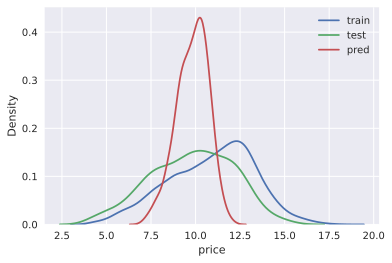

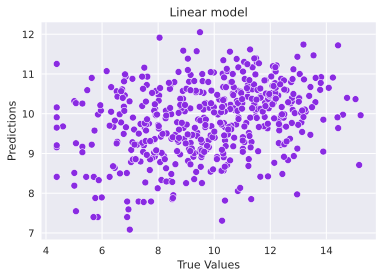

In [85]:
target_distr_linear(y_train, y_test, y_pred)  

In [86]:
def inverse_transform(feature):
    return np.expm1(feature)

calc_metrics(inverse_transform(y_test), inverse_transform(y_pred))

*** VAL **: 
MSE:   163270480697.97476
RMSE:  404067.4209806759
R2:    -0.07322953069113947
MAE:   129756.88716896294
MedAE: 23489.84806494103
------------------------------


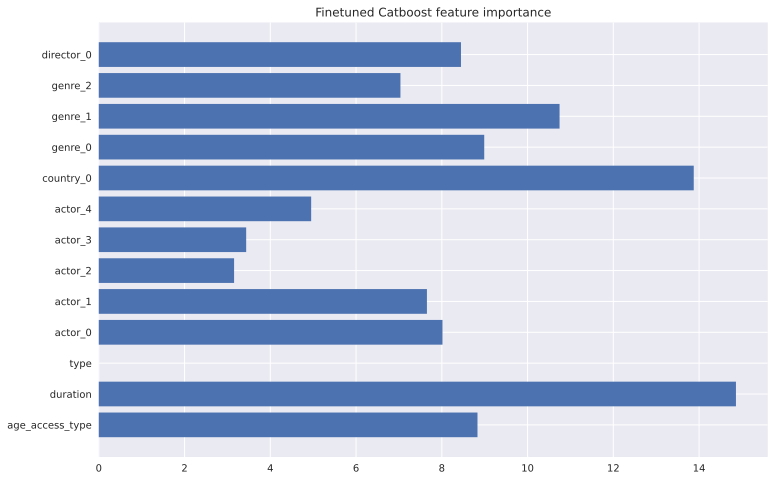

In [87]:
get_feature_imp(best_cat, train_dataset)

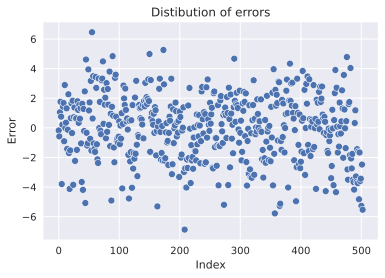

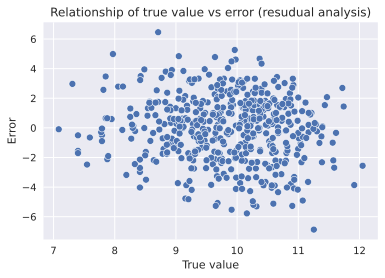

In [88]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)